#### Import packages

In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from collections import defaultdict
import folium 
from folium.plugins import StripePattern

temp = pd.read_csv("stage3.csv")

In [256]:
#Organzied by State and time

temp = temp.sort_values(by=['state', "date"])

temp = temp.drop(columns=["incident_url", "address", "source_url", "incident_url_fields_missing", "incident_characteristics", "location_description", "notes", "sources", "state_house_district",
            "state_senate_district", "participant_name", "congressional_district", "city_or_county"])

#### Description of variables used

In [257]:
temp.head(n=5)

incident_id        date    state  n_killed  n_injured gun_stolen  \
127       490395  2013-07-06  Alabama         0          4        NaN   
272       496668  2013-12-28  Alabama         3          5        NaN   
296        92342  2014-01-01  Alabama         1          0        NaN   
315        94194  2014-01-01  Alabama         0          3        NaN   
320        92337  2014-01-01  Alabama         1          0        NaN   

    gun_type  latitude  longitude  n_guns_involved  \
127      NaN   34.7982   -87.6854              NaN   
272      NaN   32.3719   -86.2952              NaN   
296      NaN   34.7663   -86.6028              NaN   
315      NaN   33.2482   -87.5670              NaN   
320      NaN   31.7839   -86.1926              NaN   

                                       participant_age  \
127                                              4::22   
272  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
296                                       0::21||1::24   
315                         3::17||4::19||5::19||6::19   
320                                       0::18||1::19   

                                 participant_age_group  \
127                                       4::Adult 18+   
272  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
296                         0::Adult 18+||1::Adult 18+   
315  3::Teen 12-17||4::Adult 18+||5::Adult 18+||6::...   
320                         0::Adult 18+||1::Adult 18+   

                                    participant_gender  \
127                                          4::Female   
272  0::Female||1::Male||2::Male||3::Male||4::Male|...   
296                                 0::Female||1::Male   
315  0::Male||1::Male||2::Female||3::Male||4::Male|...   
320                                 0::Female||1::Male   

              participant_relationship  \
127                                NaN   
272  9::Mass shooting - Random victims   
296                                NaN   
315                                NaN   
320                                NaN   

                                    participant_status  \
127  0::Injured||1::Injured||2::Injured||3::Injured...   
272  0::Killed||1::Killed||2::Injured||3::Injured||...   
296                             0::Killed||1::Unharmed   
315  0::Injured||1::Injured||2::Injured||3::Unharme...   
320                             0::Killed||1::Unharmed   

                                      participant_type  
127  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
272  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
296                      0::Victim||1::Subject-Suspect  
315  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
320                      0::Victim||1::Subject-Suspect

* incident_id	- ID of shooting incident
* date - date of incident
* state - state where the incident occured	
* n_killed - number of people killed in the incident
* n_injured - number of people injured in the incident
* gun_stolen - guns stolen, unknown, or not stolen for the incident
* gun_type - type of gun involved in the incident
* latitude - the latitude coordinate of the incident
* longitude - the longitude coordinate of the incident
* n_guns_involved	- number of guns involved in the incident
* participant_age	- participants age, killed, injured, or assailant in the incident
* participant_age_group - age group of participants in the incident
* participant_gender	- gender of participants in the incident
* participant_relationship - participant relationships to other participants in the incident
* participant_status - participant status: 'Arrested', 'Killed', 'Injured', or 'Unharmed' in the incident
* participant_type - particpant type:  'Victim' or 'Subject-Suspect in the incident

## Data cleaning process

Mass shooting is definied as 3/4 or more killings. Becuase of this, we will first remove the row that have number of killed greater than or equal to 3. 

In [258]:
temp = temp[temp['n_killed']>= 3]
temp

incident_id        date      state  n_killed  n_injured  \
272          496668  2013-12-28    Alabama         3          5   
35386        187367  2014-09-06    Alabama         3          0   
38330        195207  2014-09-23    Alabama         3          0   
48680        261048  2014-12-04    Alabama         3          0   
61027        308861  2015-03-15    Alabama         3          1   
...             ...         ...        ...       ...        ...   
123260       548991  2016-04-27  Wisconsin         3          0   
177518       800363  2017-03-22  Wisconsin         5          0   
203501       912653  2017-08-13  Wisconsin         3          0   
215662       974997  2017-10-27  Wisconsin         3          0   
223588      1009368  2017-12-16  Wisconsin         3          0   

                    gun_stolen              gun_type  latitude  longitude  \
272                        NaN                   NaN   32.3719   -86.2952   
35386                      NaN                   NaN   33.4905   -86.9639   
38330                      NaN                   NaN   33.5683   -86.7649   
48680                      NaN                   NaN   30.6911   -88.0999   
61027               0::Unknown              0::Rifle   31.0878   -85.3250   
...                        ...                   ...       ...        ...   
123260              0::Unknown            0::Unknown   44.3861   -89.8133   
177518  0::Unknown||1::Unknown  0::Rifle||1::Handgun   44.8975   -89.6129   
203501              0::Unknown            0::Unknown   42.6696   -88.0312   
215662              0::Unknown            0::Unknown   45.2932   -91.6246   
223588              0::Unknown            0::Unknown       NaN        NaN   

        n_guns_involved                                    participant_age  \
272                 NaN  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
35386               NaN                                       0::29||2::32   
38330               NaN                                0::33||1::46||2::45   
48680               NaN                                0::43||1::67||2::56   
61027               1.0                                0::43||2::74||3::45   
...                 ...                                                ...   
123260              1.0                                  0::5||1::3||2::36   
177518              2.0                  0::67||1::62||2::40||3::43||4::45   
203501              1.0                                0::30||1::30||2::26   
215662              1.0                                0::55||1::17||2::15   
223588              1.0                                0::32||1::32||2::43   

                                    participant_age_group  \
272     0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
35386           0::Adult 18+||1::Child 0-11||2::Adult 18+   
38330            0::Adult 18+||1::Adult 18+||2::Adult 18+   
48680            0::Adult 18+||1::Adult 18+||2::Adult 18+   
61027   0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
...                                                   ...   
123260         0::Child 0-11||1::Child 0-11||2::Adult 18+   
177518  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
203501           0::Adult 18+||1::Adult 18+||2::Adult 18+   
215662         0::Adult 18+||1::Teen 12-17||2::Teen 12-17   
223588           0::Adult 18+||1::Adult 18+||2::Adult 18+   

                                       participant_gender  \
272     0::Female||1::Male||2::Male||3::Male||4::Male|...   
35386                         0::Female||1::Male||2::Male   
38330                           0::Male||1::Male||2::Male   
48680                         0::Male||1::Female||2::Male   
61027                0::Female||1::Male||2::Male||3::Male   
...                                                   ...   
123260                        0::Female||1::Male||2::Male   
177518  0::Female||1::Female||2::Male||3::Female||4::Male   
203501                          0::Male||1::Male||2::Male  

In [259]:
## Checking the data type of columns

temp.dtypes

temp.info(verbose=True)

##  re-indexing the dataframe

temp = temp.reset_index(drop=True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 272 to 223588
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   incident_id               802 non-null    int64  
 1   date                      802 non-null    object 
 2   state                     802 non-null    object 
 3   n_killed                  802 non-null    int64  
 4   n_injured                 802 non-null    int64  
 5   gun_stolen                538 non-null    object 
 6   gun_type                  538 non-null    object 
 7   latitude                  776 non-null    float64
 8   longitude                 776 non-null    float64
 9   n_guns_involved           538 non-null    float64
 10  participant_age           775 non-null    object 
 11  participant_age_group     797 non-null    object 
 12  participant_gender        797 non-null    object 
 13  participant_relationship  294 non-null    object 
 14  parti

In [260]:
## making the date column a datetime column

temp['date'] = pd.to_datetime(temp['date'])

## double-checking that the data types are correct

temp.dtypes

incident_id                          int64
date                        datetime64[ns]
state                               object
n_killed                             int64
n_injured                            int64
gun_stolen                          object
gun_type                            object
latitude                           float64
longitude                          float64
n_guns_involved                    float64
participant_age                     object
participant_age_group               object
participant_gender                  object
participant_relationship            object
participant_status                  object
participant_type                    object
dtype: object

In [261]:
# ## Note gun_stolen column values is a string, but with inner and outer separators, according to James' Gun Violence data repo

## But let's make sure that it is in a string format

temp1 = temp.astype({'gun_stolen':str})

## Now create a recursive function to take care of || and :: ....

text_list = [] 
def extract(x):
    """This is a recursive function to extract text separated by ||"""
    ch = '|'
    if ch not in x:
        for i in range(len(x)):
            if x[i] == ":" and x[i+1] == ":":
                text = x[i+2:]
                text_list.append(text)
                return text_list
    else:
        for i in range(len(x)):
            if x[i] == '|' and x[i+1] == '|':
                first_text = x[0:i]
                for j in range(len(first_text)):
                    if first_text[j] == ":" and first_text[j+1] == ":":
                        better_text = first_text[j+2:]
                        text_list.append(better_text)
                        break
                newtext = x[i+2:]
                extract(newtext)
                break
        return text_list


In [262]:
## Now apply extract function to gun_stolen column

for i in range(len(temp1)):
    stats = temp1.loc[i, 'gun_stolen']
    text_list = []
    complete_list = extract(stats)
    temp1.at[i, 'gun_stolen'] = complete_list
    

In [263]:
temp1.sample(5)

incident_id       date      state  n_killed  n_injured gun_stolen  \
730       698629 2016-11-10      Texas         4          0  [Unknown]   
430       298122 2015-02-26   Missouri         8          1  [Unknown]   
326       588237 2016-06-25   Kentucky         3          0       None   
353       740386 2017-01-01  Louisiana         3          0  [Unknown]   
700       304547 2015-03-11      Texas         3          0       None   

       gun_type  latitude  longitude  n_guns_involved  \
730  0::Unknown       NaN        NaN              1.0   
430  0::45 Auto   37.1956   -91.9012              1.0   
326         NaN   38.2301   -85.8121              NaN   
353  0::Unknown   31.2487   -93.3345              1.0   
700         NaN   32.8410   -97.0013              NaN   

                                       participant_age  \
730                            0::4||1::5||2::8||3::34   
430  0::68||1::50||2::48||3::52||4::47||5::46||6::4...   
326                         0::44||1::37||2::40||3::31   
353                                0::30||1::48||2::36   
700                                0::41||1::52||2::44   

                                 participant_age_group  \
730  0::Child 0-11||1::Child 0-11||2::Child 0-11||3...   
430  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
326  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
353           0::Adult 18+||1::Adult 18+||2::Adult 18+   
700           0::Adult 18+||1::Adult 18+||2::Adult 18+   

                                    participant_gender  \
730             0::Male||1::Female||2::Male||3::Female   
430  0::Male||1::Male||2::Female||3::Male||4::Femal...   
326                 0::Male||1::Male||2::Male||3::Male   
353                        0::Male||1::Female||2::Male   
700                        0::Female||1::Male||2::Male   

    participant_relationship  \
730                3::Family   
430                      NaN   
326                      NaN   
353                2::Family   
700               2::Friends   

                                    participant_status  \
730         0::Killed||1::Killed||2::Killed||3::Killed   
430  0::Killed||1::Killed||2::Killed||3::Killed||4:...   
326  0::Killed||1::Killed||2::Killed||3::Unharmed, ...   
353                    0::Killed||1::Killed||2::Killed   
700                    0::Killed||1::Killed||2::Killed   

                                      participant_type  
730  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
430  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
326  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
353           0::Victim||1::Victim||2::Subject-Suspect  
700           0::Victim||1::Victim||2::Subject-Suspect

In [264]:
## Replacing Null/NA values with "Unknown"

maximum = 0
for i in range(len(temp1)):
    l = temp1.loc[i, 'gun_stolen']
    if not l:
        l = ["Unknown"]
        temp1.at[i, 'gun_stolen'] = l
    

In [265]:
# Let's expand the dataframe to include three more columns

temp1[["Number_Unknown_Guns", "Number_Stolen_Guns", "Number_Not_Stolen_Guns"]] = None

In [266]:
temp1.head(5)

incident_id       date    state  n_killed  n_injured gun_stolen  gun_type  \
0       496668 2013-12-28  Alabama         3          5  [Unknown]       NaN   
1       187367 2014-09-06  Alabama         3          0  [Unknown]       NaN   
2       195207 2014-09-23  Alabama         3          0  [Unknown]       NaN   
3       261048 2014-12-04  Alabama         3          0  [Unknown]       NaN   
4       308861 2015-03-15  Alabama         3          1  [Unknown]  0::Rifle   

   latitude  longitude  n_guns_involved  \
0   32.3719   -86.2952              NaN   
1   33.4905   -86.9639              NaN   
2   33.5683   -86.7649              NaN   
3   30.6911   -88.0999              NaN   
4   31.0878   -85.3250              1.0   

                                     participant_age  \
0  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
1                                       0::29||2::32   
2                                0::33||1::46||2::45   
3                                0::43||1::67||2::56   
4                                0::43||2::74||3::45   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1          0::Adult 18+||1::Child 0-11||2::Adult 18+   
2           0::Adult 18+||1::Adult 18+||2::Adult 18+   
3           0::Adult 18+||1::Adult 18+||2::Adult 18+   
4  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   

                                  participant_gender  \
0  0::Female||1::Male||2::Male||3::Male||4::Male|...   
1                        0::Female||1::Male||2::Male   
2                          0::Male||1::Male||2::Male   
3                        0::Male||1::Female||2::Male   
4               0::Female||1::Male||2::Male||3::Male   

            participant_relationship  \
0  9::Mass shooting - Random victims   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

                                  participant_status  \
0  0::Killed||1::Killed||2::Injured||3::Injured||...   
1                    0::Killed||1::Killed||2::Killed   
2                    0::Killed||1::Killed||2::Killed   
3                    0::Killed||1::Killed||2::Killed   
4        0::Killed||1::Killed||2::Injured||3::Killed   

                                    participant_type Number_Unknown_Guns  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...                None   
1           0::Victim||1::Victim||2::Subject-Suspect                None   
2           0::Victim||1::Victim||2::Subject-Suspect                None   
3           0::Victim||1::Victim||2::Subject-Suspect                None   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...                None   

  Number_Stolen_Guns Number_Not_Stolen_Guns  
0               None                   None  
1               None                   None  
2               None                   None  
3               None                   None  
4               None                   None

In [267]:
# Rearranging the columns so the newly added columns are next to gun_stolen

temp2 = temp1[['incident_id', 'date', 'state', 'latitude', 'longitude', 'n_killed', 'n_injured', 'gun_stolen', 
'Number_Unknown_Guns', 'Number_Stolen_Guns', 'Number_Not_Stolen_Guns', 'gun_type', 'n_guns_involved', 'participant_age', 'participant_age_group', 
'participant_gender', 'participant_relationship', 'participant_status', 'participant_type']]

#### Extracting the number of guns stolen

In [268]:
# Let's create a dictionary of items in gun_stolen and count them. Then put appropriate numbers in appropriate columns
for i in range(len(temp2)):
    gunstolen_list = temp2.loc[i, 'gun_stolen']
    gunstolen_dict = {}
    for j in gunstolen_list:
        gunstolen_dict[j] = gunstolen_dict.get(j, 0) + 1
    temp2.at[i, 'Number_Unknown_Guns'] = gunstolen_dict.get('Unknown')
    temp2.at[i, 'Number_Stolen_Guns'] = gunstolen_dict.get('Stolen')
    temp2.at[i, 'Number_Not_Stolen_Guns'] = gunstolen_dict.get('Not-Stolen')



In [269]:
temp2.head(5)

incident_id       date    state  latitude  longitude  n_killed  n_injured  \
0       496668 2013-12-28  Alabama   32.3719   -86.2952         3          5   
1       187367 2014-09-06  Alabama   33.4905   -86.9639         3          0   
2       195207 2014-09-23  Alabama   33.5683   -86.7649         3          0   
3       261048 2014-12-04  Alabama   30.6911   -88.0999         3          0   
4       308861 2015-03-15  Alabama   31.0878   -85.3250         3          1   

  gun_stolen Number_Unknown_Guns Number_Stolen_Guns Number_Not_Stolen_Guns  \
0  [Unknown]                   1               None                   None   
1  [Unknown]                   1               None                   None   
2  [Unknown]                   1               None                   None   
3  [Unknown]                   1               None                   None   
4  [Unknown]                   1               None                   None   

   gun_type  n_guns_involved  \
0       NaN              NaN   
1       NaN              NaN   
2       NaN              NaN   
3       NaN              NaN   
4  0::Rifle              1.0   

                                     participant_age  \
0  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
1                                       0::29||2::32   
2                                0::33||1::46||2::45   
3                                0::43||1::67||2::56   
4                                0::43||2::74||3::45   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1          0::Adult 18+||1::Child 0-11||2::Adult 18+   
2           0::Adult 18+||1::Adult 18+||2::Adult 18+   
3           0::Adult 18+||1::Adult 18+||2::Adult 18+   
4  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   

                                  participant_gender  \
0  0::Female||1::Male||2::Male||3::Male||4::Male|...   
1                        0::Female||1::Male||2::Male   
2                          0::Male||1::Male||2::Male   
3                        0::Male||1::Female||2::Male   
4               0::Female||1::Male||2::Male||3::Male   

            participant_relationship  \
0  9::Mass shooting - Random victims   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

                                  participant_status  \
0  0::Killed||1::Killed||2::Injured||3::Injured||...   
1                    0::Killed||1::Killed||2::Killed   
2                    0::Killed||1::Killed||2::Killed   
3                    0::Killed||1::Killed||2::Killed   
4        0::Killed||1::Killed||2::Injured||3::Killed   

                                    participant_type  
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
1           0::Victim||1::Victim||2::Subject-Suspect  
2           0::Victim||1::Victim||2::Subject-Suspect  
3           0::Victim||1::Victim||2::Subject-Suspect  
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...

In [270]:
#Transform None to 0s
target = ['Number_Unknown_Guns', 'Number_Stolen_Guns','Number_Not_Stolen_Guns']
for t in target:
    temp2[t] = temp2[t].fillna(0)
    
temp2.tail(10)

incident_id       date          state  latitude  longitude  n_killed  \
792       679868 2016-10-19  West Virginia   39.2681   -81.5439         3   
793       333750 2015-05-03      Wisconsin   44.2029   -88.4656         4   
794       471715 2015-12-24      Wisconsin   46.5932   -90.8756         3   
795       516691 2016-03-05      Wisconsin   43.0231   -87.9227         3   
796       517474 2016-03-06      Wisconsin   42.9845   -88.0271         3   
797       548991 2016-04-27      Wisconsin   44.3861   -89.8133         3   
798       800363 2017-03-22      Wisconsin   44.8975   -89.6129         5   
799       912653 2017-08-13      Wisconsin   42.6696   -88.0312         3   
800       974997 2017-10-27      Wisconsin   45.2932   -91.6246         3   
801      1009368 2017-12-16      Wisconsin       NaN        NaN         3   

     n_injured          gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  \
792          0           [Unknown]                    1                   0   
793          1  [Unknown, Unknown]                    2                   0   
794          0           [Unknown]                    1                   0   
795          0           [Unknown]                    1                   0   
796          0           [Unknown]                    1                   0   
797          0           [Unknown]                    1                   0   
798          0  [Unknown, Unknown]                    2                   0   
799          0           [Unknown]                    1                   0   
800          0           [Unknown]                    1                   0   
801          0           [Unknown]                    1                   0   

     Number_Not_Stolen_Guns              gun_type  n_guns_involved  \
792                       0            0::Handgun              1.0   
793                       0    0::9mm||1::Handgun              2.0   
794                       0                   NaN              NaN   
795                       0            0::Unknown              1.0   
796                       0              0::Rifle              1.0   
797                       0            0::Unknown              1.0   
798                       0  0::Rifle||1::Handgun              2.0   
799                       0            0::Unknown              1.0   
800                       0            0::Unknown              1.0   
801                       0            0::Unknown              1.0   

                       participant_age  \
792                0::38||1::28||2::31   
793  0::33||1::11||2::31||3::31||4::27   
794                0::23||1::84||2::54   
795                0::45||1::12||2::41   
796         0::40||1::36||2::32||3::39   
797                  0::5||1::3||2::36   
798  0::67||1::62||2::40||3::43||4::45   
799                0::30||1::30||2::26   
800                0::55||1::17||2::15   
801                0::32||1::32||2::43   

                                 participant_age_group  \
792           0::Adult 18+||1::Adult 18+||2::Adult 18+   
793  0::Adult 18+||1::Child 0-11||2::Adult 18+||3::...   
794           0::Adult 18+||1::Adult 18+||2::Adult 18+   
795          0::Adult 18+||1::Teen 12-17||2::Adult 18+   
796  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
797         0::Child 0-11||1::Child 0-11||2::Adult 18+   
798  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
799           0::Adult 18+||1::Adult 18+||2::Adult 18+   
800         0::Adult 18+||1::Teen 12-17||2::Teen 12-17   
801           0::Adult 18+||1::Adult 18+||2::Adult 18+   

                                    participant_gender  \
792                        0::Male||1::Female||2::Male   
793    0::Male||1::Female||2::Male||3::Female||4::Male   
794                      0::Female||1::Female||2::Male   
795                      0::Female||1::Male||2::Female   
796               0::Male||1::Female||2::Male||3::Male   
797                        0::Female||1::Male||2::Male   
798  0::

#### Let's clean the rest of the columns that has ::

In [271]:
## Gun Type
temp2 = temp2.astype({'gun_type':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'gun_type']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'gun_type'] = complete_list

## Participant_Age
temp2 = temp2.astype({'participant_age':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_age']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_age'] = complete_list

## Participant Age Group
temp2 = temp2.astype({'participant_age_group':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_age_group']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_age_group'] = complete_list

## Participant Gender
temp2 = temp2.astype({'participant_gender':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_gender']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_gender'] = complete_list


## Participant Relationship
temp2 = temp2.astype({'participant_relationship':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_relationship']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_relationship'] = complete_list

## Participant Status

temp2 = temp2.astype({'participant_status':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_status']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_status'] = complete_list

## Participant Type

temp2 = temp2.astype({'participant_type':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_type']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_type'] = complete_list

In [272]:
### Finding all unique guns

unique_gun = []

for i in range(len(temp2)):
    guns = temp2.loc[i, 'gun_type']
    if guns:
        for i in guns:
            if i not in unique_gun:
                unique_gun.append(i)

print(f'all unique guns: {unique_gun}')

## Finding all participant ages:

ages = []

for i in range(len(temp2)):
    age = temp2.loc[i, 'participant_age']
    if age:
        for i in age:
            if i not in ages:
                ages.append(i)

print(f'all unique ages: {ages}')

## Finding all participant age groups:

age_groups = []

for i in range(len(temp2)):
    age = temp2.loc[i, 'participant_age_group']
    if age:
        for i in age:
            if i not in age_groups:
                age_groups.append(i)

print(f'all unique age groups: {age_groups}')

## Finding all genders:

genders = []

for i in range(len(temp2)):
    g = temp2.loc[i, 'participant_gender']
    if g:
        for i in g:
            if i not in genders:
                genders.append(i)

print(f'all genders: {genders}')

## Finding all relationships

relationship = []

for i in range(len(temp2)):
    relate = temp2.loc[i, 'participant_relationship']
    if relate:
        for i in relate:
            if i not in relationship:
                relationship.append(i)

print(f'all relationships: {relationship}')


###### Finding all statuses

statuses = []

for i in range(len(temp2)):
    status = temp2.loc[i, 'participant_status']
    if status:
        for i in status:
            if i not in statuses:
                statuses.append(i)

print(f'all statuses: {statuses}')

#### Finding all participant types

types = []

for i in range(len(temp2)):
    participants = temp2.loc[i, 'participant_type']
    if participants:
        for i in participants:
            if i not in types:
                types.append(i)

print(f'all participant types: {types}')

all unique guns: ['Rifle', 'Unknown', 'Shotgun', 'Handgun', '9mm', '12 gauge', '223 Rem [AR-15]', '44 Mag', '45 Auto', '357 Mag', '40 SW', '380 Auto', '7.62 [AK-47]', '22 LR', '410 gauge', '32 Auto', 'Other', '25 Auto', '38 Spl', '308 Win', '30-30 Win', '20 gauge']
all unique ages: ['21', '22', '20', '23', '24', '25', '29', '32', '33', '46', '45', '43', '67', '56', '74', '42', '47', '35', '49', '14', '12', '71', '68', '48', '38', '26', '27', '37', '13', '36', '50', '19', '65', '69', '52', '44', '70', '7', '5', '6', '3', '4', '1', '0', '54', '31', '66', '17', '8', '57', '41', '34', '76', '58', '53', '75', '16', '15', '18', '83', '81', '59', '39', '11', '10', '40', '86', '60', '61', '9', '55', '28', '30', '51', '91', '63', '64', '62', '73', '79', '80', '72', '2', '85', '84', '77', '82', '89', '87', '78', '88', '92', '90', '96', '95']
all unique age groups: ['Adult 18+', 'Child 0-11', 'Teen 12-17']
all genders: ['Female', 'Male']
all relationships: ['Mass shooting - Random victims', 'Fami

#### Extracting gun types

In [273]:
Guns = [ 'Unknown', 'Handgun', 'Shotgun', 'Rifle', 'Automatic', 'Other']

for i in range(len(temp2)):
    gunstype_list = temp2.loc[i, 'gun_type']
    gunstype_dict = {}
    if gunstype_list is None:
        temp2.at[i, 'None'] = None
        temp2.at[i, 'Unknown_Guns'] = None
        temp2.at[i, 'Handgun'] = None
        temp2.at[i, 'Shotgun'] = None
        temp2.at[i, 'Rifle'] = None
        temp2.at[i, 'Other'] = None
        temp2.at[i, 'Automatic'] = None
        pass
    else:
        for j in gunstype_list:
            if j == 'Unknown':
                gunstype_dict['Unknown'] = gunstype_dict.get('Unknown', 0) + 1
            elif j == 'Handgun' or j ==  '38 Spl' or j == '22 LR' or j == '9mm' or j == '40 SW' or j == '10mm' or 'Win' in j:
                gunstype_dict['Handgun'] = gunstype_dict.get('Handgun', 0) + 1
            elif j == 'Shotgun' or 'guage' in j:
                gunstype_dict['Shotgun'] = gunstype_dict.get('Shotgun', 0) + 1
            elif j == 'Rifle':
                gunstype_dict['Rifle'] = gunstype_dict.get('Rifle', 0) + 1
            elif j == 'Other':
                gunstype_dict['Other'] = gunstype_dict.get('Other', 0) + 1
            else:
                gunstype_dict['Automatic'] = gunstype_dict.get('Automatic', 0) + 1
    temp2.at[i, 'None'] = None
    temp2.at[i, 'Unknown_Guns'] = gunstype_dict.get('Unknown')
    temp2.at[i, 'Handgun'] = gunstype_dict.get('Handgun')
    temp2.at[i, 'Shotgun'] = gunstype_dict.get('Shotgun')
    temp2.at[i, 'Rifle'] = gunstype_dict.get('Rifle')
    temp2.at[i, 'Other'] = gunstype_dict.get('Other')
    temp2.at[i, 'Automatic'] = gunstype_dict.get('Automatic')

In [274]:
Guns = ['Unknown_Guns', 'Handgun', 'Shotgun', 'Rifle', 'Automatic', 'Other']
#Transform None to 0s
for g in Guns:
    temp2[g] = temp2[g].fillna(0)
temp2 = temp2.drop(columns = ['None'])
temp2.sample(5)

incident_id       date       state  latitude  longitude  n_killed  \
771       994208 2017-11-23    Virginia   37.3199   -77.4283         3   
488       570215 2016-06-01  New Jersey   40.9334   -74.1358         3   
725       635873 2016-08-22       Texas   30.1413  -102.3990         3   
33        546213 2016-04-10     Arizona   33.6455  -113.8780         3   
450       920513 2017-08-24    Missouri   38.7540   -90.2010         4   

     n_injured gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  ...  \
771          0  [Unknown]                    1                   0  ...   
488          0  [Unknown]                    1                   0  ...   
725          0  [Unknown]                    1                   0  ...   
33           0  [Unknown]                    1                   0  ...   
450          0  [Unknown]                    1                   0  ...   

                   participant_gender participant_relationship  \
771      [Female, Male, Female, Male]                 [Family]   
488              [Male, Female, Male]                     None   
725              [Female, Male, Male]                     None   
33       [Male, Female, Female, Male]                     None   
450  [Female, Male, Male, Male, Male]                     None   

                                    participant_status  \
771       [Killed, Killed, Killed, Unharmed, Arrested]   
488                           [Killed, Killed, Killed]   
725                           [Killed, Killed, Killed]   
33        [Killed, Killed, Killed, Unharmed, Arrested]   
450  [Killed, Killed, Killed, Killed, Unharmed, Arr...   

                                      participant_type Unknown_Guns Handgun  \
771          [Victim, Victim, Victim, Subject-Suspect]          1.0     0.0   
488                           [Victim, Victim, Victim]          0.0     0.0   
725                  [Victim, Victim, Subject-Suspect]          0.0     0.0   
33           [Victim, Victim, Victim, Subject-Suspect]          0.0     0.0   
450  [Victim, Victim, Victim, Victim, Subject-Suspect]          1.0     0.0   

    Shotgun Rifle Other  Automatic  
771     0.0   0.0   0.0        0.0  
488     0.0   0.0   0.0        0.0  
725     0.0   0.0   0.0        1.0  
33      0.0   0.0   0.0        0.0  
450     0.0   0.0   0.0        0.0  

[5 rows x 25 columns]

## Extracting Participant Genders

In [275]:
Genders = [ 'Male', 'Female']

for i in range(len(temp2)):
    gender_list = temp2.loc[i, 'participant_gender']
    gender_dict = {}
    if gender_list is None:
        temp2.at[i, 'Unknown_Gender'] = None
        temp2.at[i, 'Male'] = None
        temp2.at[i, 'Female'] = None
        pass
    else:
        for j in gender_list:
            if j == 'Unknown':
                gender_dict['Unknown'] = gender_dict.get('Unknown', 0) + 1
            elif j == "Male":
                gender_dict['Male'] = gender_dict.get('Male', 0) + 1
            elif j == 'Female':
                gender_dict['Female'] = gender_dict.get('Female', 0) + 1
            else:
                gender_dict['Unknown'] = gender_dict.get('Unknown', 0) + 1
    temp2.at[i, 'Unknown_Gender'] = gender_dict.get('Unknown')
    temp2.at[i, 'Male'] = gender_dict.get('Male')
    temp2.at[i, 'Female'] = gender_dict.get('Female')

In [276]:
Genders = ['Unknown_Gender', 'Male', 'Female']
#Transform None to 0s
for g in Genders:
    temp2[g] = temp2[g].fillna(0)
temp2.sample(5)

incident_id       date       state  latitude  longitude  n_killed  \
722       625564 2016-07-14       Texas   33.2420  -101.7890         3   
499       641871 2016-08-28  New Mexico   35.1141  -106.7050         3   
675       117591 2014-03-16       Texas   30.0588   -94.1156         3   
44       1054212 2018-02-21     Arizona   33.4750  -112.1370         4   
713       527206 2016-03-21       Texas   33.6619   -96.6358         4   

     n_injured gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  ...  \
722          0  [Unknown]                    1                   0  ...   
499          0  [Unknown]                    1                   0  ...   
675          1  [Unknown]                    1                   0  ...   
44           0  [Unknown]                    1                   0  ...   
713          0  [Unknown]                    1                   0  ...   

                              participant_type Unknown_Guns  Handgun Shotgun  \
722          [Victim, Victim, Subject-Suspect]          0.0      1.0     0.0   
499          [Victim, Victim, Subject-Suspect]          1.0      0.0     0.0   
675                                         []          0.0      0.0     0.0   
44   [Victim, Victim, Victim, Subject-Suspect]          1.0      0.0     0.0   
713  [Victim, Victim, Victim, Subject-Suspect]          0.0      0.0     0.0   

    Rifle Other Automatic Unknown_Gender Male  Female  
722   0.0   0.0       0.0            0.0  3.0     0.0  
499   0.0   0.0       0.0            0.0  1.0     2.0  
675   0.0   0.0       0.0            0.0  0.0     0.0  
44    0.0   0.0       0.0            0.0  4.0     0.0  
713   0.0   0.0       0.0            0.0  3.0     1.0  

[5 rows x 28 columns]

## Extracting Participant Age Groups

In [277]:
Age_Groups = [ 'Adult', 'Teen', 'Child']

for i in range(len(temp2)):
    age_list = temp2.loc[i, 'participant_age_group']
    age_dict = {}
    if age_list is None:
        temp2.at[i, 'Unknown_Age'] = None
        temp2.at[i, 'Adult'] = None
        temp2.at[i, 'Teen'] = None
        temp2.at[i, 'Child'] = None
        pass
    else:
        for j in age_list:
            if j == 'Unknown':
                age_dict['Unknown'] = age_dict.get('Unknown', 0) + 1
            elif j == "Adult 18+":
                age_dict['Adult'] = age_dict.get('Adult', 0) + 1
            elif j == 'Teen 12-17':
                age_dict['Teen'] = age_dict.get('Teen', 0) + 1
            elif j == 'Child 0-11':
                age_dict['Child'] = age_dict.get('Child', 0) + 1
            else:
                age_dict['Unknown'] = age_dict.get('Unknown', 0) + 1
    temp2.at[i, 'Unknown_Age'] = age_dict.get('Unknown')
    temp2.at[i, 'Adult'] = age_dict.get('Adult')
    temp2.at[i, 'Teen'] = age_dict.get('Teen')
    temp2.at[i, 'Child'] = age_dict.get('Child')

In [278]:
Ages = ['Unknown_Age', 'Adult', 'Teen', 'Child']
#Transform None to 0s
for a in Ages:
    temp2[a] = temp2[a].fillna(0)
temp2.sample(5)

incident_id       date       state  latitude  longitude  n_killed  \
303       817431 2017-04-06        Iowa   41.7379   -93.4248         3   
396       573045 2016-06-06    Michigan   42.3389   -83.2228         3   
672        96391 2014-01-11       Texas   31.4890  -100.4920         3   
752       353609 2015-06-07        Utah   40.6306  -111.8840         3   
493       479363 2013-01-19  New Mexico   34.9791  -106.7160         5   

     n_injured          gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  \
303          0           [Unknown]                    1                   0   
396          0           [Unknown]                    1                   0   
672          1           [Unknown]                    1                   0   
752          0  [Unknown, Unknown]                    2                   0   
493          0  [Unknown, Unknown]                    2                   0   

     ...  Rifle Other  Automatic Unknown_Gender Male Female Unknown_Age Adult  \
303  ...    0.0   0.0        0.0            0.0  2.0    2.0         0.0   4.0   
396  ...    0.0   0.0        0.0            0.0  3.0    0.0         0.0   2.0   
672  ...    0.0   0.0        0.0            0.0  4.0    0.0         0.0   4.0   
752  ...    0.0   0.0        0.0            0.0  2.0    1.0         0.0   2.0   
493  ...    0.0   0.0        1.0            0.0  3.0    3.0         0.0   2.0   

    Teen  Child  
303  0.0    0.0  
396  1.0    0.0  
672  0.0    0.0  
752  0.0    1.0  
493  1.0    3.0  

[5 rows x 32 columns]

## Extracting Participant Types

In [279]:
types = [ 'Victim', 'Subject-Suspect']

for i in range(len(temp2)):
    type_list = temp2.loc[i, 'participant_type']
    type_dict = {}
    if type_list is None:
        temp2.at[i, 'Unknown_Status'] = None
        temp2.at[i, 'Victim'] = None
        temp2.at[i, 'Suspect'] = None
        pass
    else:
        for j in type_list:
            if j == 'Unknown':
                type_dict['Unknown'] = type_dict.get('Unknown', 0) + 1
            elif j == "Victim":
                type_dict['Victim'] = type_dict.get('Victim', 0) + 1
            elif j == 'Subject-Suspect':
                type_dict['Suspect'] = type_dict.get('Suspect', 0) + 1
            else:
                type_dict['Unknown'] = type_dict.get('Unknown', 0) + 1
    temp2.at[i, 'Unknown_Type'] = type_dict.get('Unknown')
    temp2.at[i, 'Victim'] = type_dict.get('Victim')
    temp2.at[i, 'Suspect'] = type_dict.get('Suspect')

In [280]:
types = ['Unknown_Type', 'Victim', 'Suspect']
#Transform None to 0s
for s in types:
    temp2[s] = temp2[s].fillna(0)
temp2.sample(5)

incident_id       date                 state  latitude  longitude  \
330       935290 2017-09-16              Kentucky   38.0564   -85.5514   
178       542791 2016-04-18               Florida   28.8901   -81.2785   
141       480366 2013-09-16  District of Columbia   38.8730   -76.9977   
560       357164 2015-06-13                  Ohio   40.0134   -82.9664   
54       1018831 2018-01-01              Arkansas   35.2032   -91.9817   

     n_killed  n_injured          gun_stolen  Number_Unknown_Guns  \
330         3          0           [Unknown]                    1   
178         3          0           [Unknown]                    1   
141        11          3  [Unknown, Unknown]                    2   
560         4          1  [Unknown, Unknown]                    2   
54          3          0           [Unknown]                    1   

     Number_Stolen_Guns  ...  Unknown_Gender  Male  Female Unknown_Age Adult  \
330                   0  ...             0.0   2.0     1.0         0.0   3.0   
178                   0  ...             0.0   2.0     1.0         0.0   1.0   
141                   0  ...             0.0  11.0     5.0         0.0  16.0   
560                   0  ...             0.0   4.0     3.0         0.0   5.0   
54                    0  ...             0.0   2.0     1.0         0.0   3.0   

    Teen Child Unknown_Type Victim  Suspect  
330  0.0   0.0          0.0    2.0      1.0  
178  0.0   2.0          0.0    2.0      1.0  
141  0.0   0.0          0.0   15.0      1.0  
560  2.0   0.0          0.0    5.0      2.0  
54   0.0   0.0          0.0    2.0      1.0  

[5 rows x 35 columns]

### Exploratory Analysis

#### Description of dataset

In [281]:
gun_df=temp2

In [282]:
gun_df.describe()

incident_id    latitude   longitude    n_killed   n_injured  \
count  8.020000e+02  776.000000  776.000000  802.000000  802.000000   
mean   5.469108e+05   36.411180  -93.052277    3.521197    0.665835   
std    2.887225e+05    5.342968   14.918373    2.152761    2.655511   
min    9.232800e+04   19.466400 -154.917000    3.000000    0.000000   
25%    2.998408e+05   32.783500  -98.296375    3.000000    0.000000   
50%    5.089050e+05   36.190950  -88.495000    3.000000    0.000000   
75%    7.917315e+05   40.060725  -81.684950    4.000000    1.000000   
max    1.080392e+06   64.860000  -69.649600   50.000000   53.000000   

       Number_Unknown_Guns  Number_Stolen_Guns  Number_Not_Stolen_Guns  \
count           802.000000          802.000000                   802.0   
mean              1.165835            0.007481                     0.0   
std               1.731310            0.111483                     0.0   
min               0.000000            0.000000                     0.0   
25%               1.000000            0.000000                     0.0   
50%               1.000000            0.000000                     0.0   
75%               1.000000            0.000000                     0.0   
max              46.000000            2.000000                     0.0   

       n_guns_involved  Unknown_Guns  ...  Unknown_Gender        Male  \
count       538.000000    802.000000  ...           802.0  802.000000   
mean          1.291822      0.517456  ...             0.0    2.756858   
std           2.107530      1.703435  ...             0.0    2.798160   
min           1.000000      0.000000  ...             0.0    0.000000   
25%           1.000000      0.000000  ...             0.0    2.000000   
50%           1.000000      0.000000  ...             0.0    2.000000   
75%           1.000000      1.000000  ...             0.0    3.000000   
max          46.000000     46.000000  ...             0.0   61.000000   

           Female  Unknown_Age      Adult        Teen       Child  \
count  802.000000        802.0  802.00000  802.000000  802.000000   
mean     1.554863          0.0    3.71197    0.266833    0.397756   
std      1.593560          0.0    4.31767    1.126737    0.882707   
min      0.000000          0.0    0.00000    0.000000    0.000000   
25%      1.000000          0.0    2.00000    0.000000    0.000000   
50%      1.000000          0.0    3.00000    0.000000    0.000000   
75%      2.000000          0.0    4.00000    0.000000    0.000000   
max     23.000000          0.0  103.00000   27.000000   11.000000   

       Unknown_Type      Victim     Suspect  
count         802.0  802.000000  802.000000  
mean            0.0    3.594763    0.991272  
std             0.0    4.602461    0.753634  
min             0.0    0.000000    0.000000  
25%             0.0    2.000000    1.000000  
50%             0.0    3.000000    1.000000  
75%             0.0    4.000000    1.000000  
max             0.0  102.000000   11.000000  

[8 rows x 25 columns]

Here we see a description of the dataset with continuous variables. The average number of guns involved, injured, and killed are respectively, 3.52 killed, 0.66 injured, and 2.10 guns. We see that the largest number of guns involved in a shooting was 46, while the largest killing of a shooting was 50 killed. 

In [283]:
"""This code is needed to transform positive longitude (which is not possible for any US state) to negative longitude if needed; it's likely that these 
positive longitude are just missing a negative sign. The initial dataset has oodles of positive longitude, but the condensed dataset of just mass shootings
didn't have any positive longitude, so the following code block is commented out. 
"""

# for i in range(len(gun_df)):
#     longitude = gun_df.loc[i, 'longitude']
#     if longitude >= 0:
#         better_longitude = 0 - longitude
#         gun_df.at[i, 'longitude'] = better_longitude

In [284]:
""" Uncomment this code block if using the initial dataset to double-check that all longitude values are negative"""

# gun_df.describe()

incident_id    latitude   longitude    n_killed   n_injured  \
count  8.020000e+02  776.000000  776.000000  802.000000  802.000000   
mean   5.469108e+05   36.411180  -93.052277    3.521197    0.665835   
std    2.887225e+05    5.342968   14.918373    2.152761    2.655511   
min    9.232800e+04   19.466400 -154.917000    3.000000    0.000000   
25%    2.998408e+05   32.783500  -98.296375    3.000000    0.000000   
50%    5.089050e+05   36.190950  -88.495000    3.000000    0.000000   
75%    7.917315e+05   40.060725  -81.684950    4.000000    1.000000   
max    1.080392e+06   64.860000  -69.649600   50.000000   53.000000   

       Number_Unknown_Guns  Number_Stolen_Guns  Number_Not_Stolen_Guns  \
count           802.000000          802.000000                   802.0   
mean              1.165835            0.007481                     0.0   
std               1.731310            0.111483                     0.0   
min               0.000000            0.000000                     0.0   
25%               1.000000            0.000000                     0.0   
50%               1.000000            0.000000                     0.0   
75%               1.000000            0.000000                     0.0   
max              46.000000            2.000000                     0.0   

       n_guns_involved  Unknown_Guns  ...  Unknown_Gender        Male  \
count       538.000000    802.000000  ...           802.0  802.000000   
mean          1.291822      0.517456  ...             0.0    2.756858   
std           2.107530      1.703435  ...             0.0    2.798160   
min           1.000000      0.000000  ...             0.0    0.000000   
25%           1.000000      0.000000  ...             0.0    2.000000   
50%           1.000000      0.000000  ...             0.0    2.000000   
75%           1.000000      1.000000  ...             0.0    3.000000   
max          46.000000     46.000000  ...             0.0   61.000000   

           Female  Unknown_Age      Adult        Teen       Child  \
count  802.000000        802.0  802.00000  802.000000  802.000000   
mean     1.554863          0.0    3.71197    0.266833    0.397756   
std      1.593560          0.0    4.31767    1.126737    0.882707   
min      0.000000          0.0    0.00000    0.000000    0.000000   
25%      1.000000          0.0    2.00000    0.000000    0.000000   
50%      1.000000          0.0    3.00000    0.000000    0.000000   
75%      2.000000          0.0    4.00000    0.000000    0.000000   
max     23.000000          0.0  103.00000   27.000000   11.000000   

       Unknown_Type      Victim     Suspect  
count         802.0  802.000000  802.000000  
mean            0.0    3.594763    0.991272  
std             0.0    4.602461    0.753634  
min             0.0    0.000000    0.000000  
25%             0.0    2.000000    1.000000  
50%             0.0    3.000000    1.000000  
75%             0.0    4.000000    1.000000  
max             0.0  102.000000   11.000000  

[8 rows x 25 columns]

#### Pair plot for by state for variables: number killed, number guns involved, number injured

In [286]:
""" You can either drop a whole bunch of columns to get a new dataframe...."""

# pair_df = gun_df.drop(columns=["incident_id", "date", "participant_age", "participant_age_group", 
#                               "gun_stolen", "gun_type", "participant_age", "participant_age_group", "participant_gender", 
#                               "participant_relationship", "participant_status", "participant_type", "Number_Unknown_Guns", "Number_Stolen_Guns", 
#                               "Number_Not_Stolen_Guns", "Unknown_Guns", "Handgun", "Shotgun", "Rifle", "Other", "Automatic", "latitude", "longitude"])

""" Or just create a new dataframe from selected columns. Since we have added a lot of new columns, this method is much quicker."""

pair_df = gun_df[['state', 'n_killed', 'n_injured', 'n_guns_involved']]


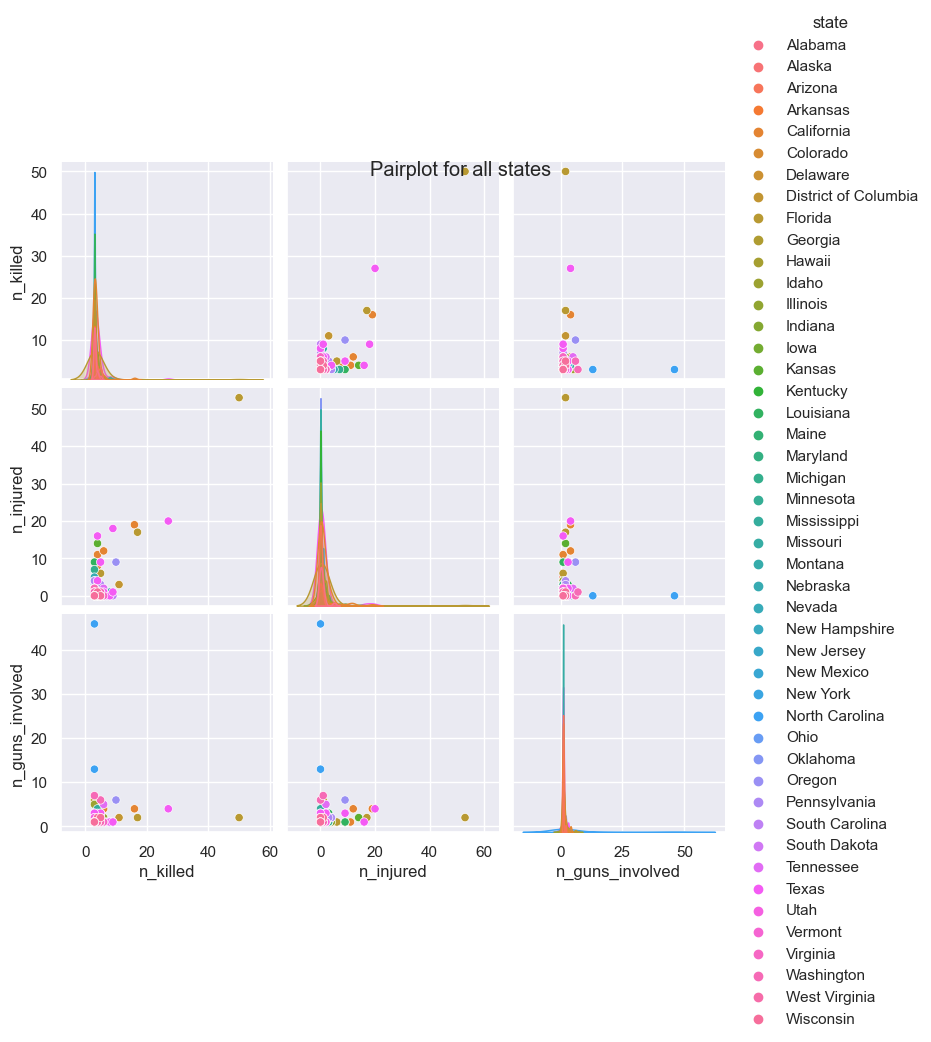

In [287]:
sns.pairplot(pair_df, kind='scatter',hue='state')
plt.suptitle('Pairplot for all states')
plt.show()

### Pair plot by state

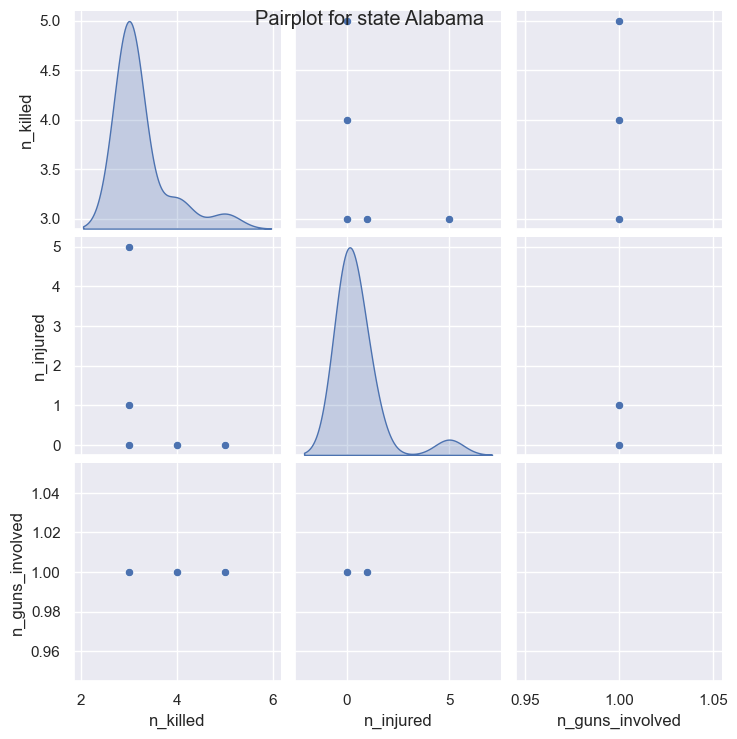

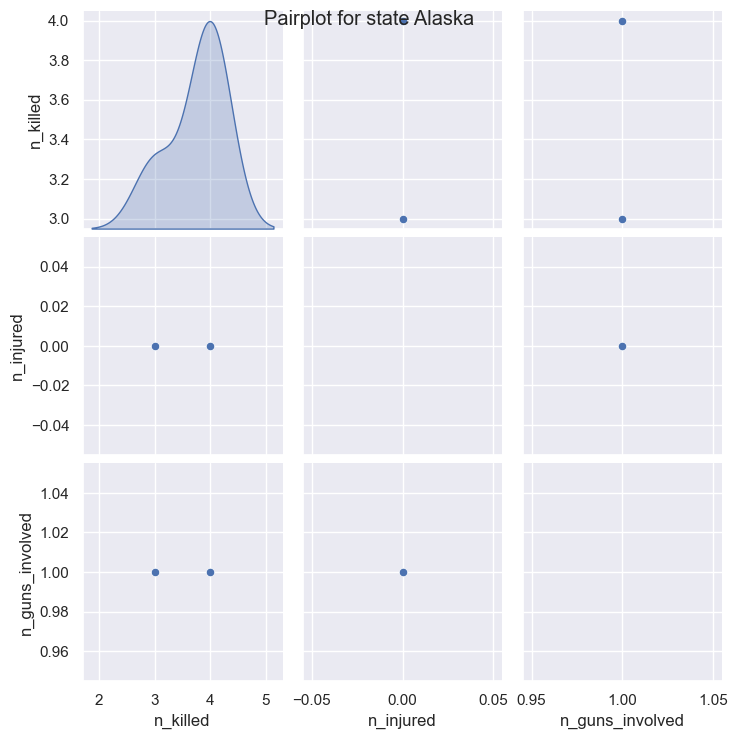

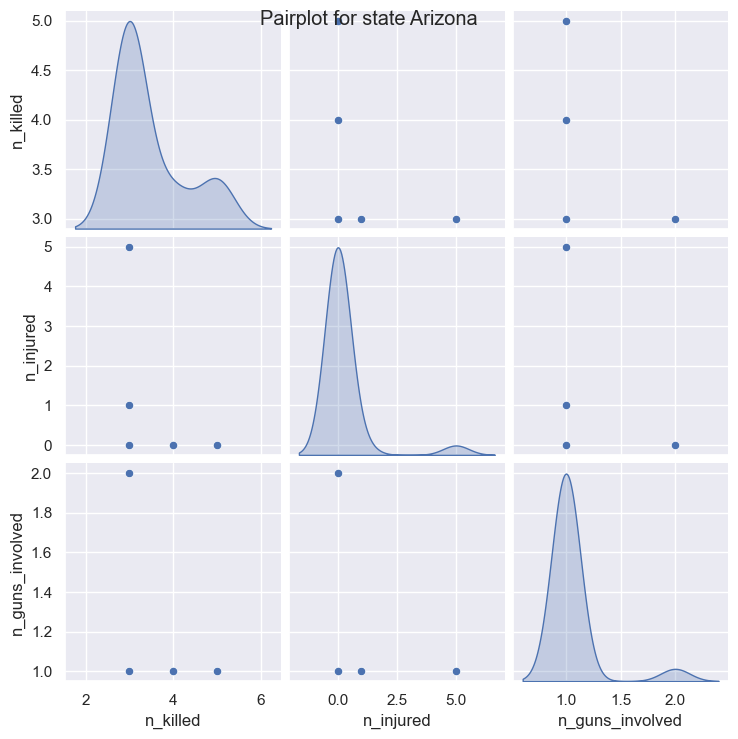

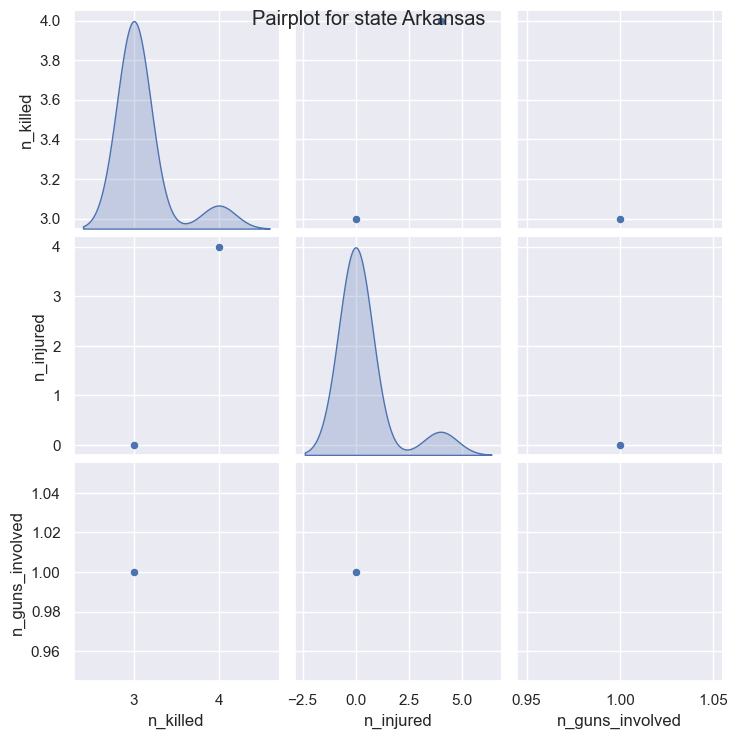

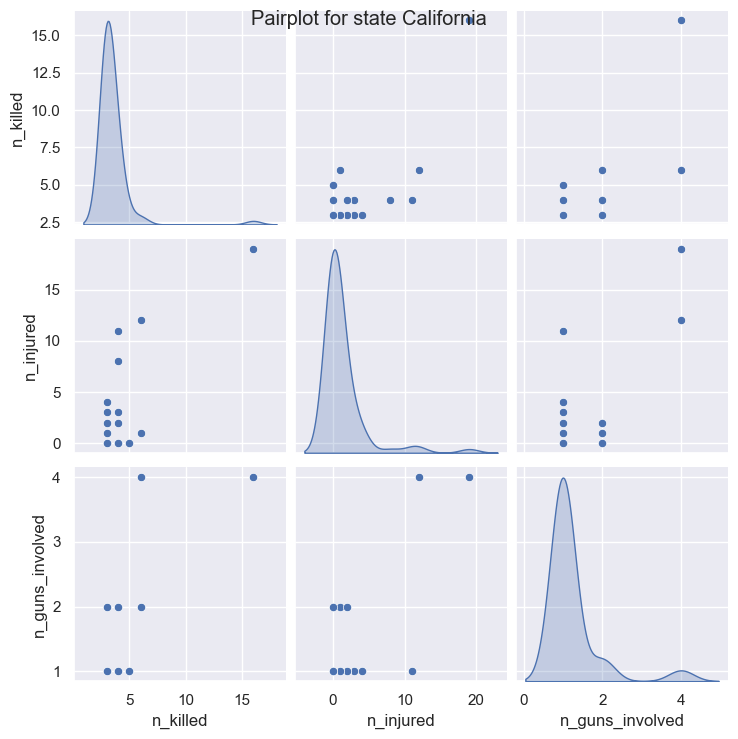

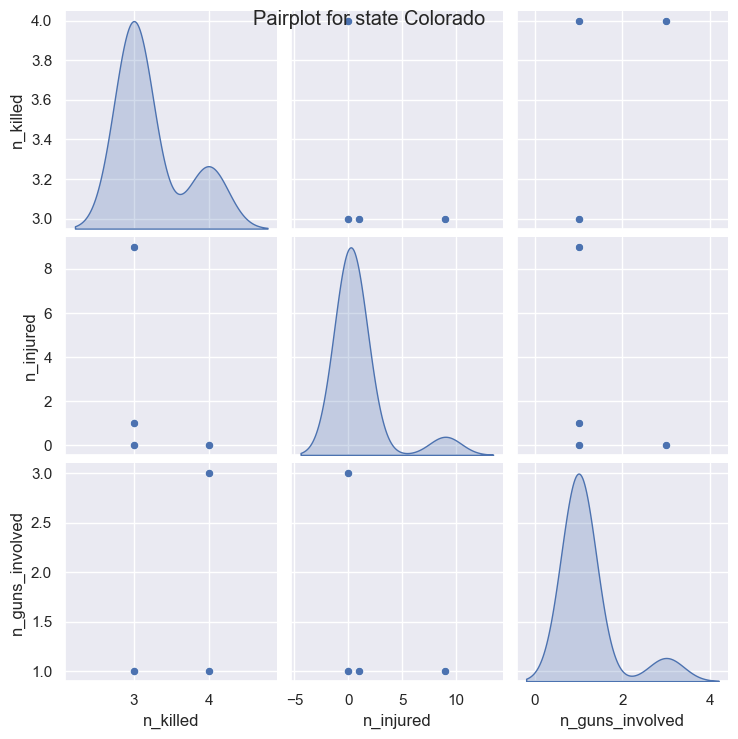

/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


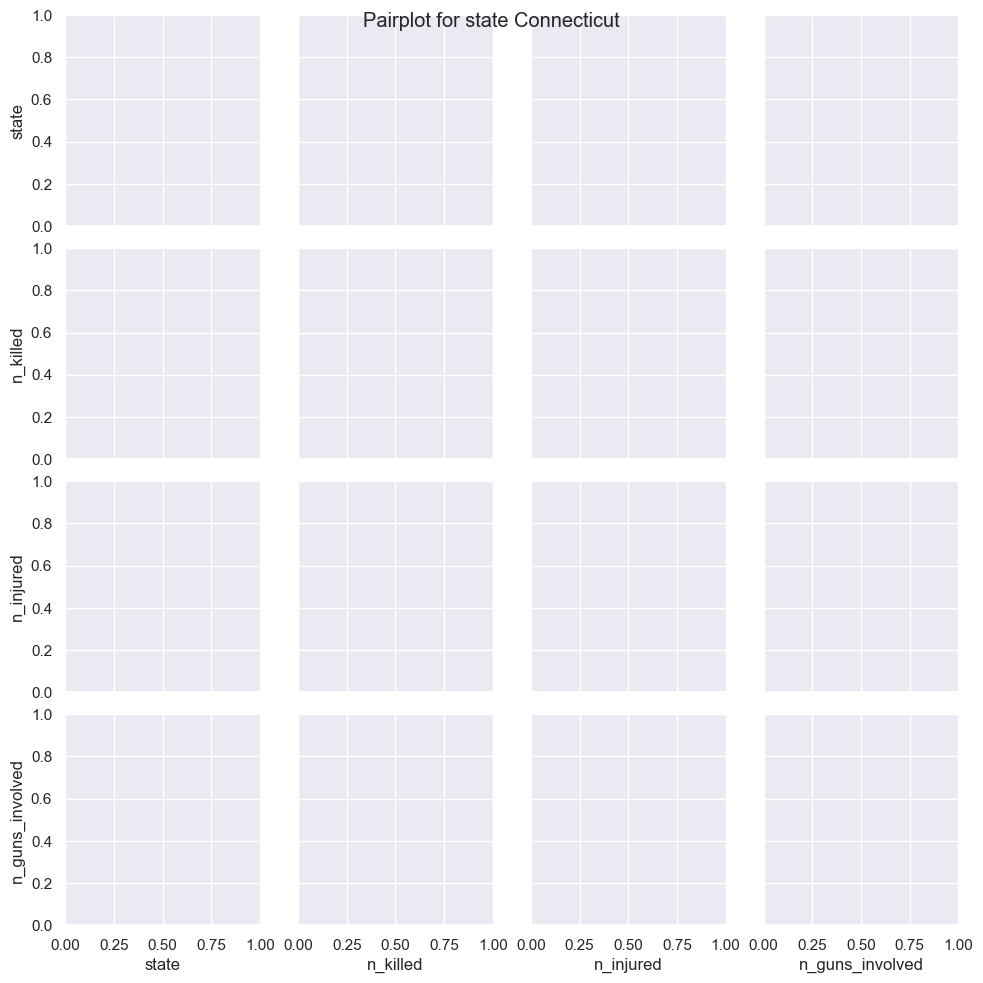

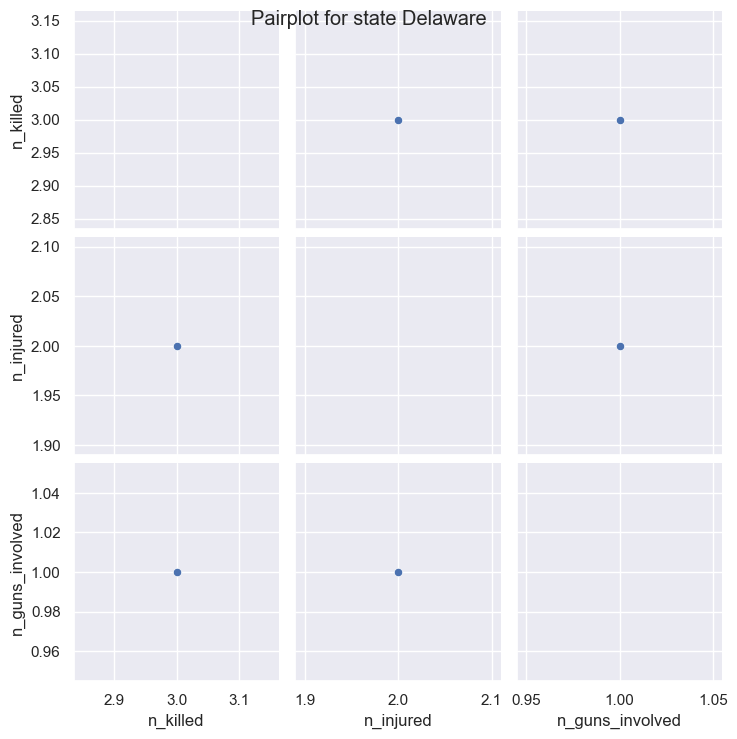

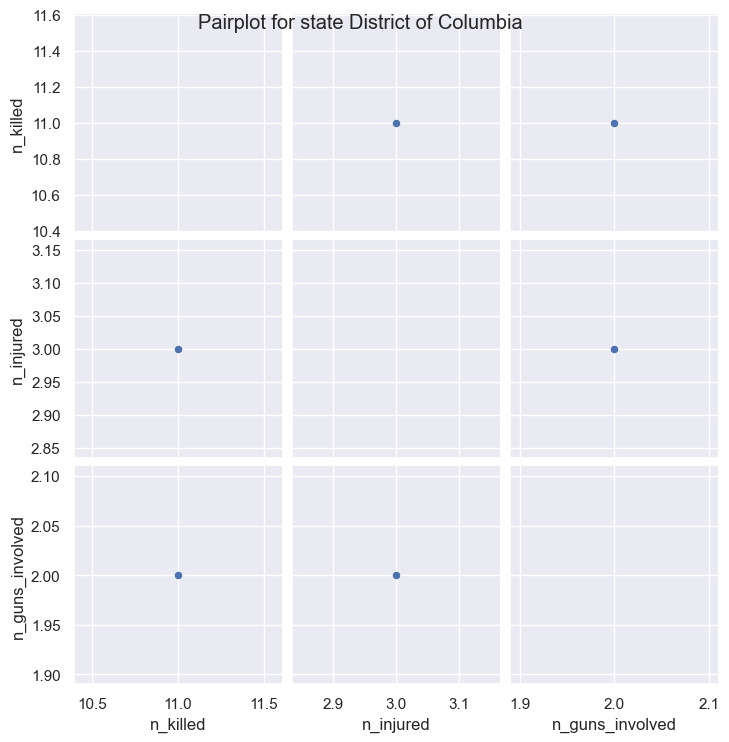

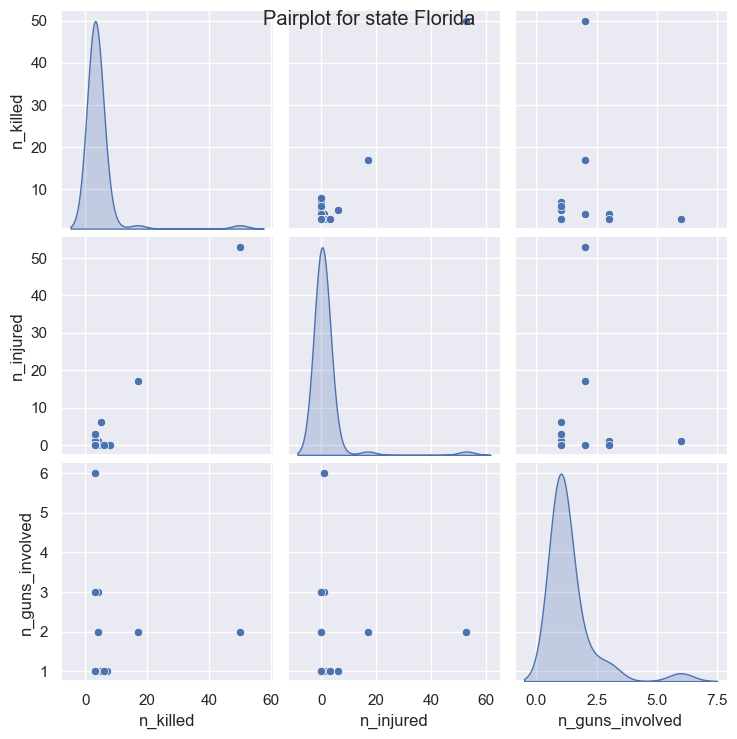

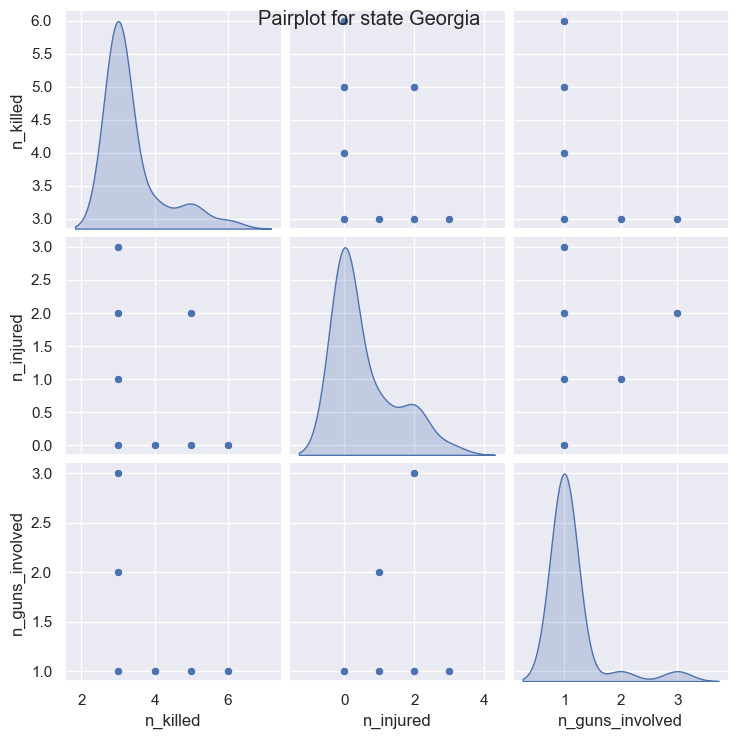

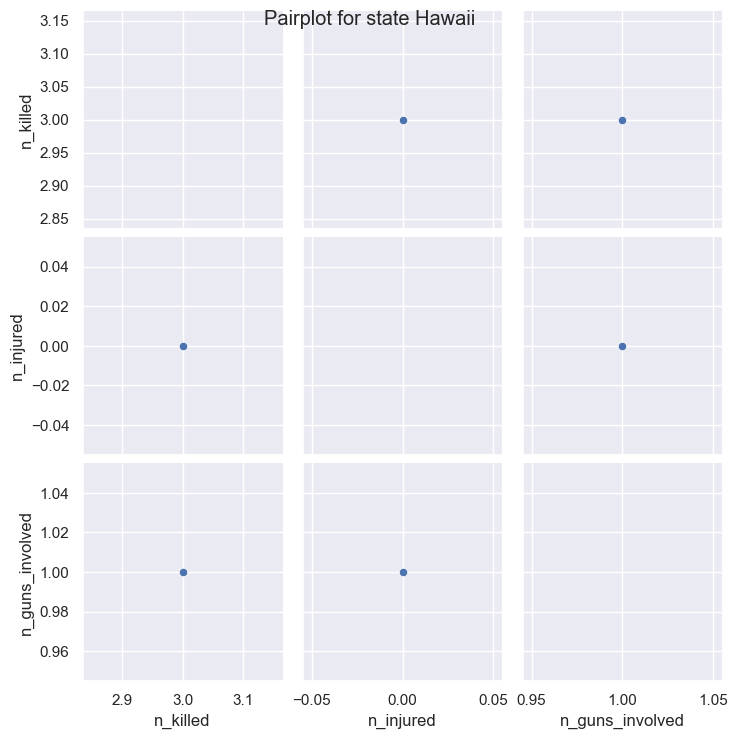

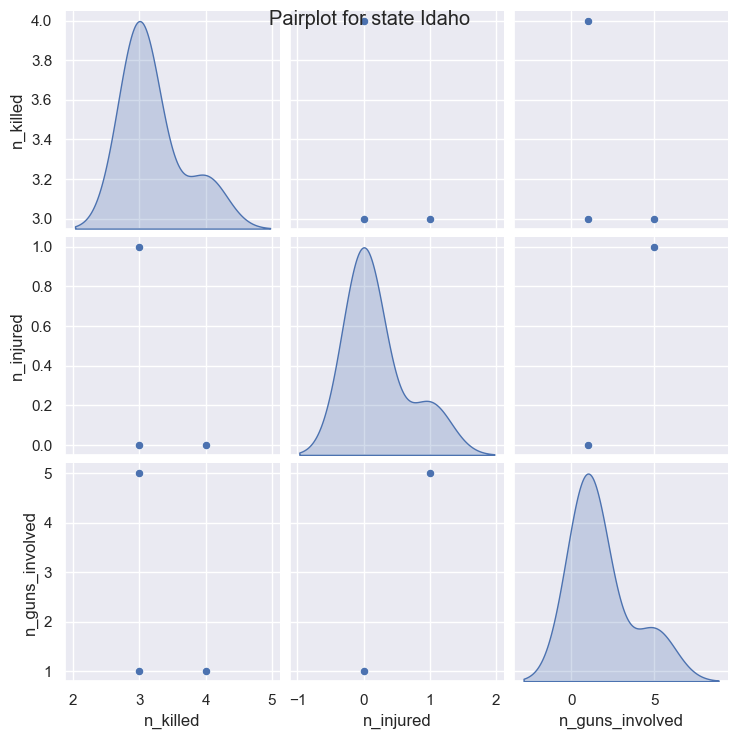

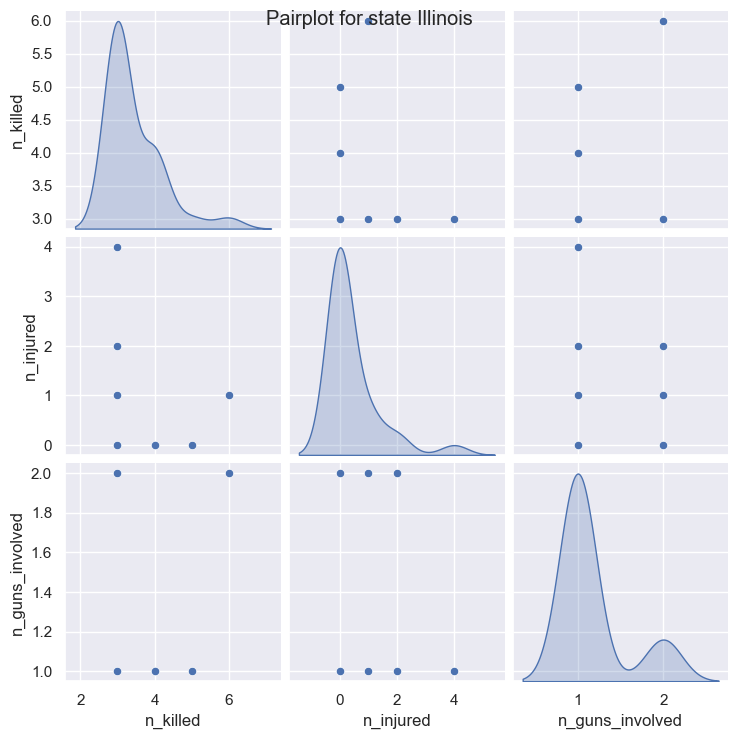

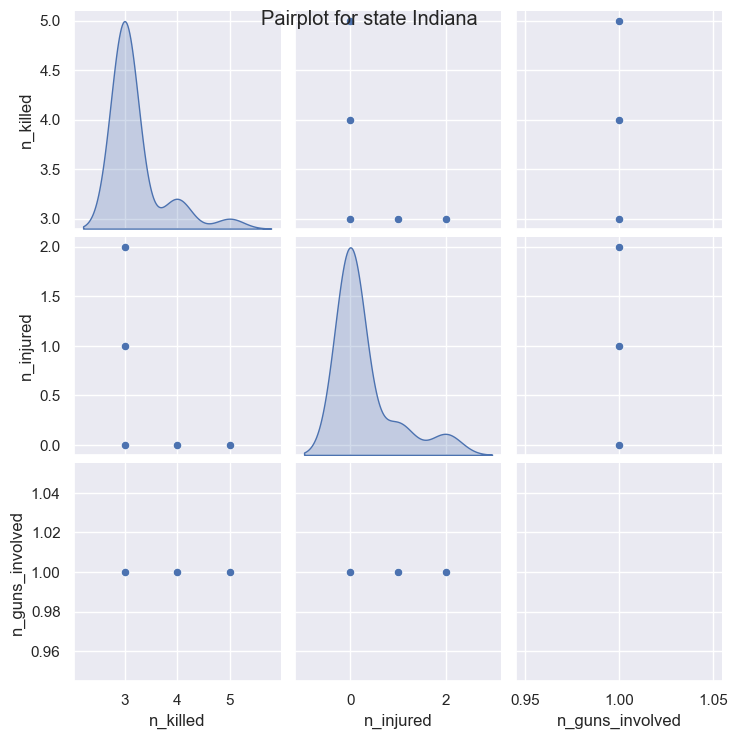

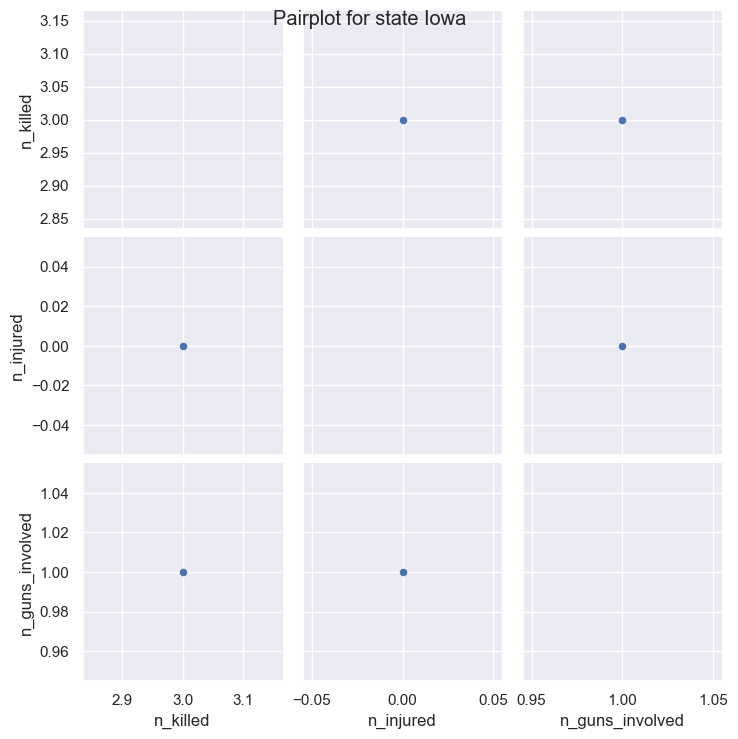

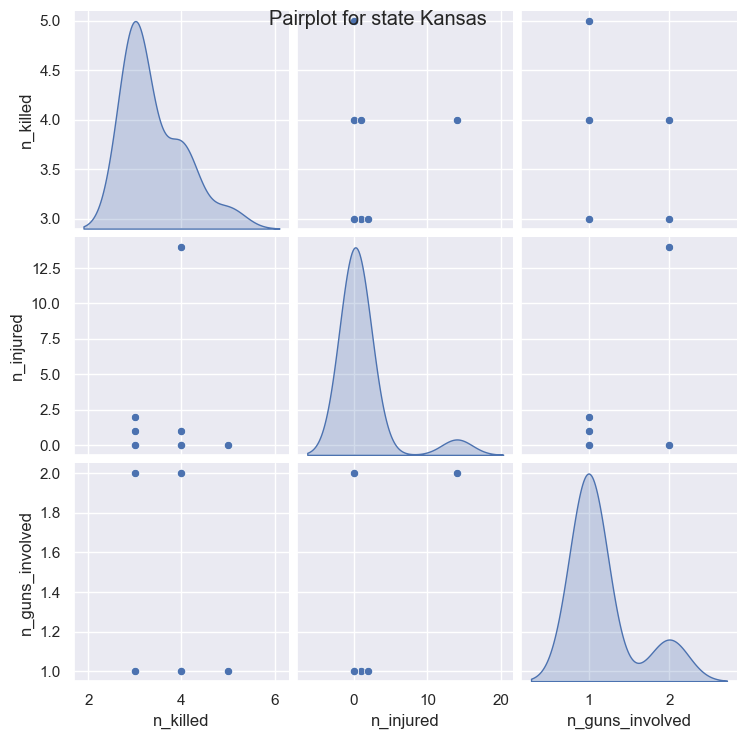

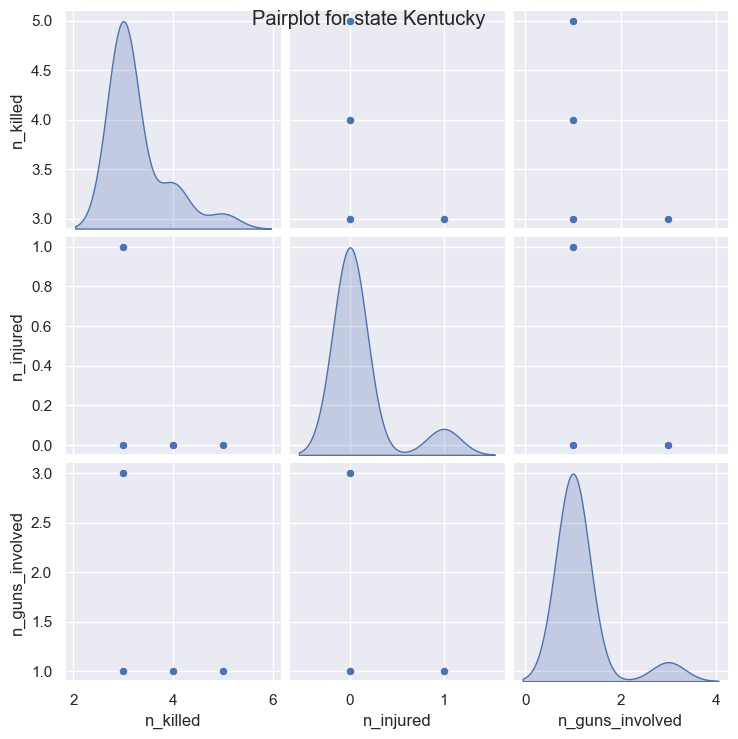

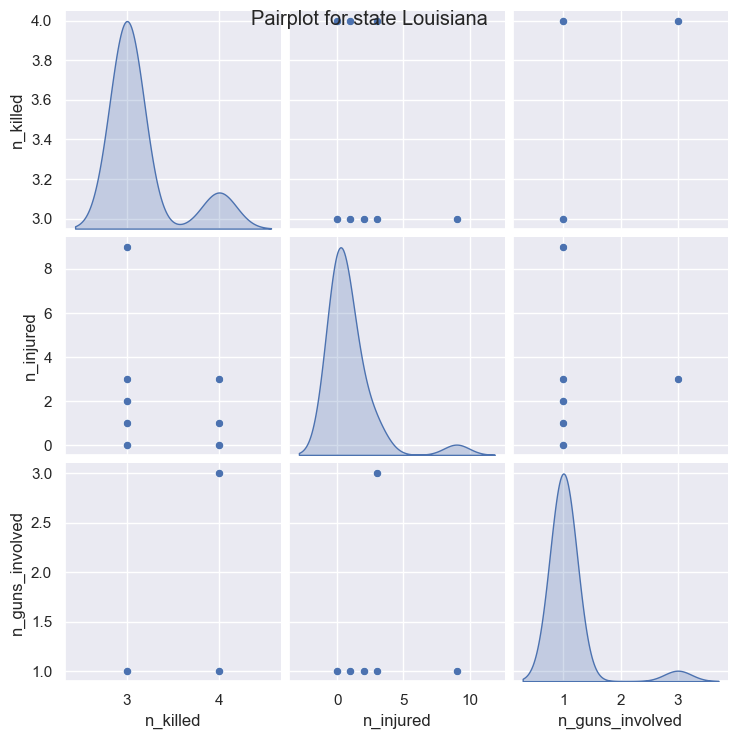

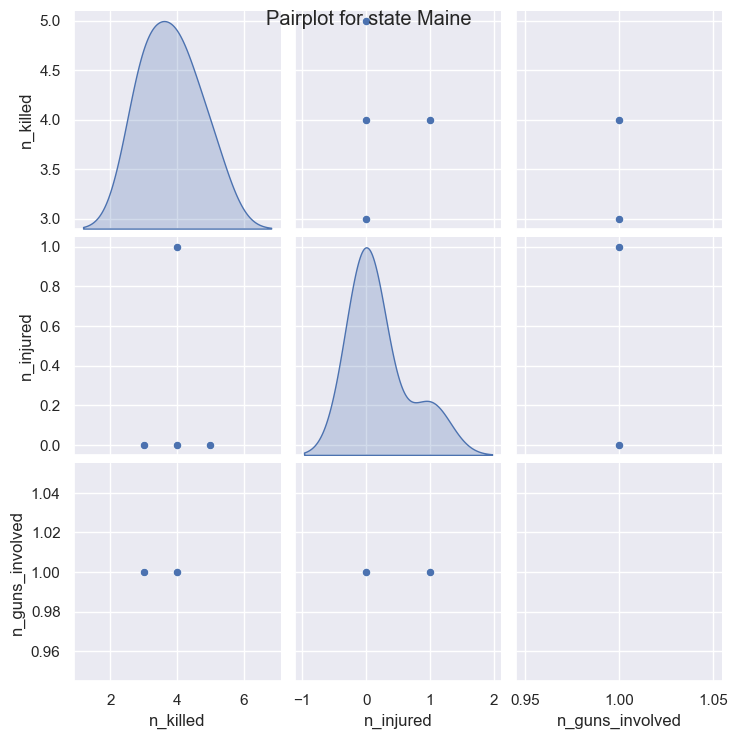

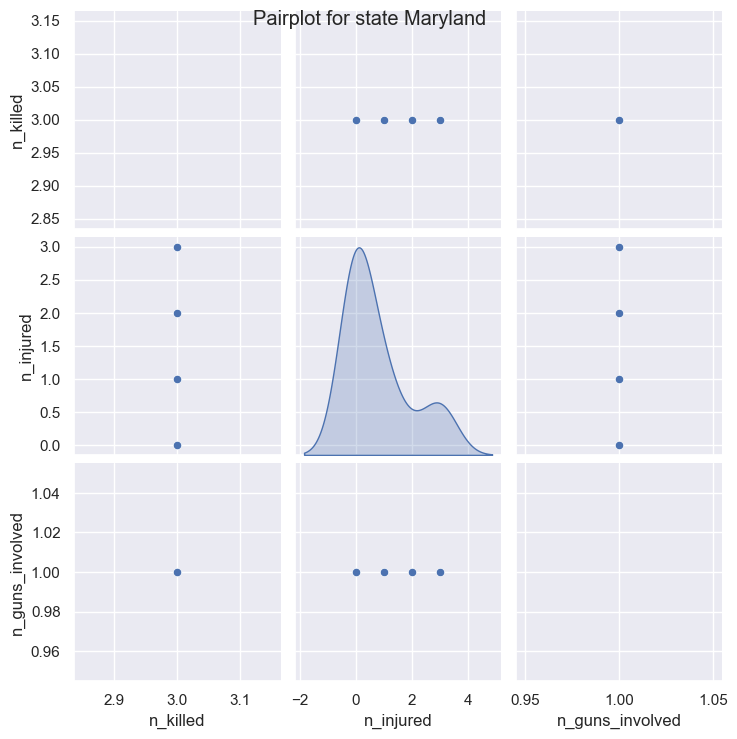

/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


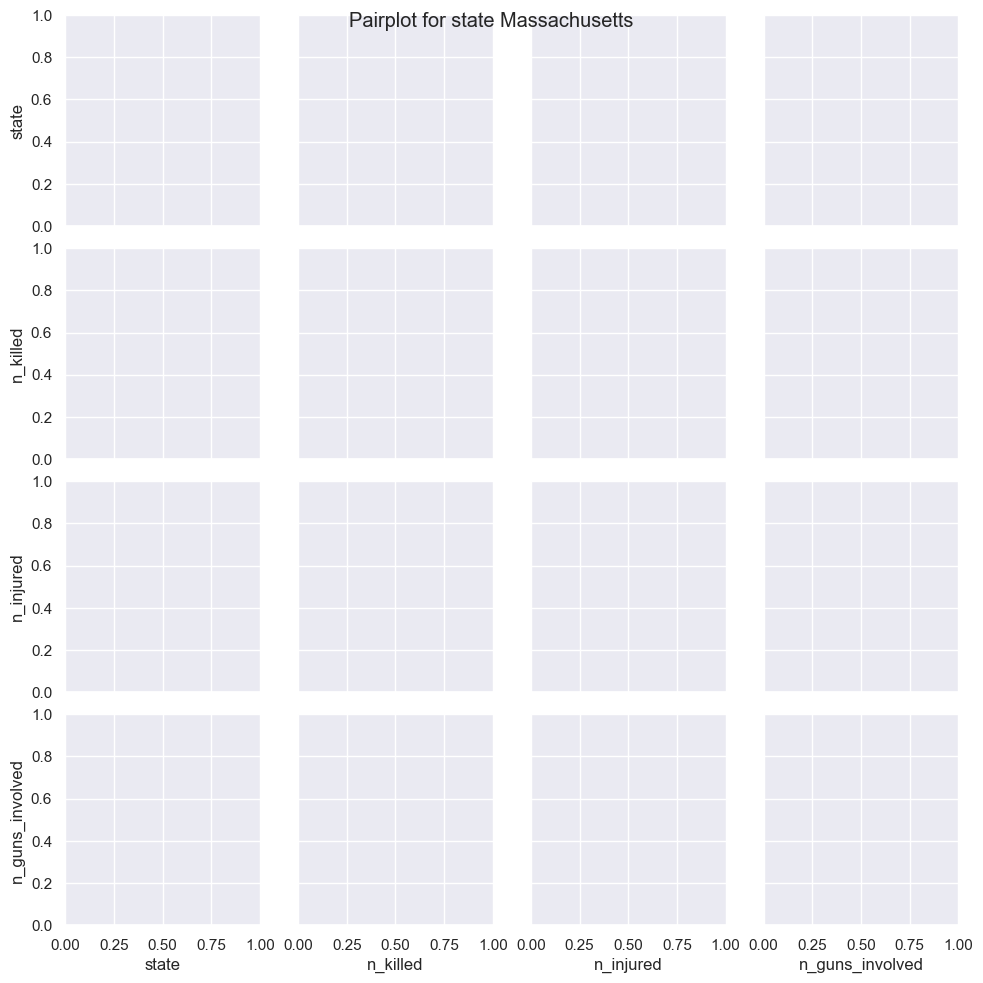

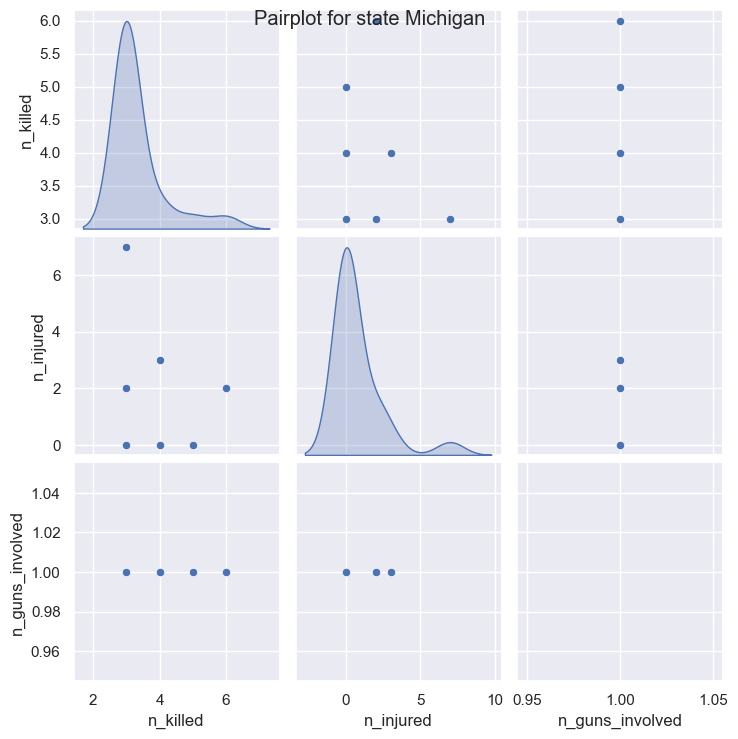

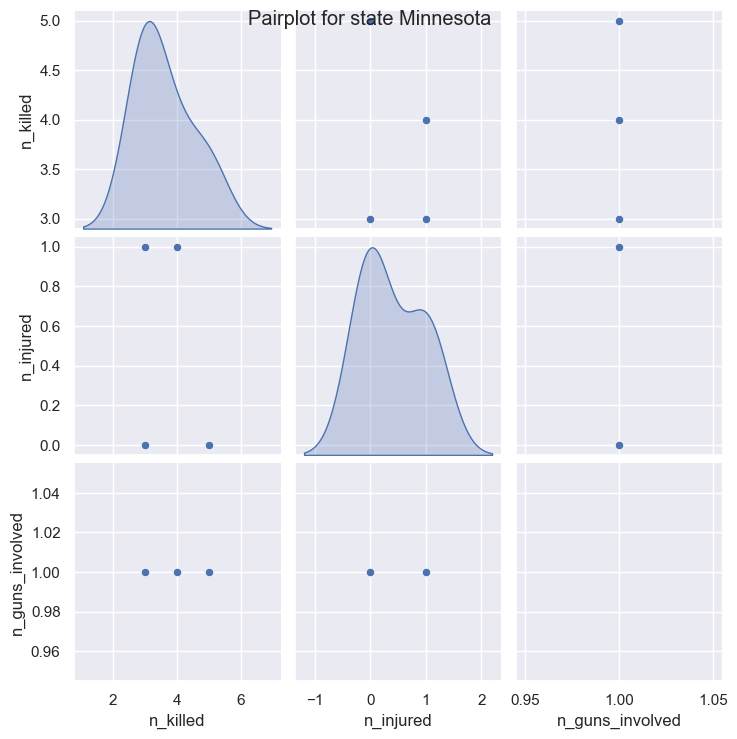

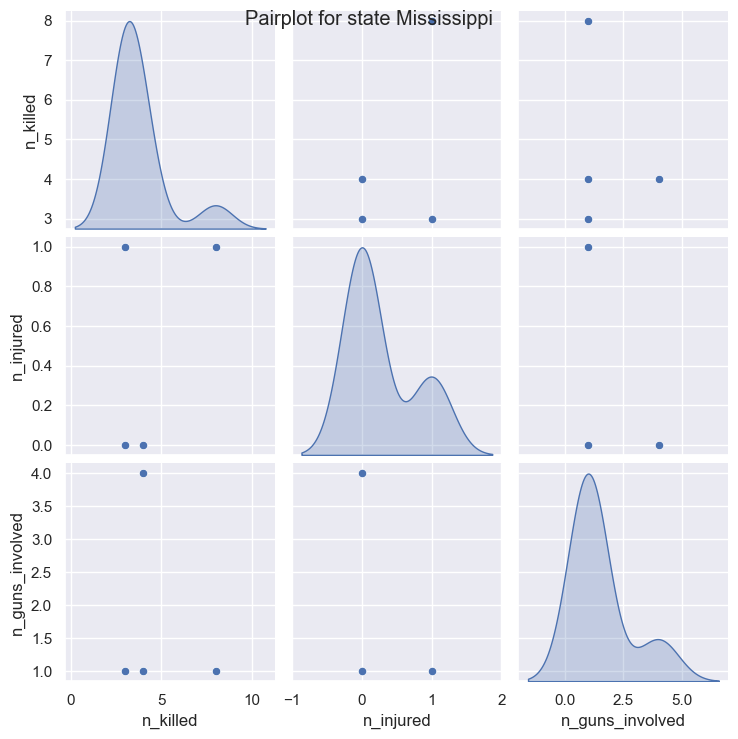

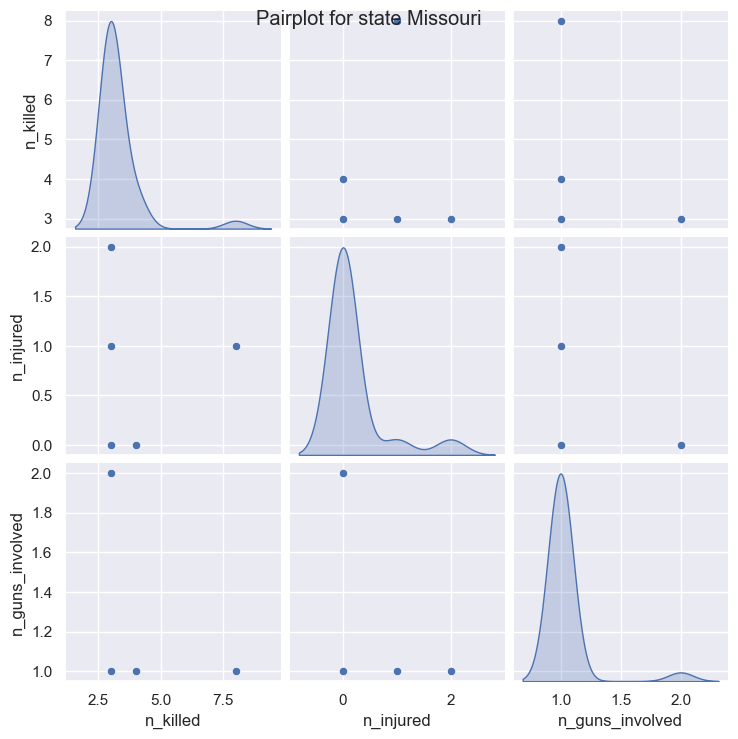

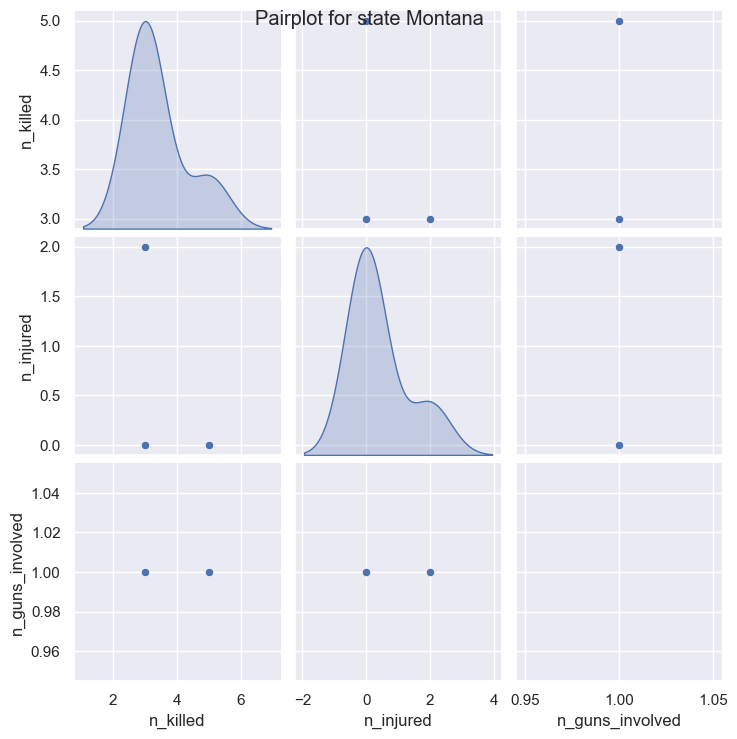

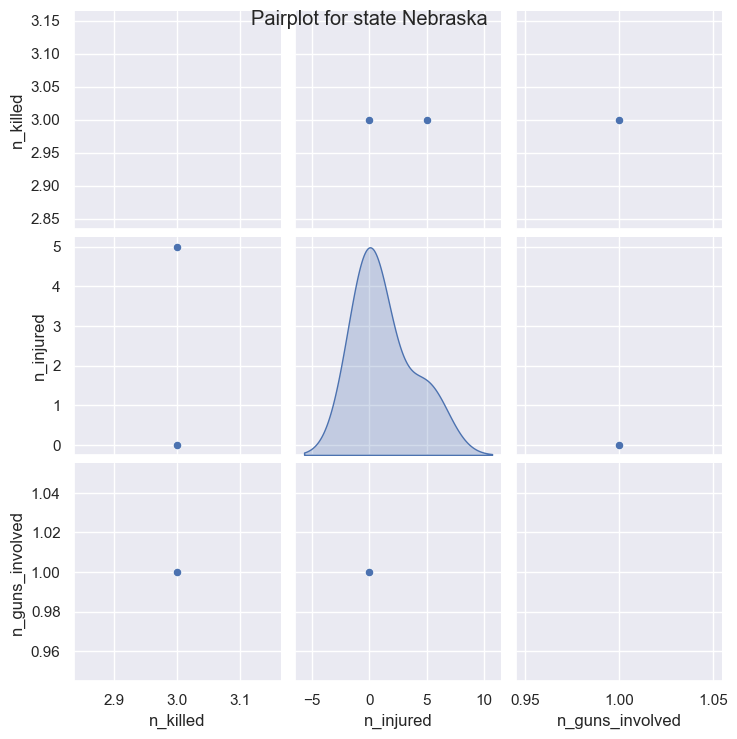

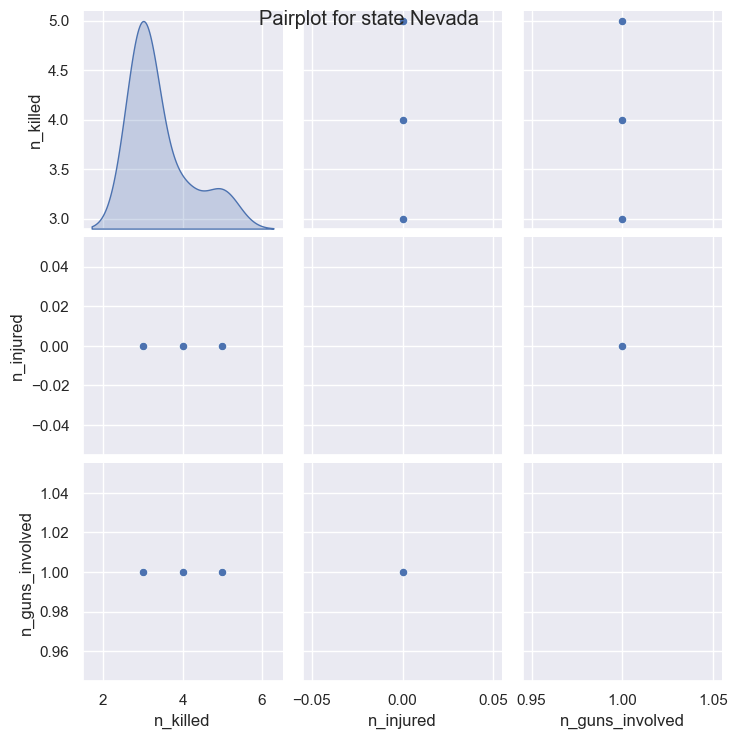

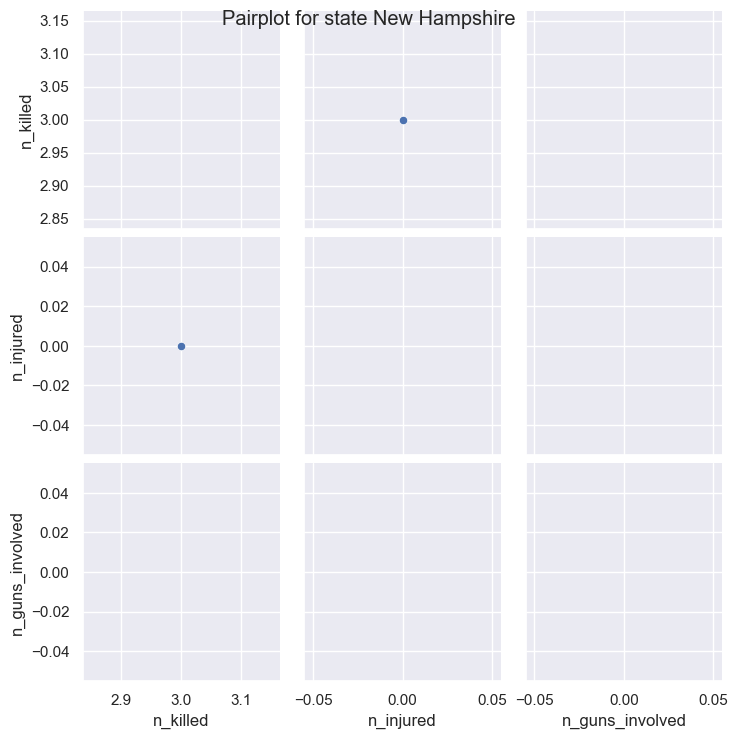

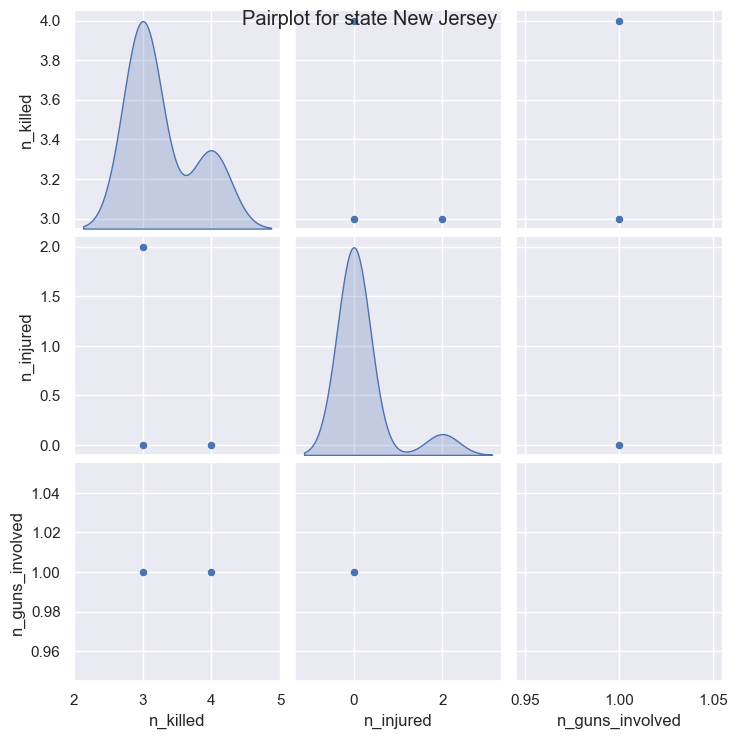

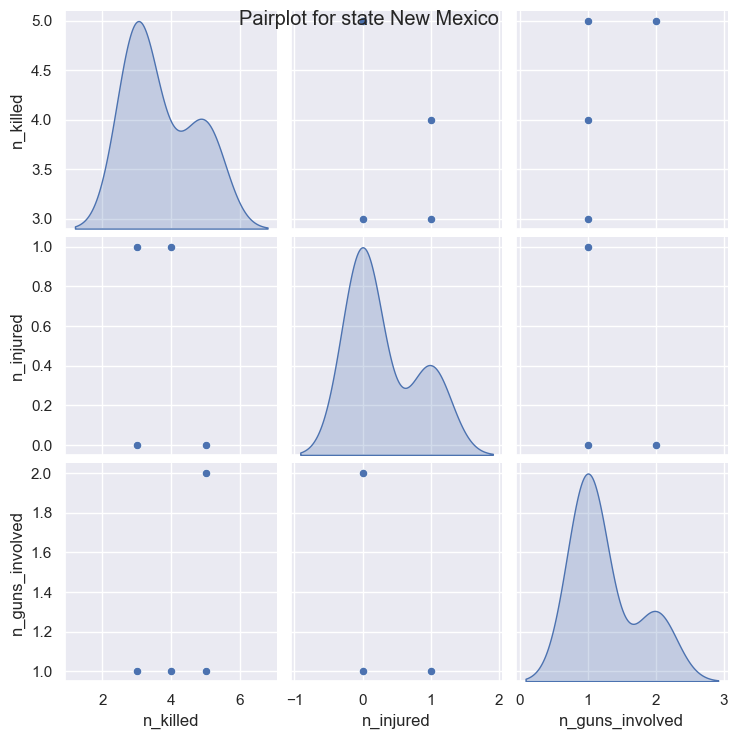

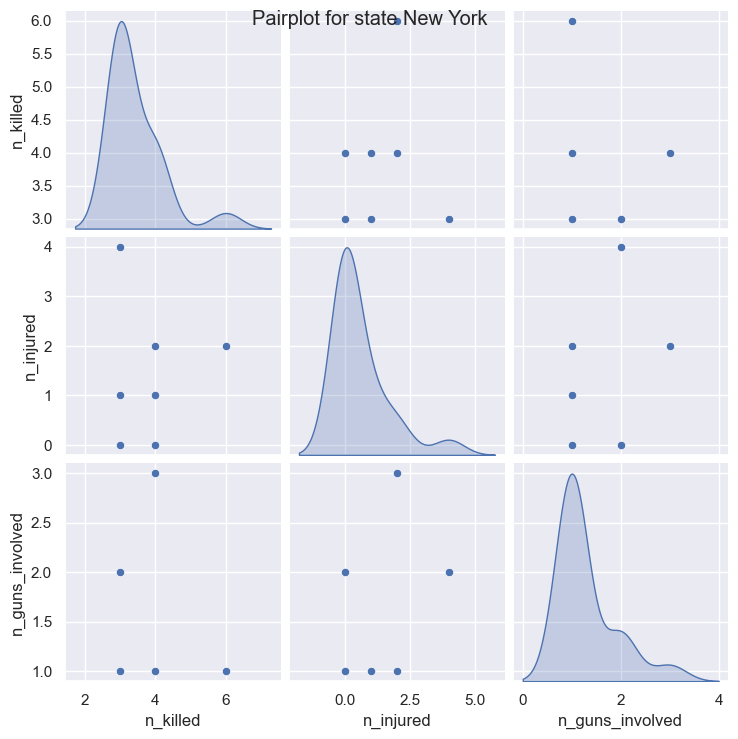

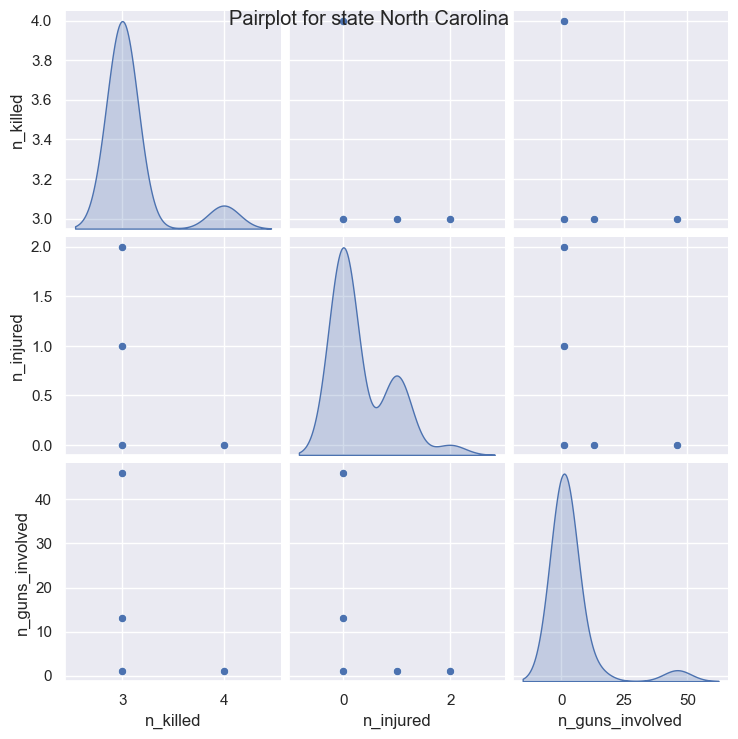

/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


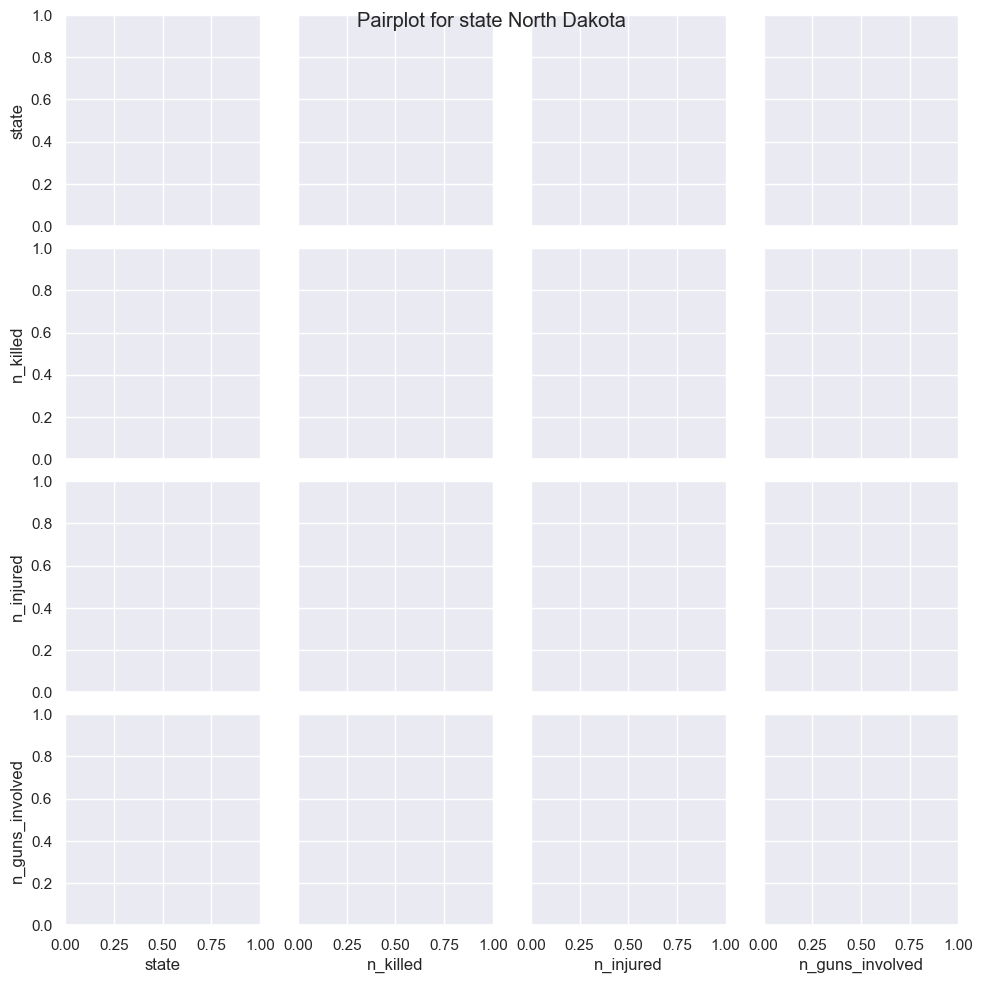

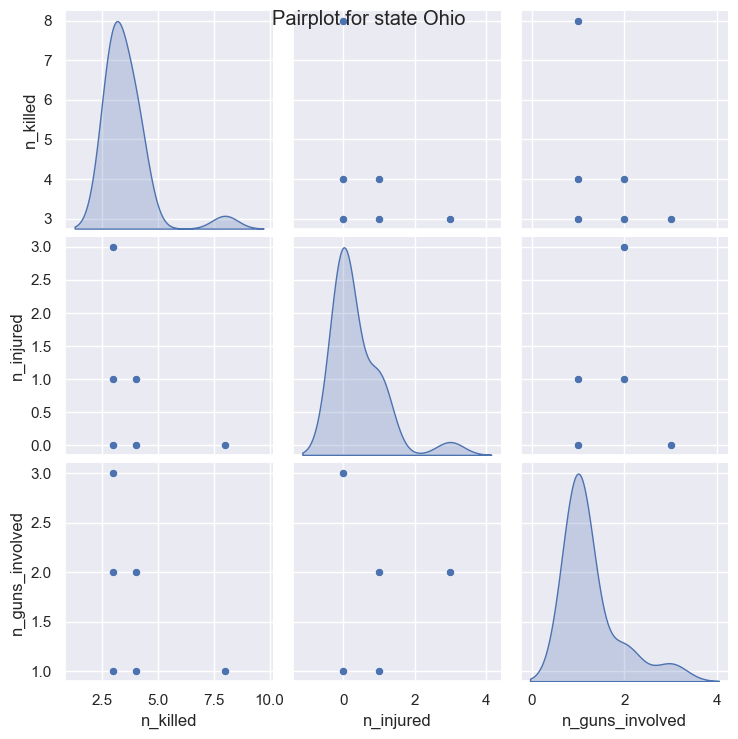

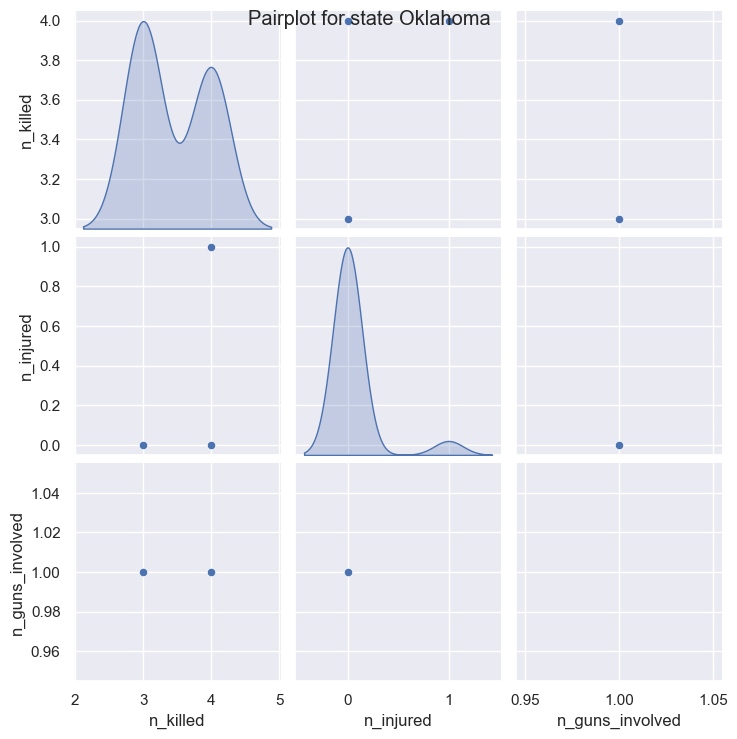

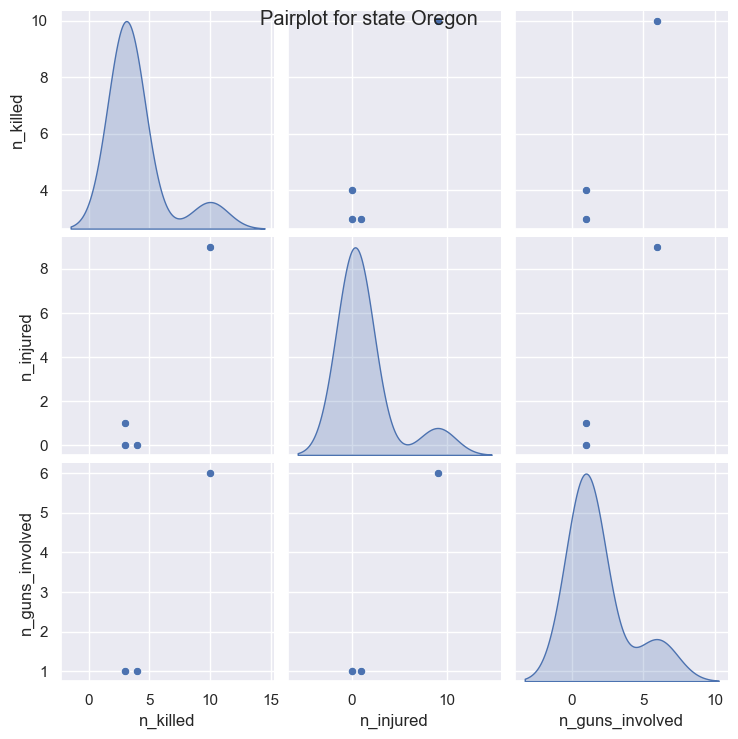

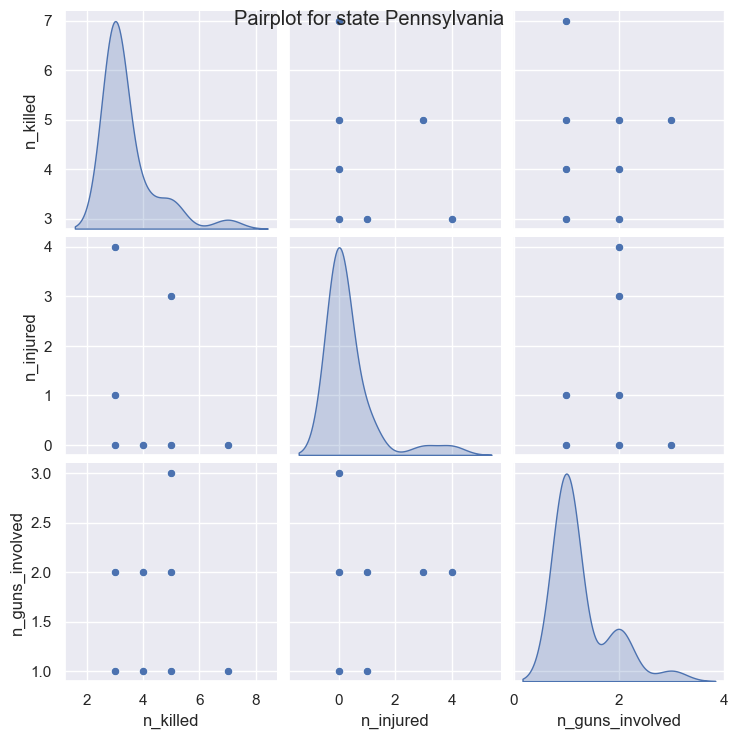

/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


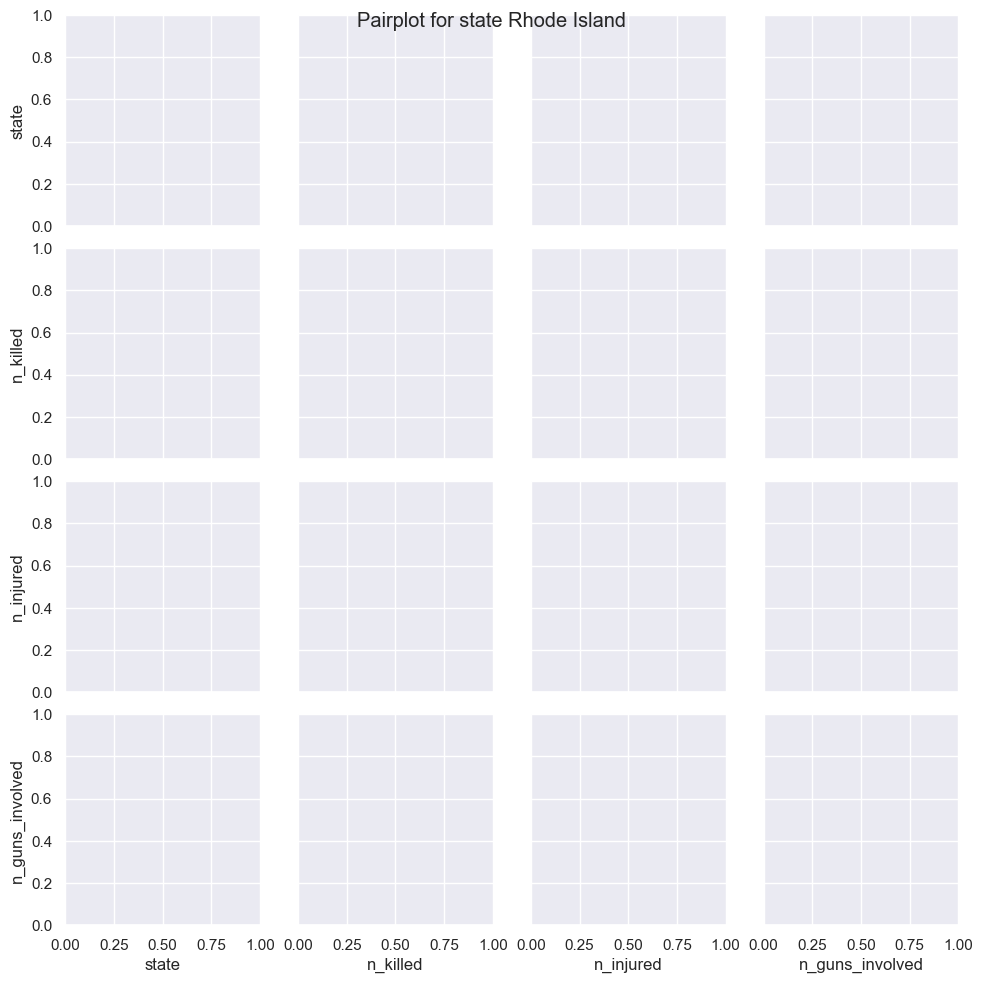

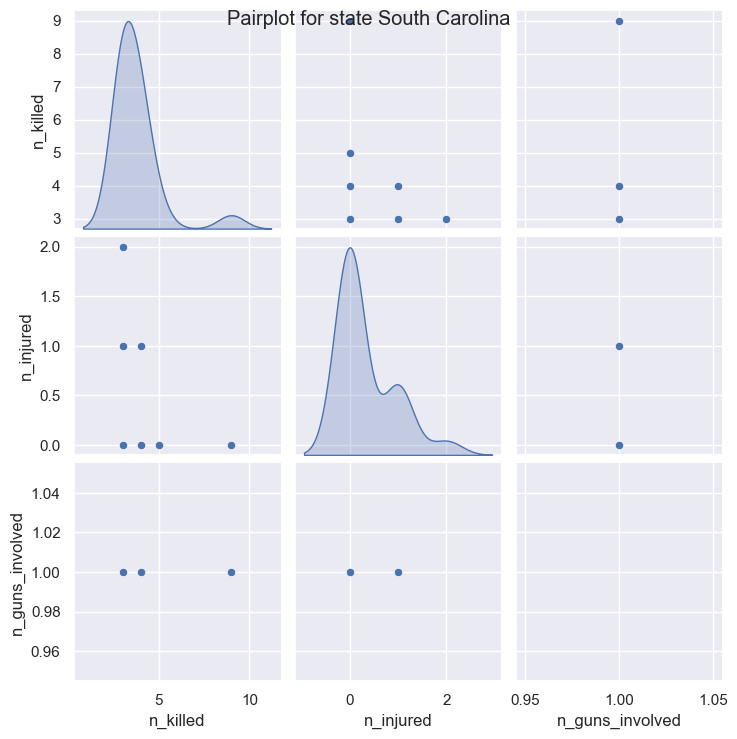

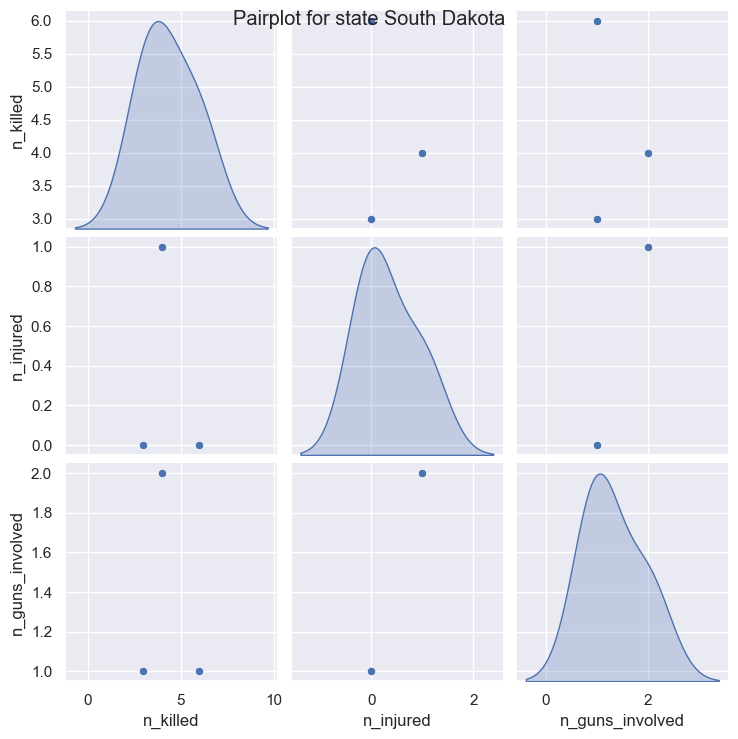

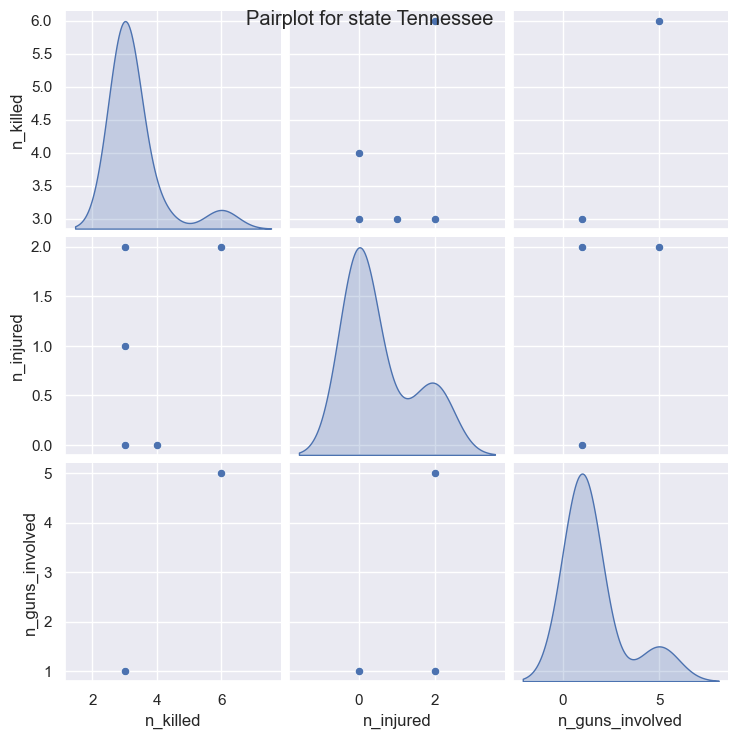

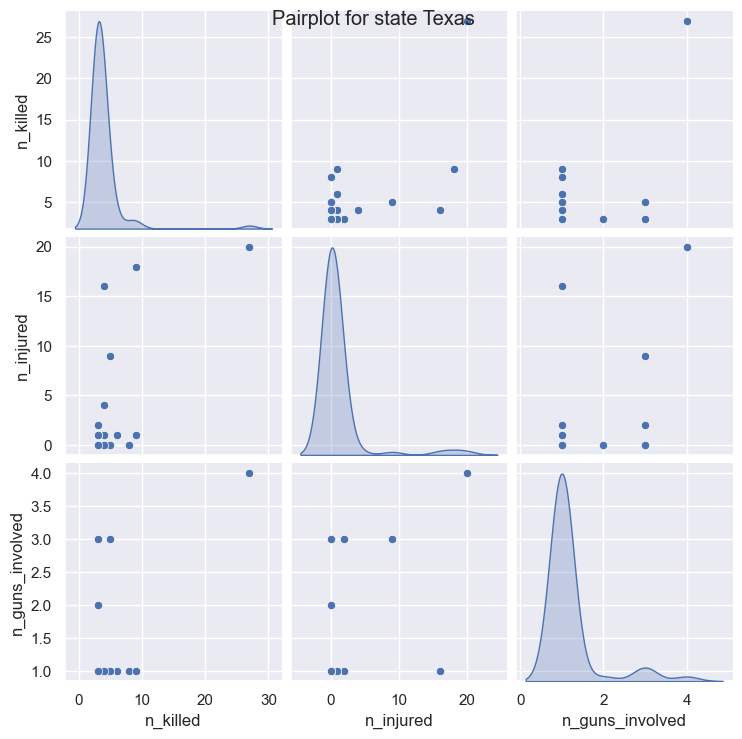

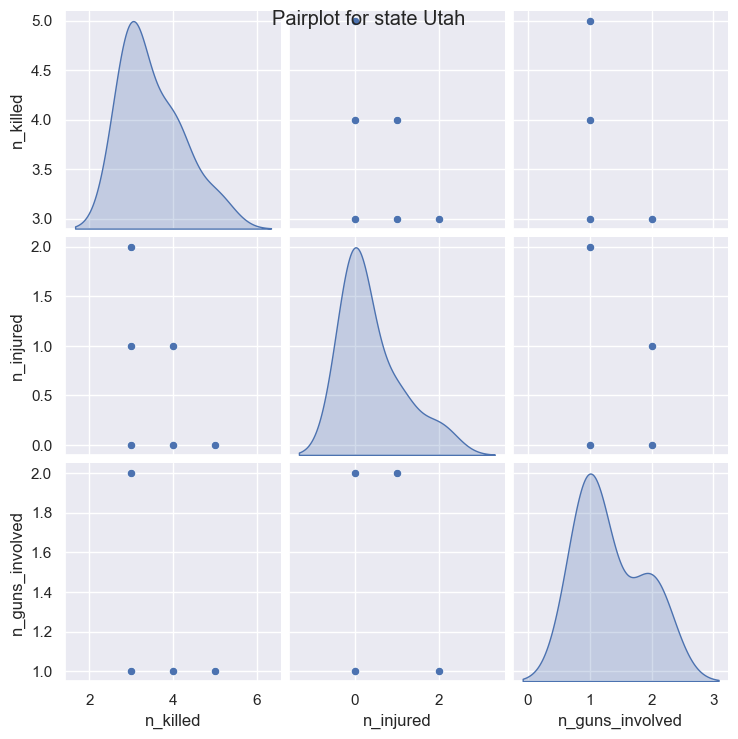

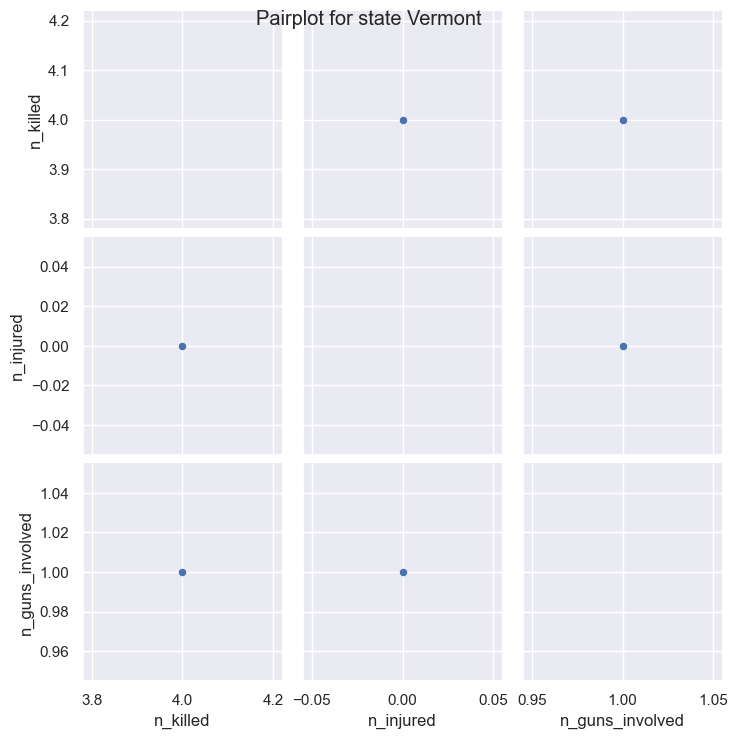

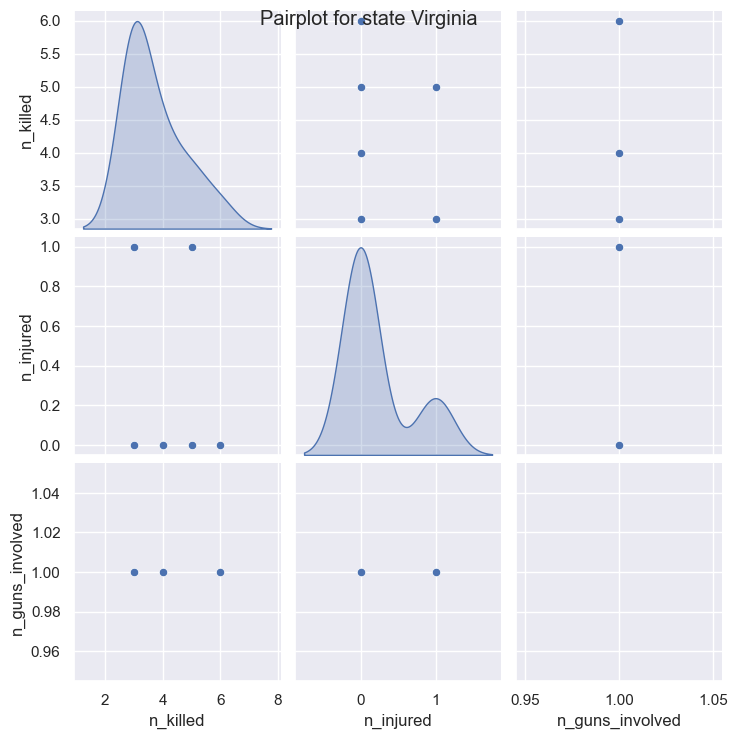

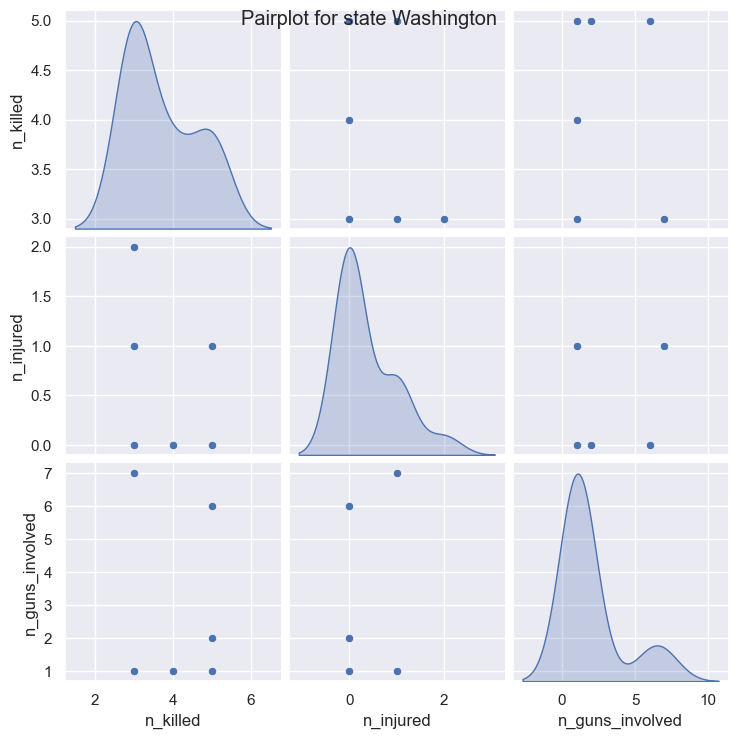

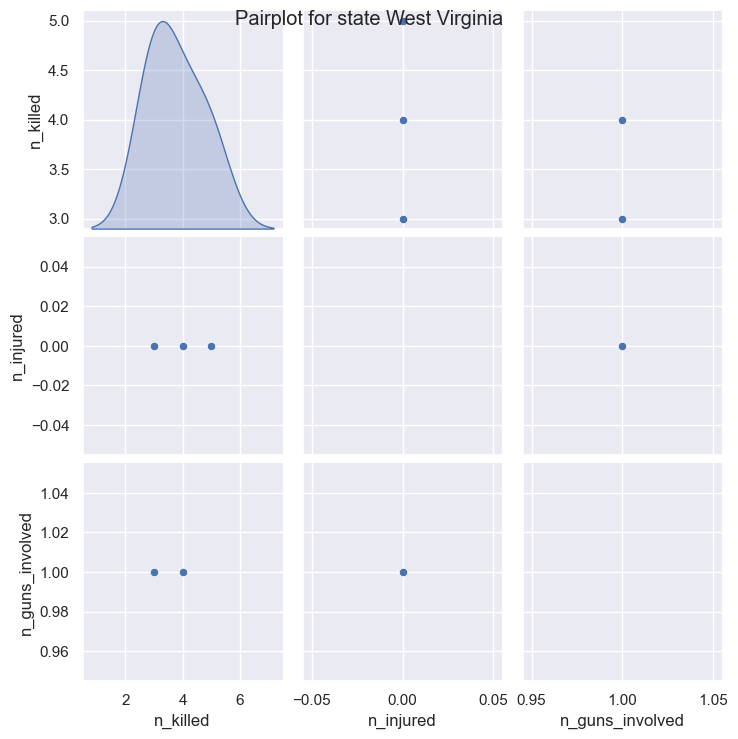

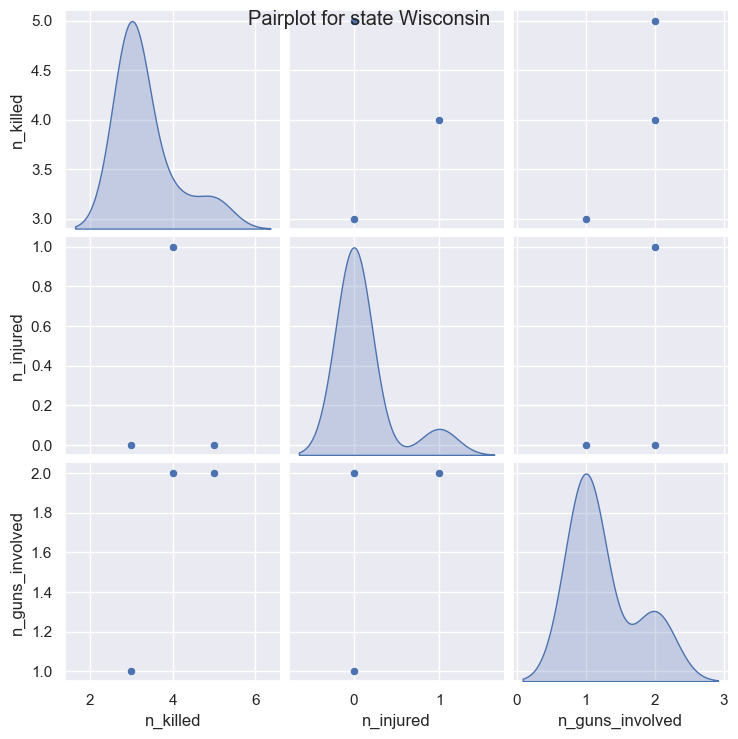

/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


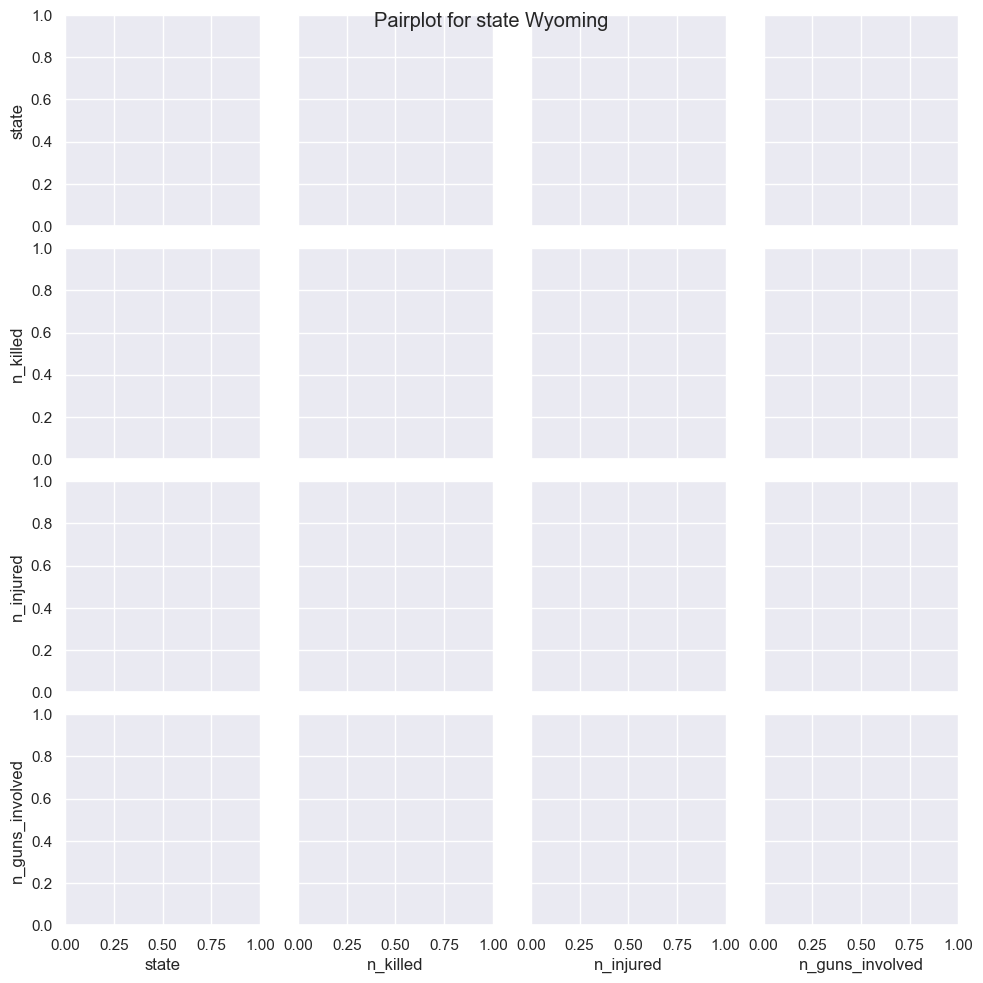

In [288]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", 
               "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", 
               "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", 
               "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
               "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
for state in sorted(state_names) :
    sns.pairplot(pair_df[pair_df['state']==state],kind='scatter',diag_kind='kde')
    plt.suptitle('Pairplot for state {}'.format(state))
    plt.show()

### Histogram of States vs Incidents

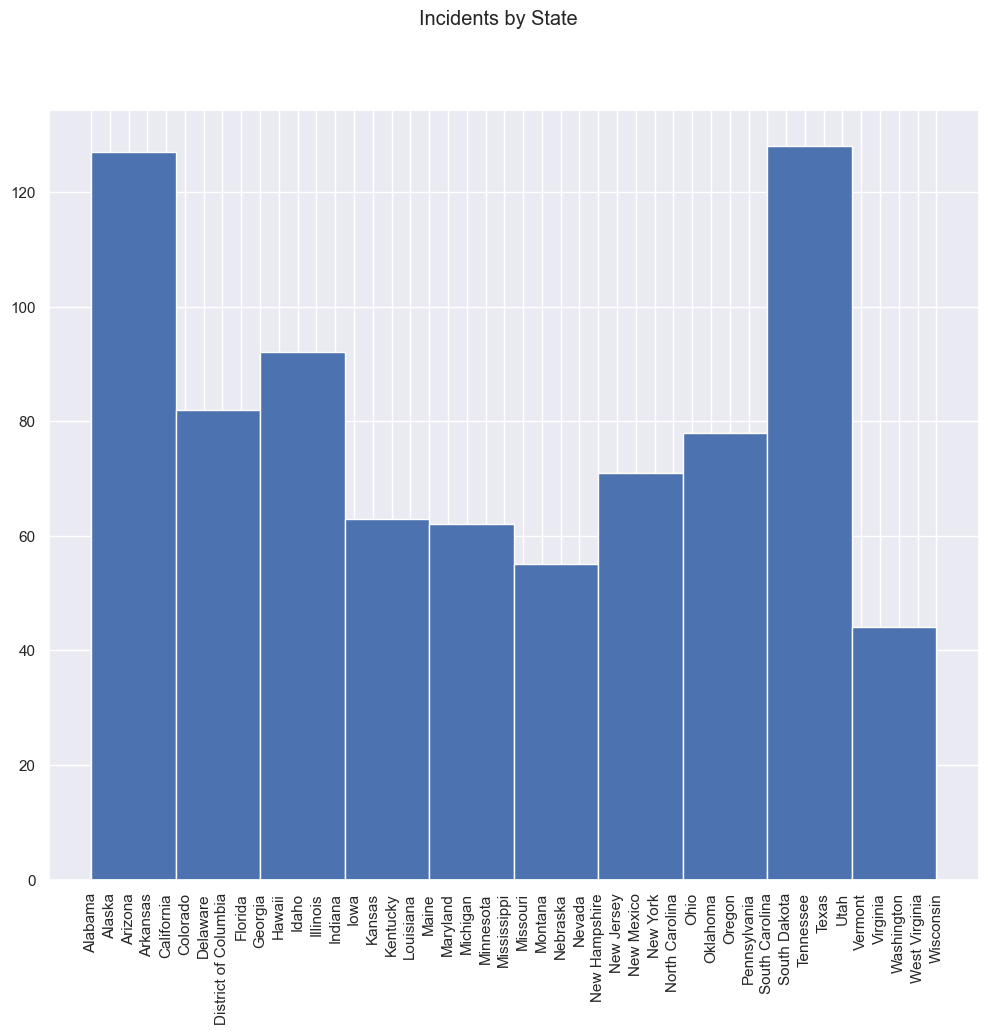

In [289]:
gun_df['state'].hist(xrot=90, figsize=(12.0,10.0))
plt.suptitle("Incidents by State")
plt.show()

### Histogram of Guns by Type

In [290]:
Guns =["Unknown_Guns", "Handgun", "Shotgun", "Rifle", "Other", "Automatic"]
c=[]
for gun in Guns:
    c.append(gun_df[gun].sum())
dict1 = {'Gun':Guns, 'Count':c}
gun_typedf=pd.DataFrame.from_dict(dict1)

(array([3., 1., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([  2. ,  43.3,  84.6, 125.9, 167.2, 208.5, 249.8, 291.1, 332.4,
        373.7, 415. ]),
 <BarContainer object of 10 artists>)

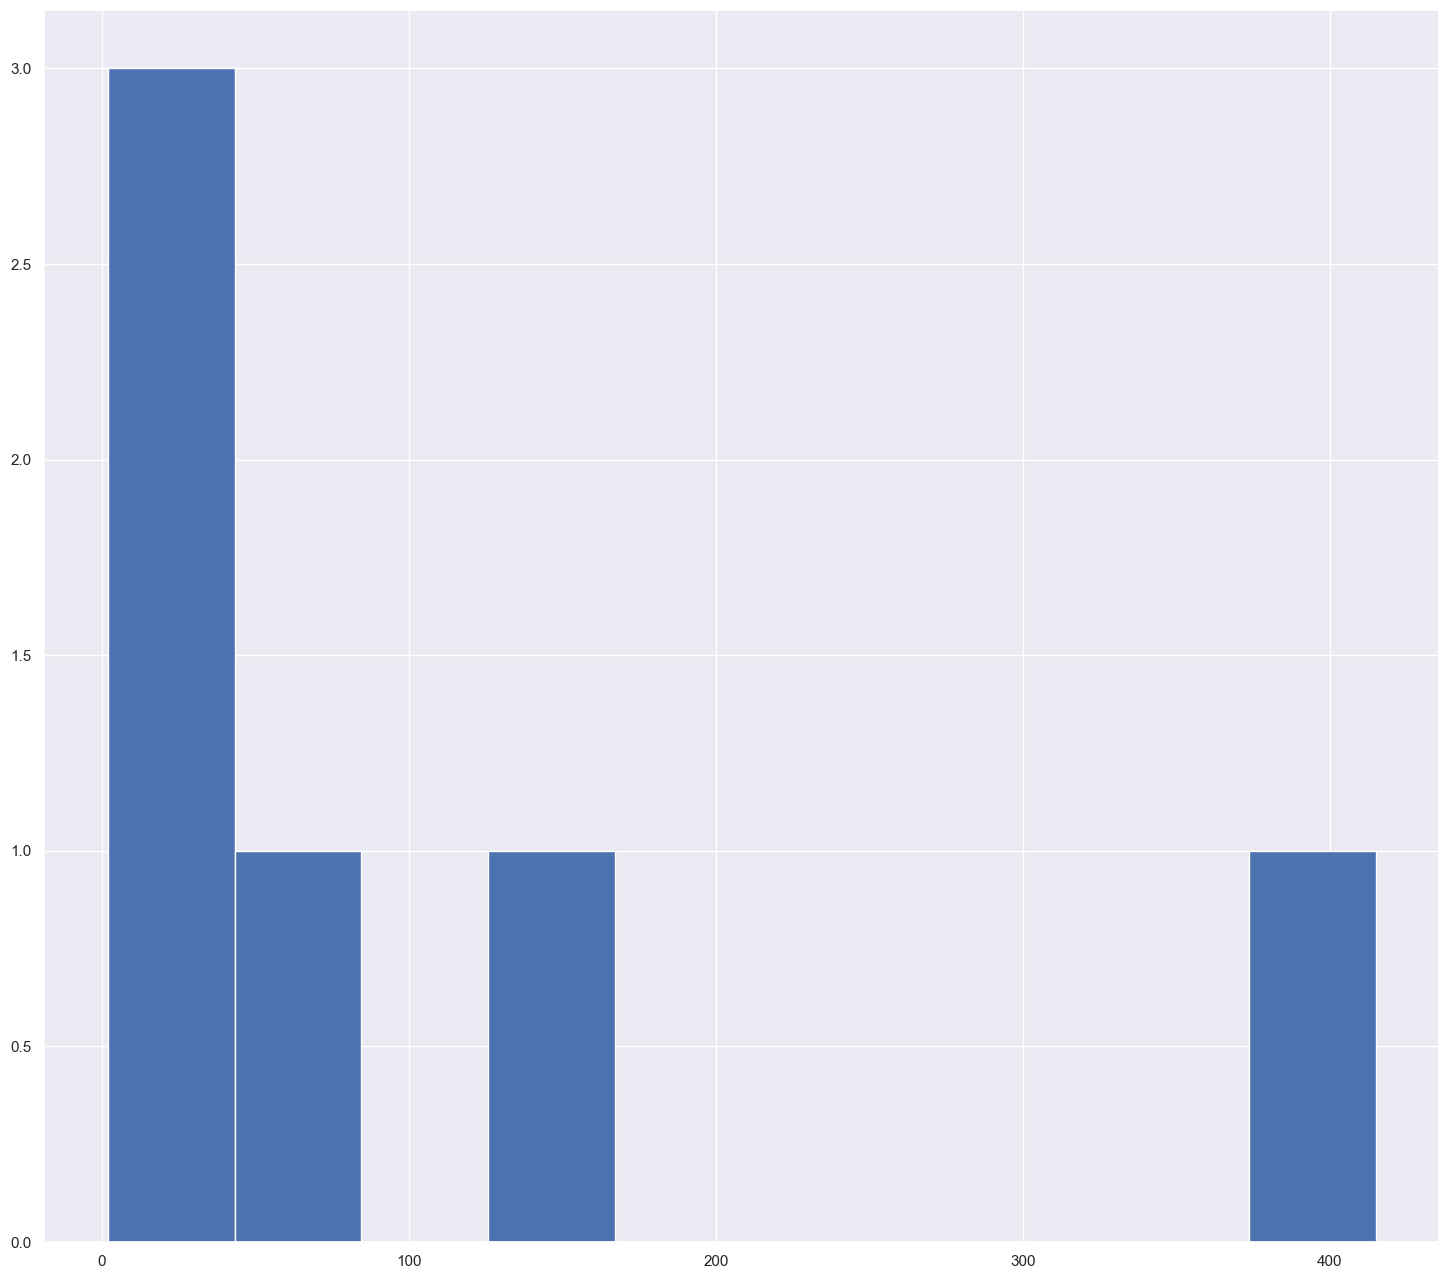

In [291]:
plt.hist(gun_typedf['Count'])

Text(0.5, 0, 'Gun Type')

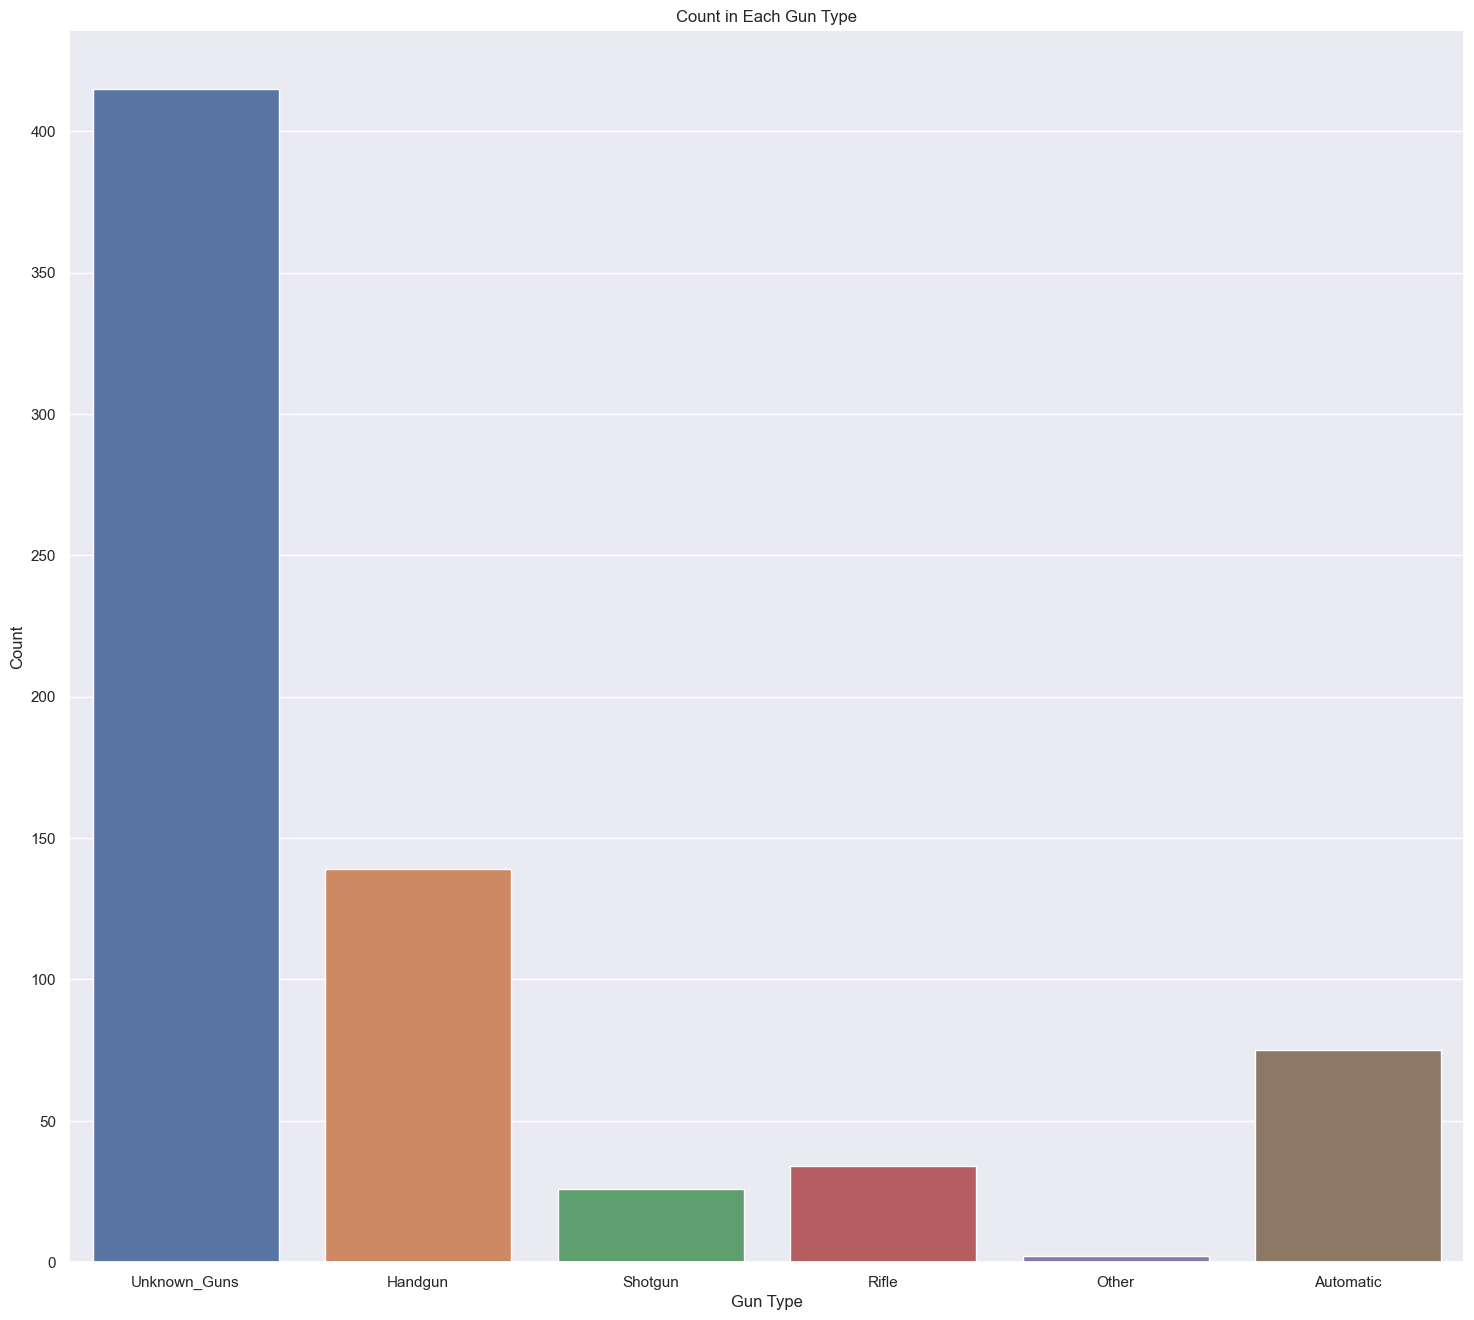

In [309]:
gun_typedf

sns.barplot(x="Gun", y = "Count", data = gun_typedf).set(title="Count in Each Gun Type")
plt.xlabel("Gun Type")


### Longitude vs Latitude by Number Killed

Text(0.5, 0.98, 'Comparison of Number of Killed by Longitude and Latitude')

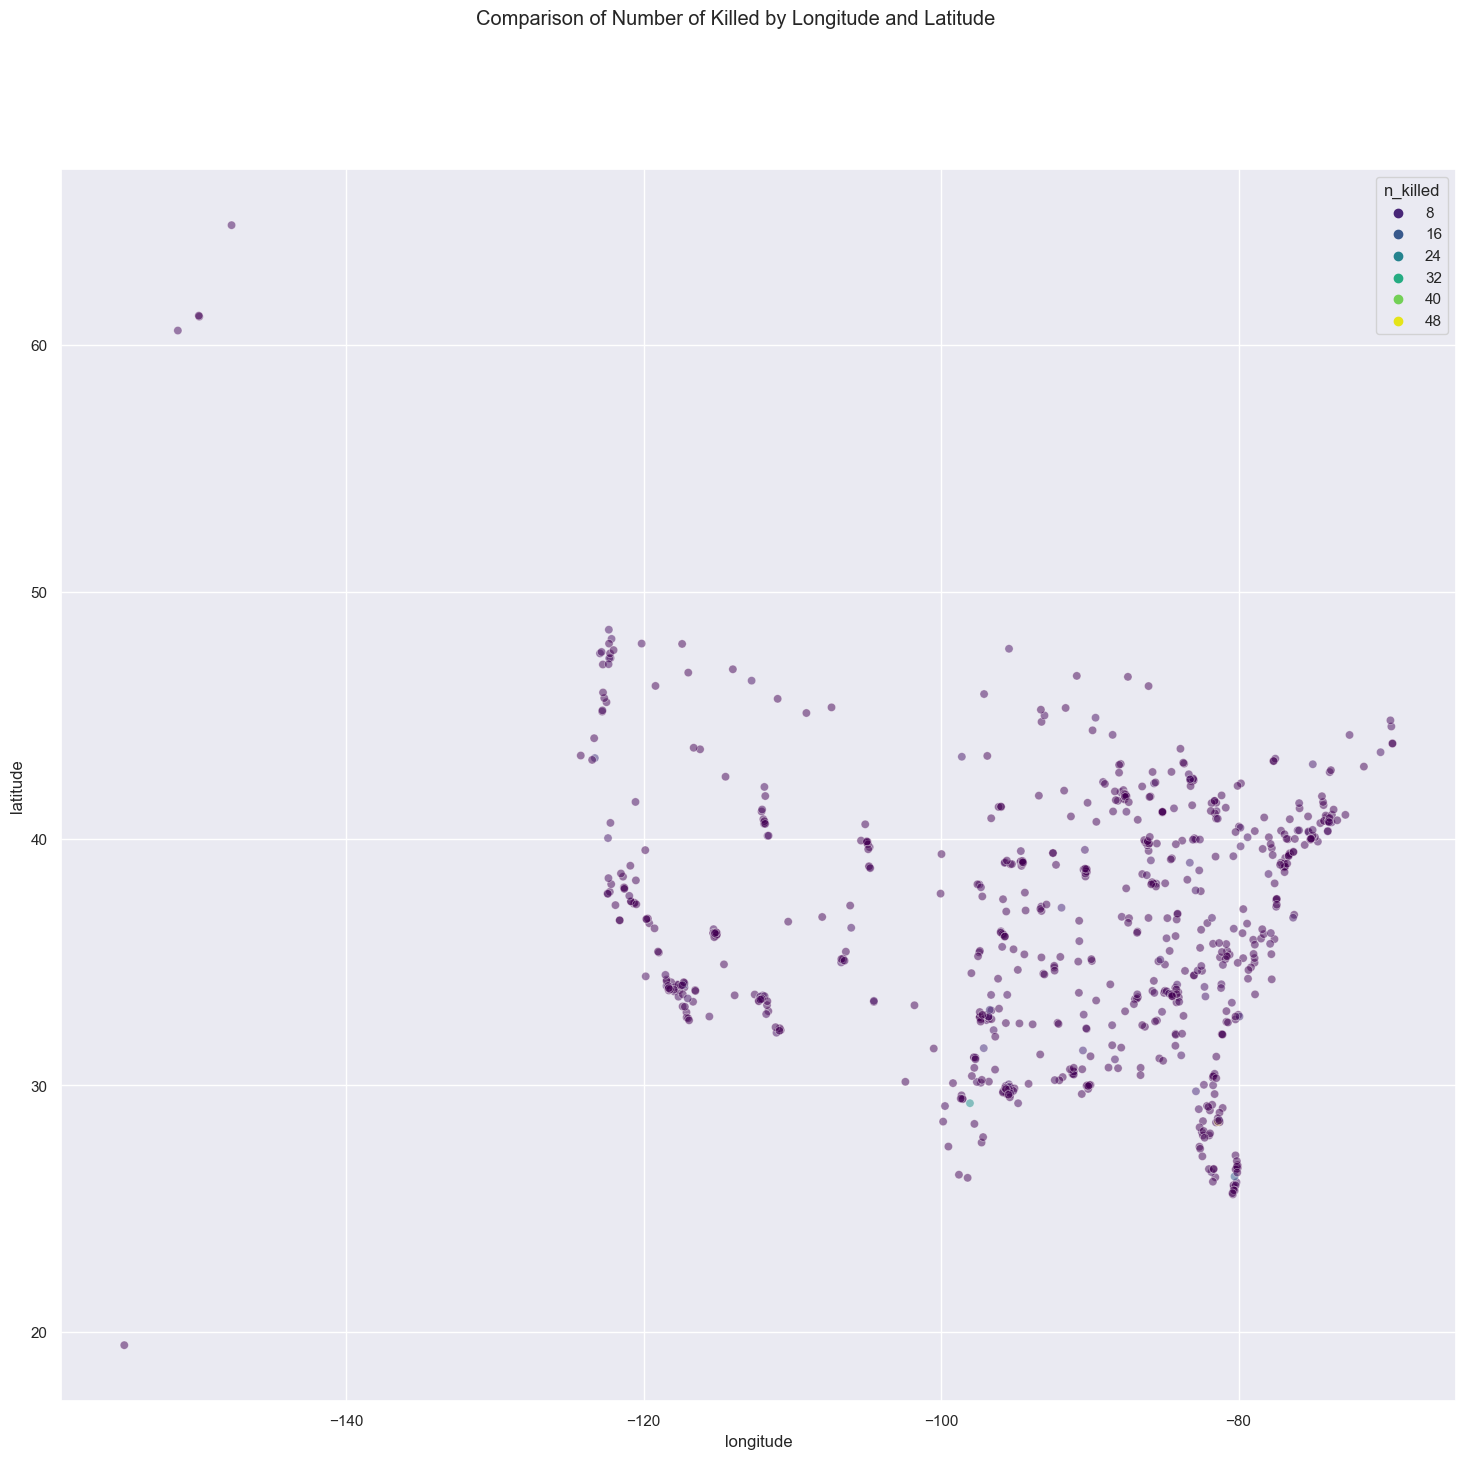

In [292]:
# just an idea
sns.scatterplot(data = gun_df, x="longitude", y="latitude", hue="n_killed",
                    palette="viridis", alpha=0.5)
plt.suptitle(f"Comparison of Number of Killed by Longitude and Latitude")

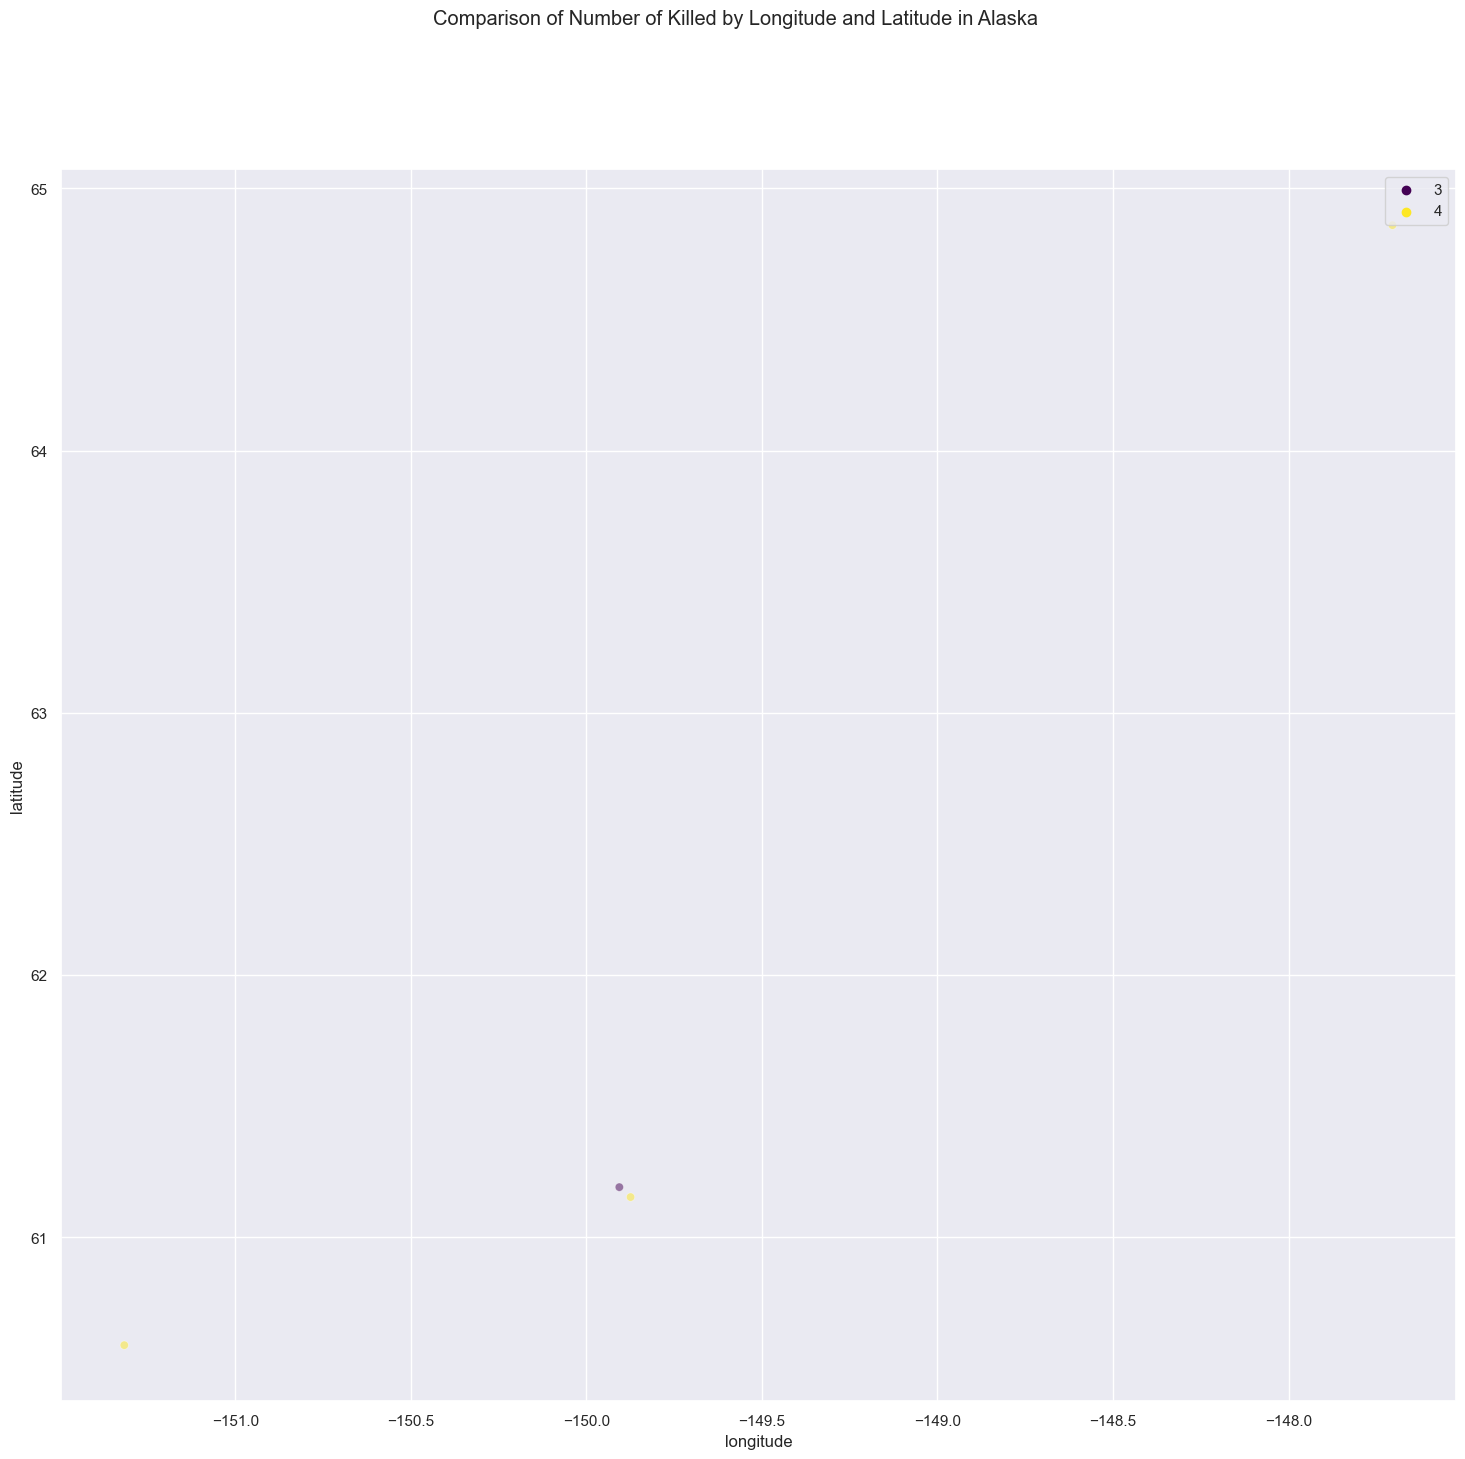

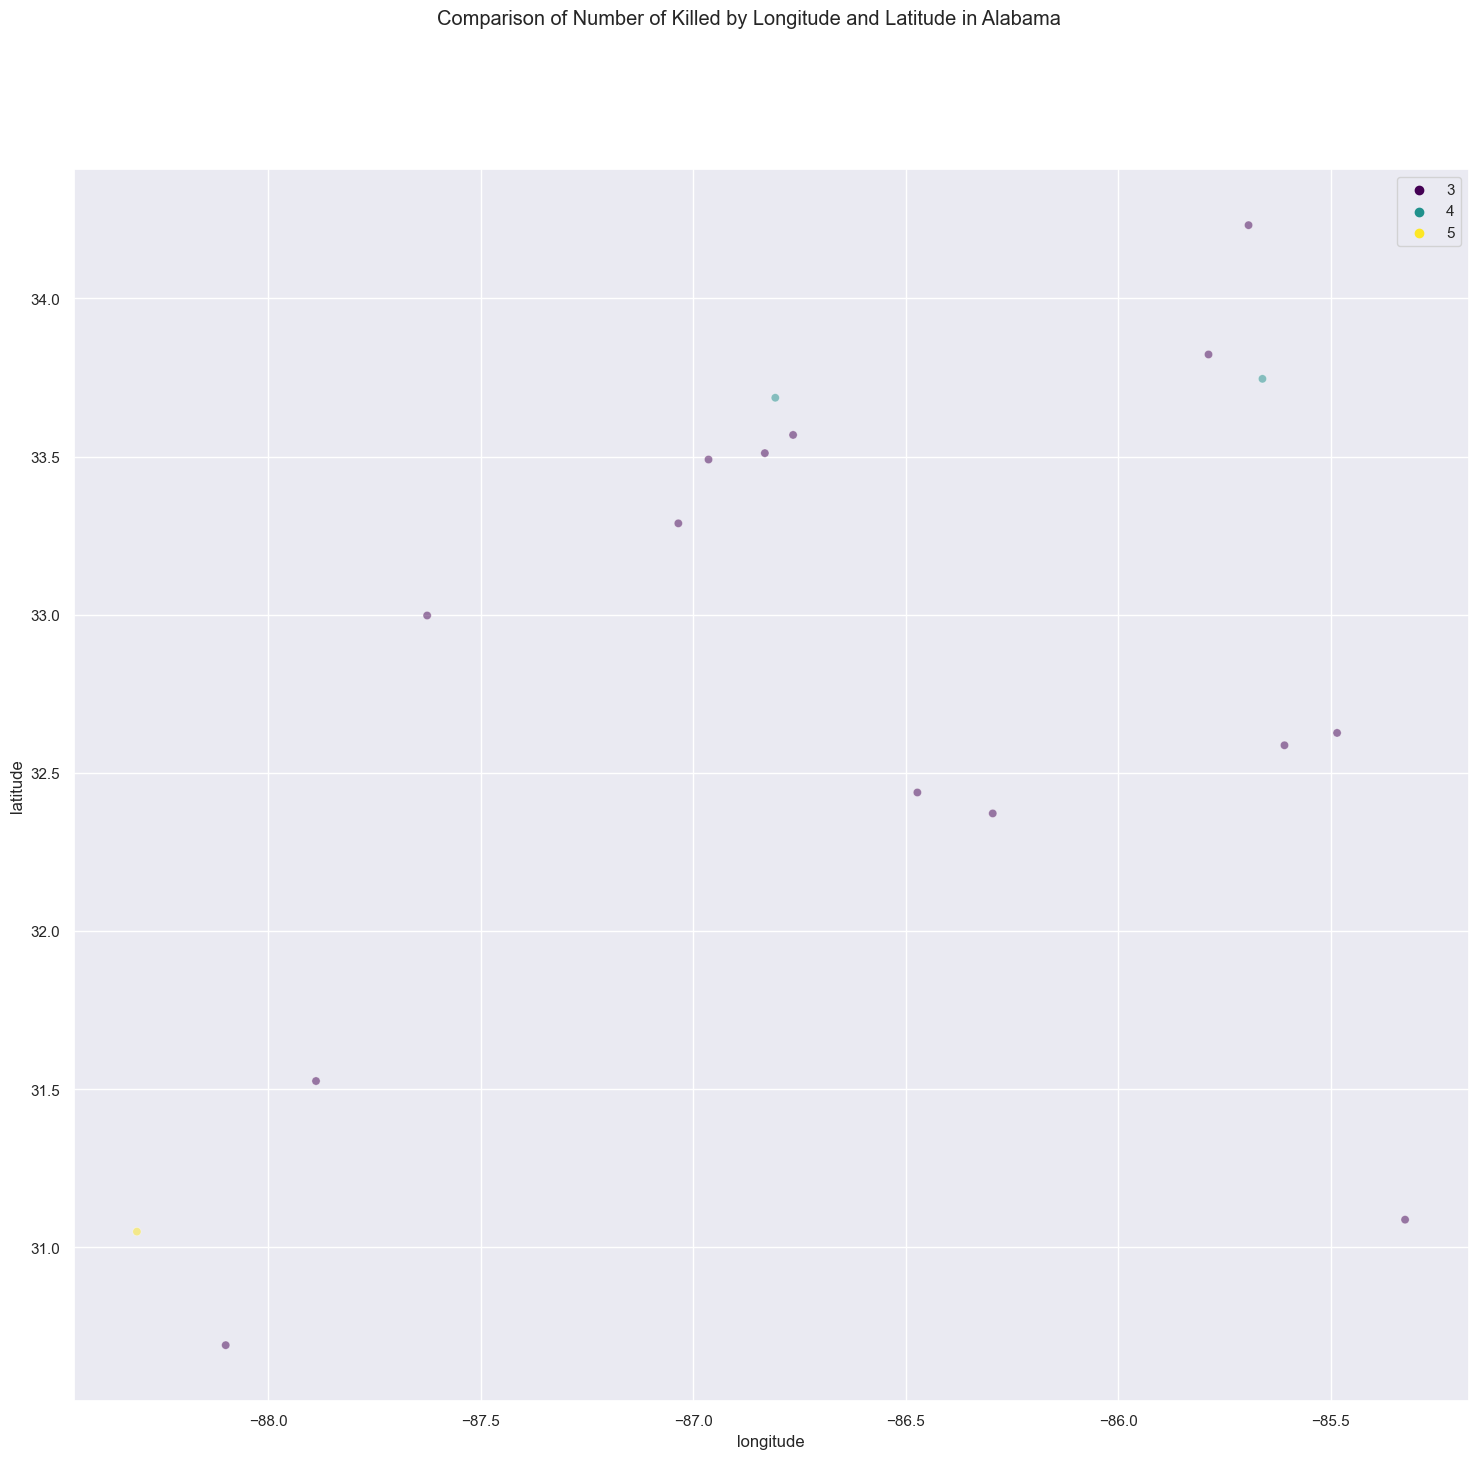

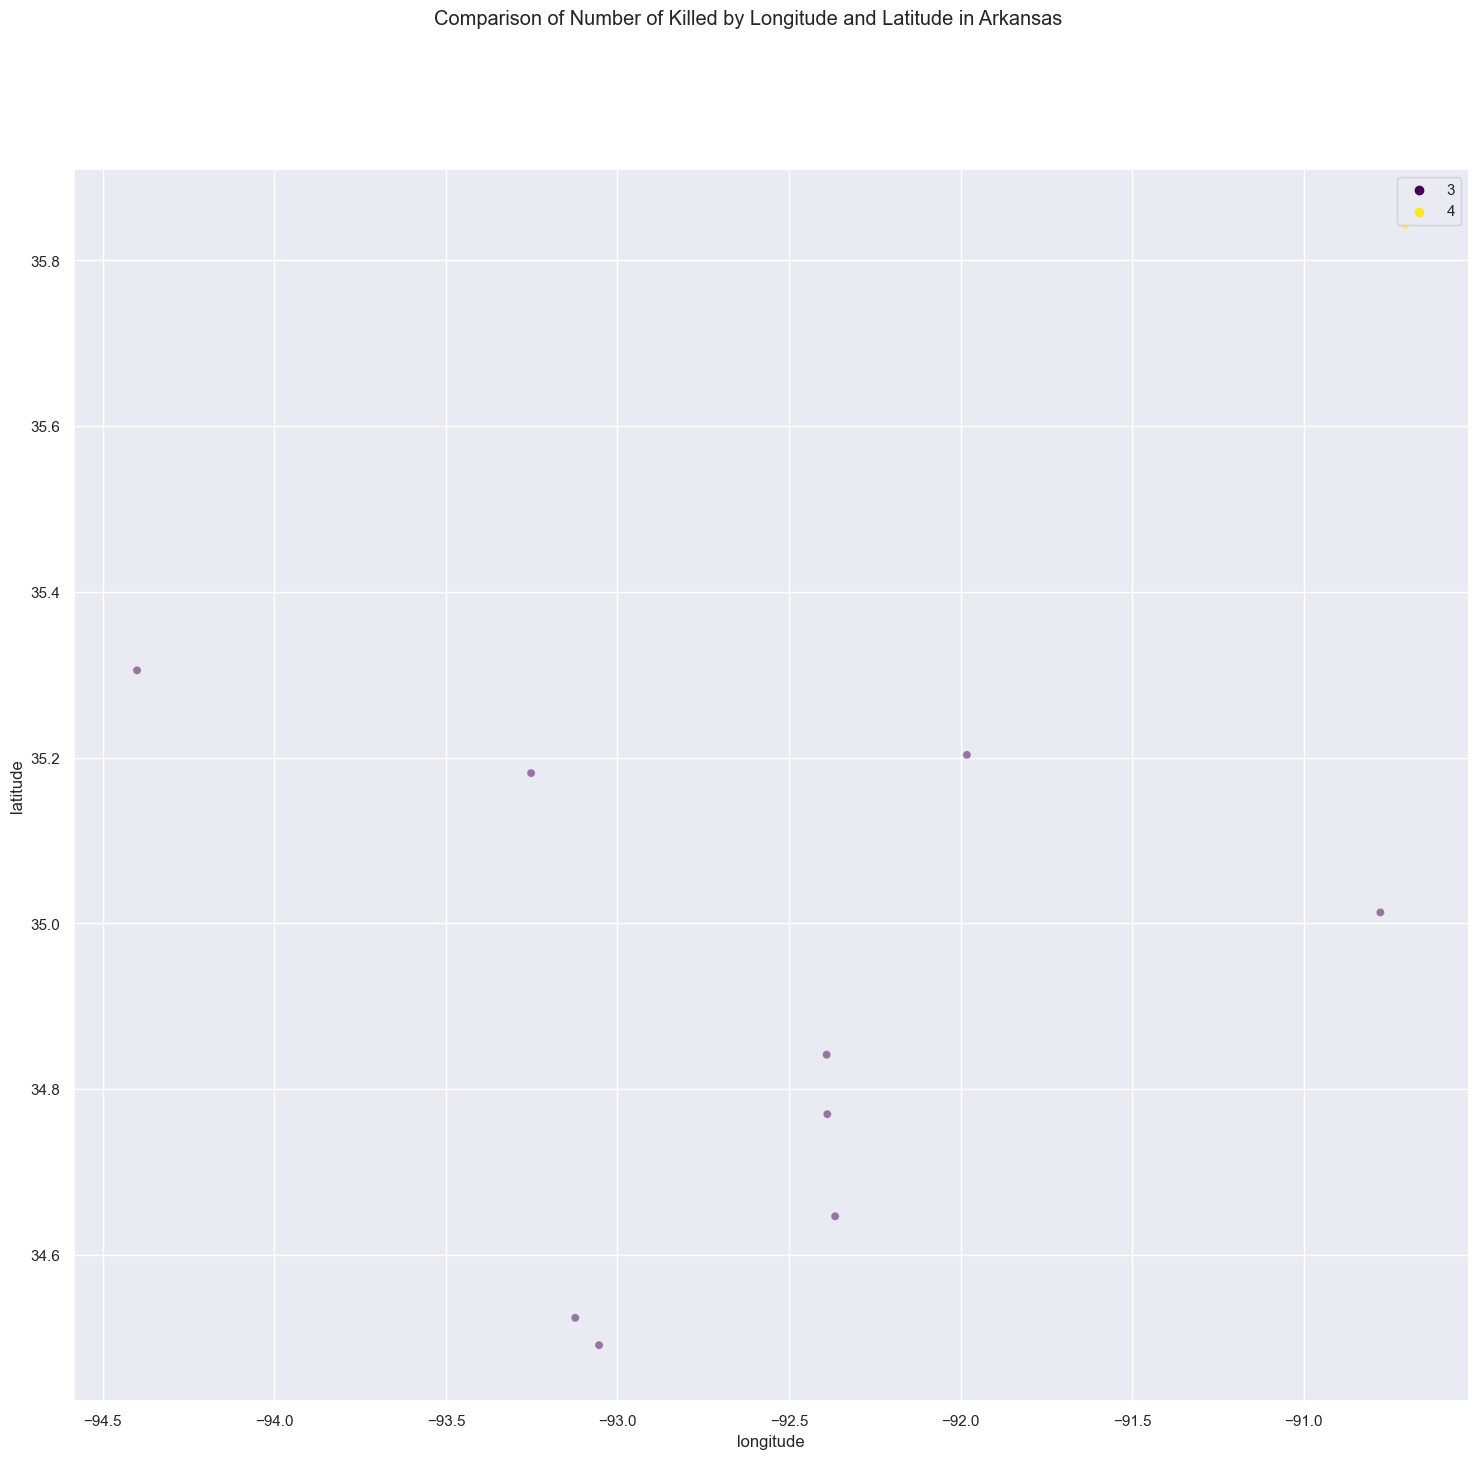

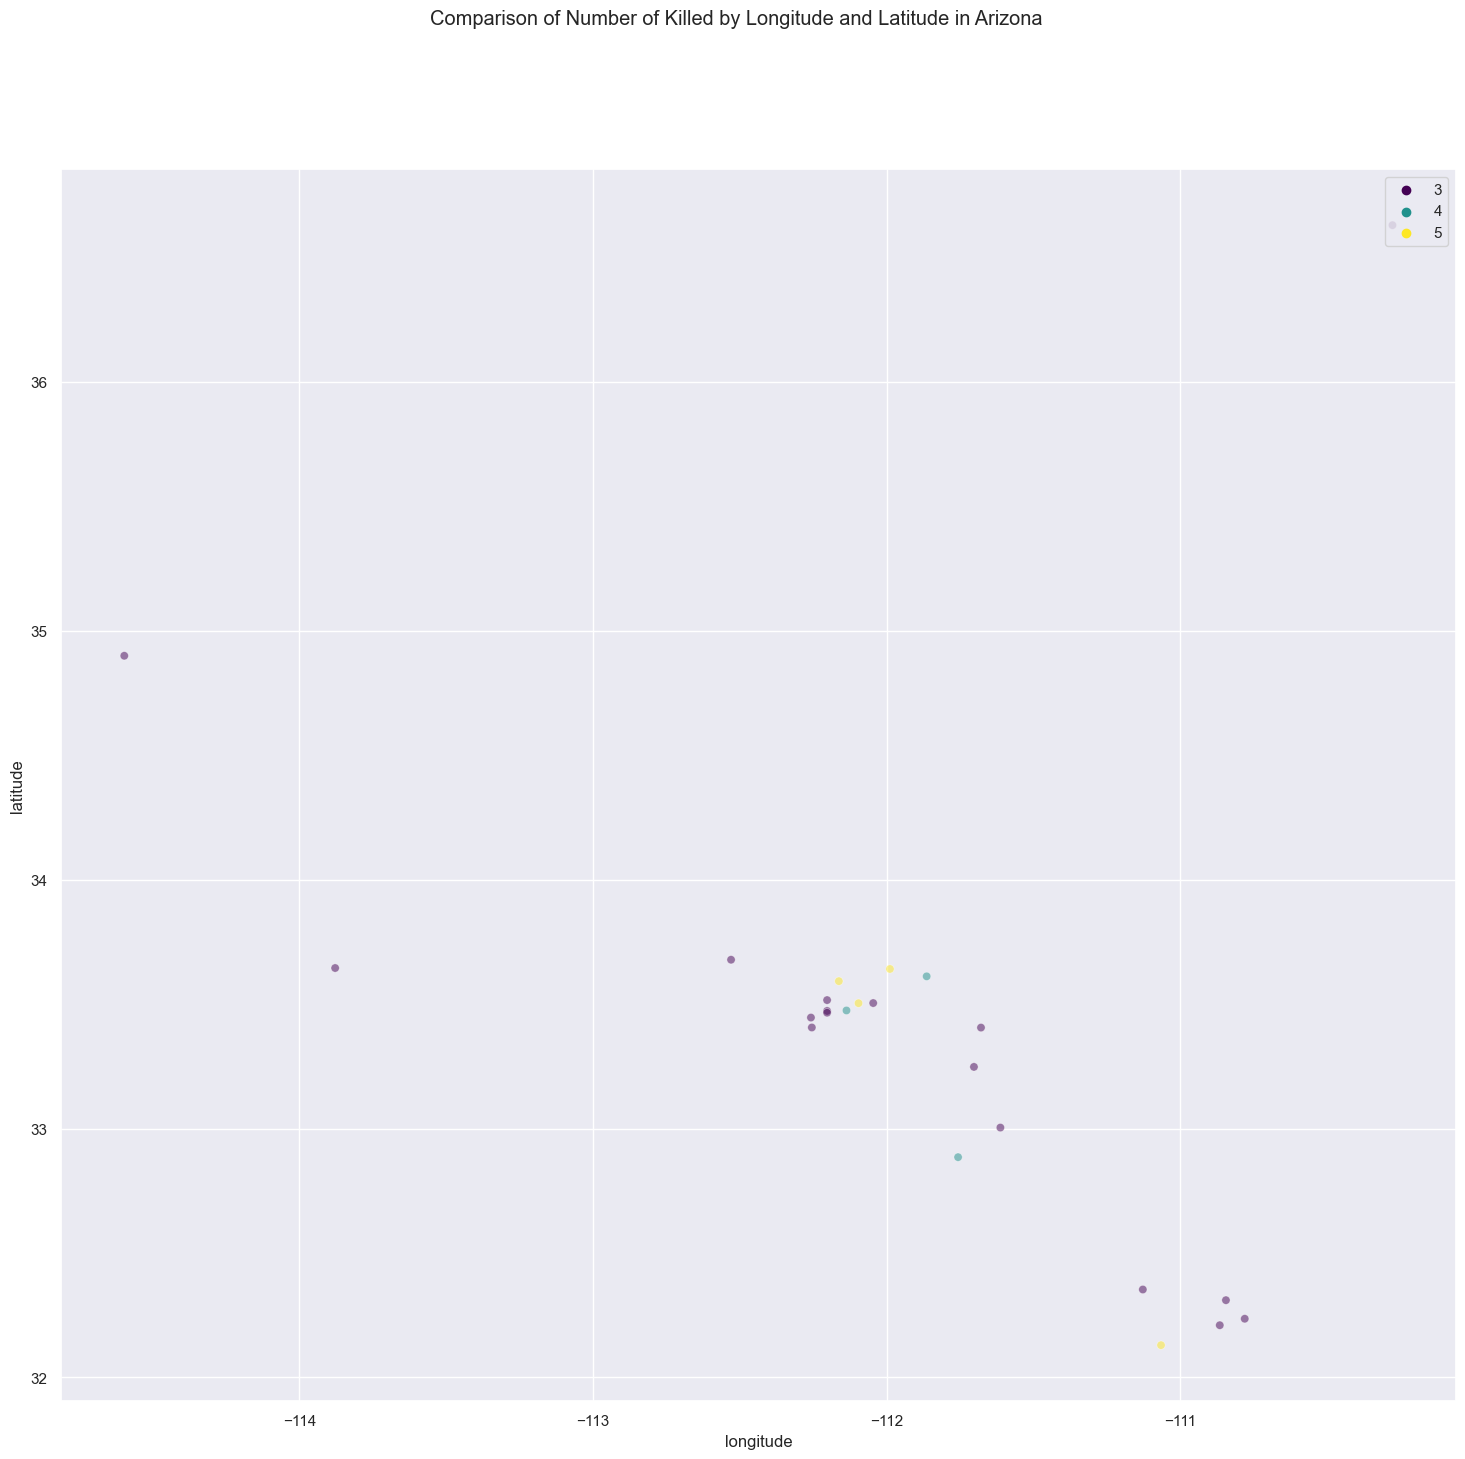

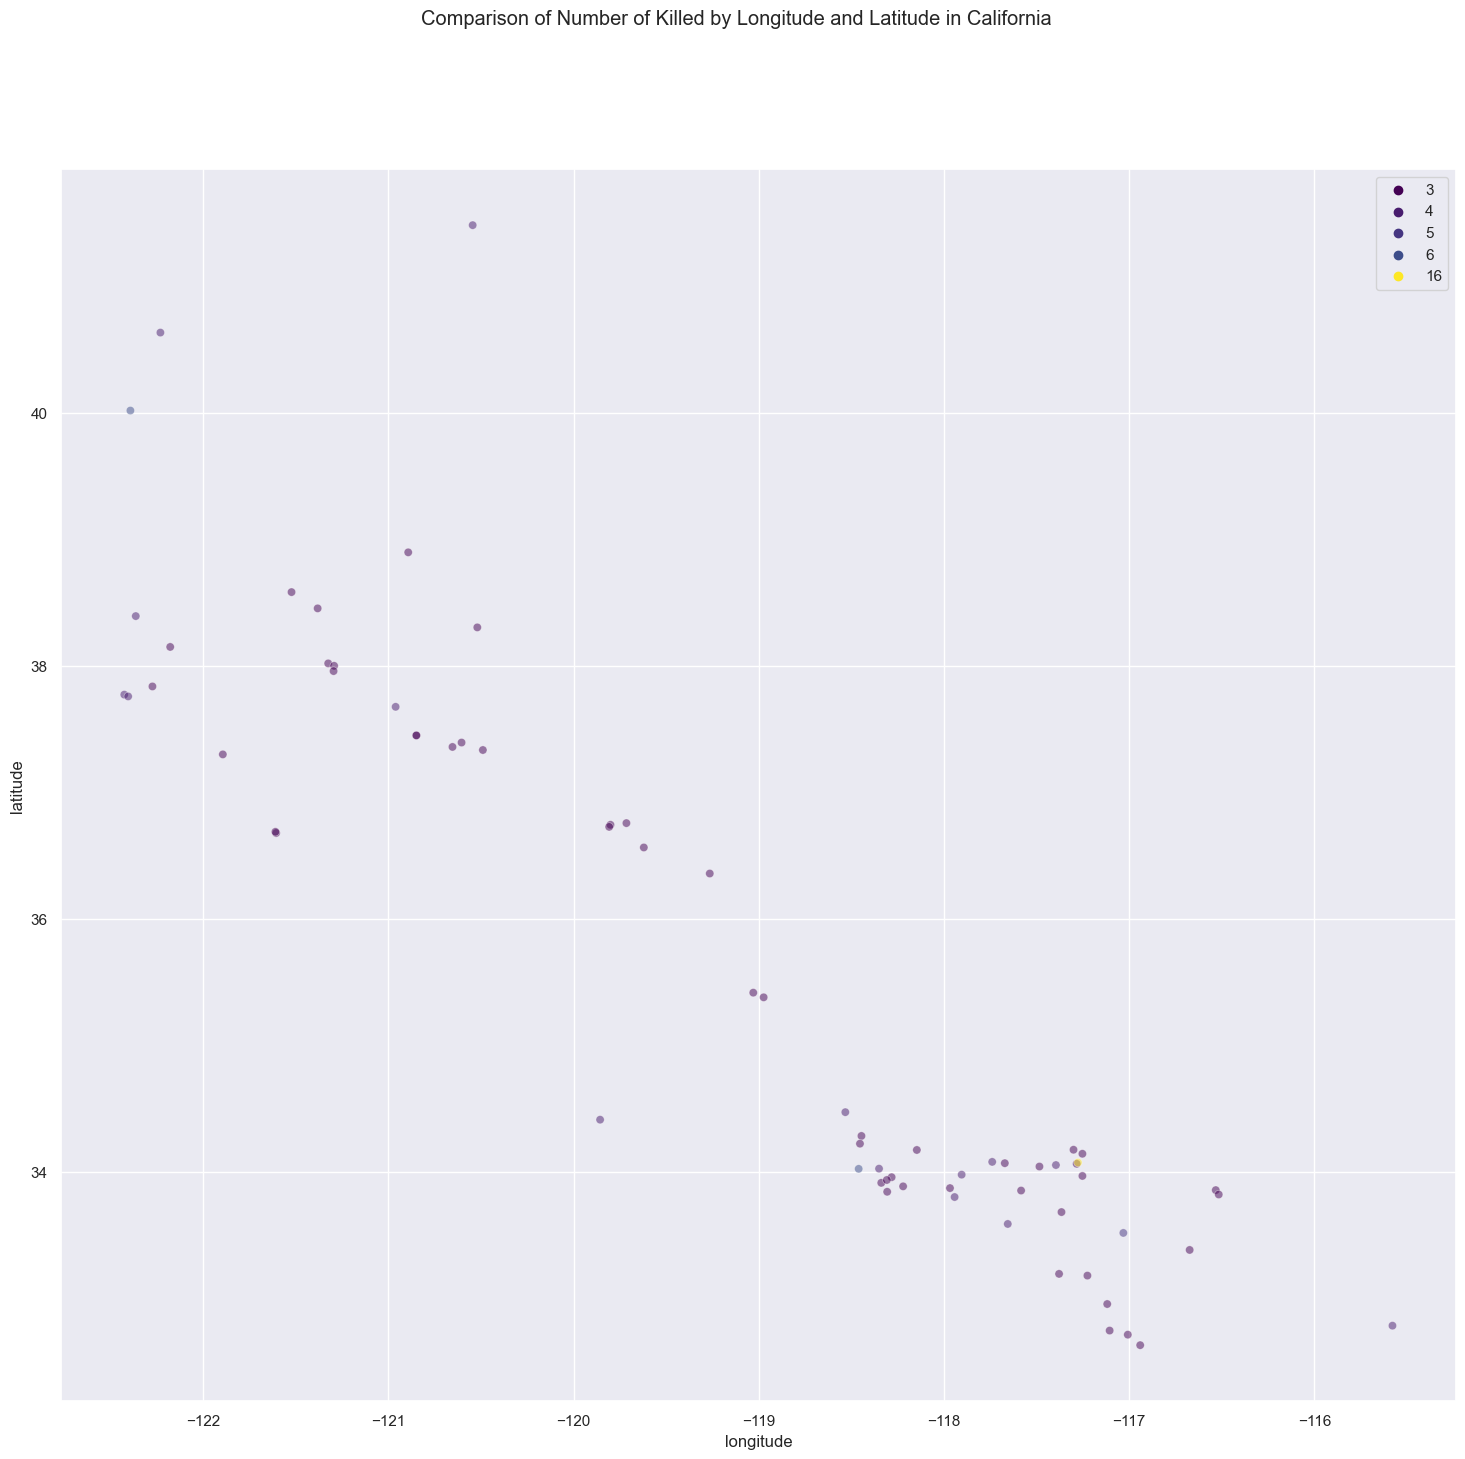

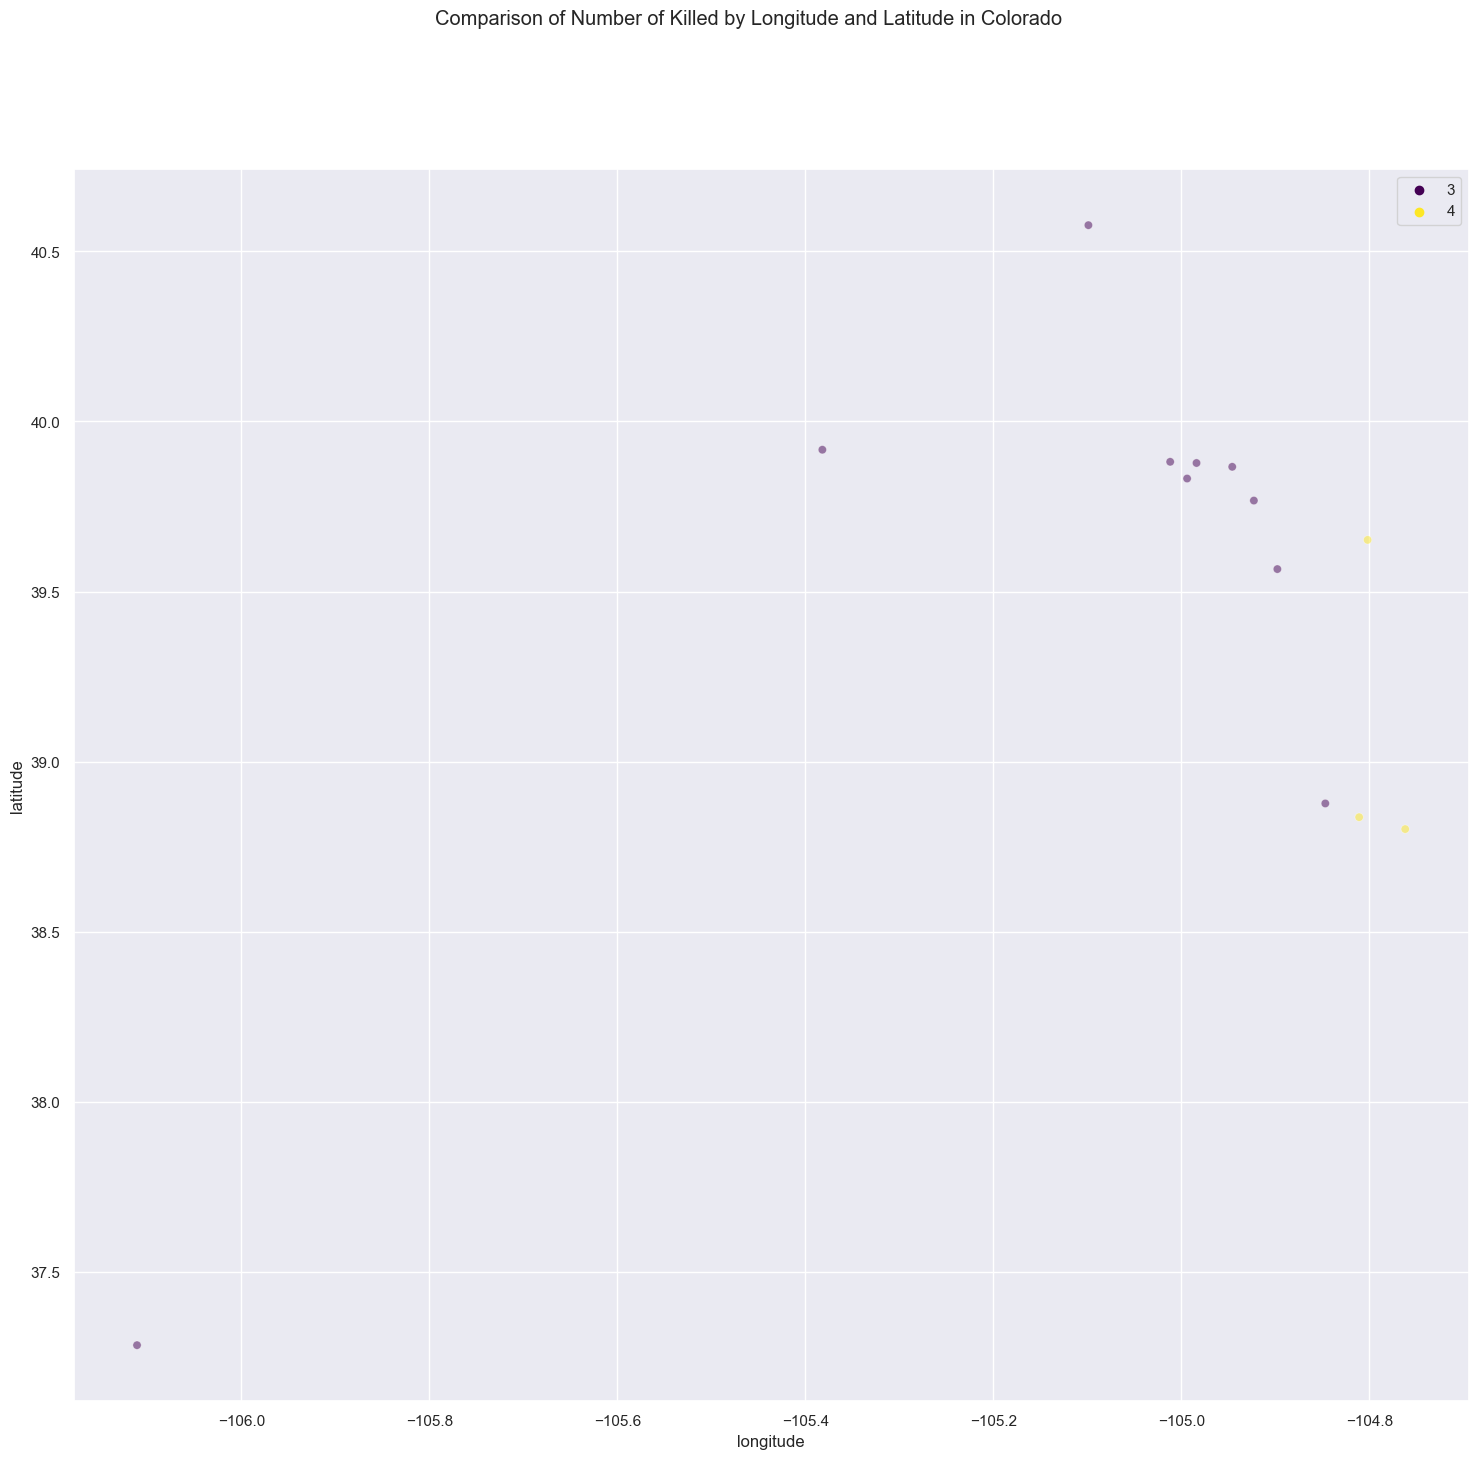

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


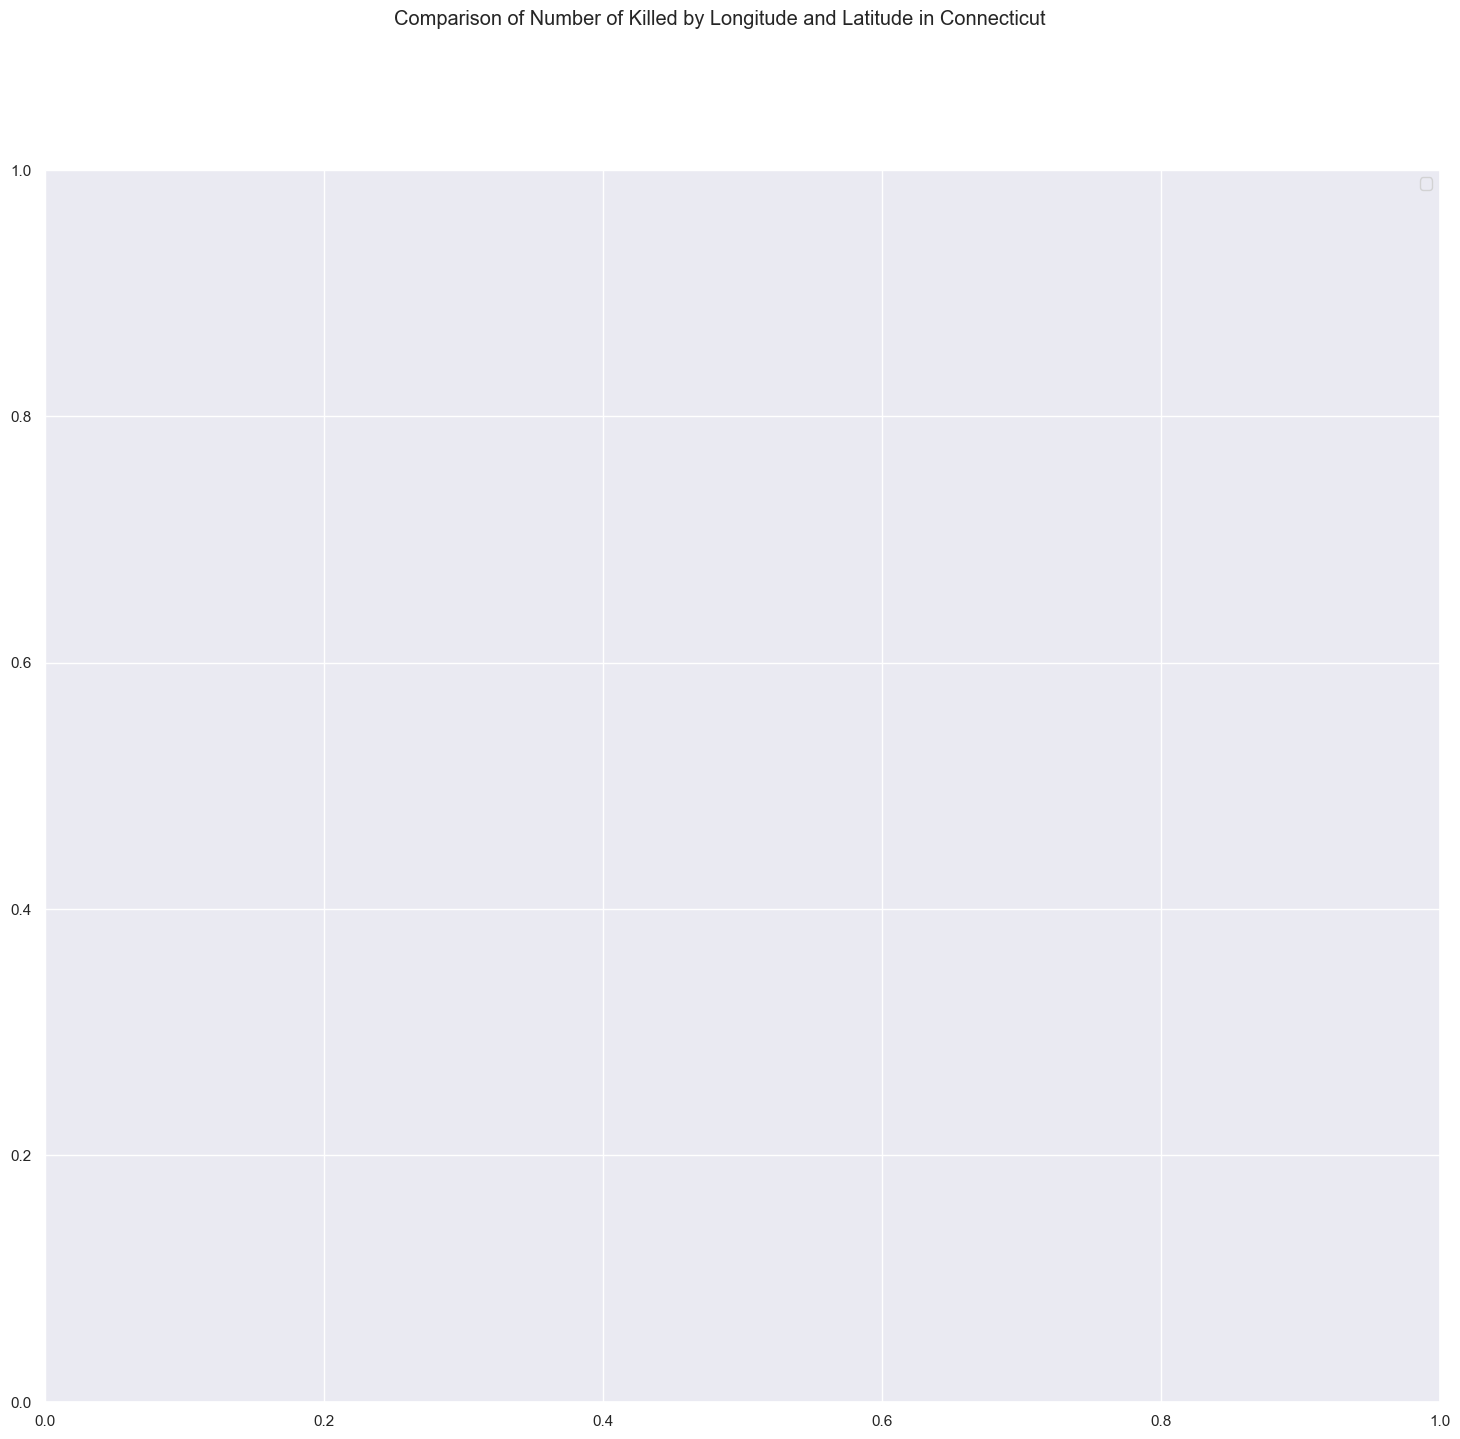

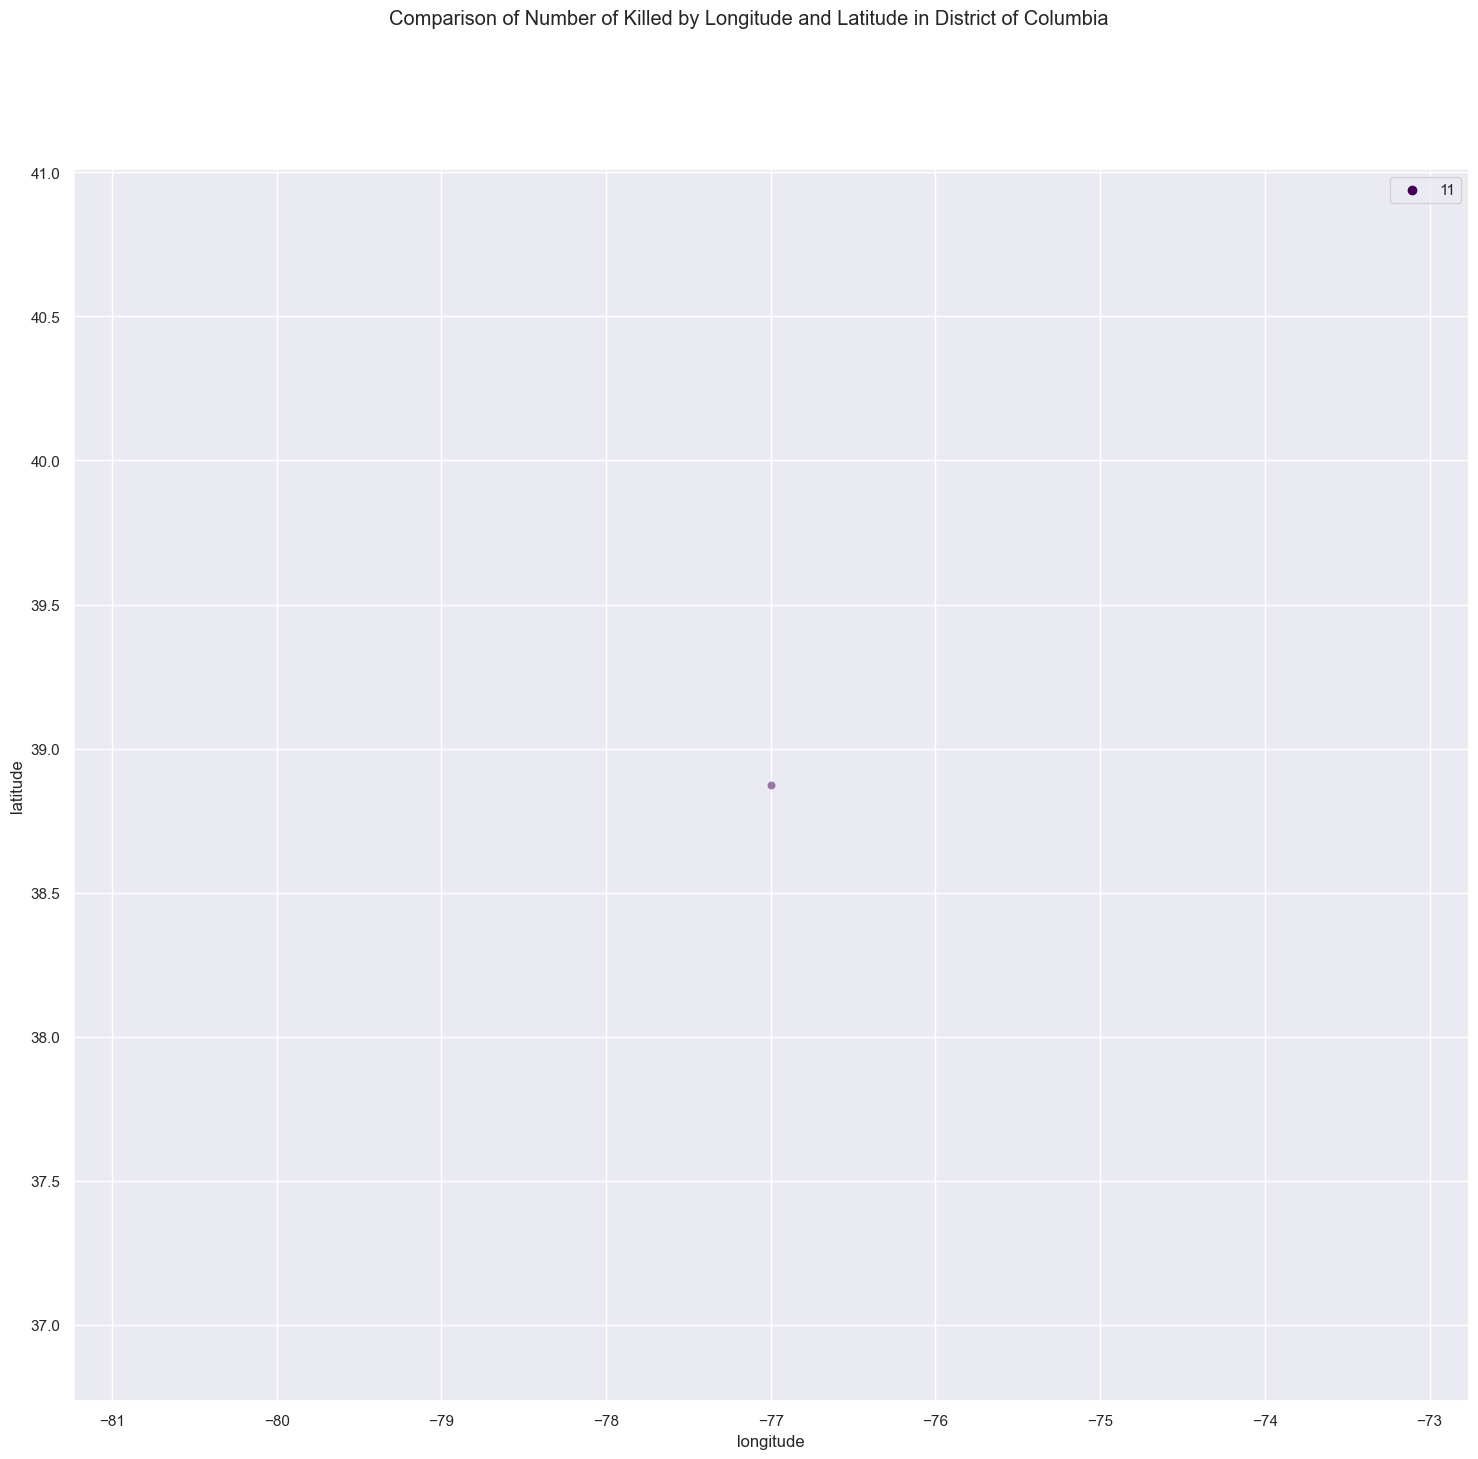

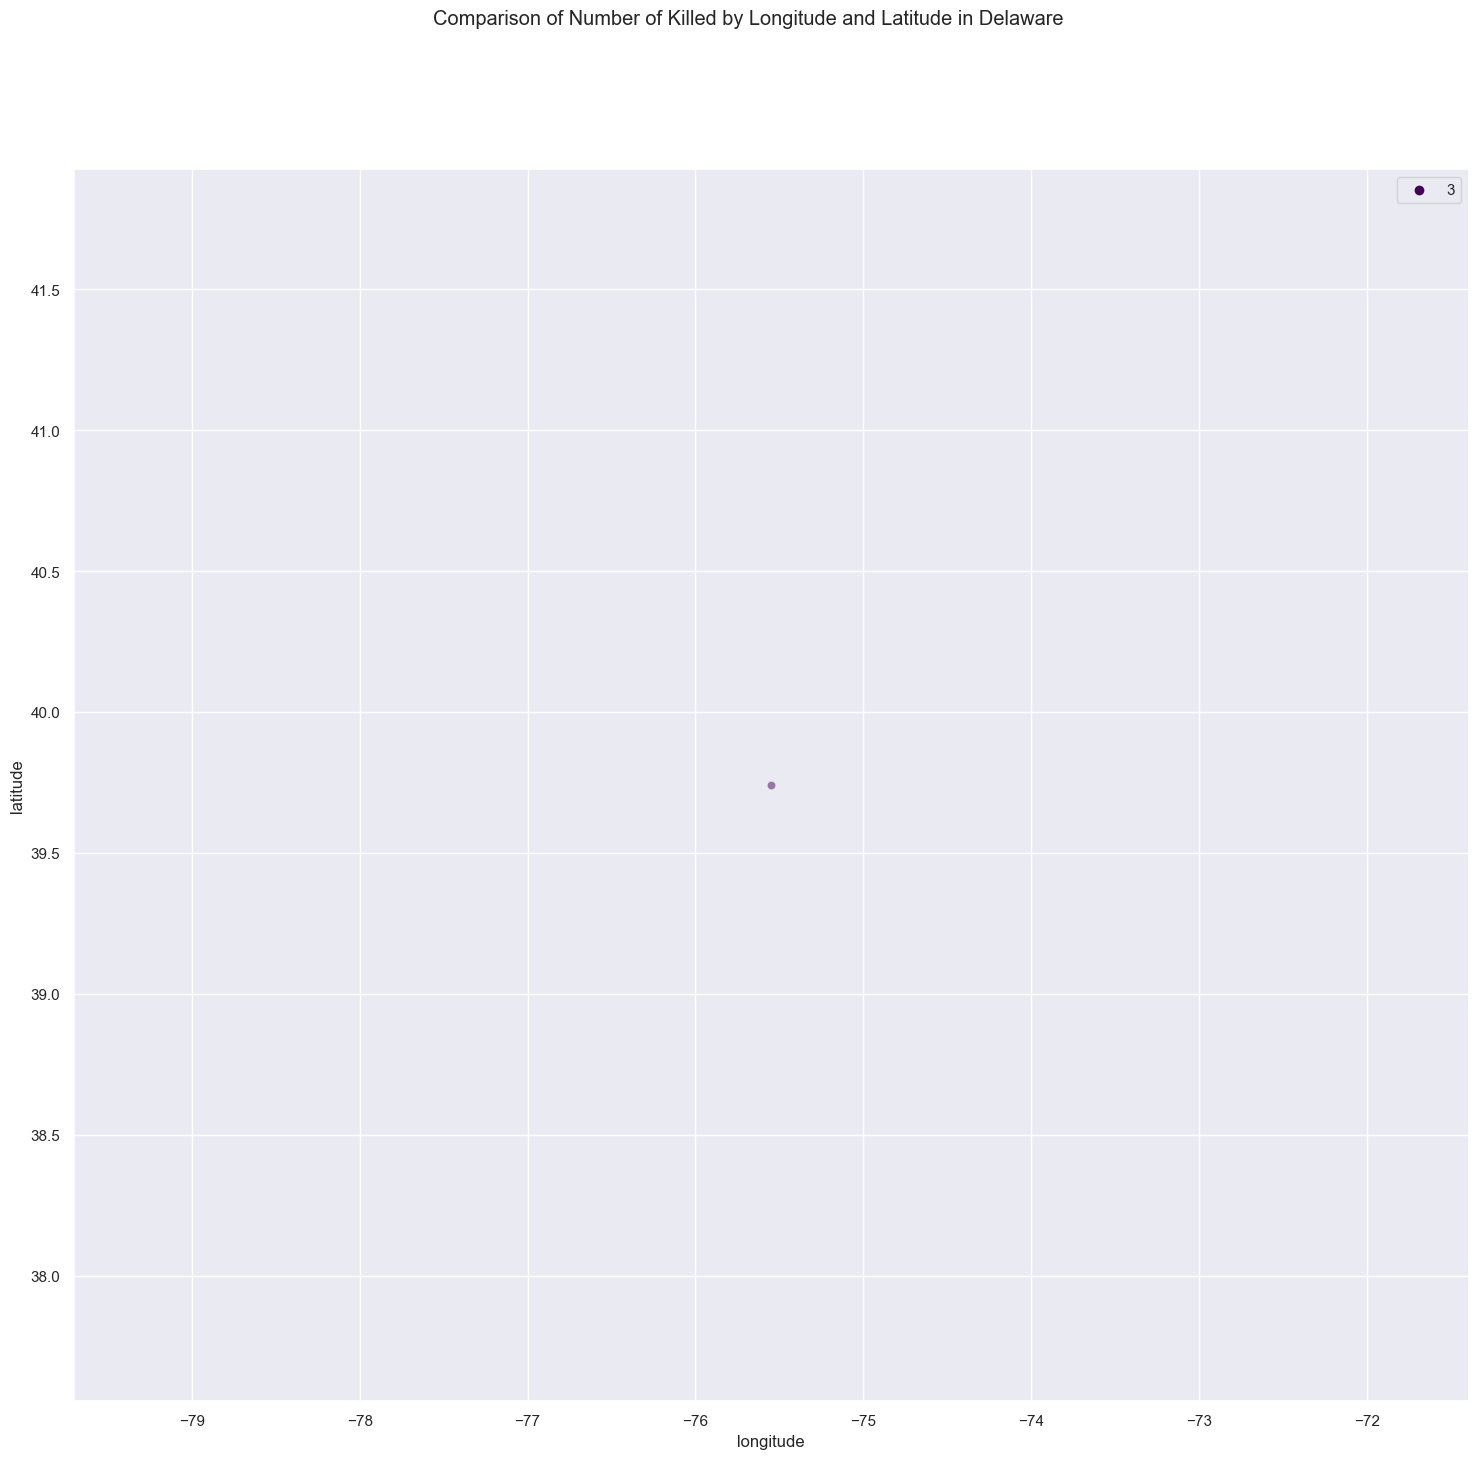

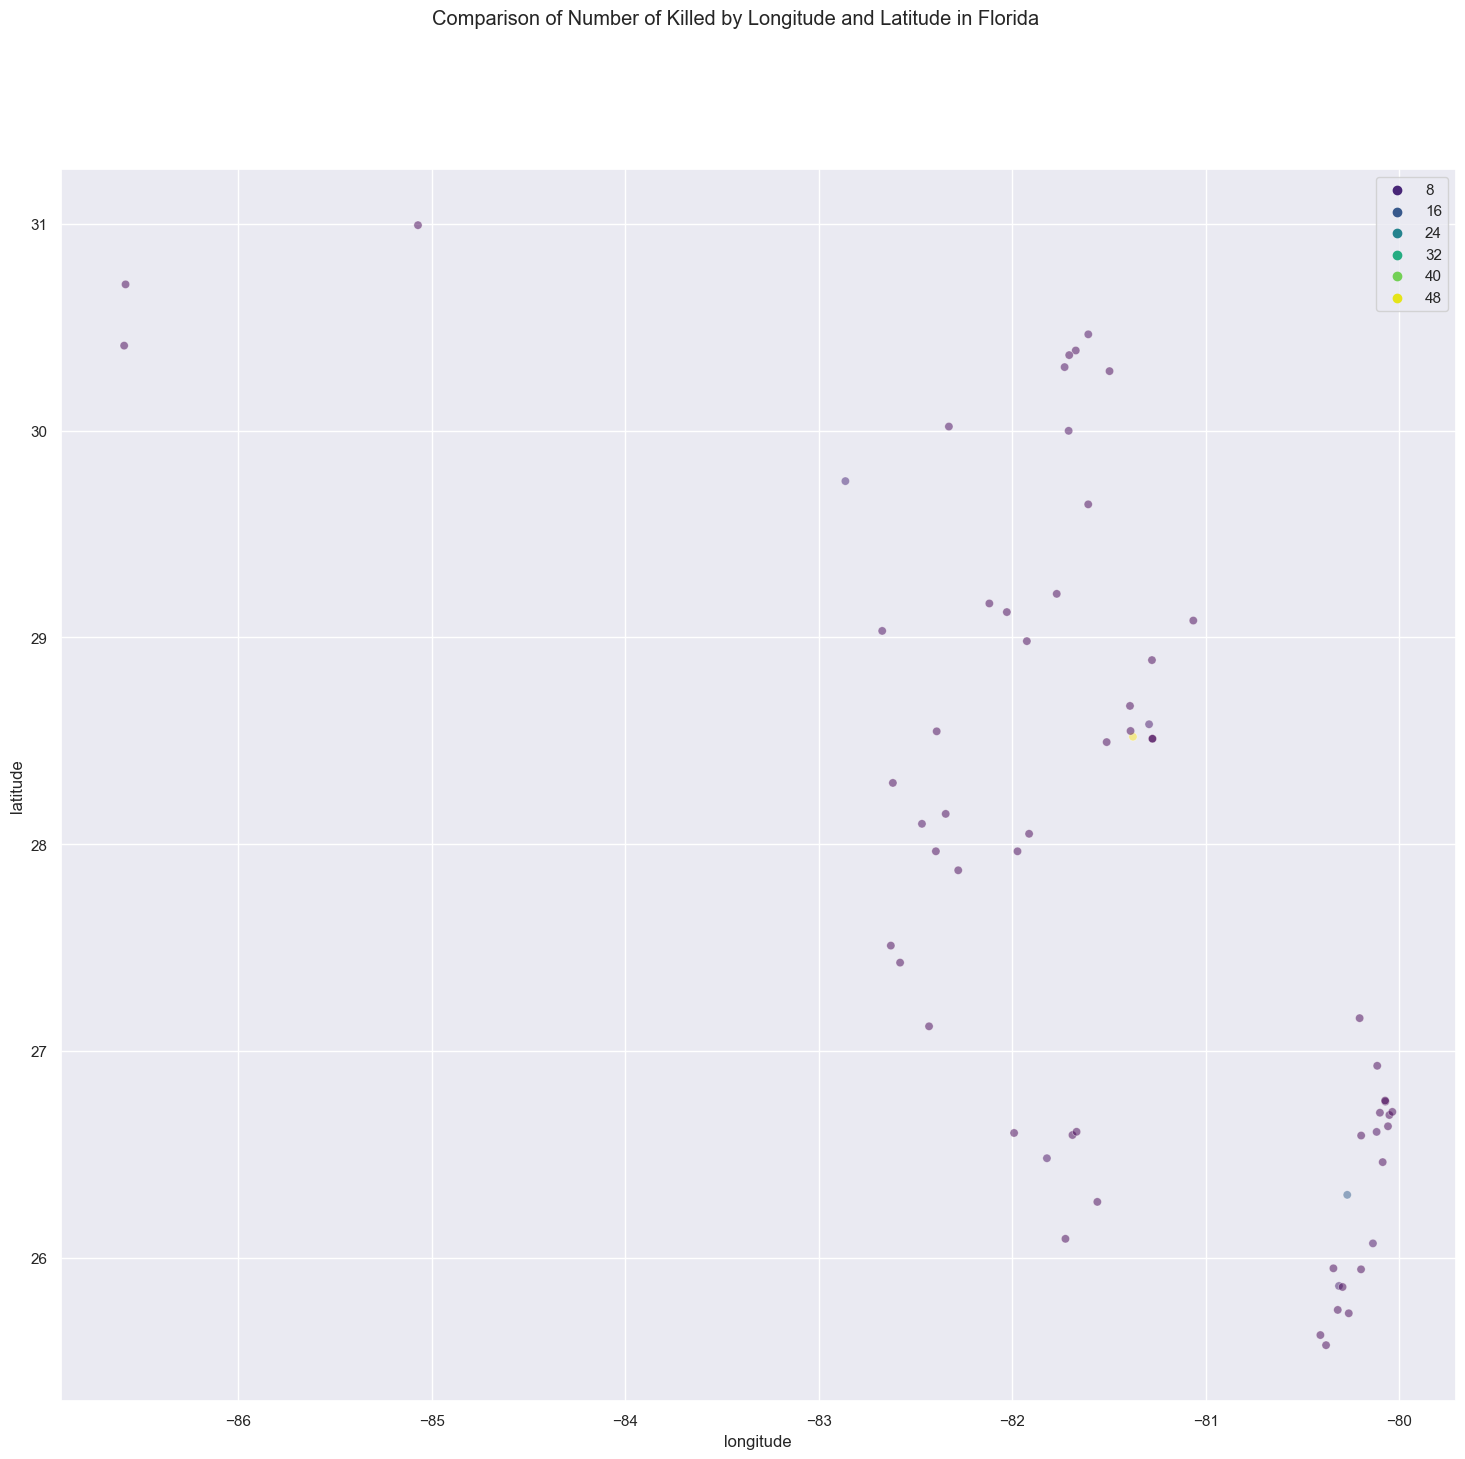

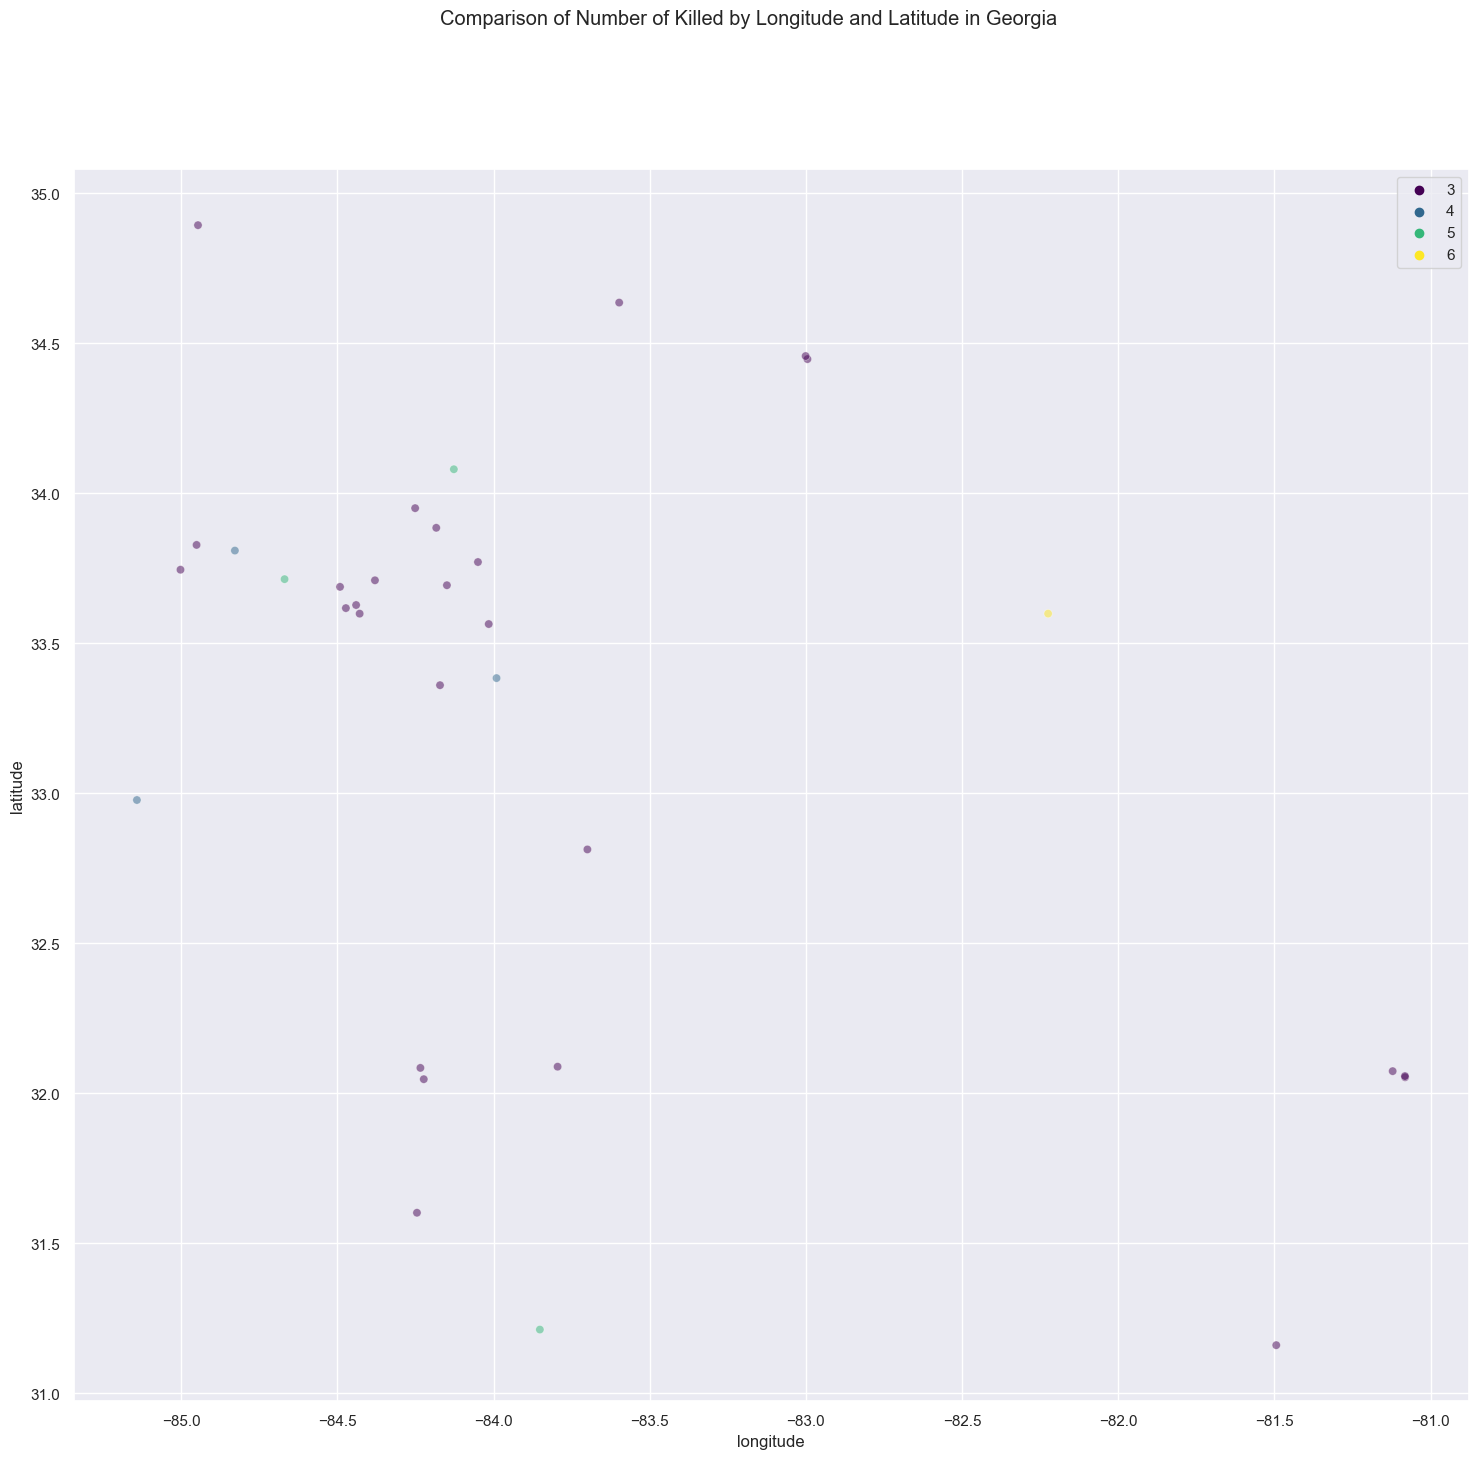

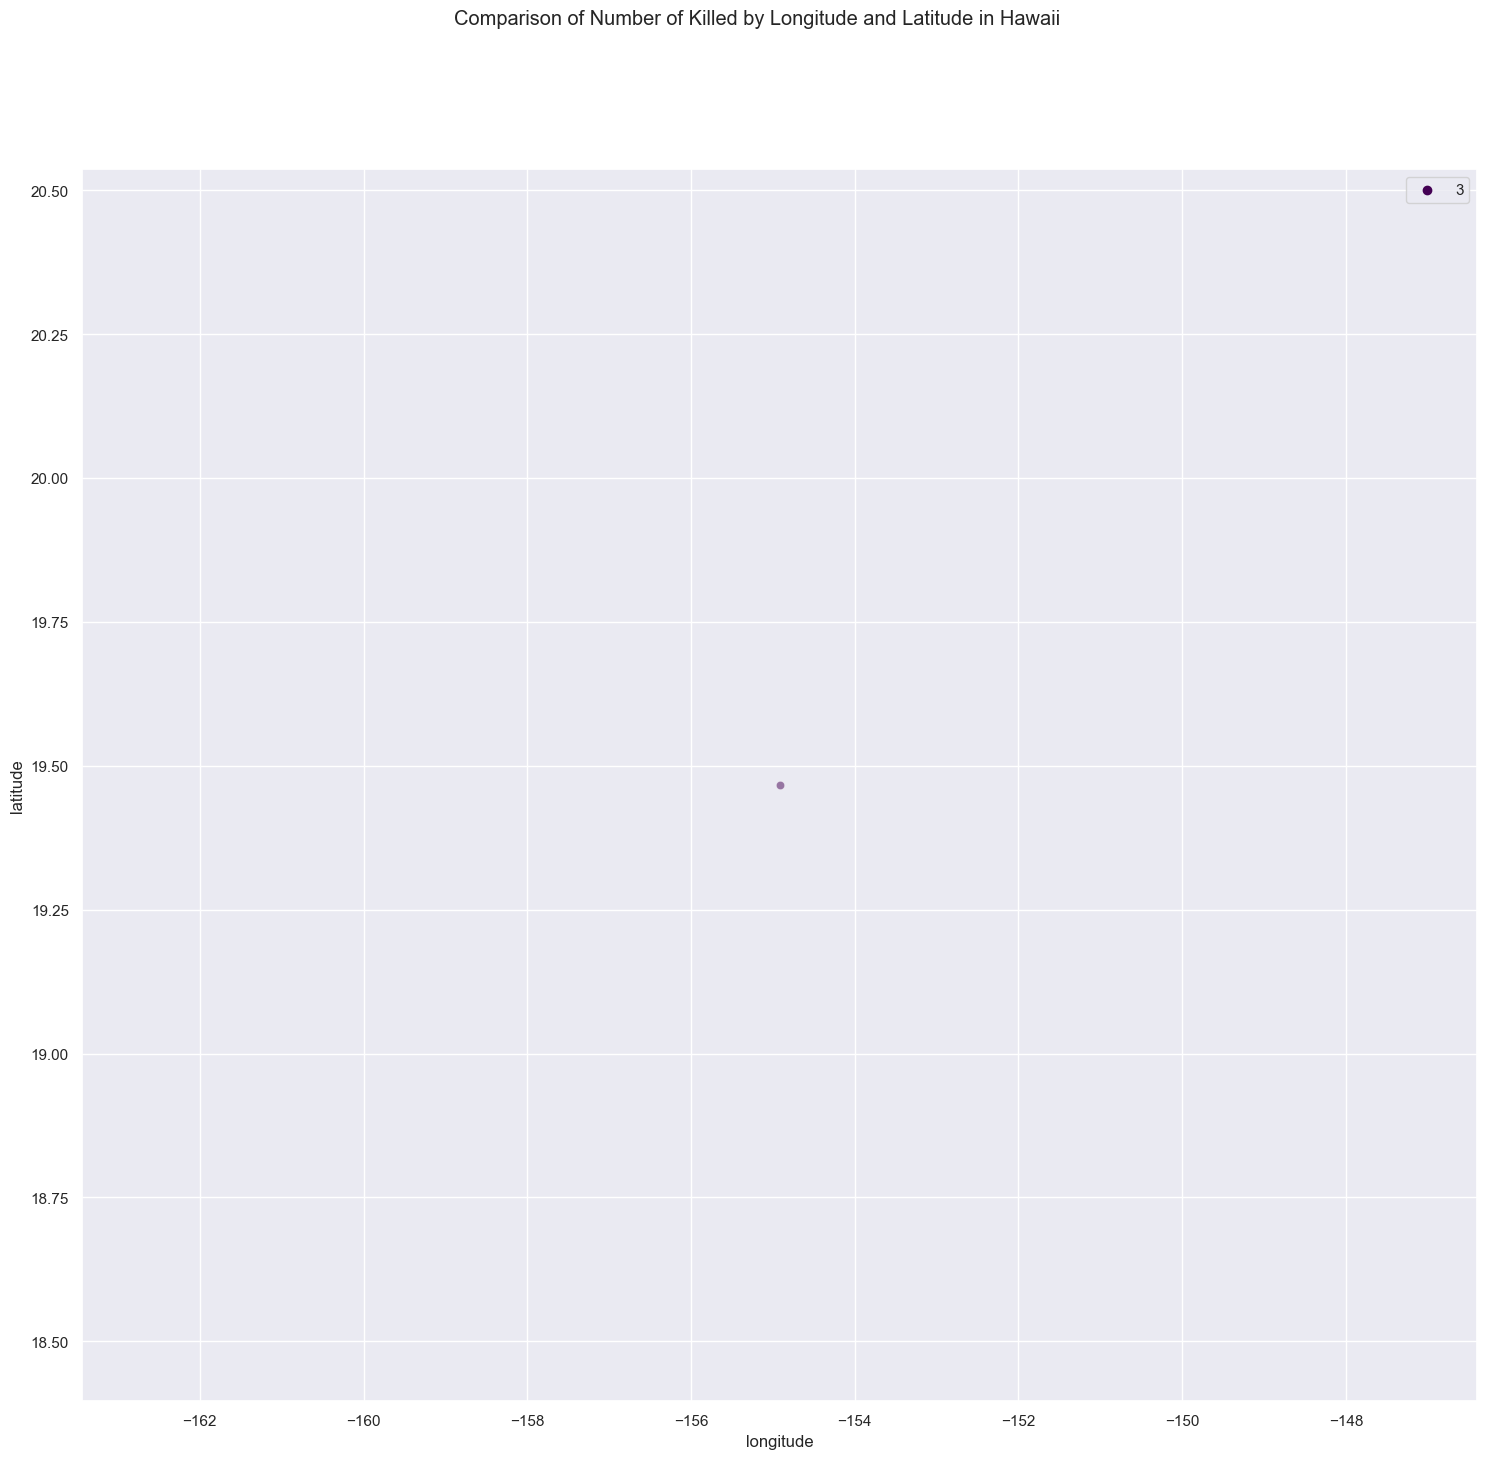

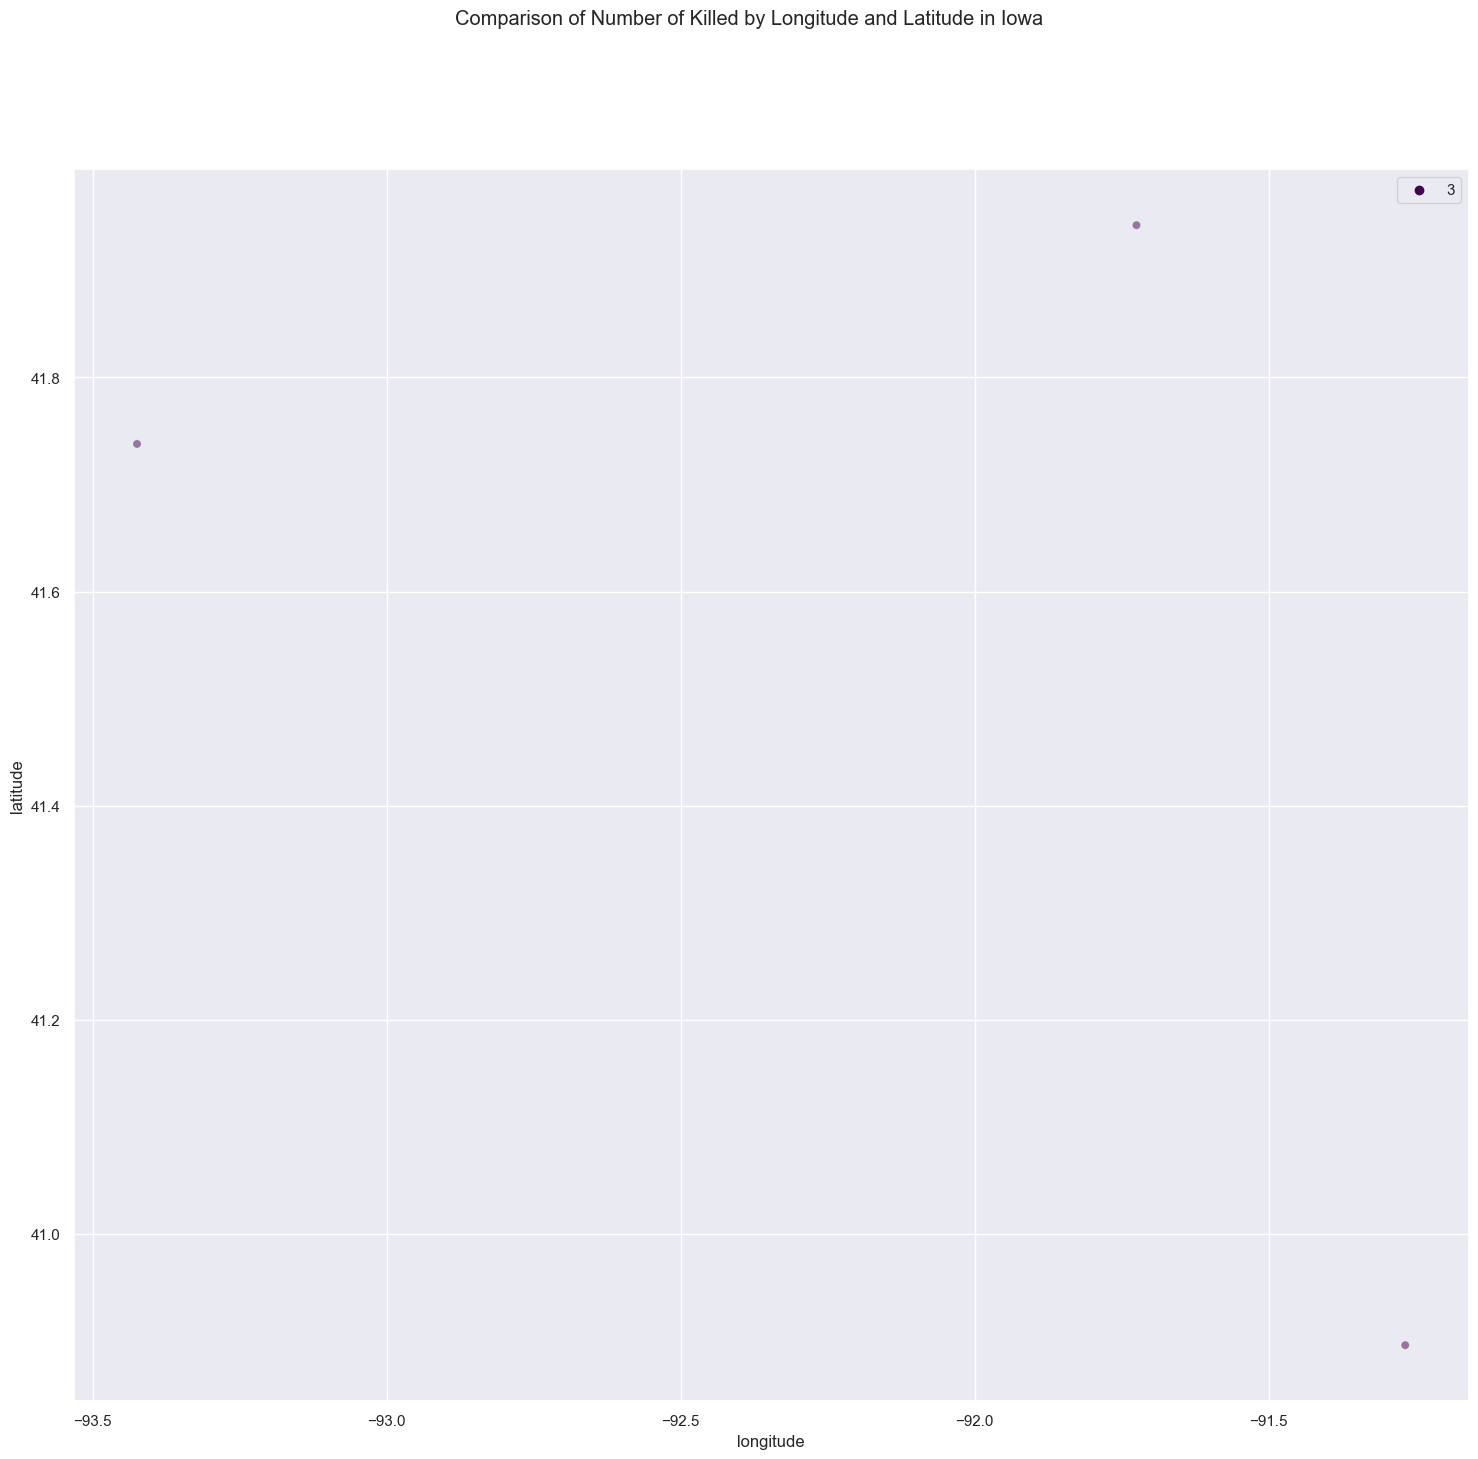

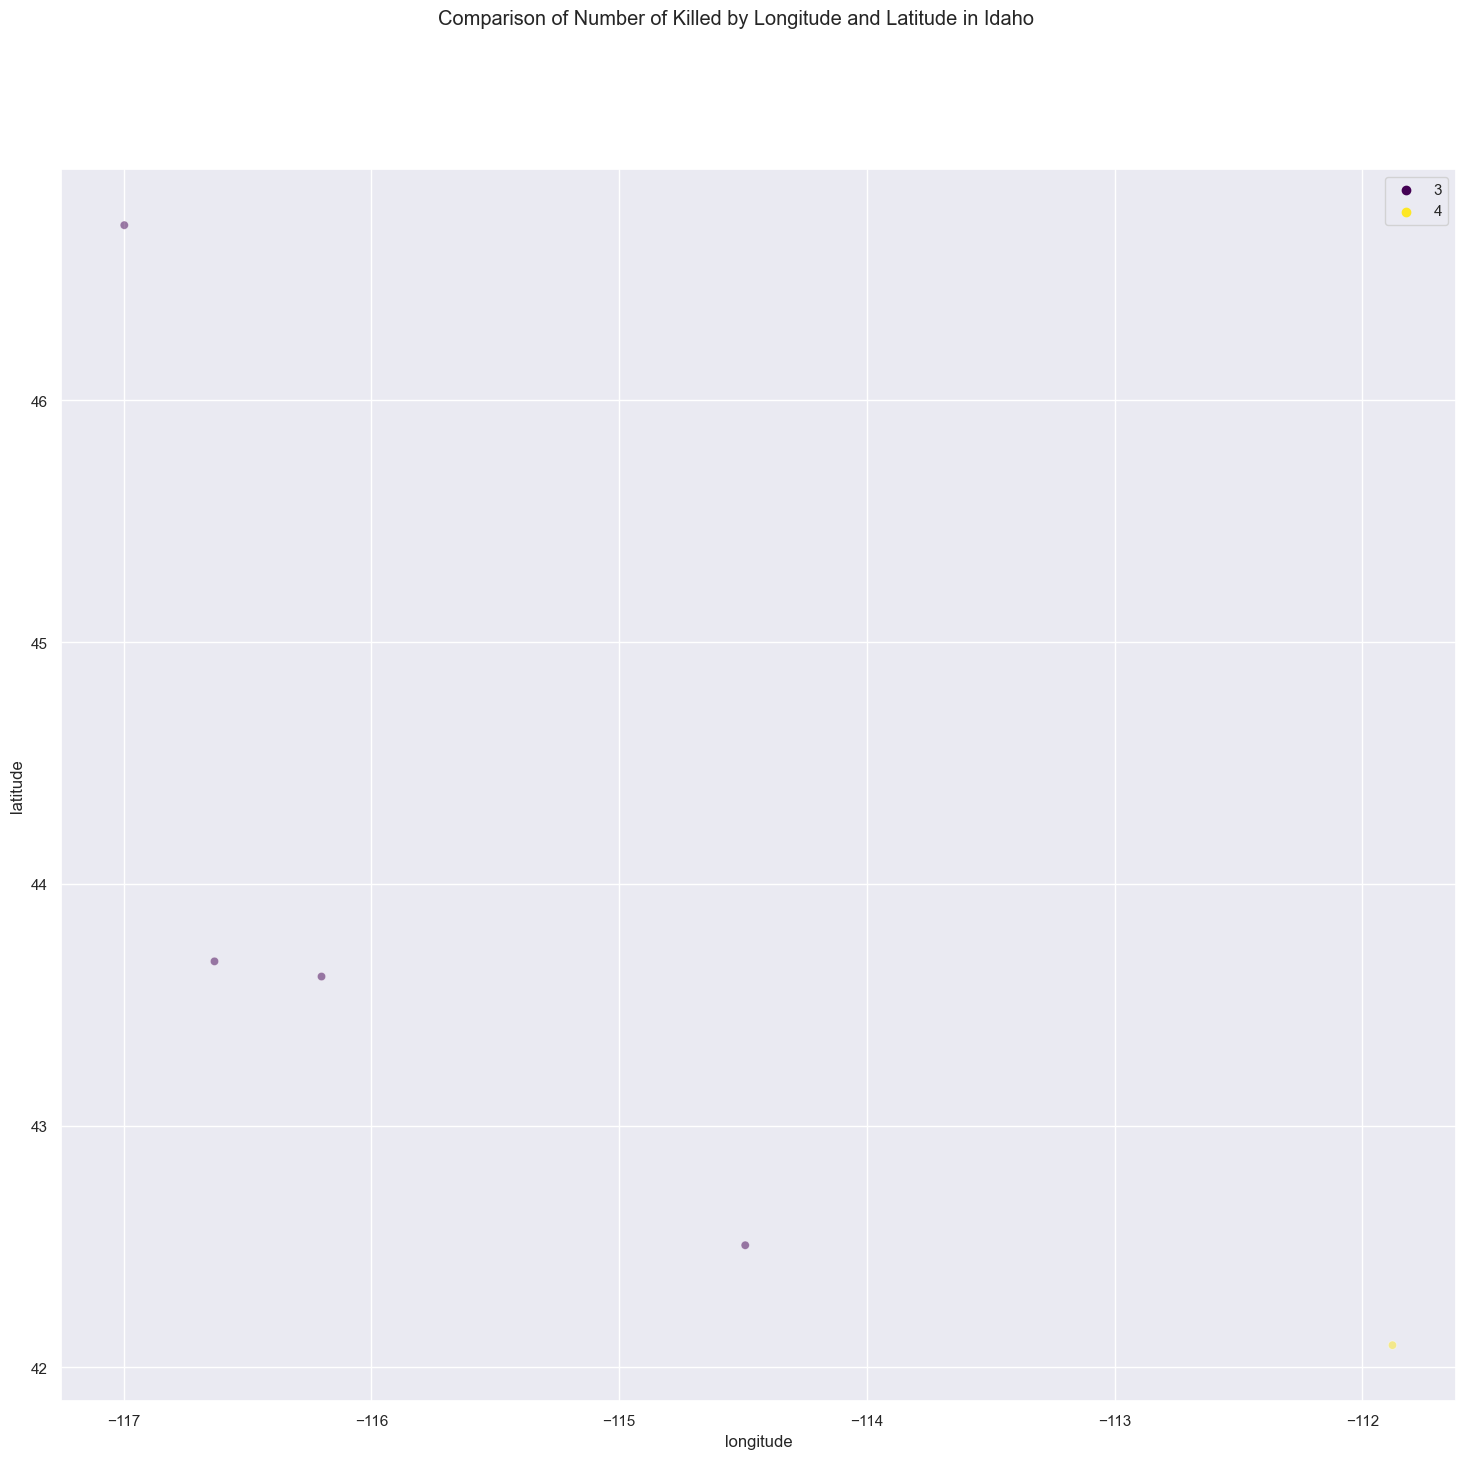

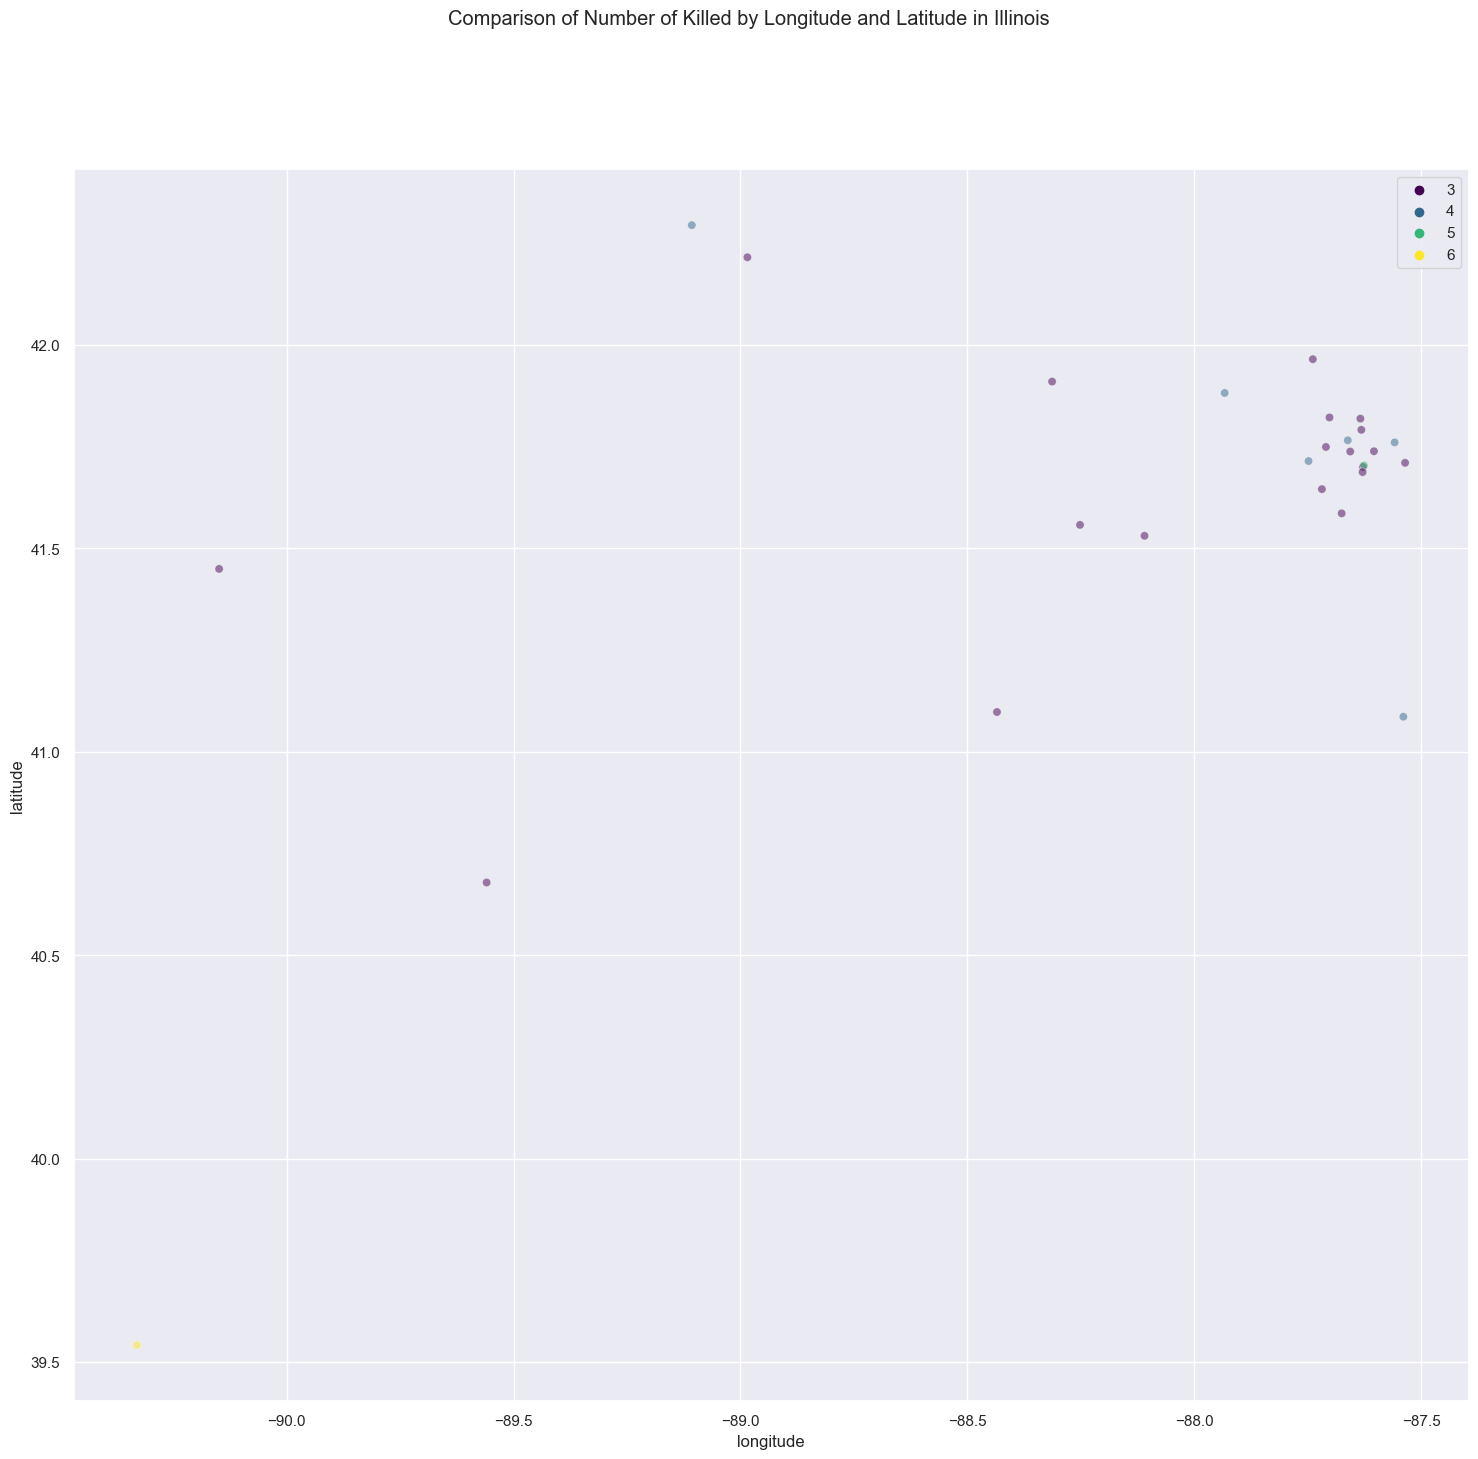

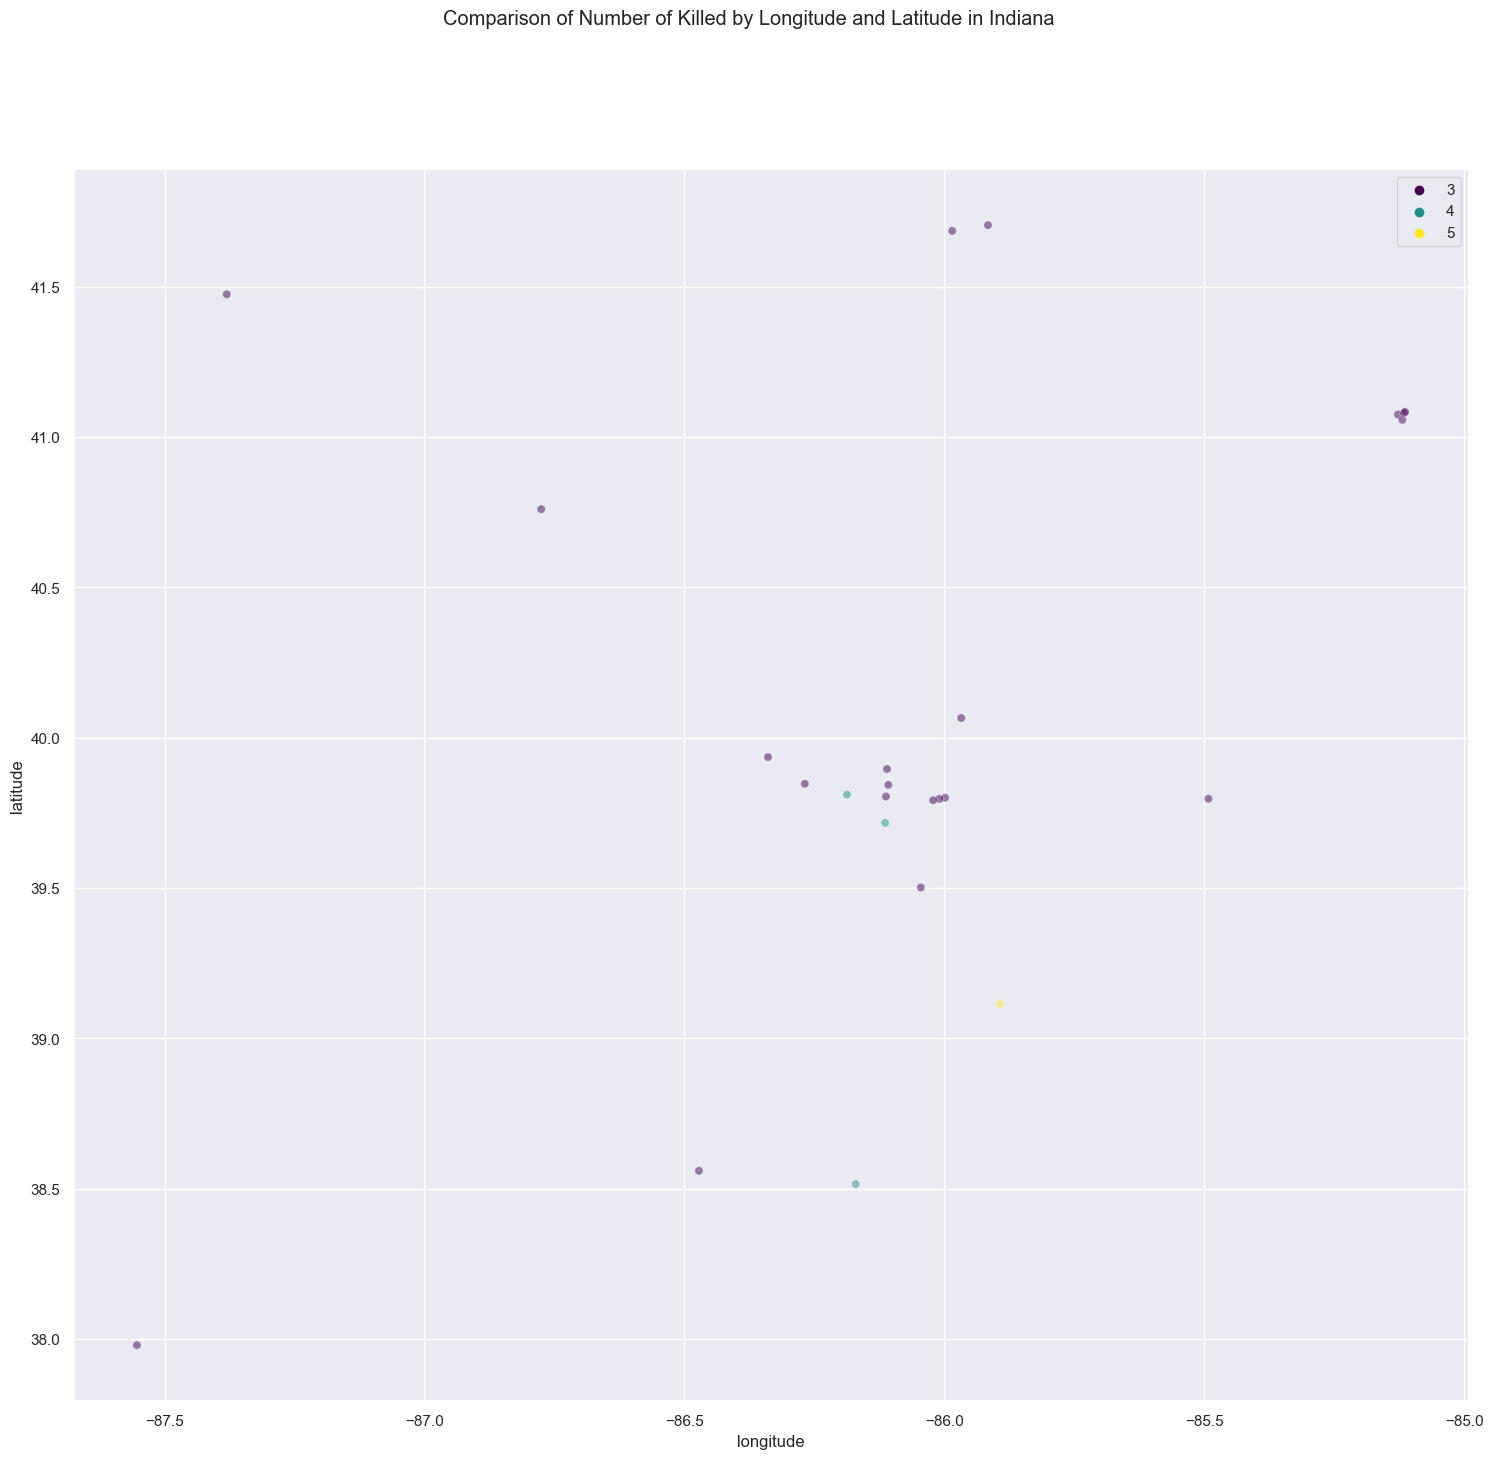

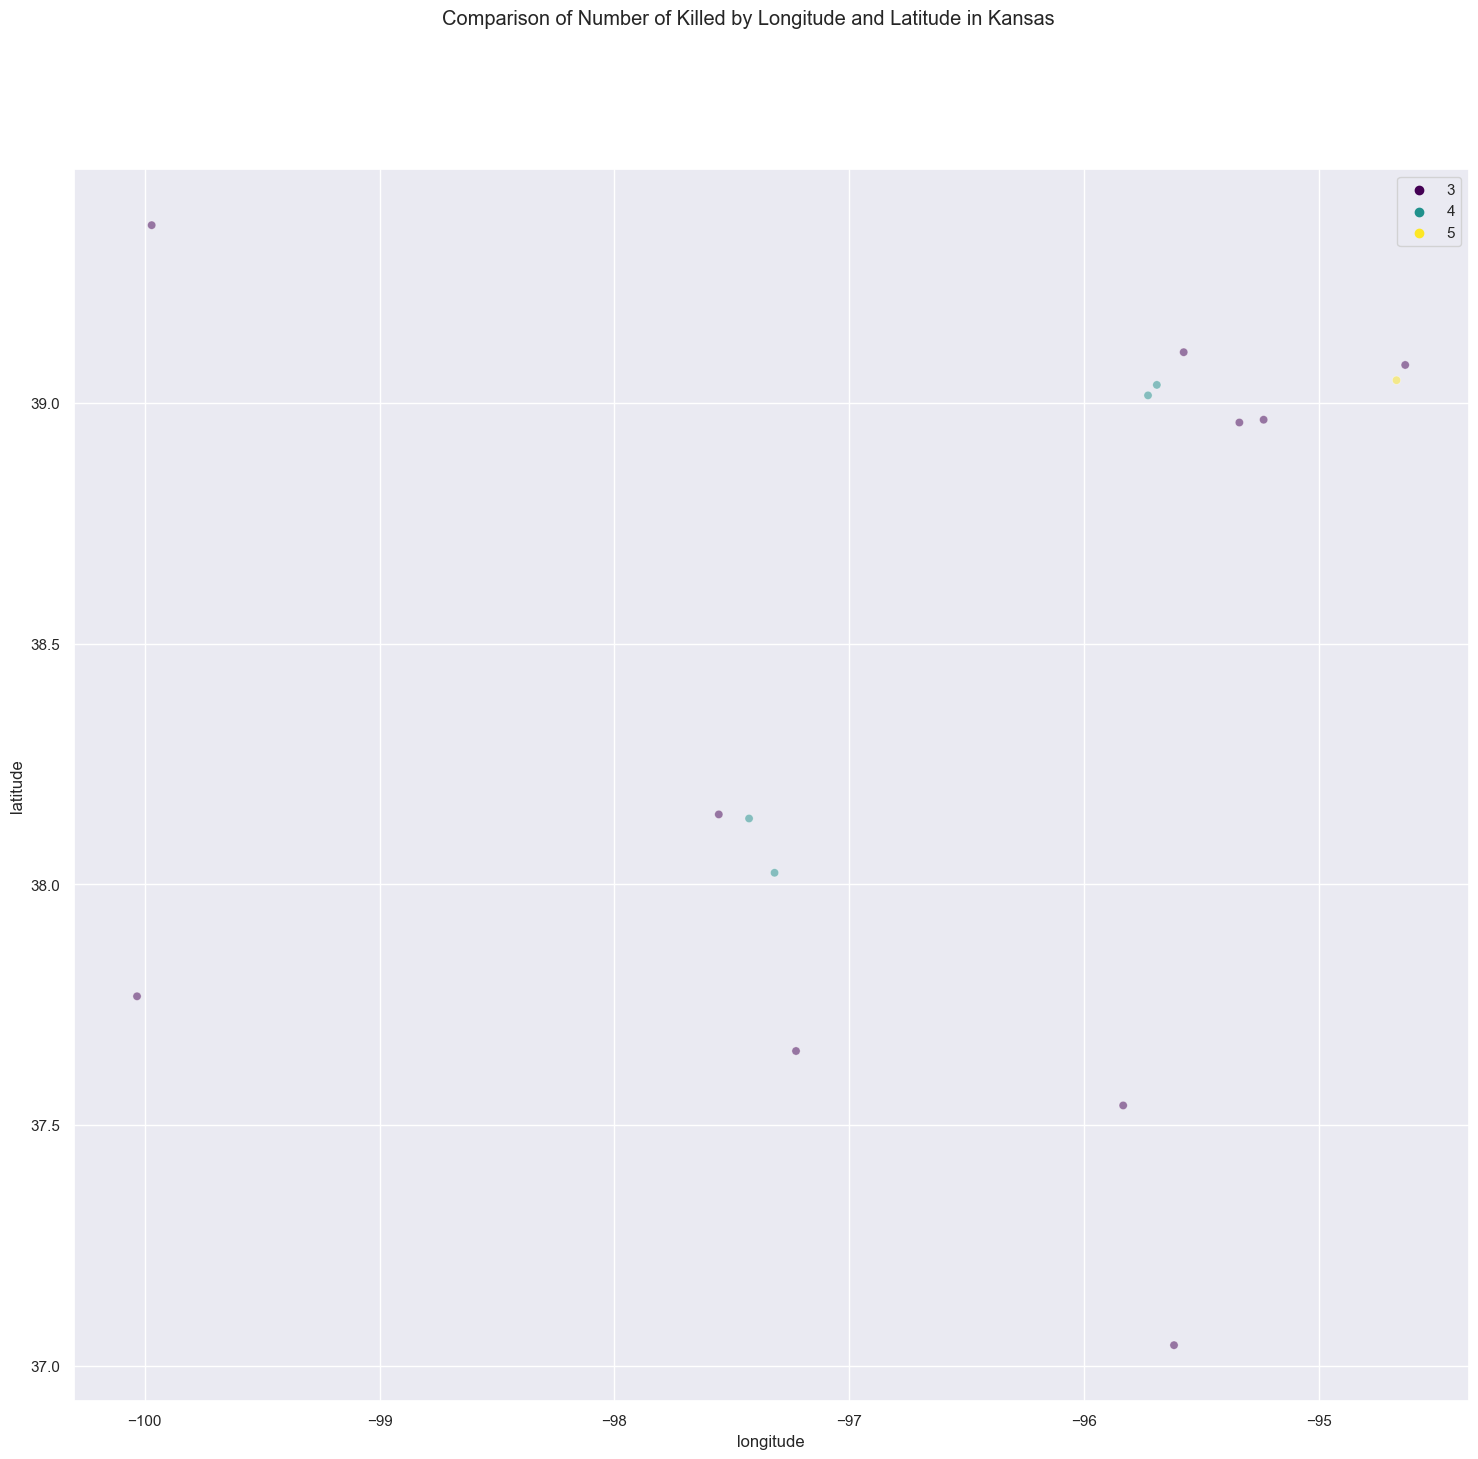

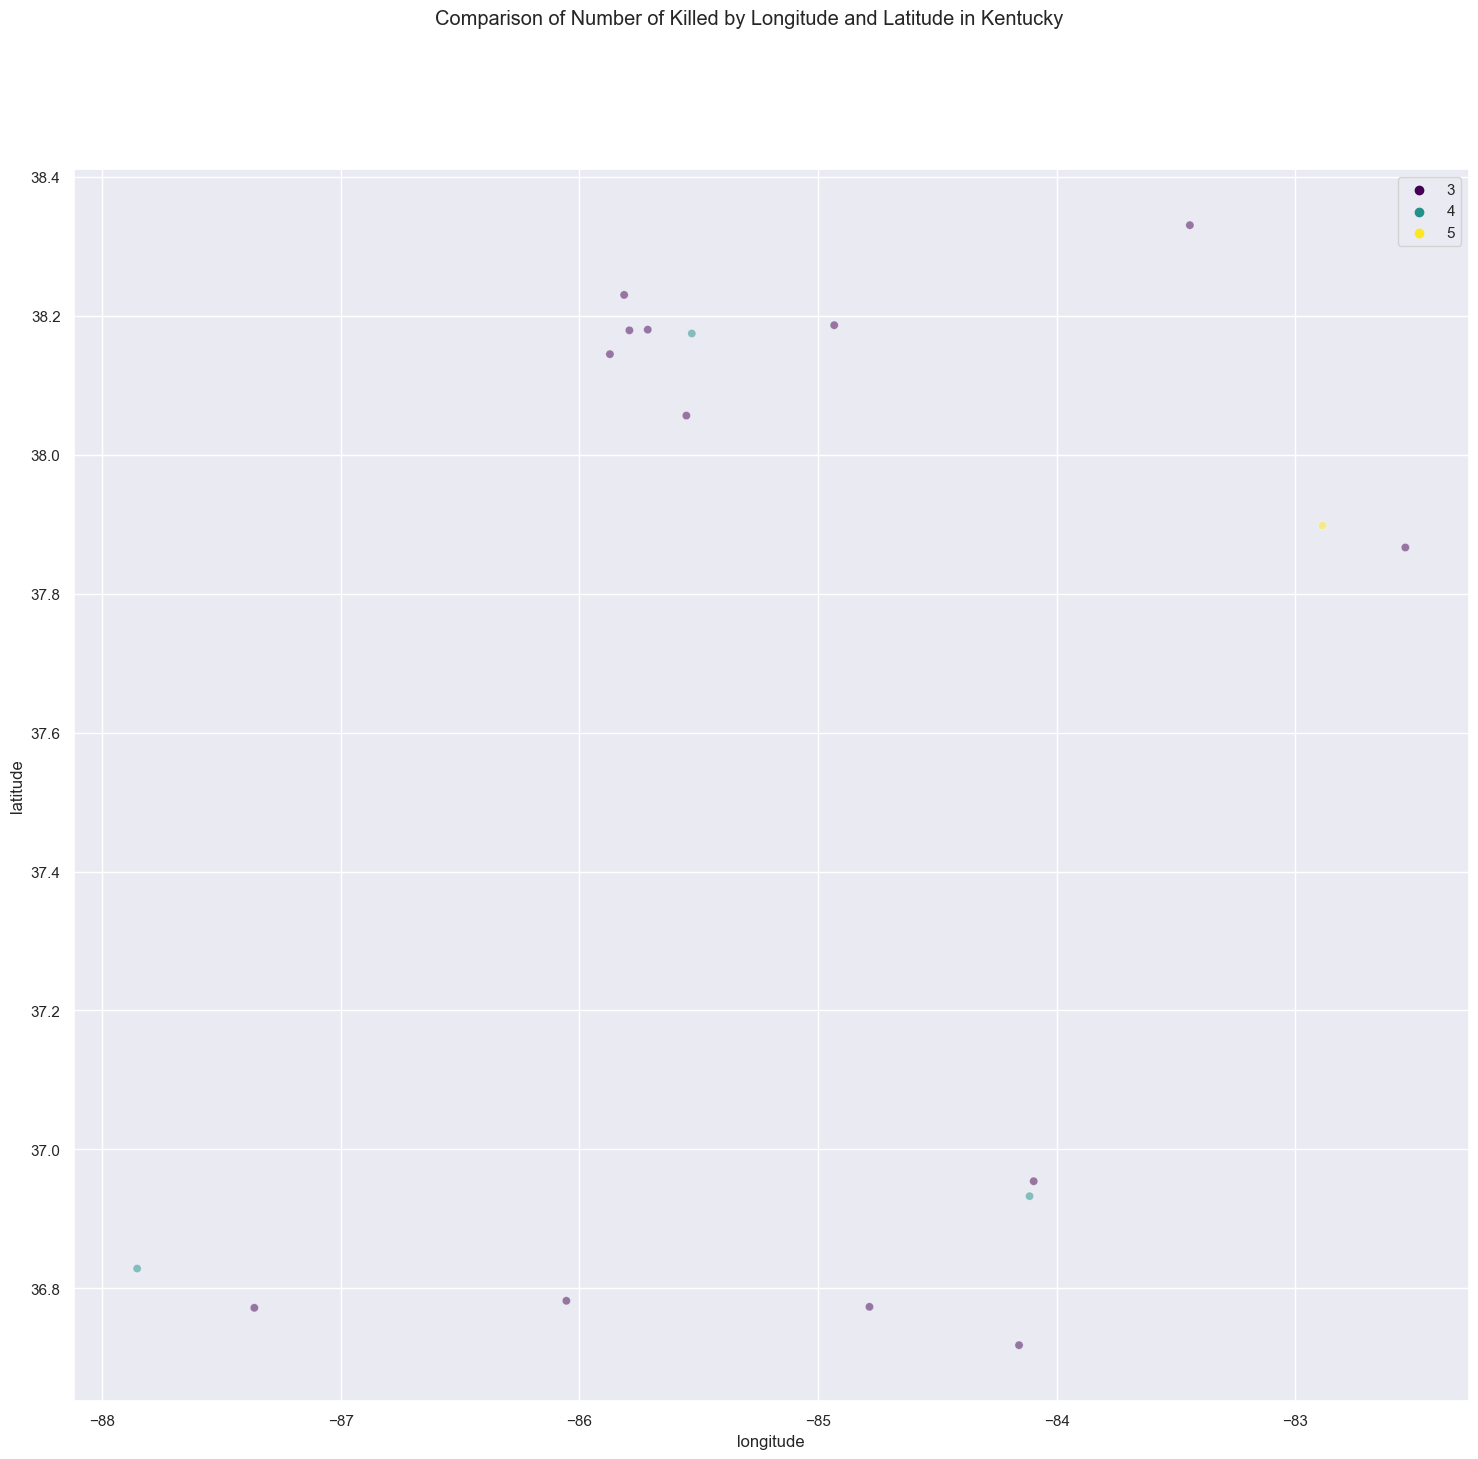

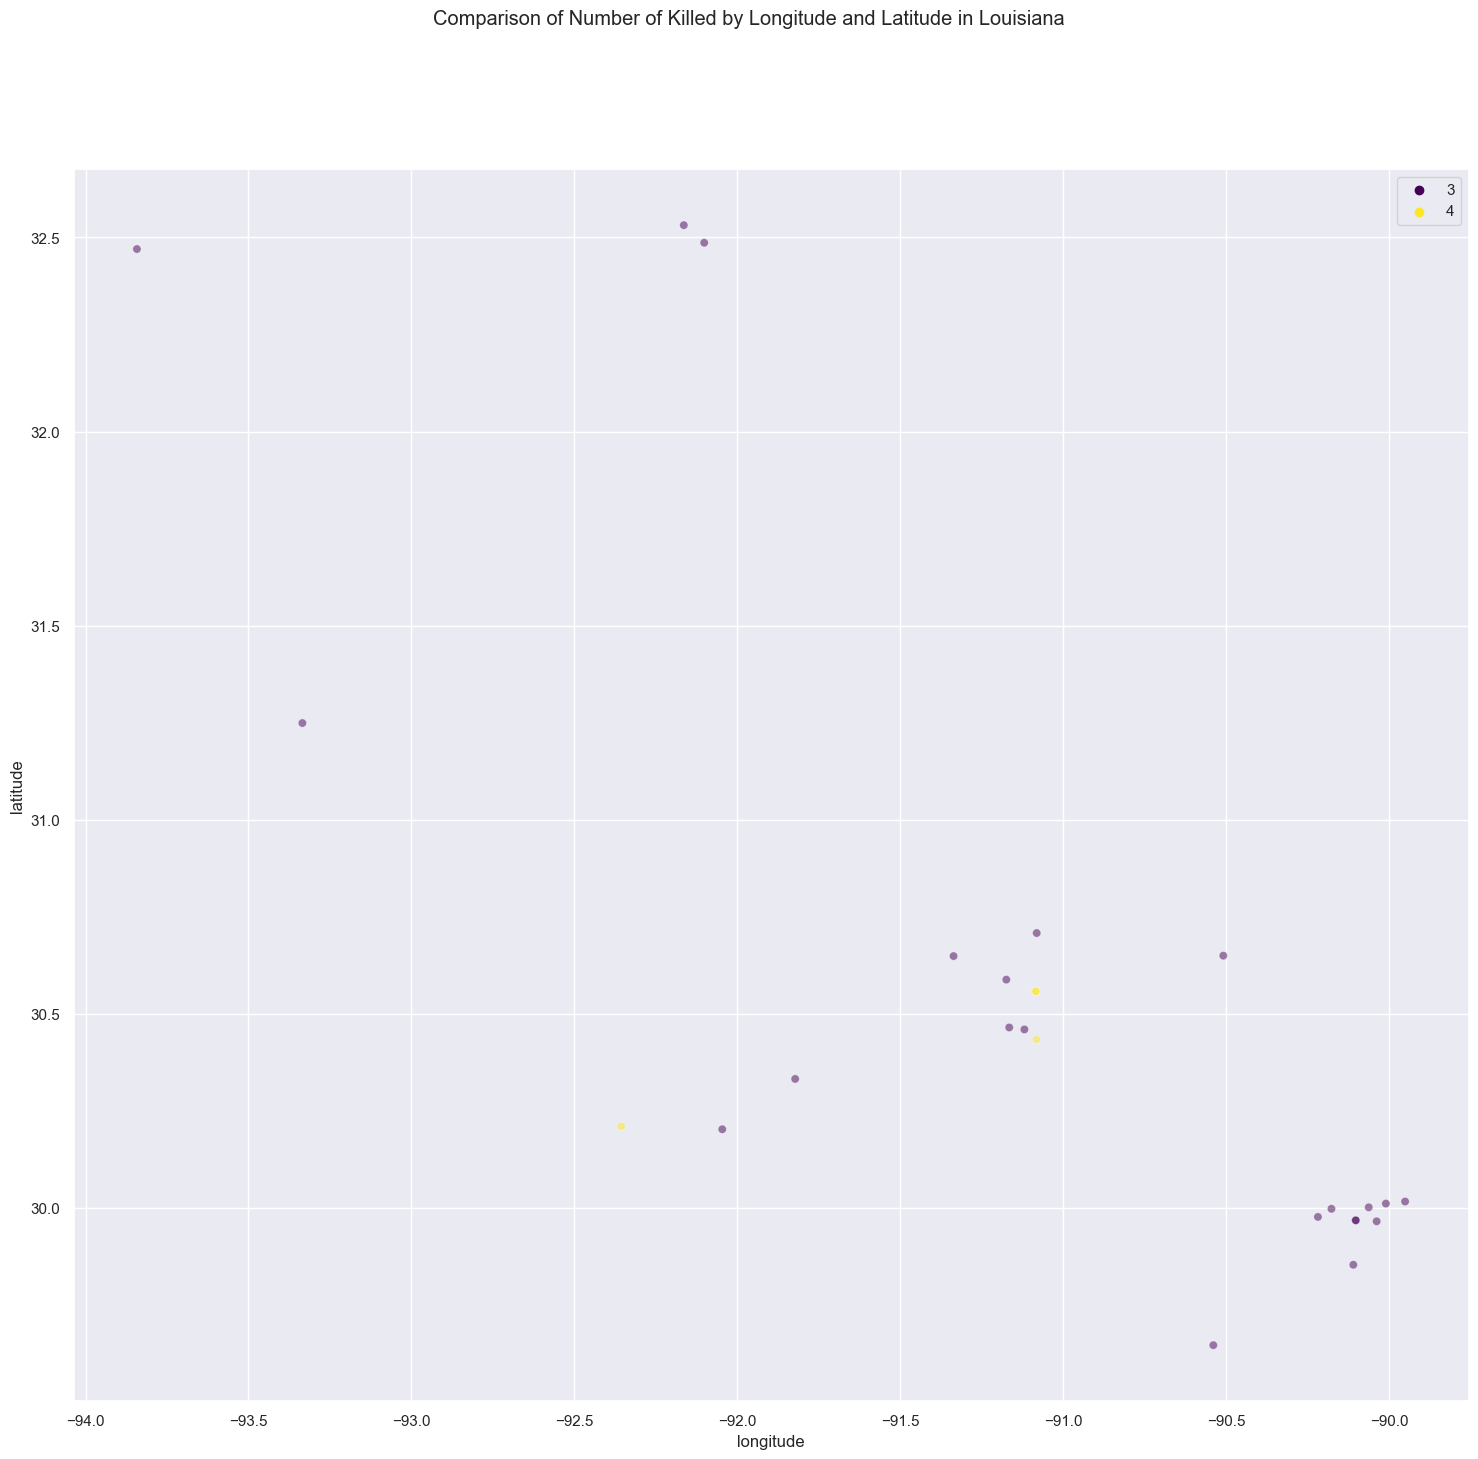

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


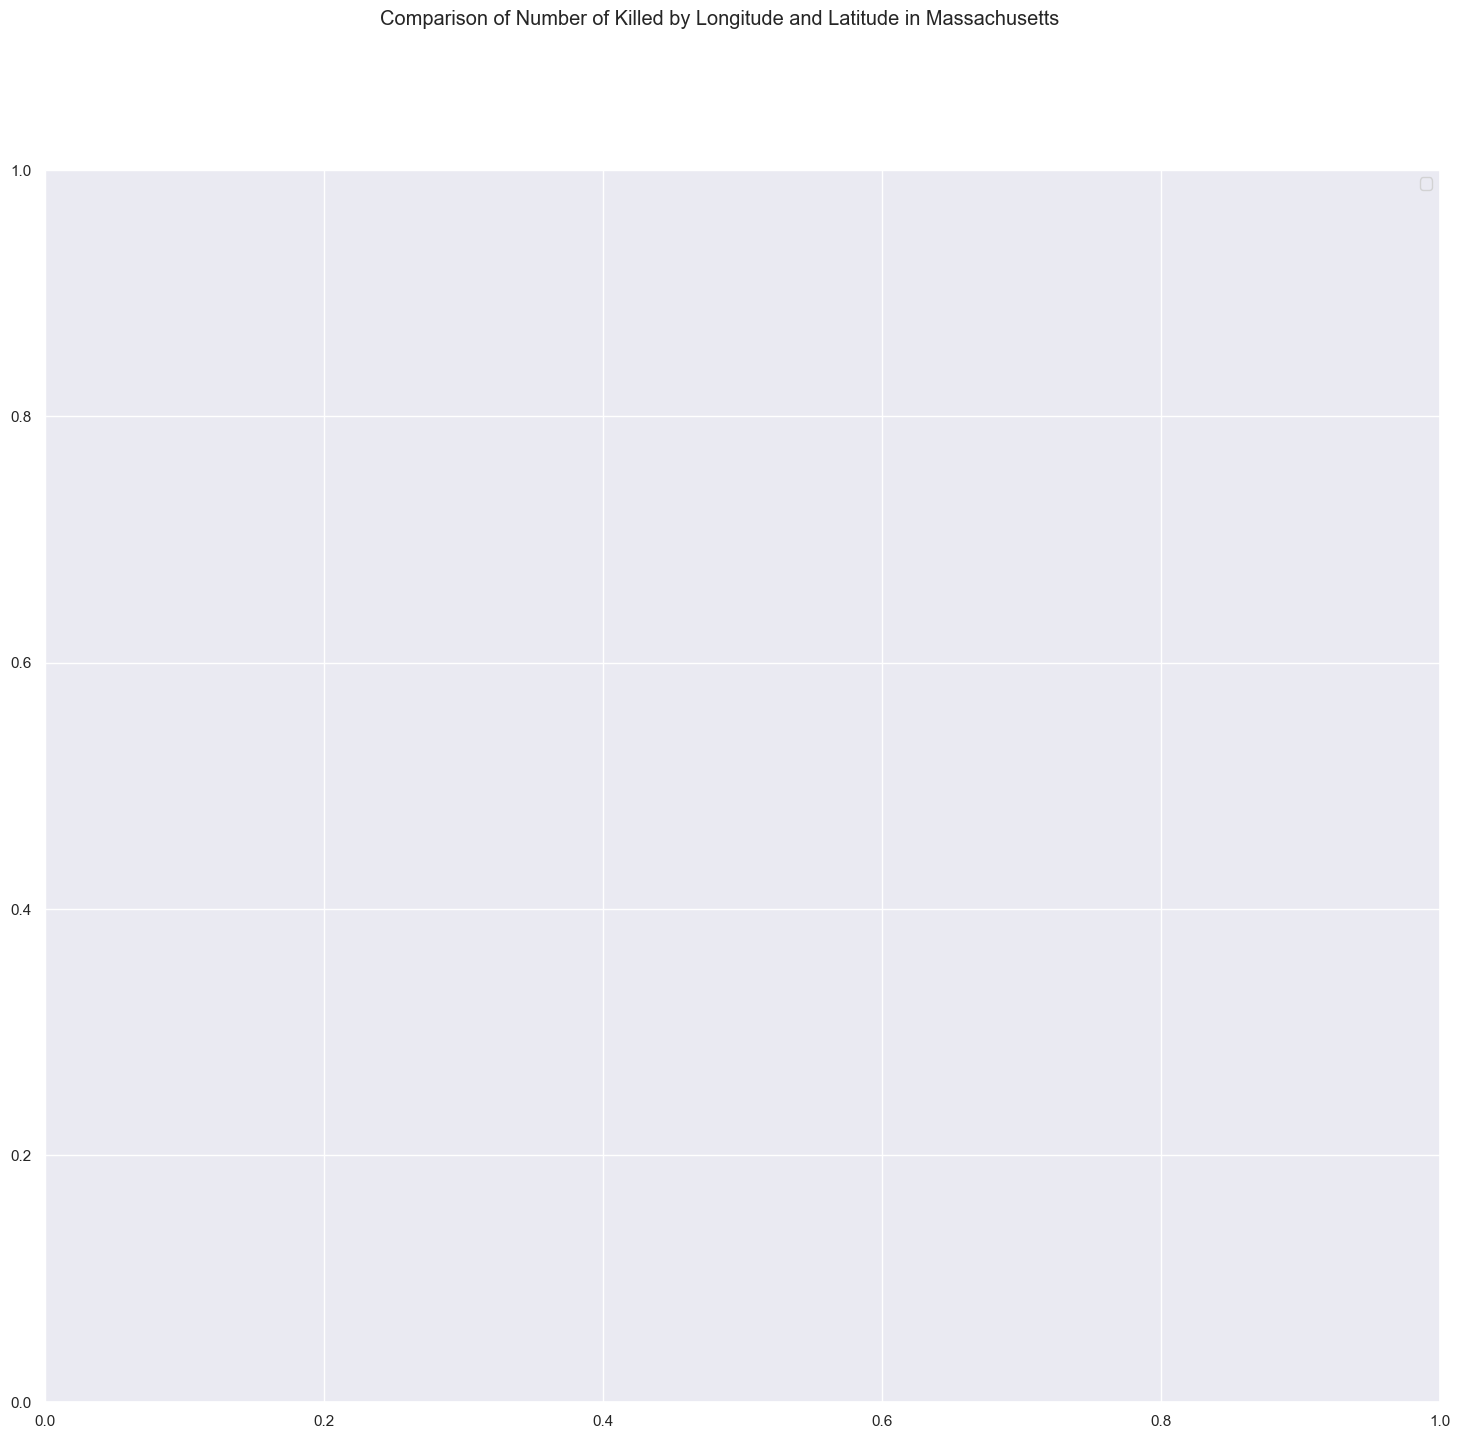

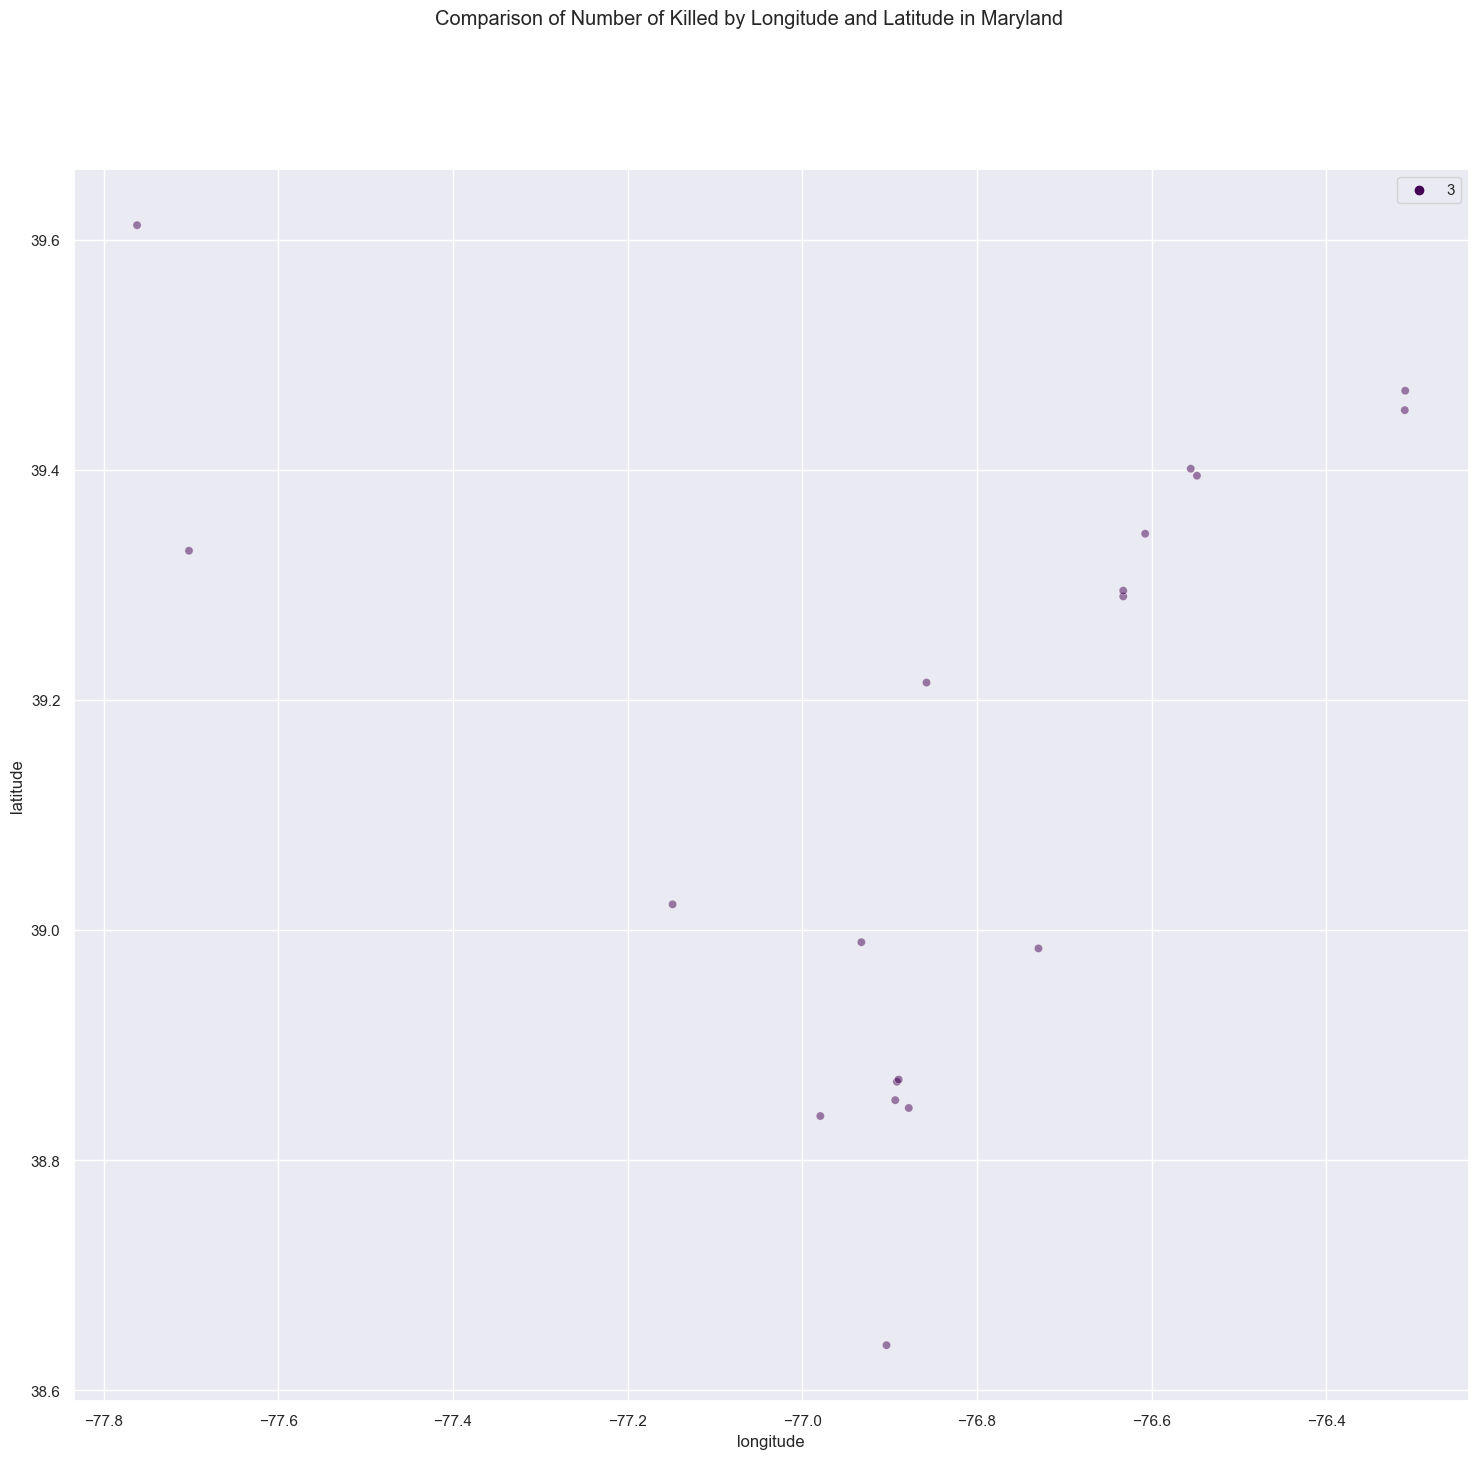

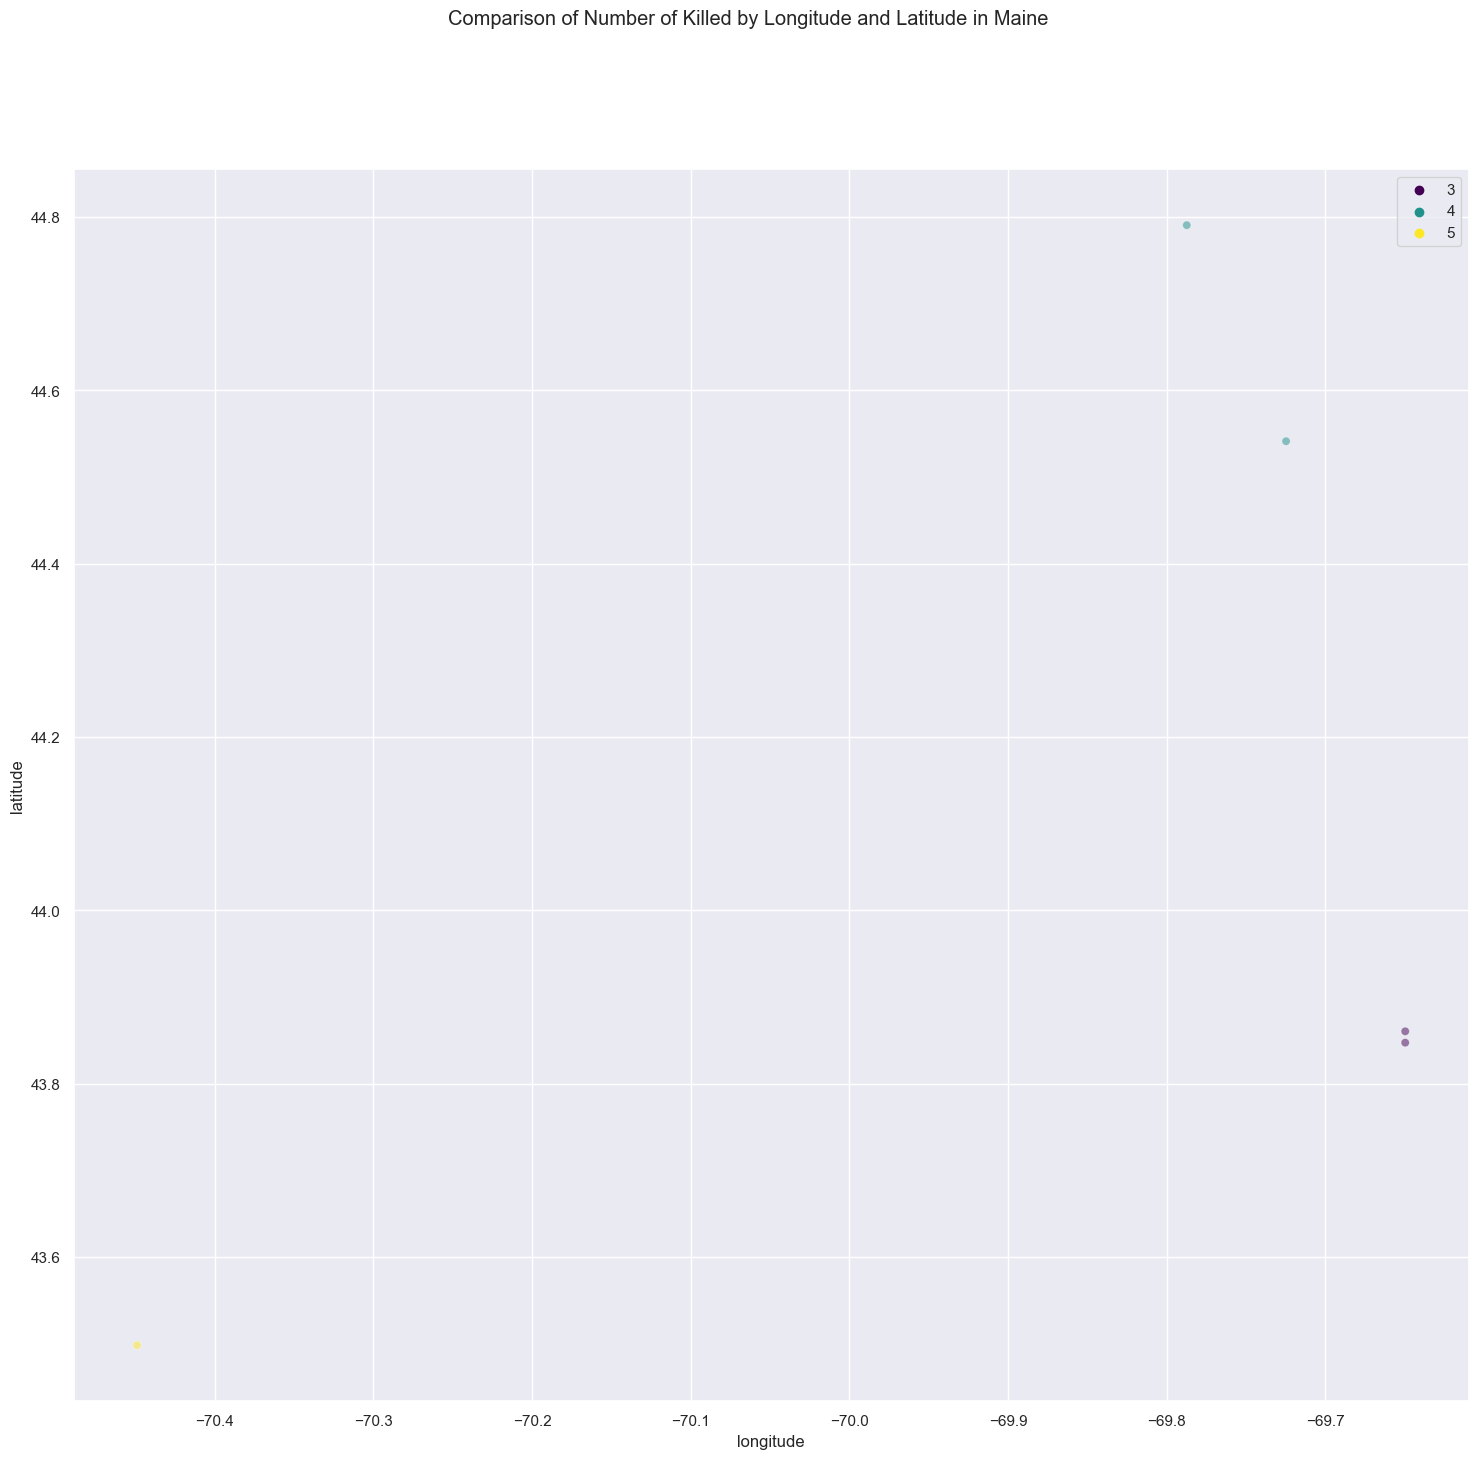

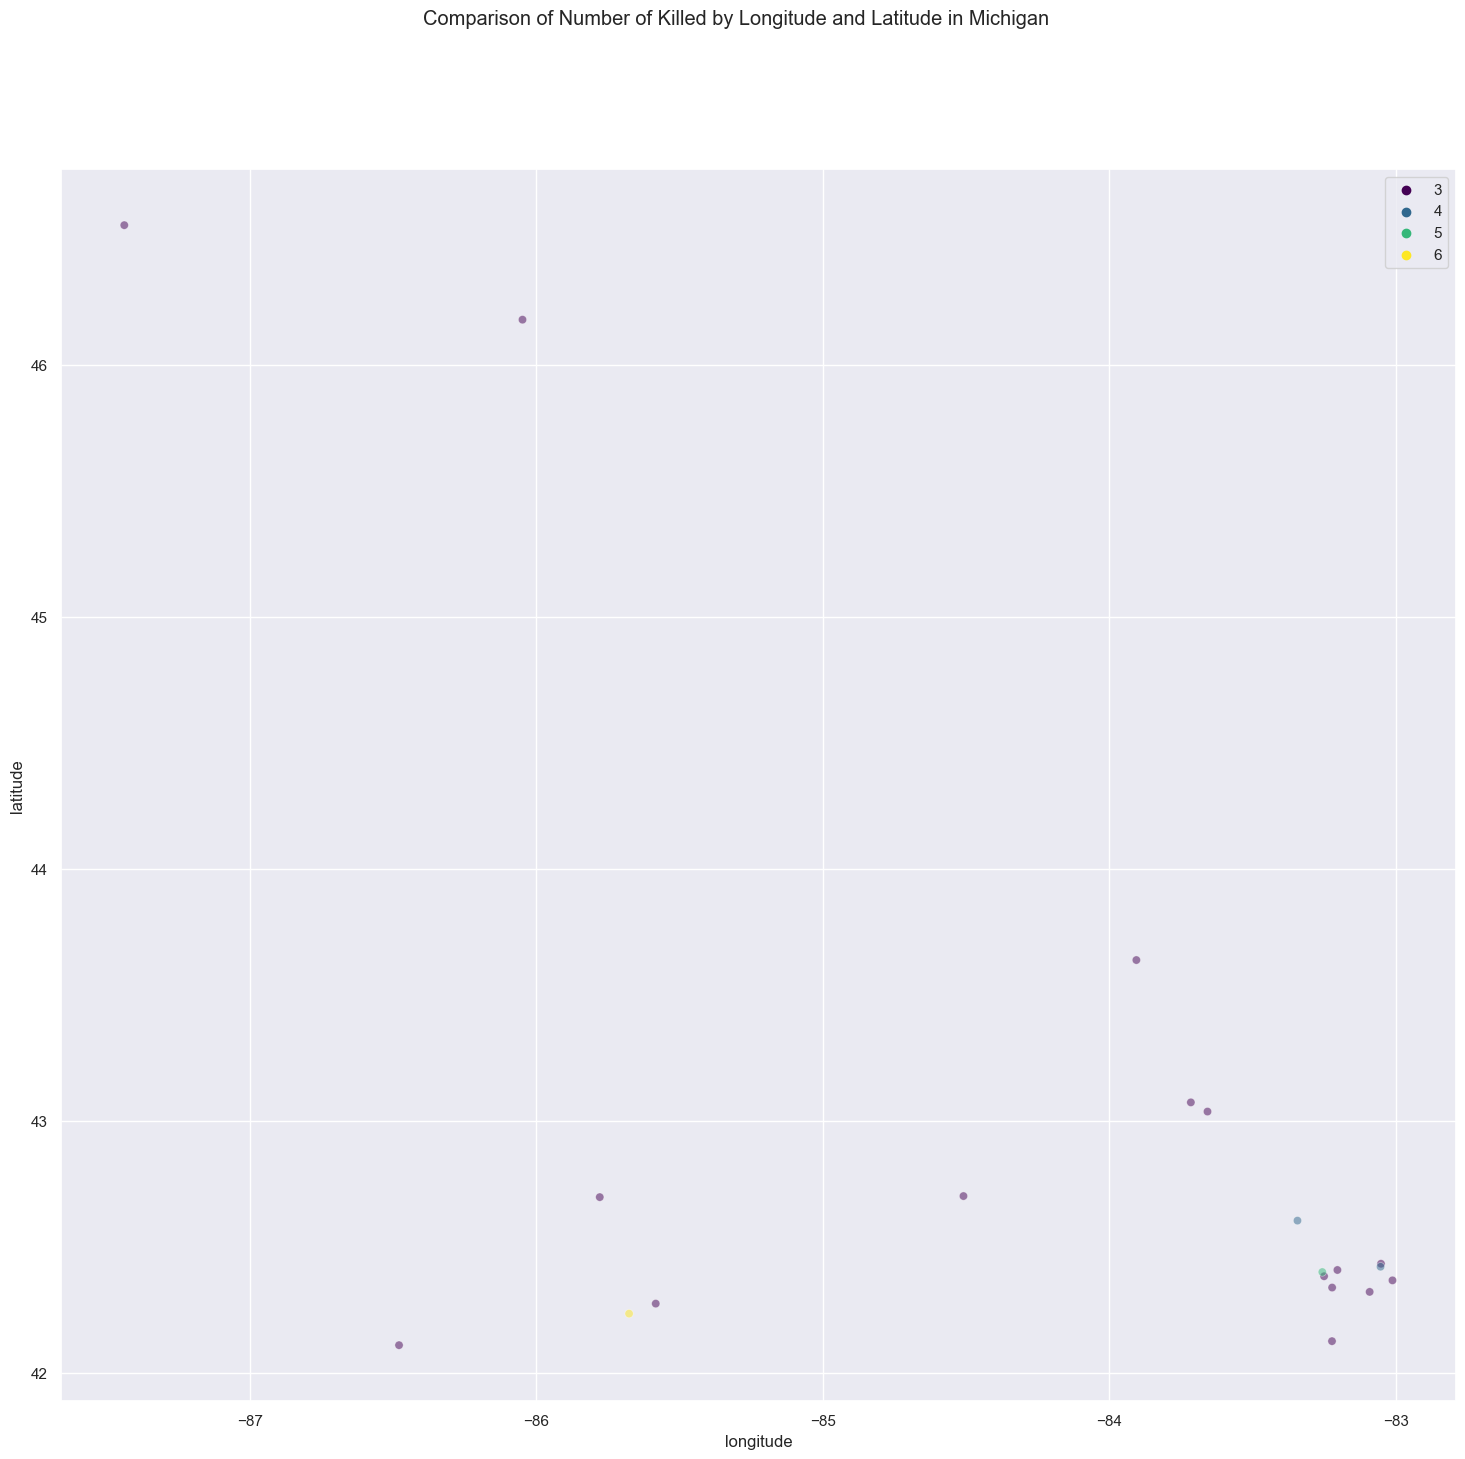

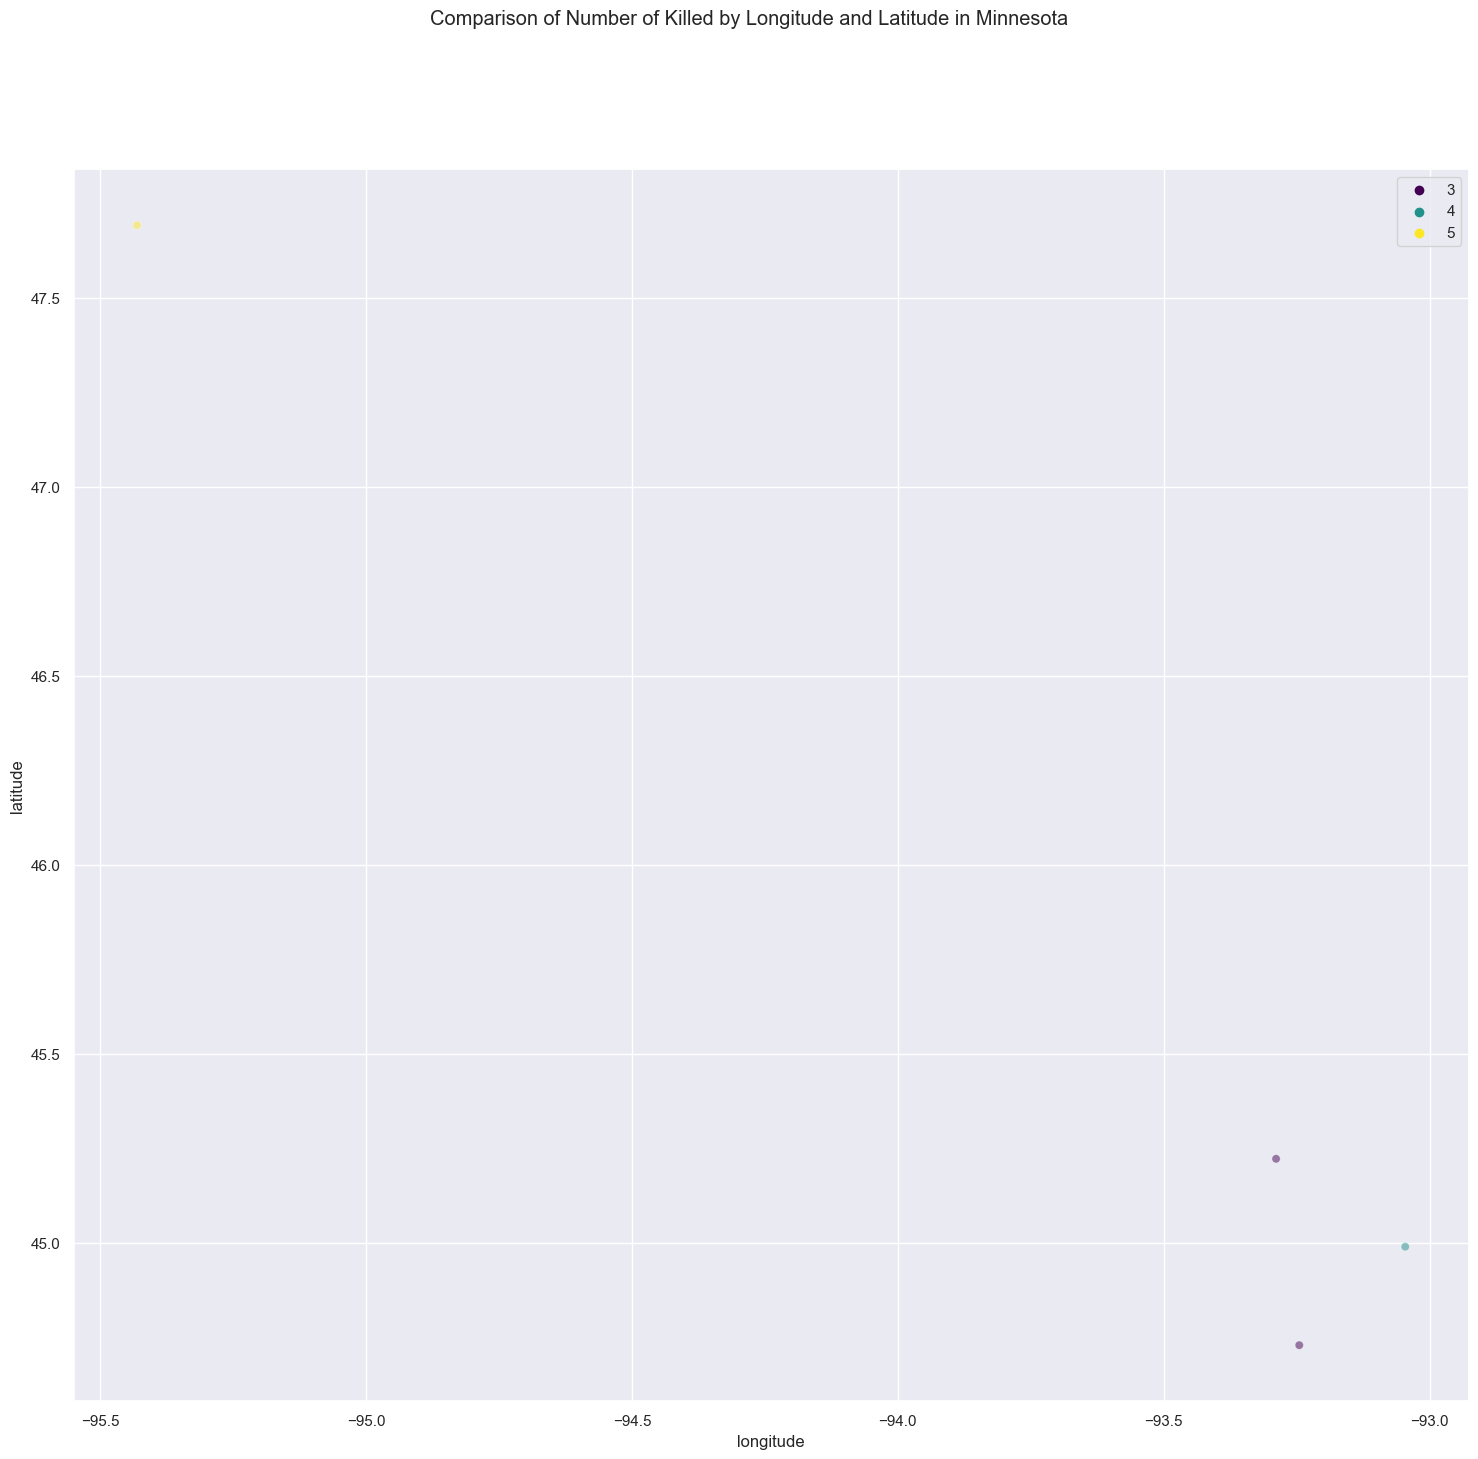

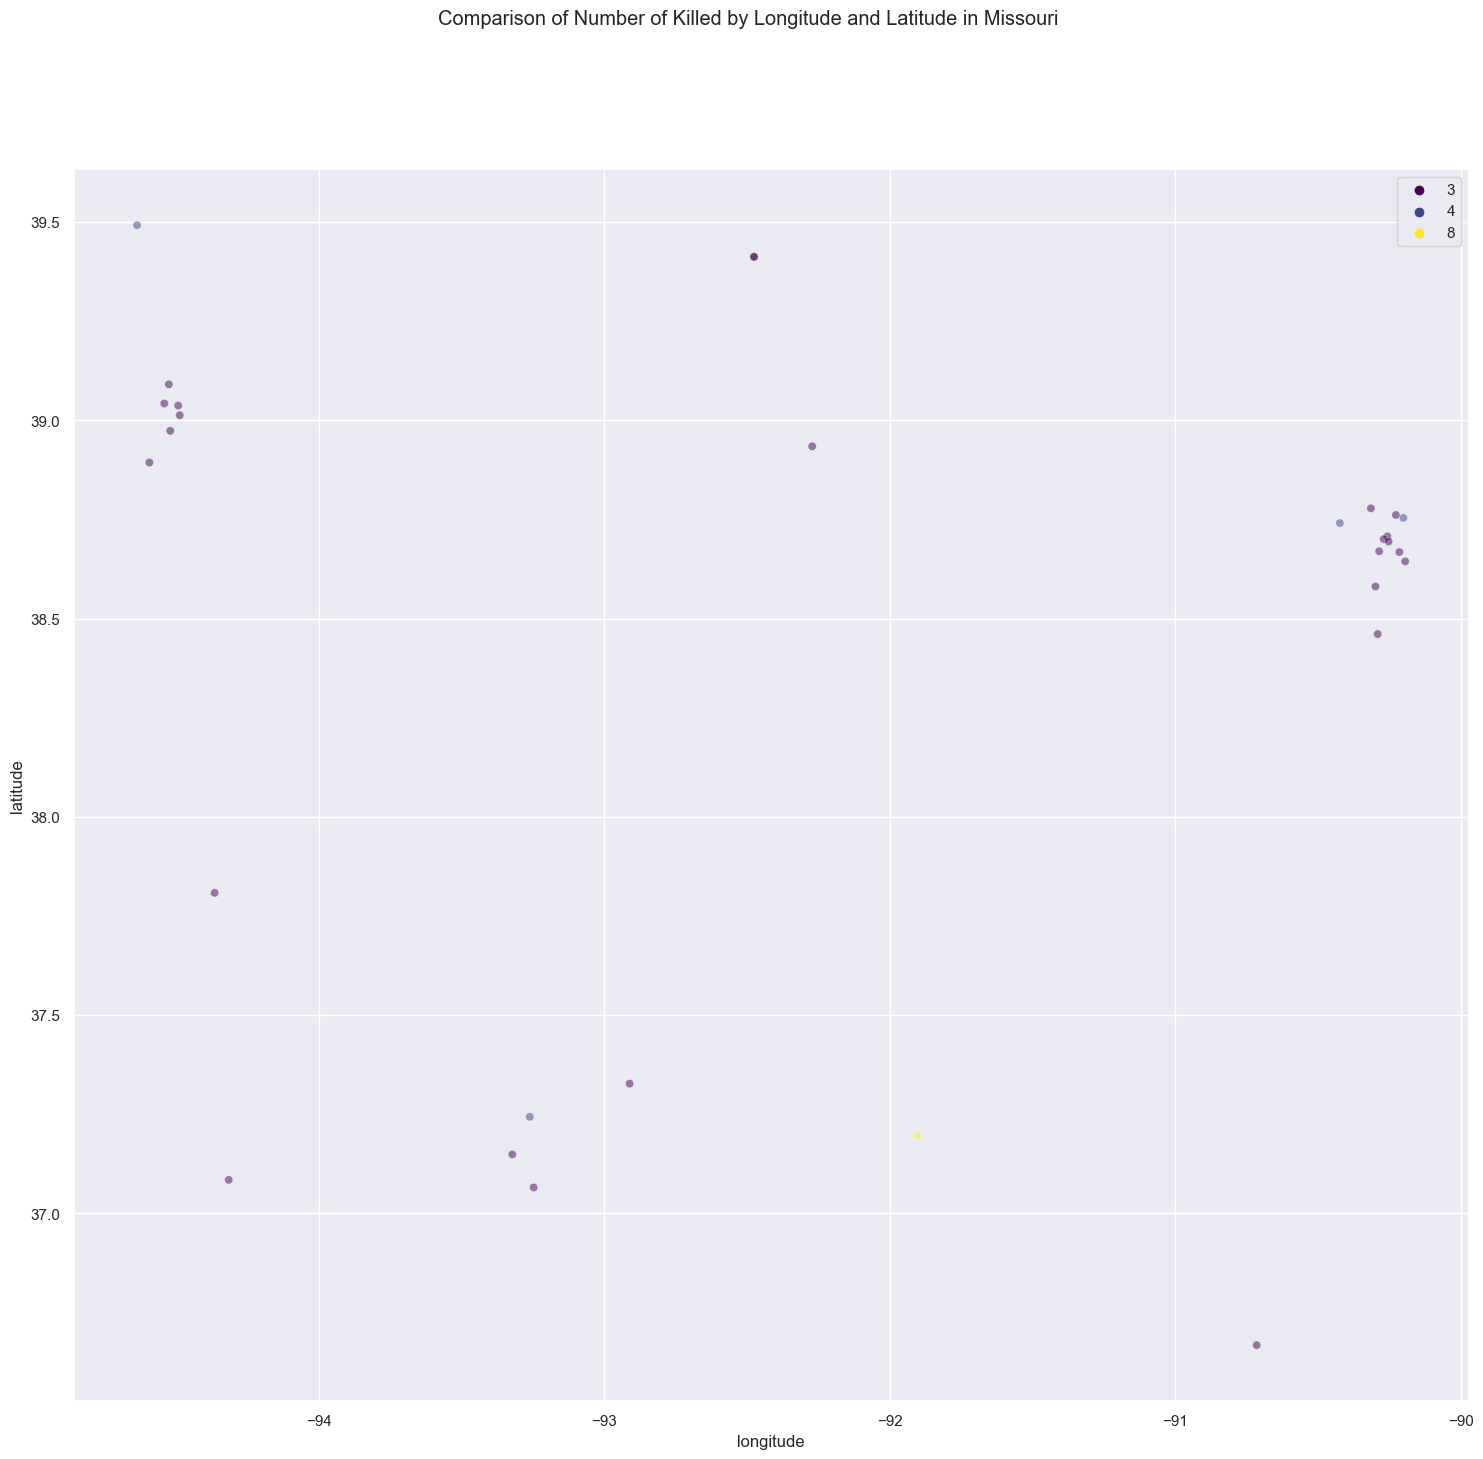

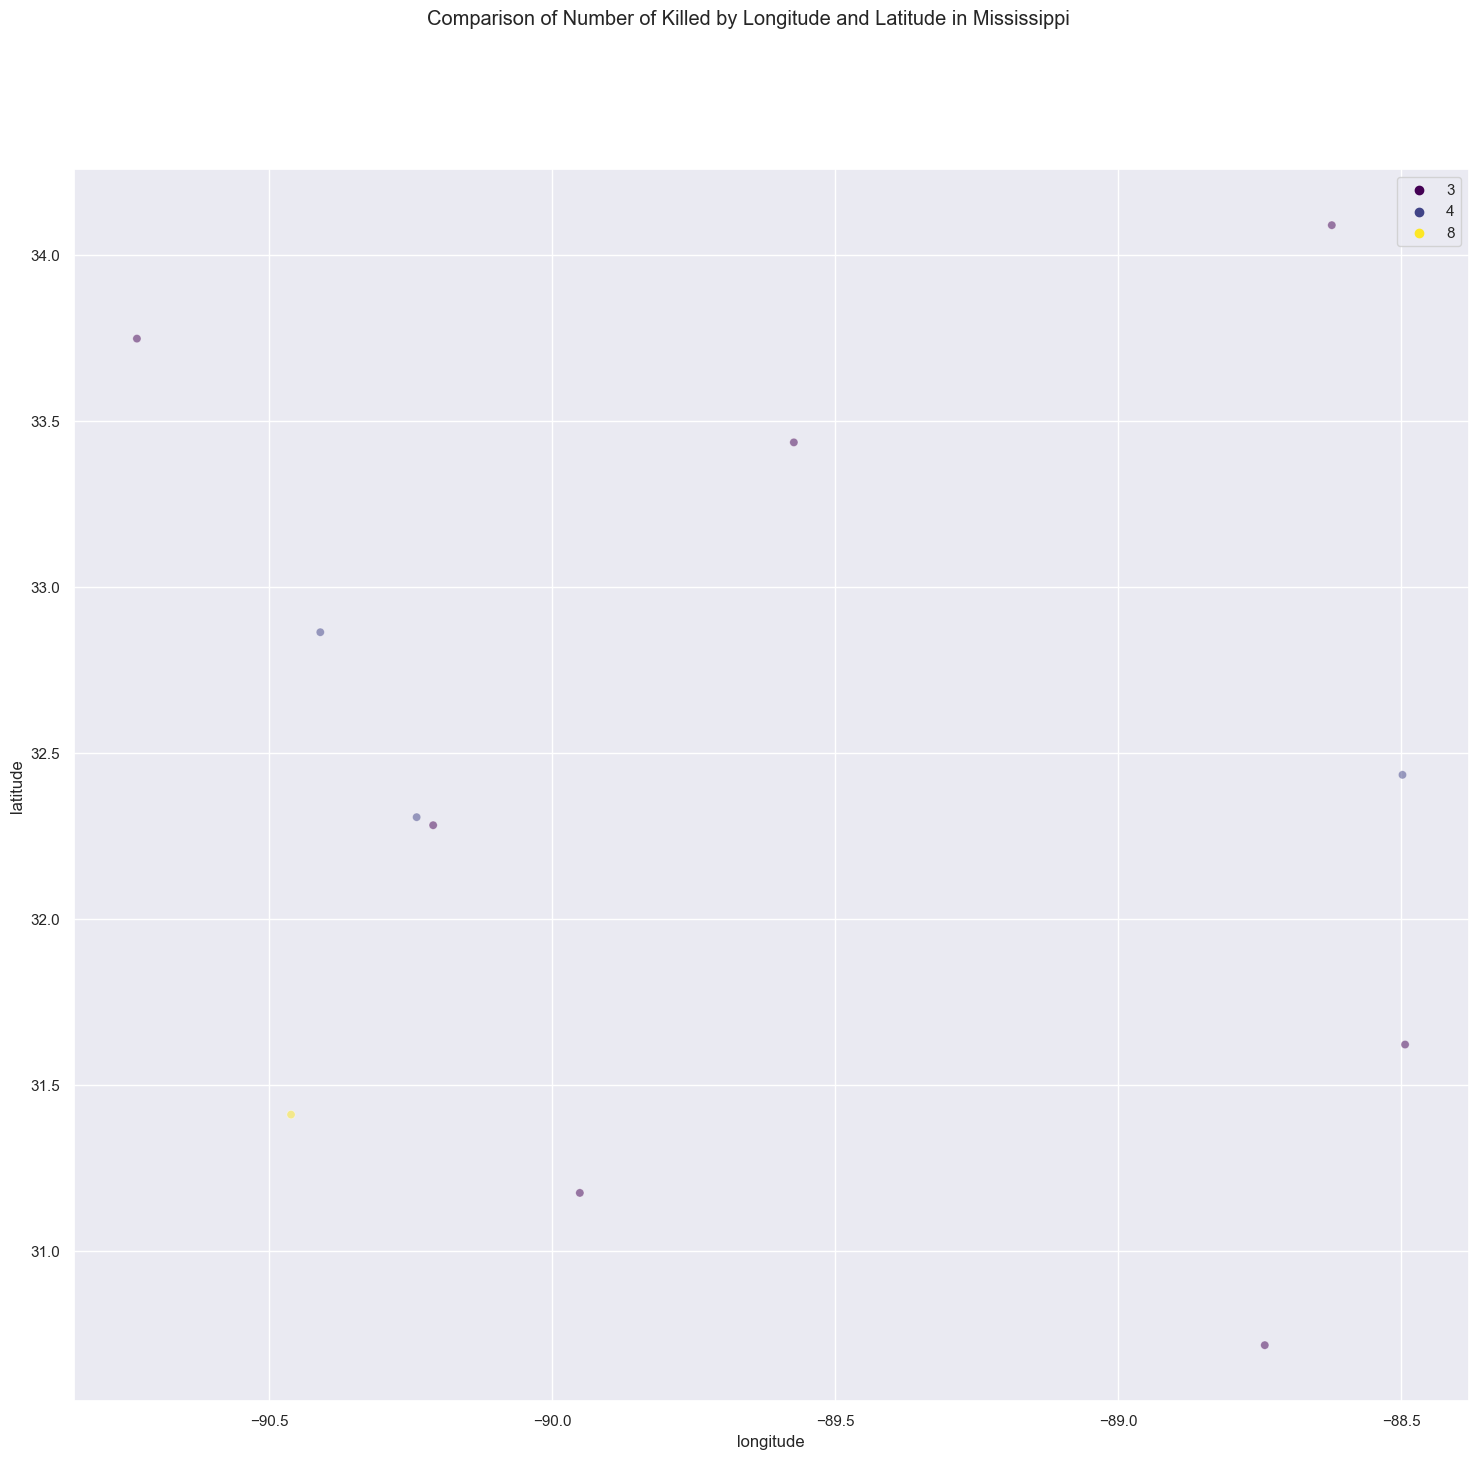

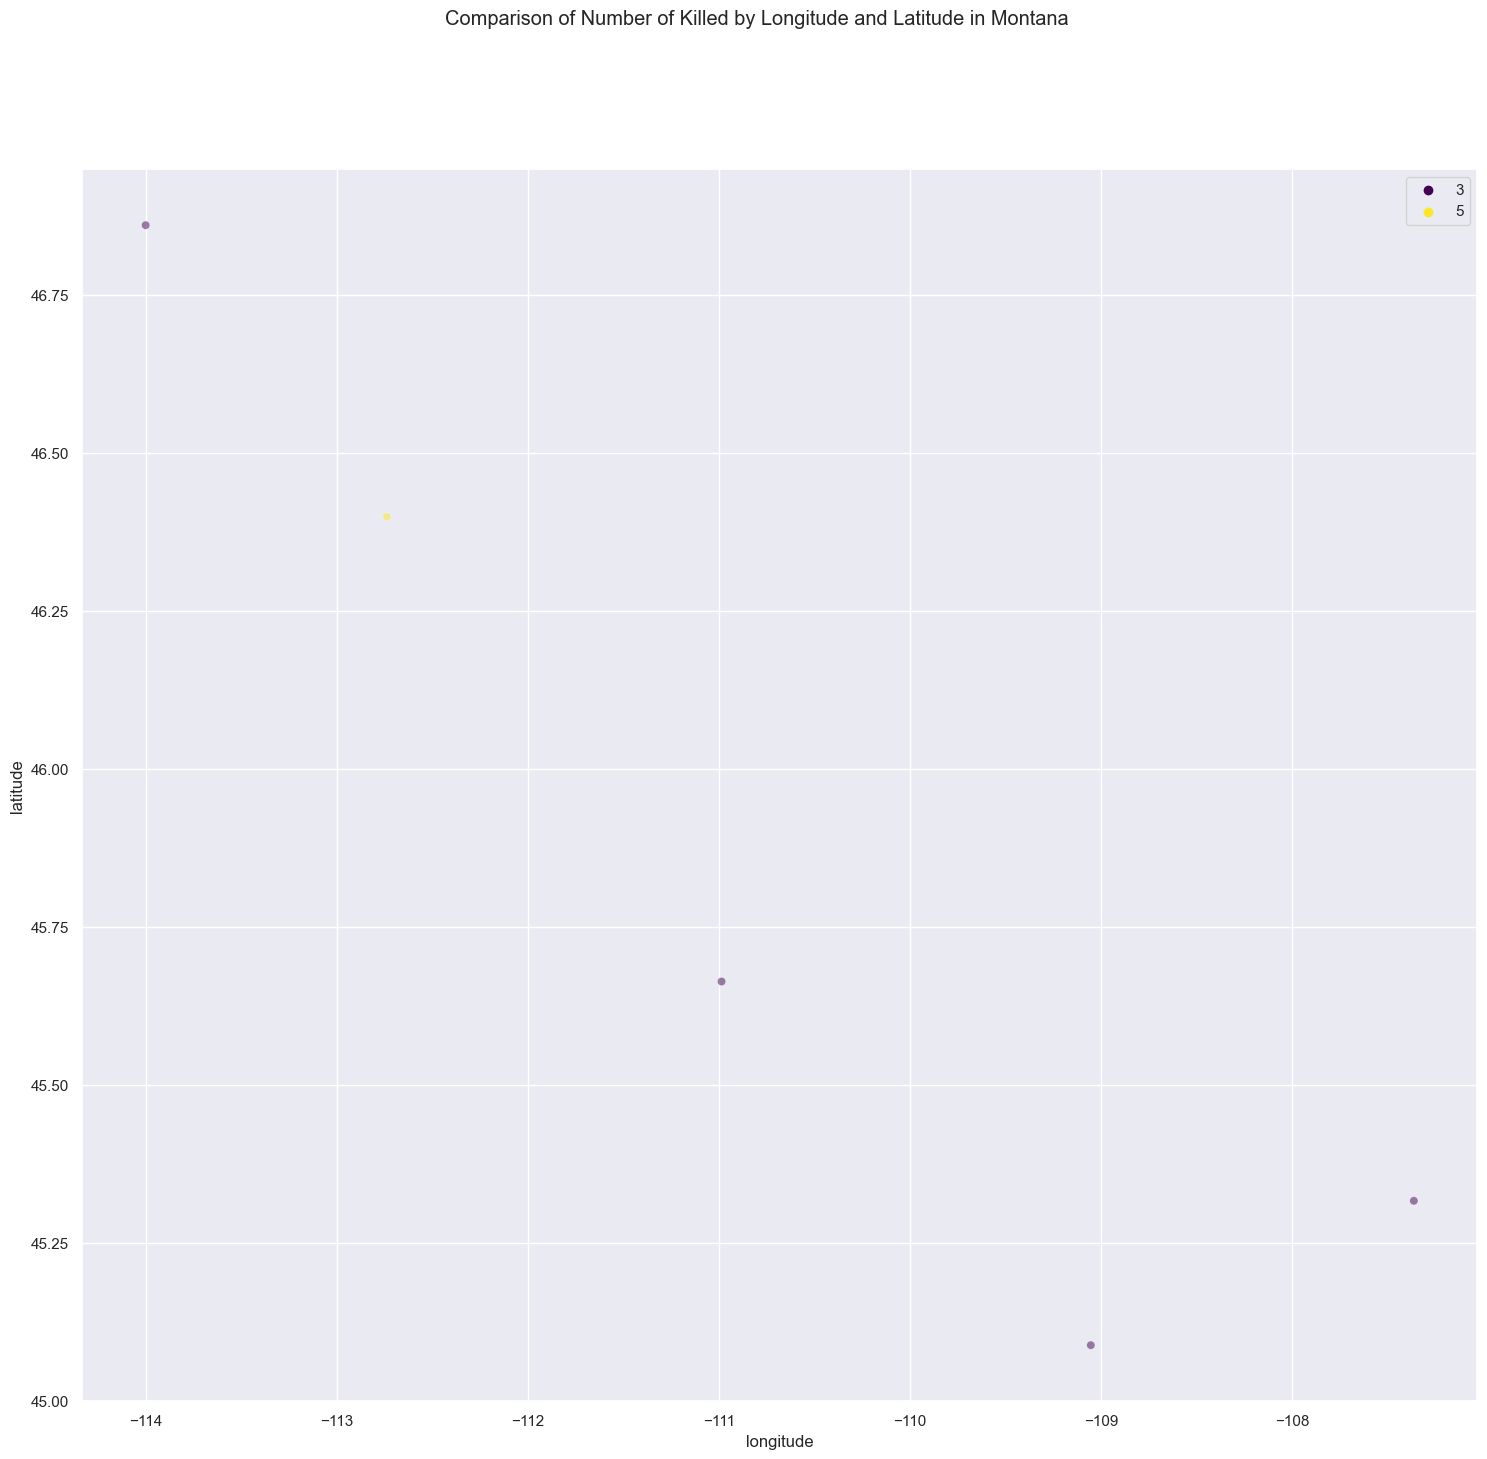

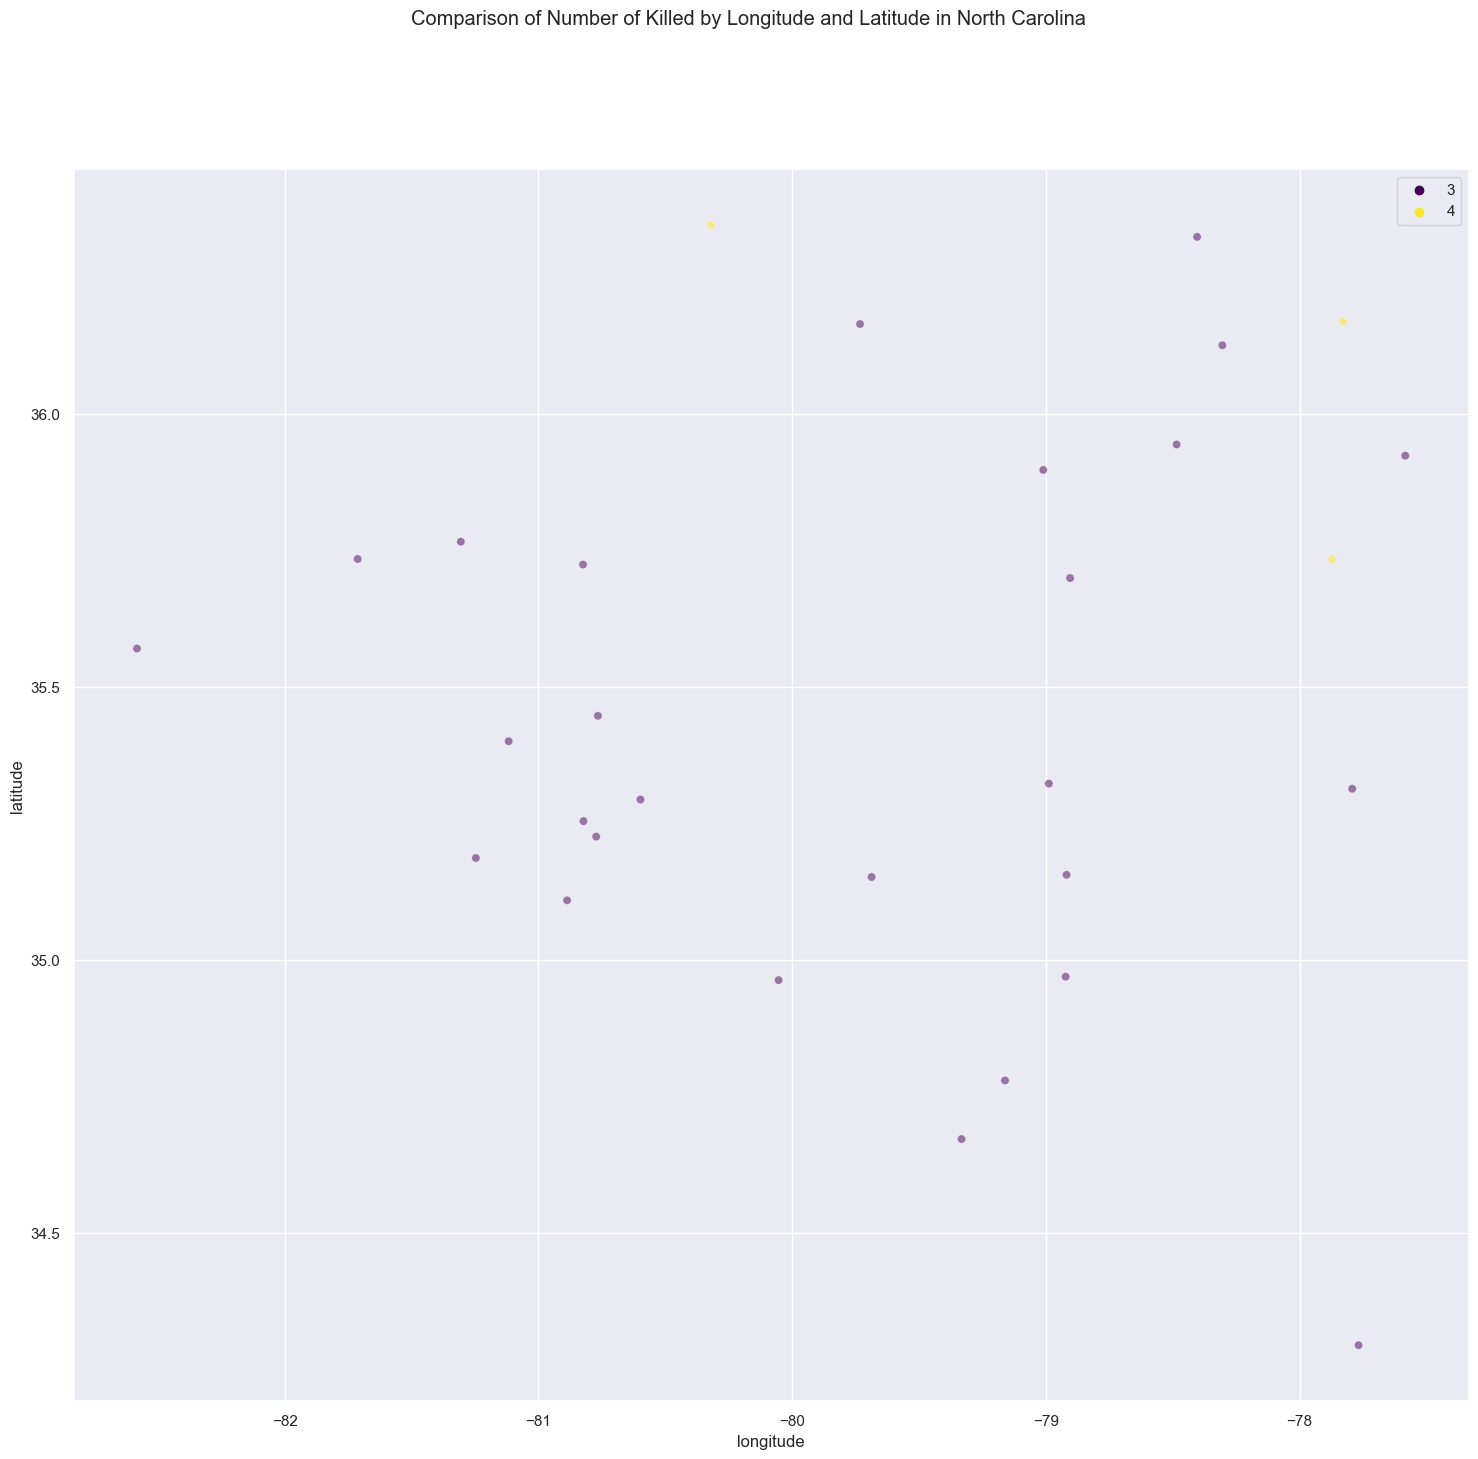

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


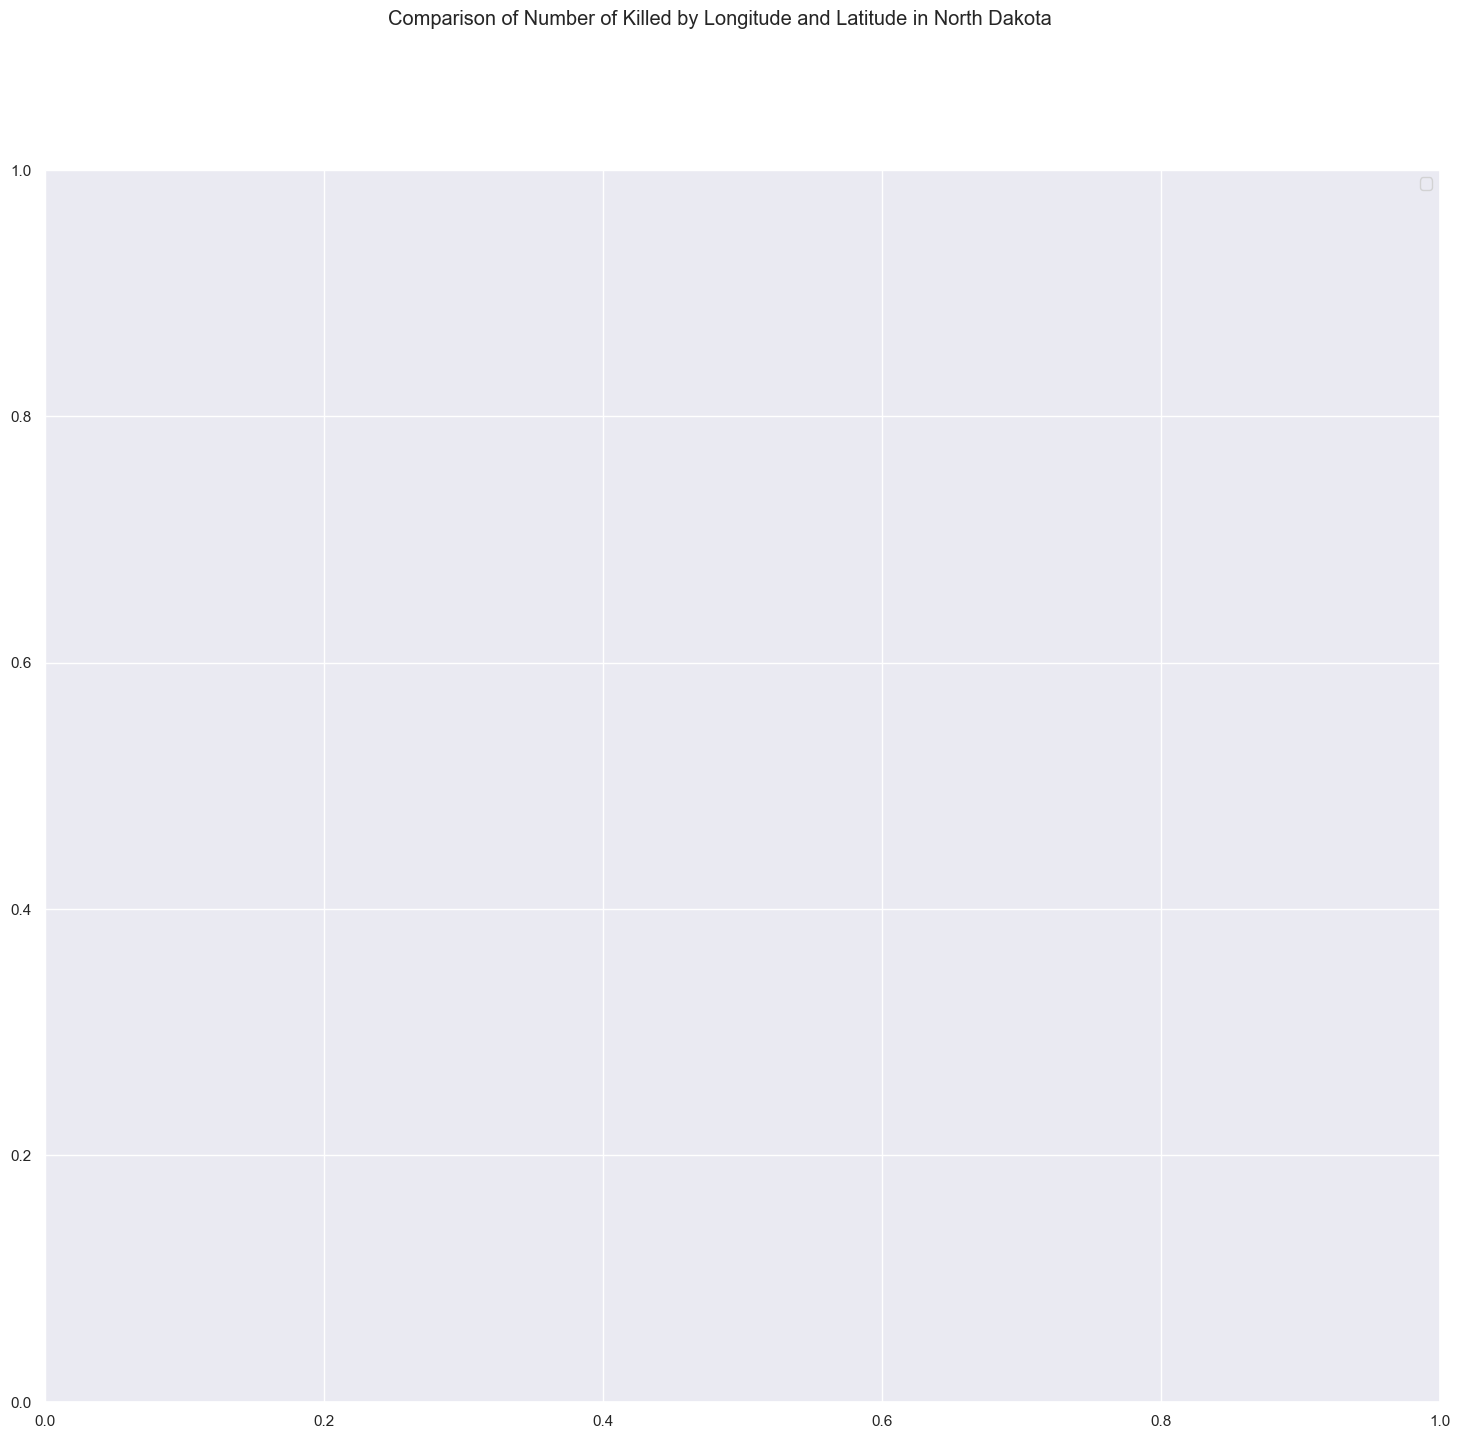

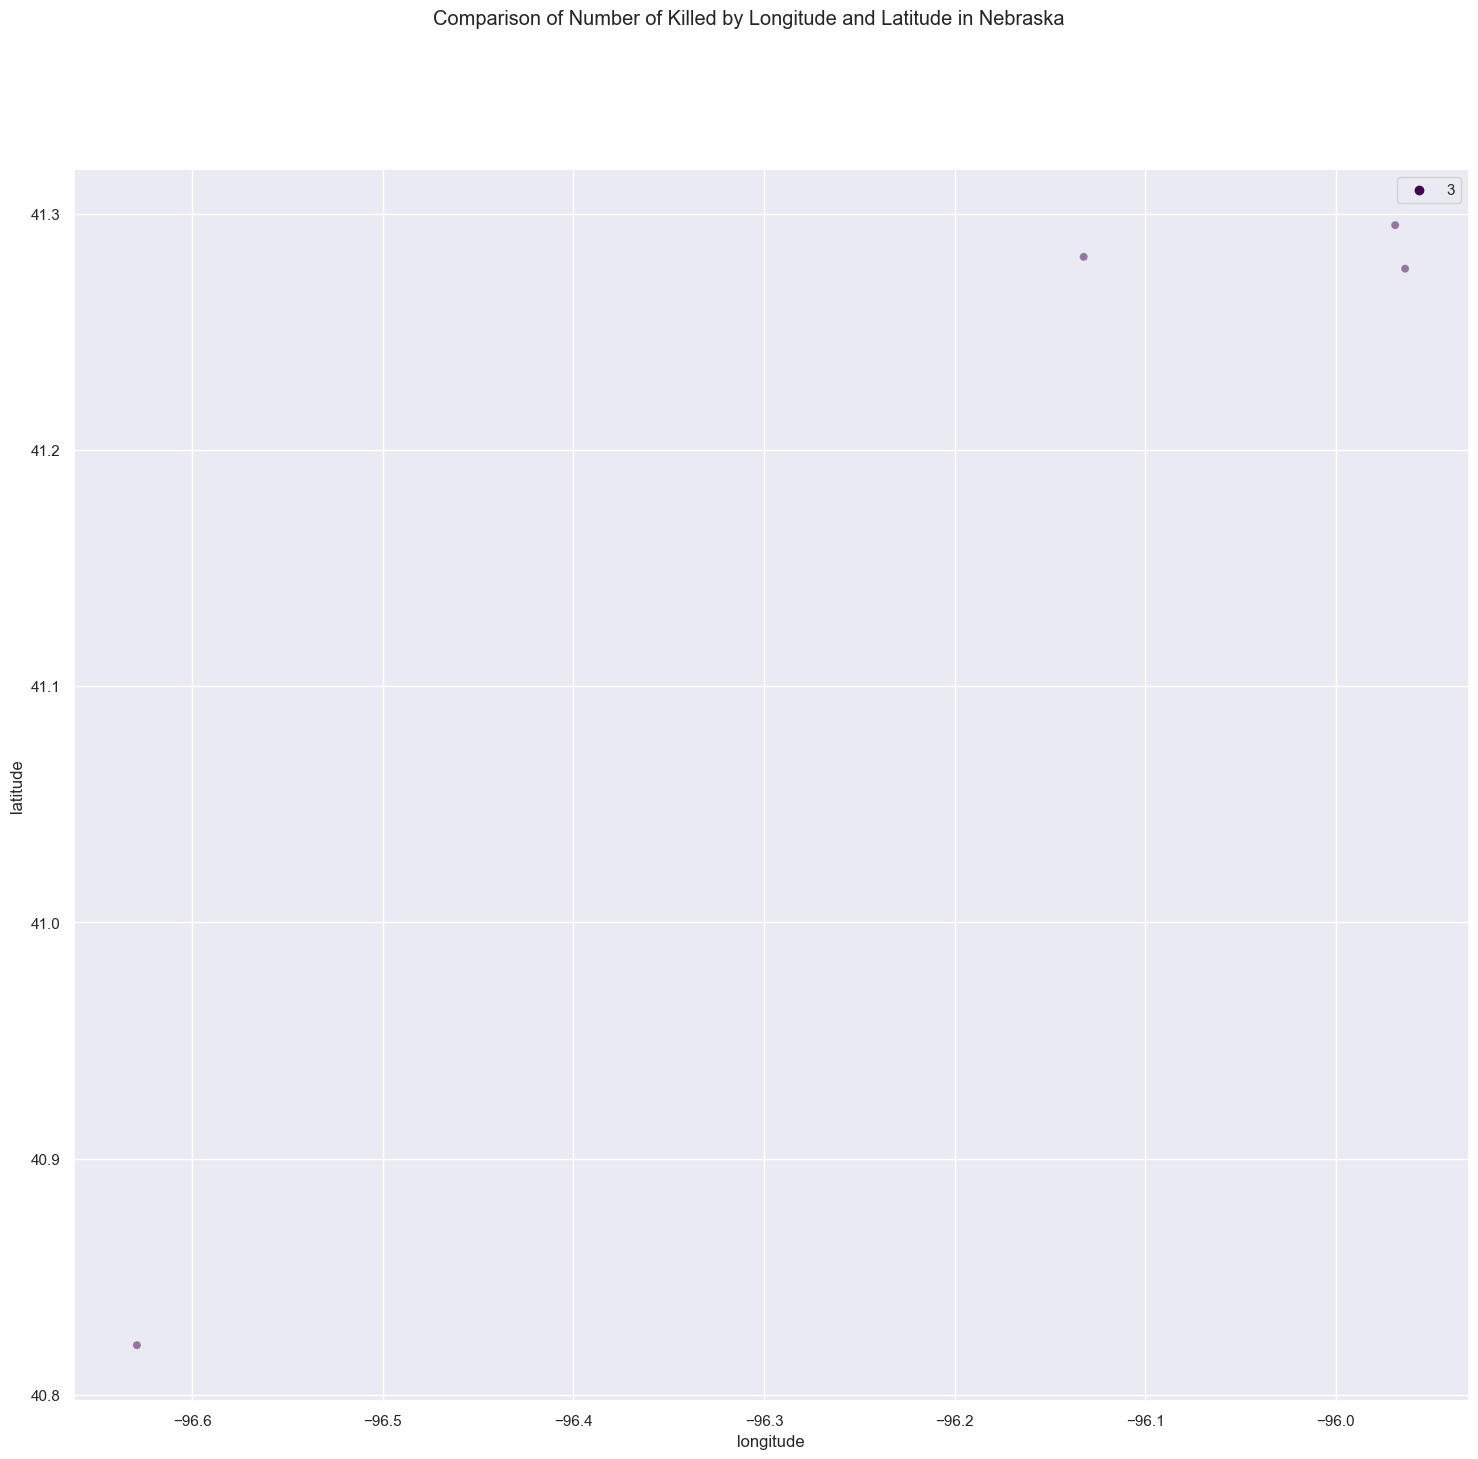

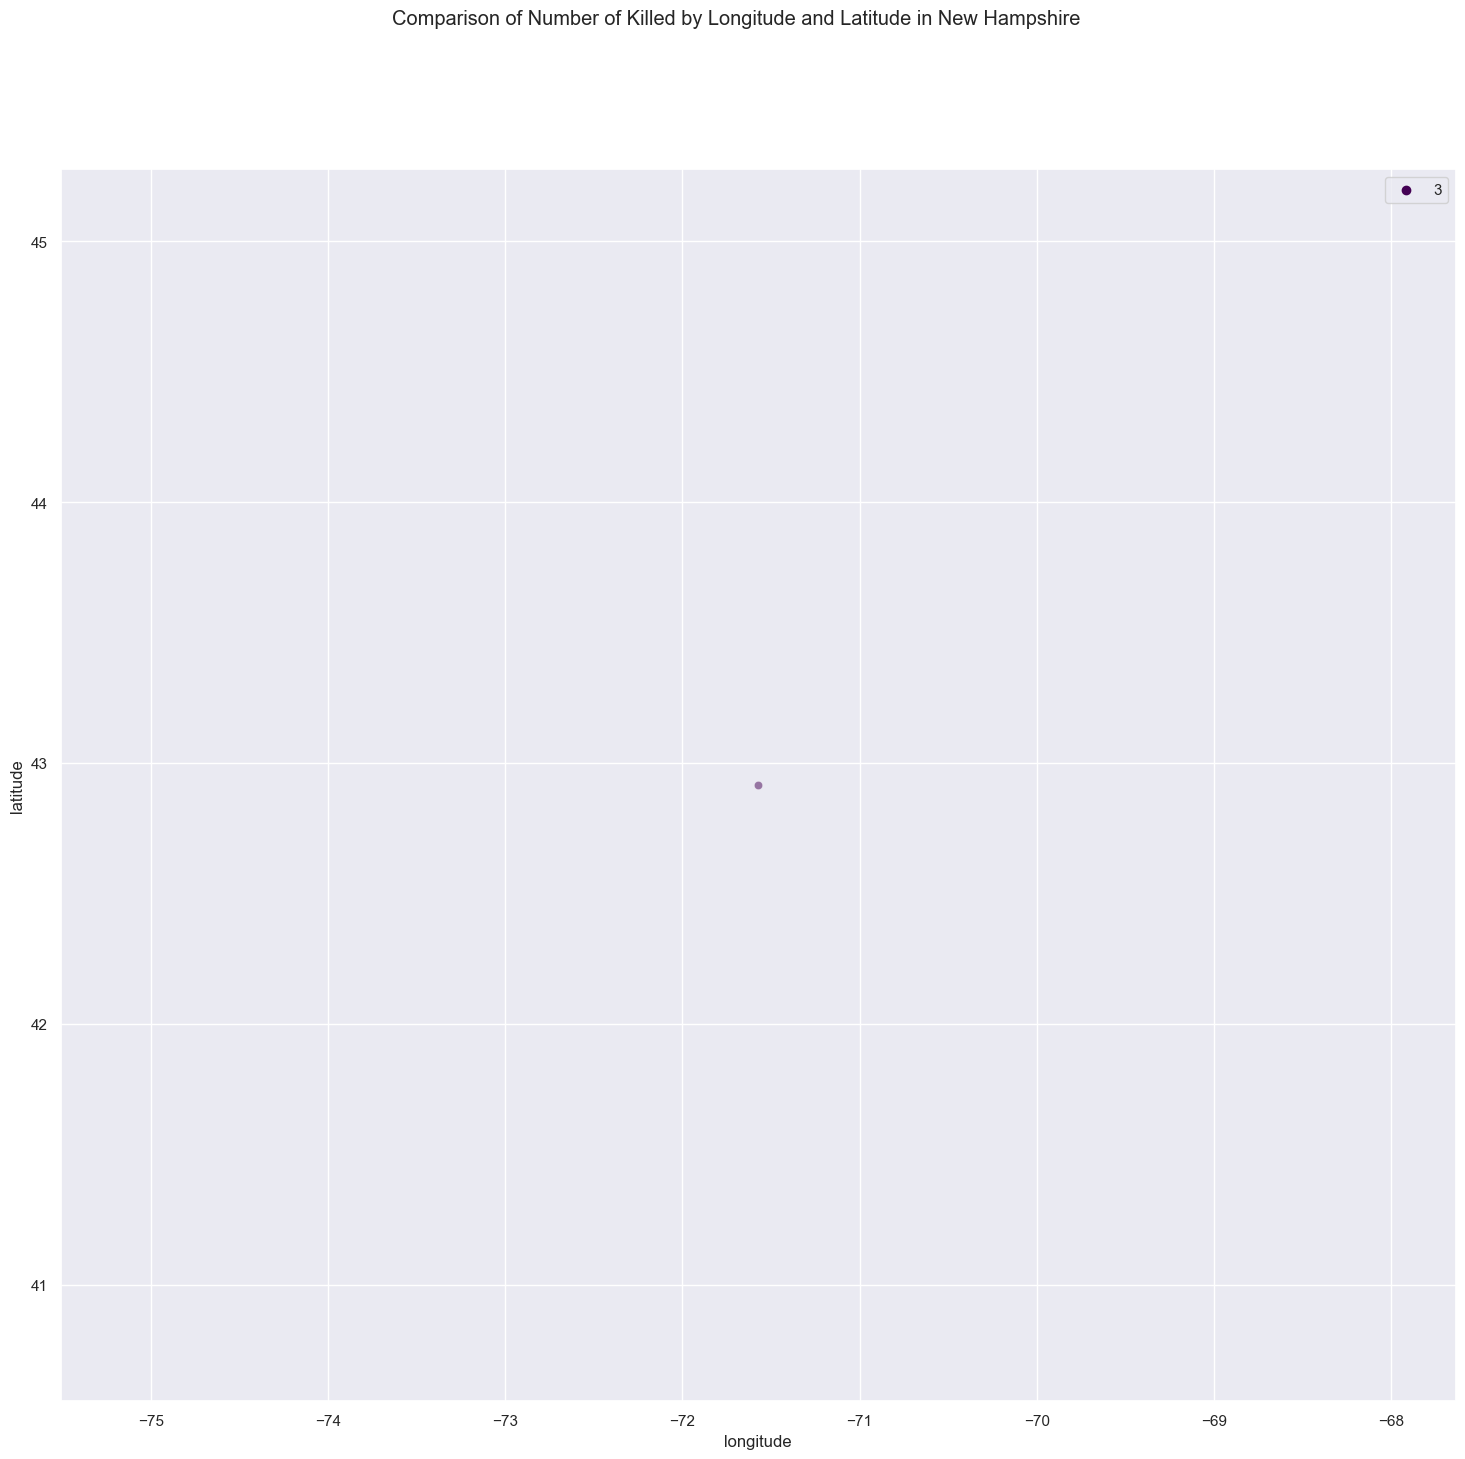

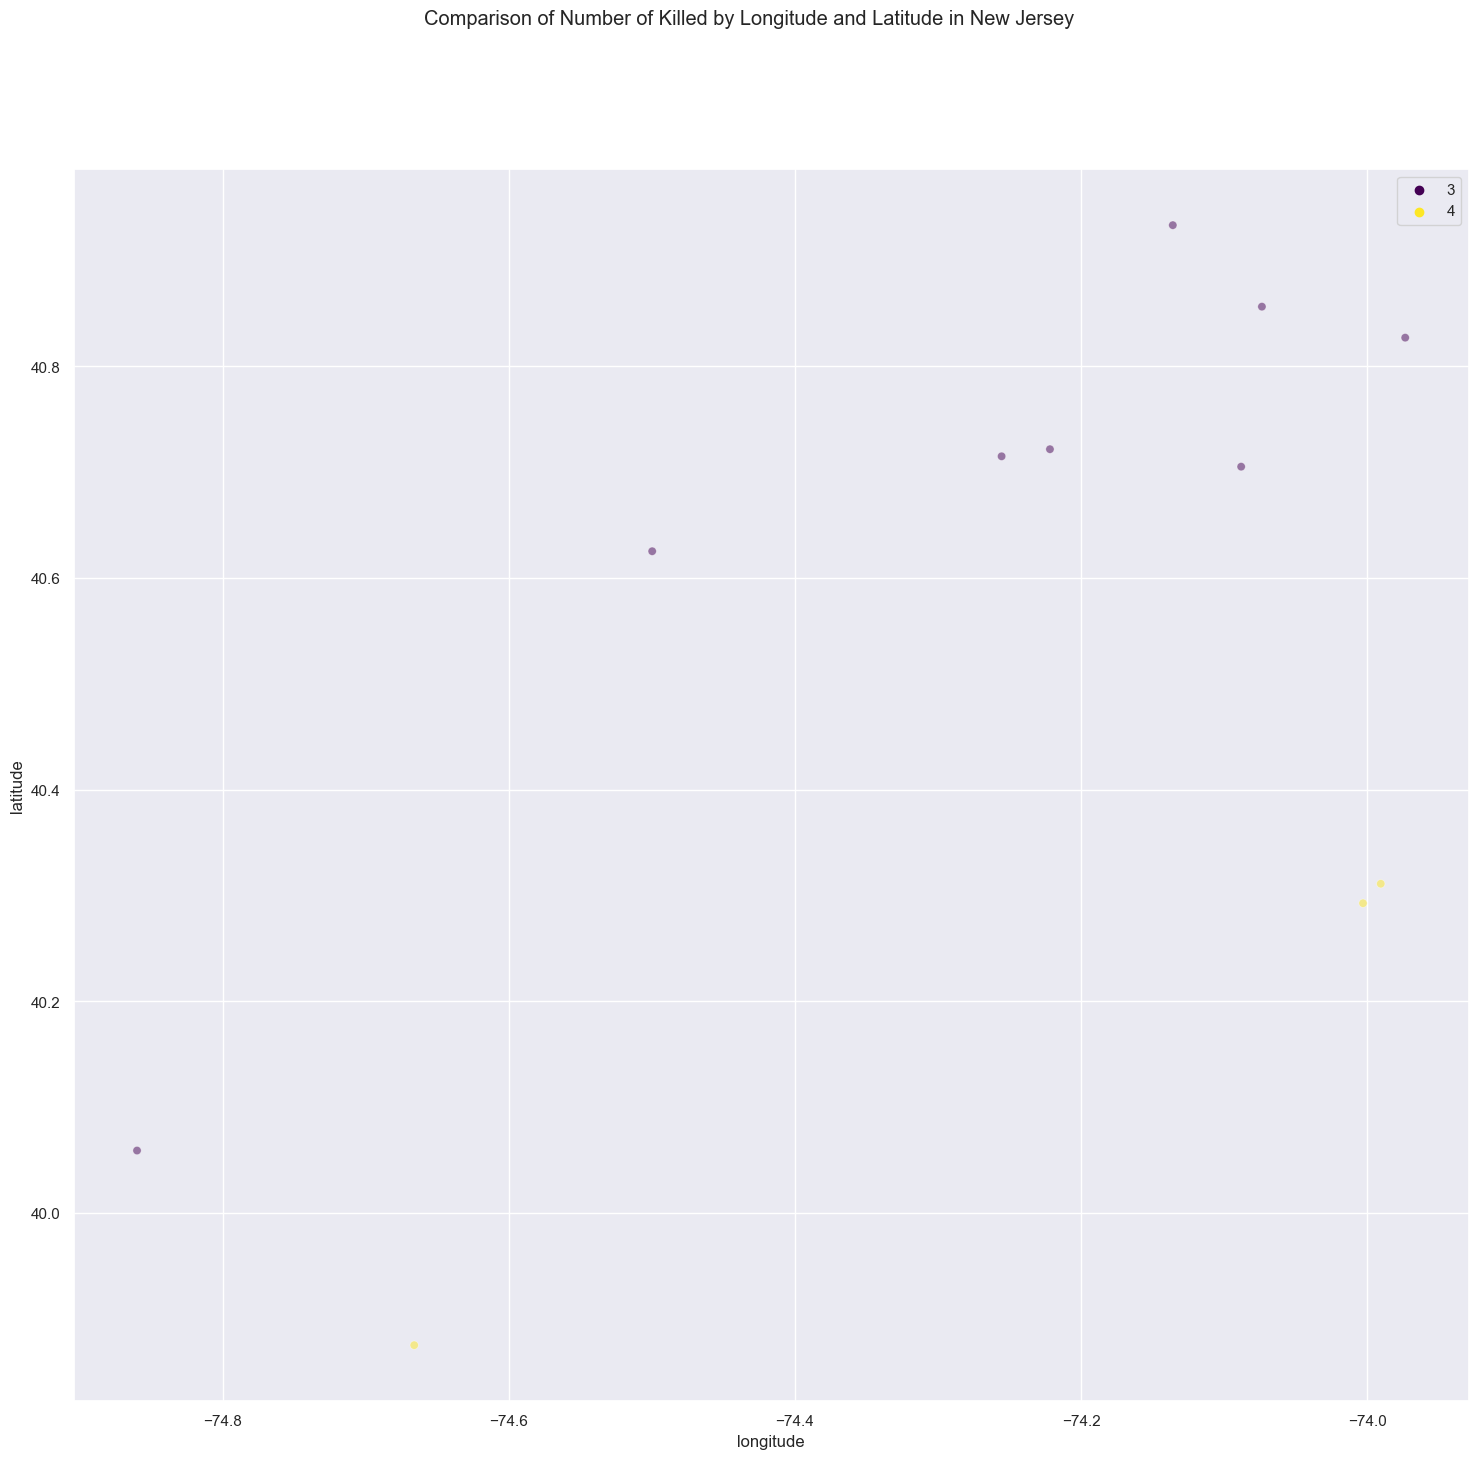

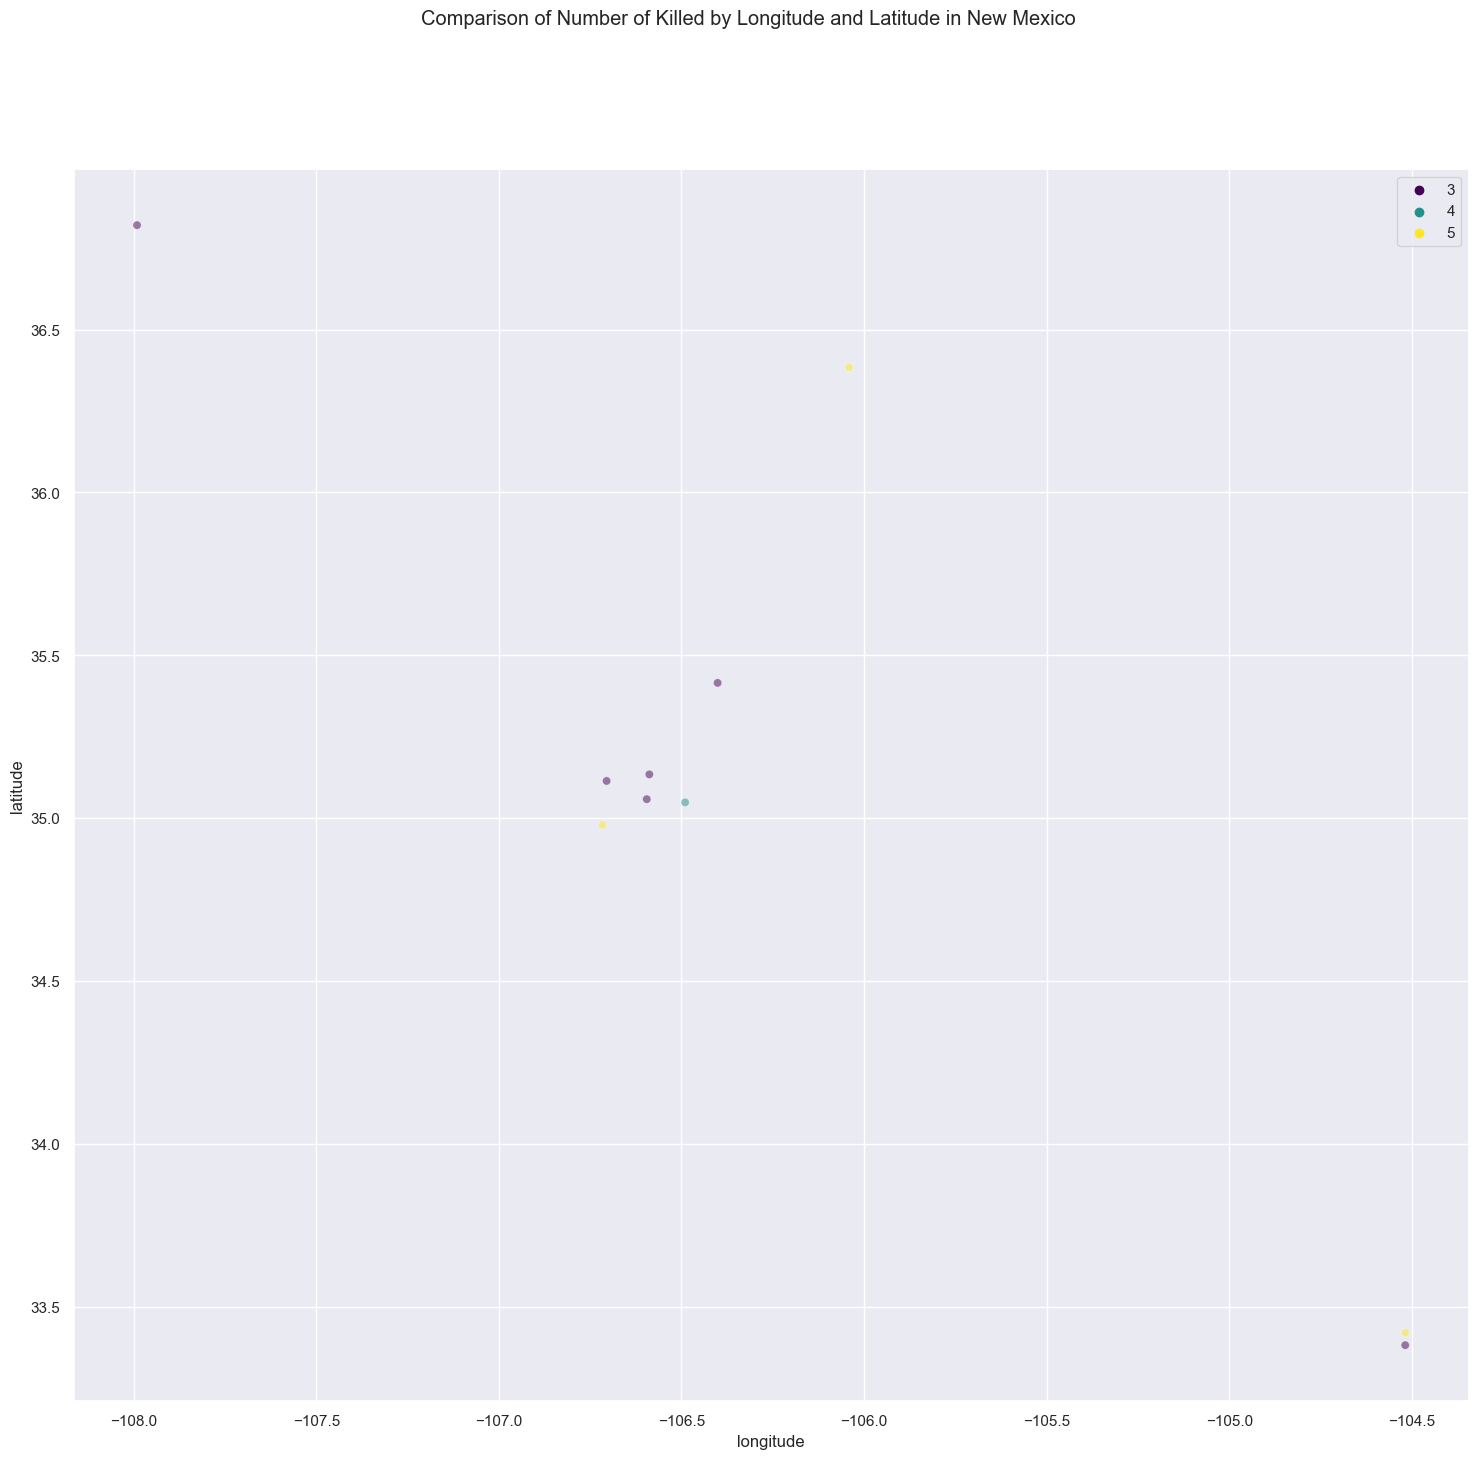

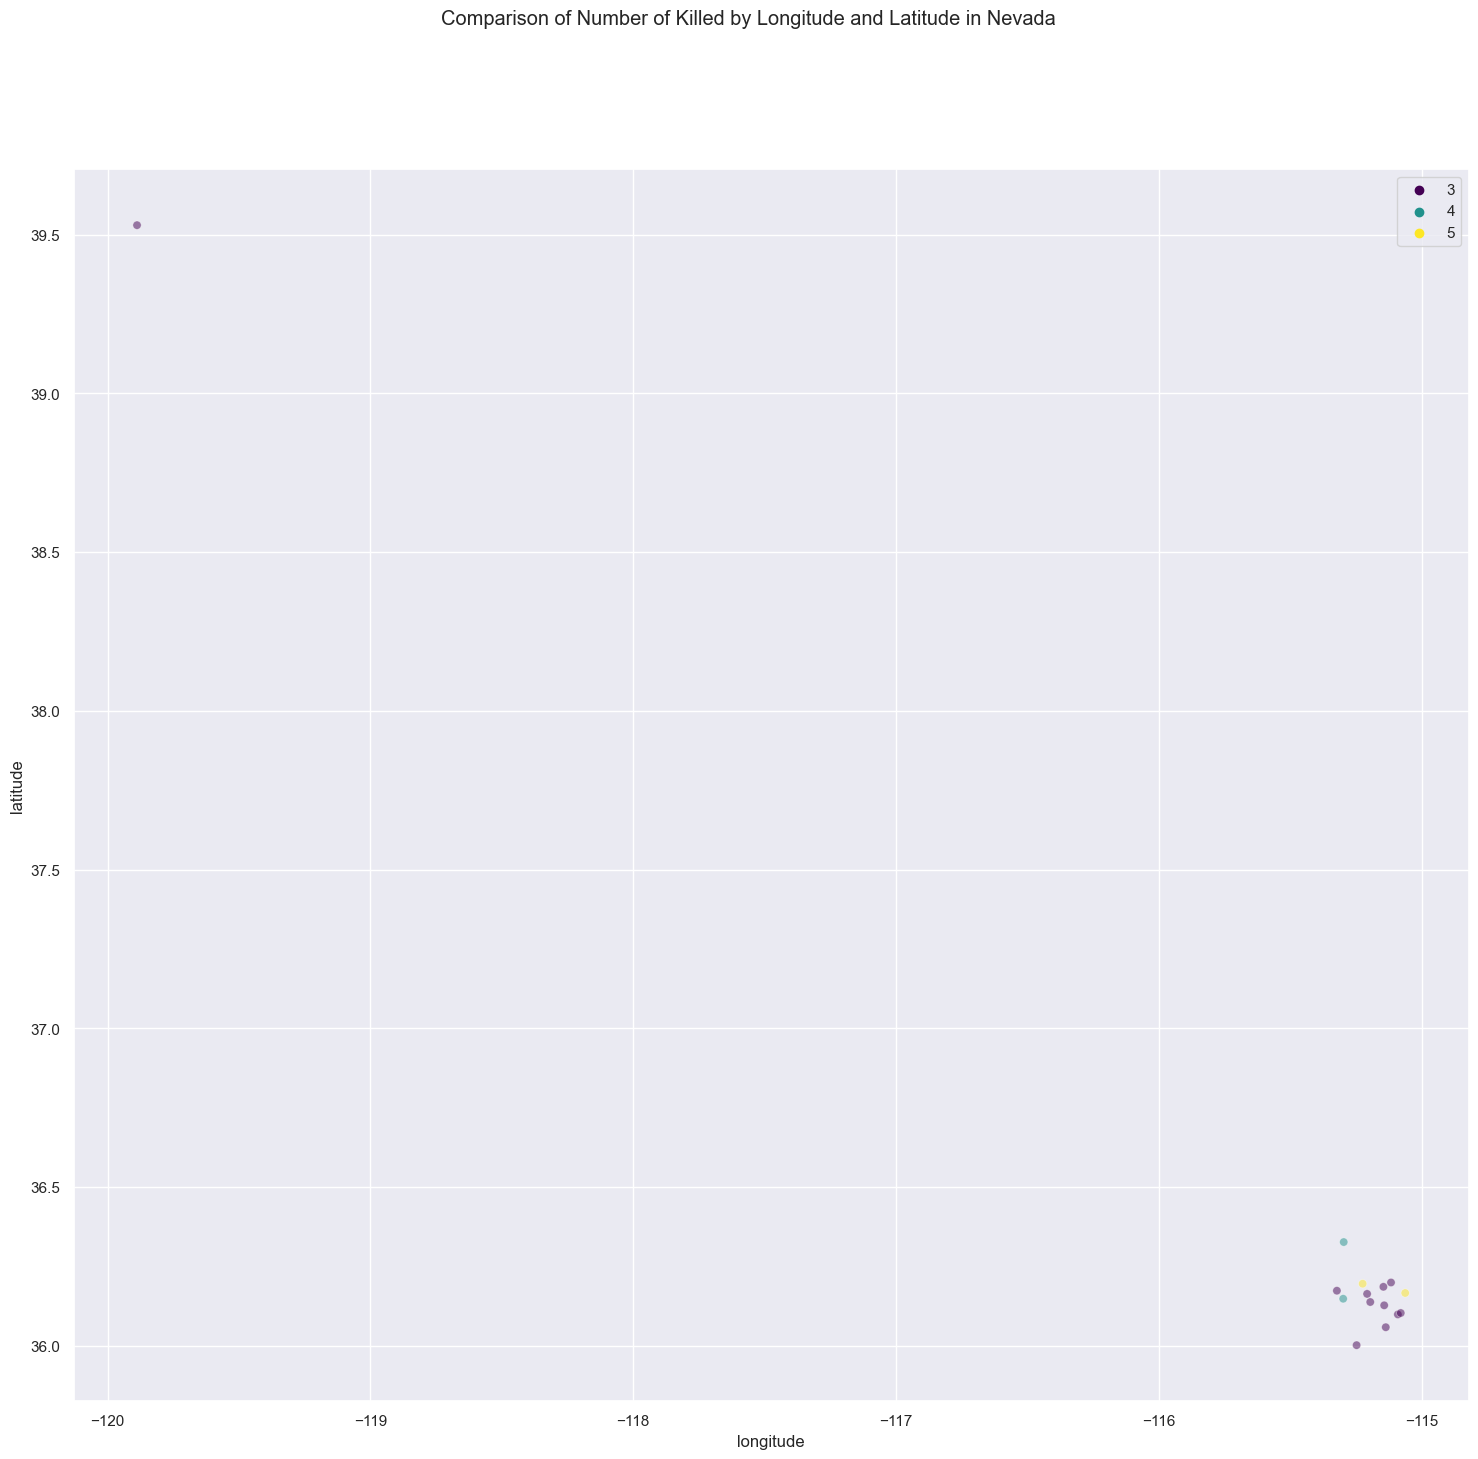

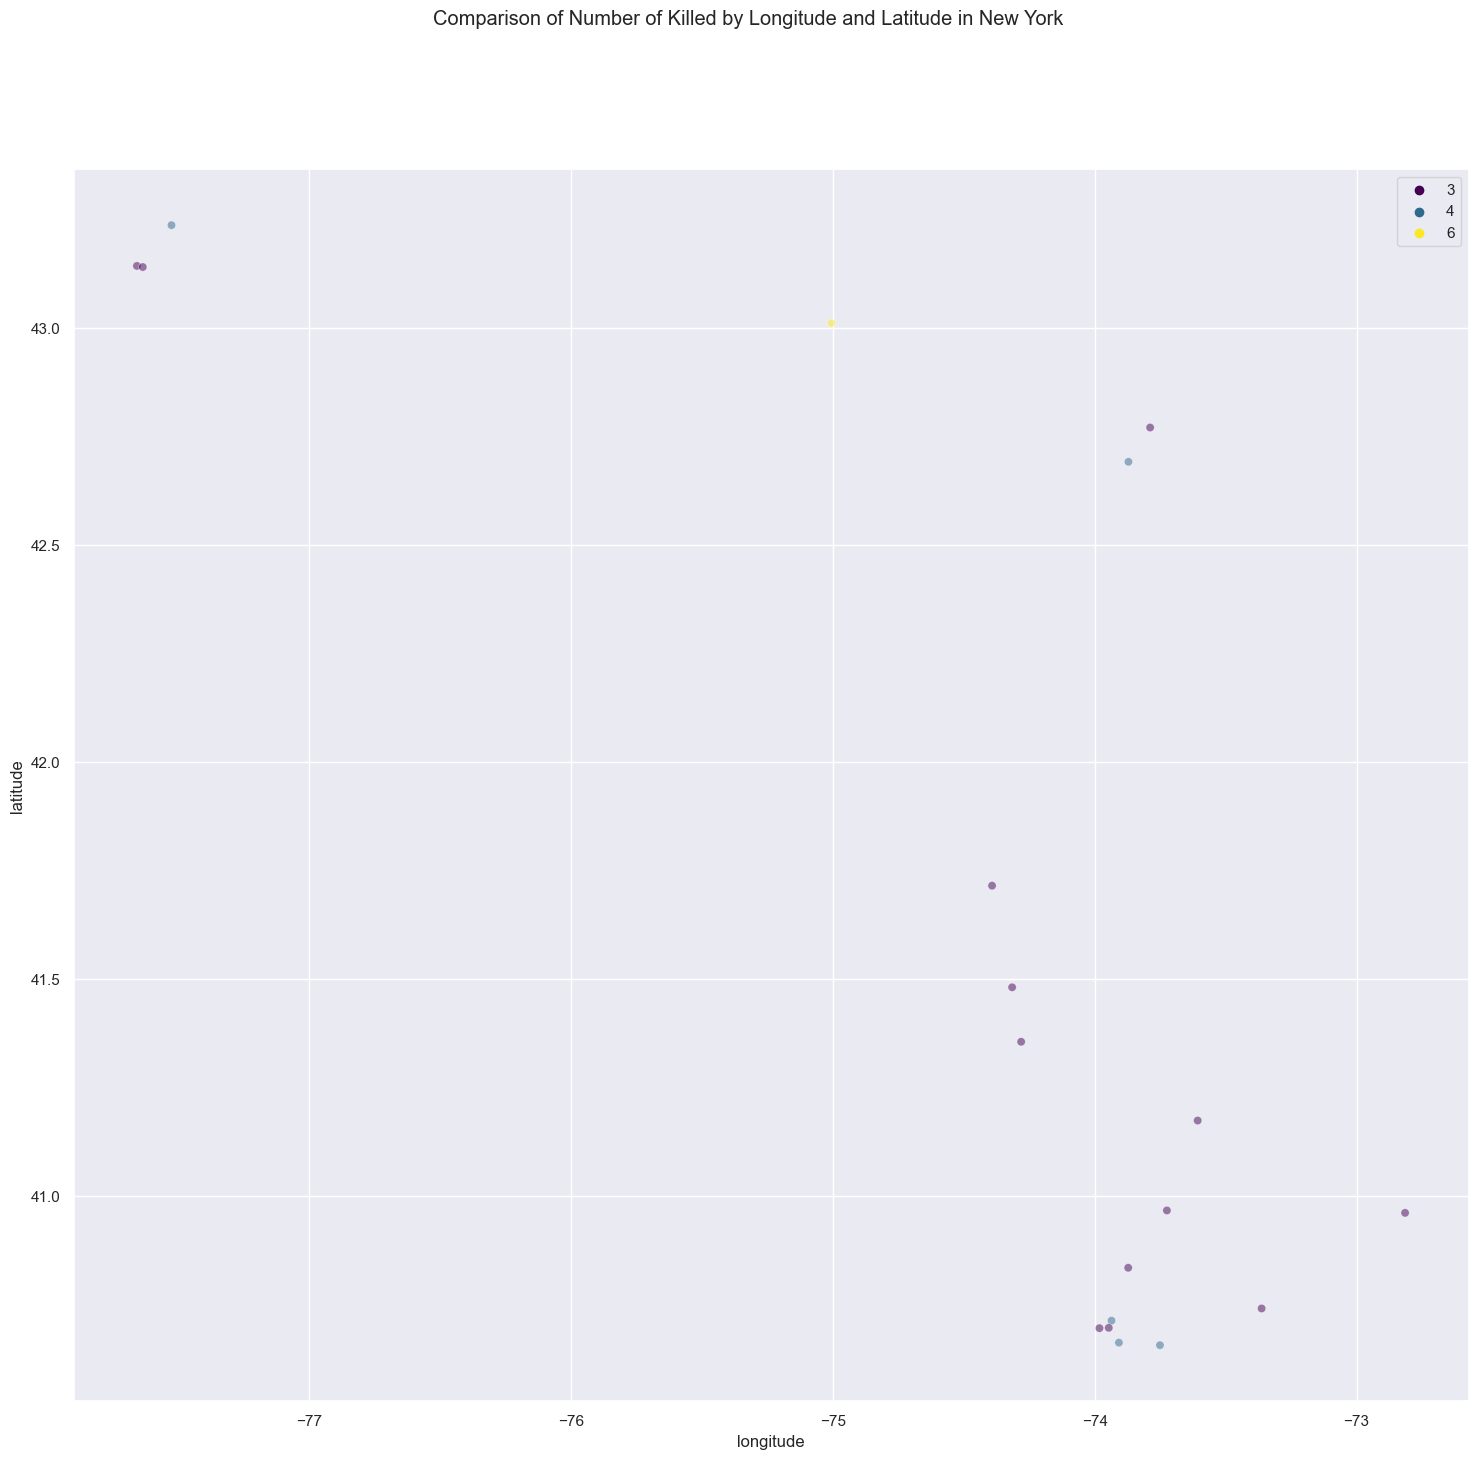

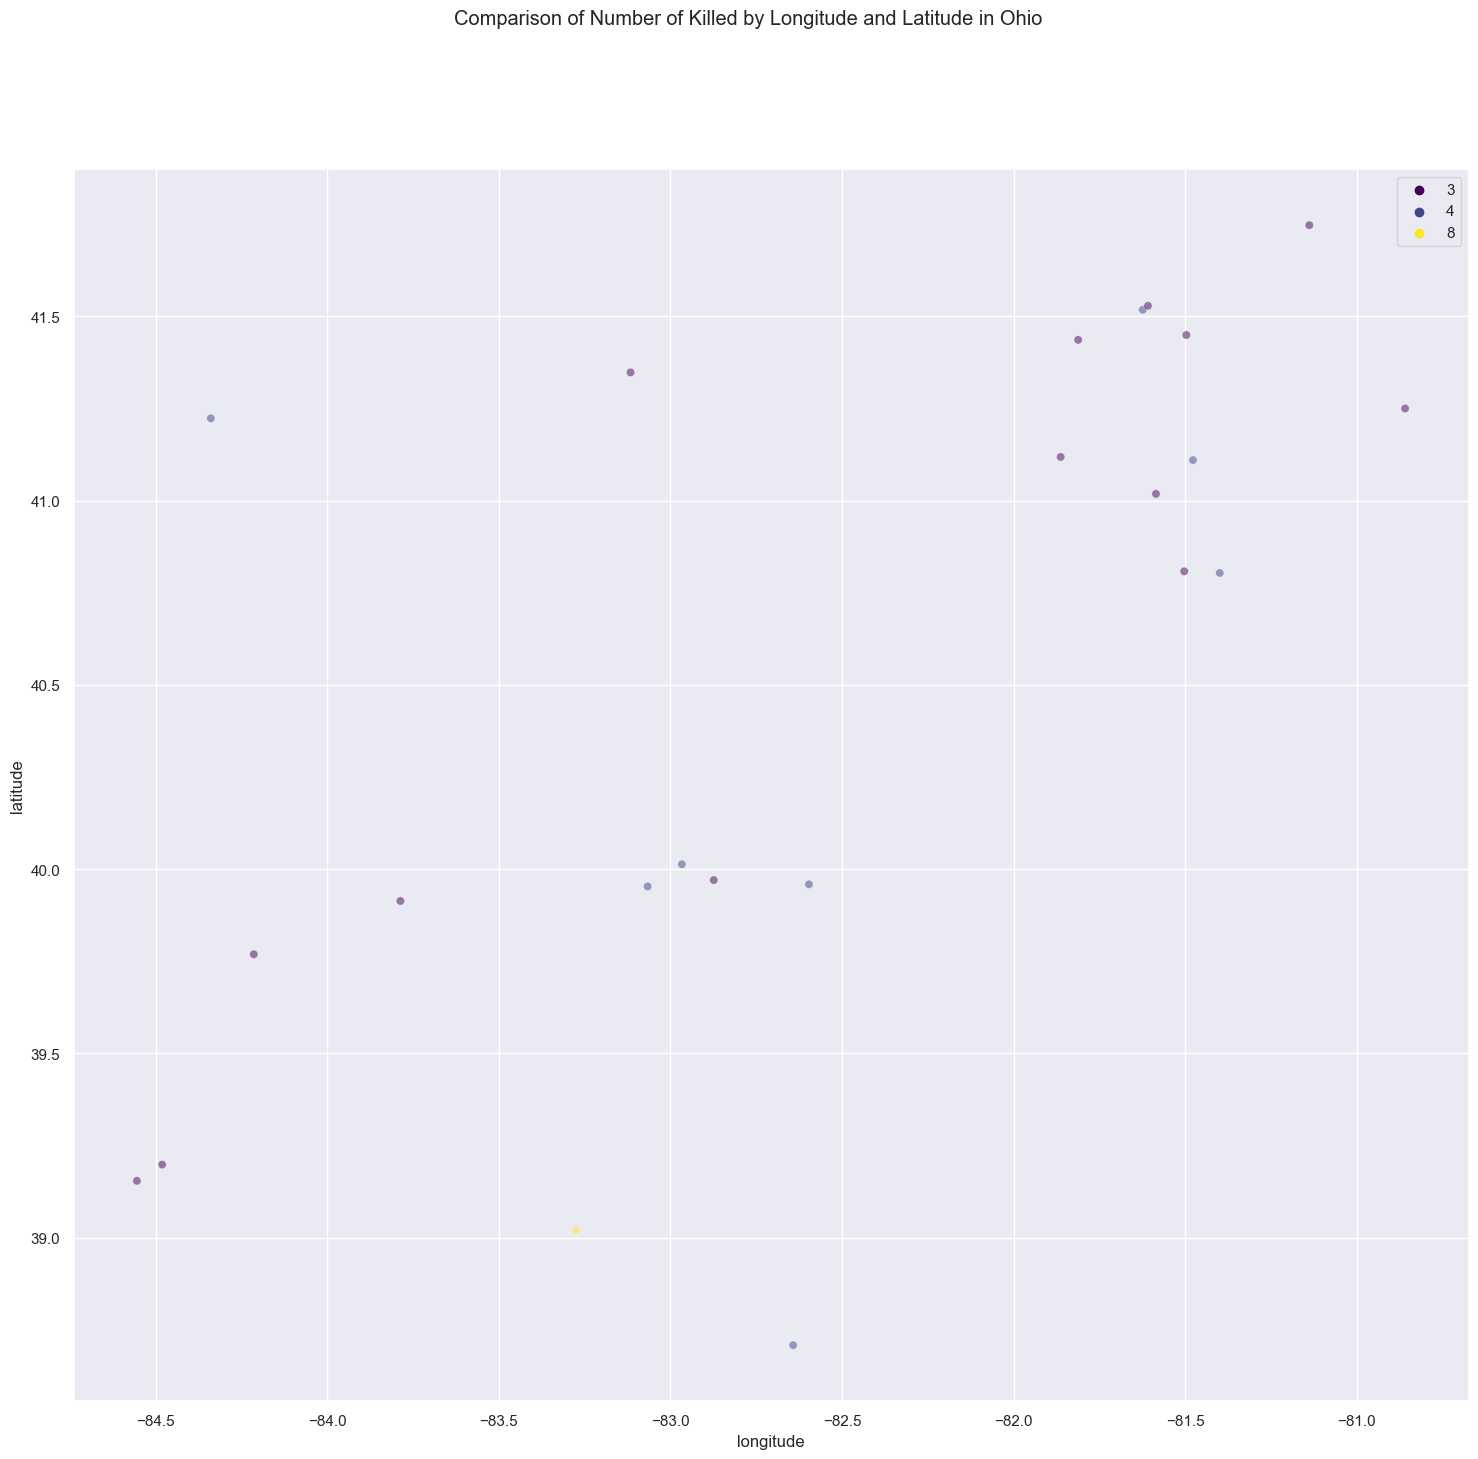

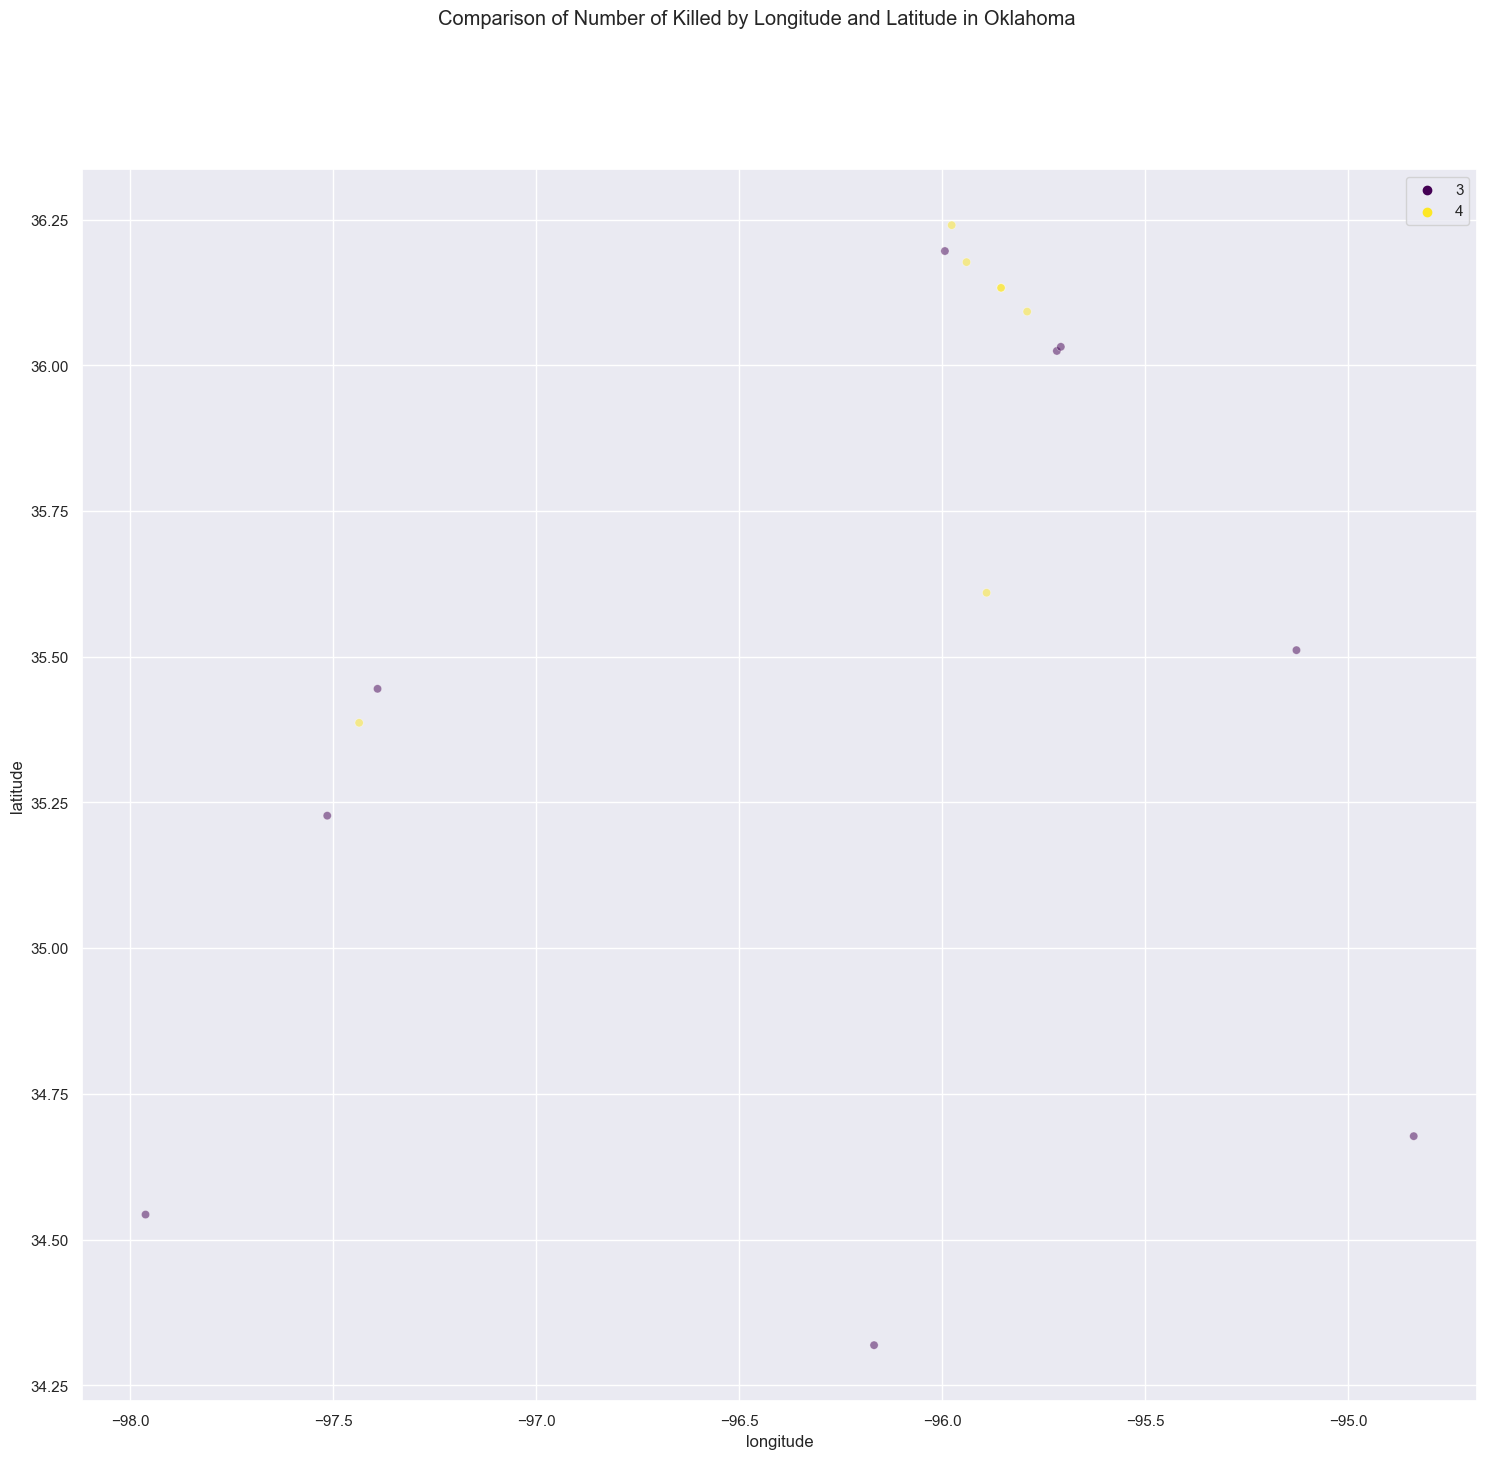

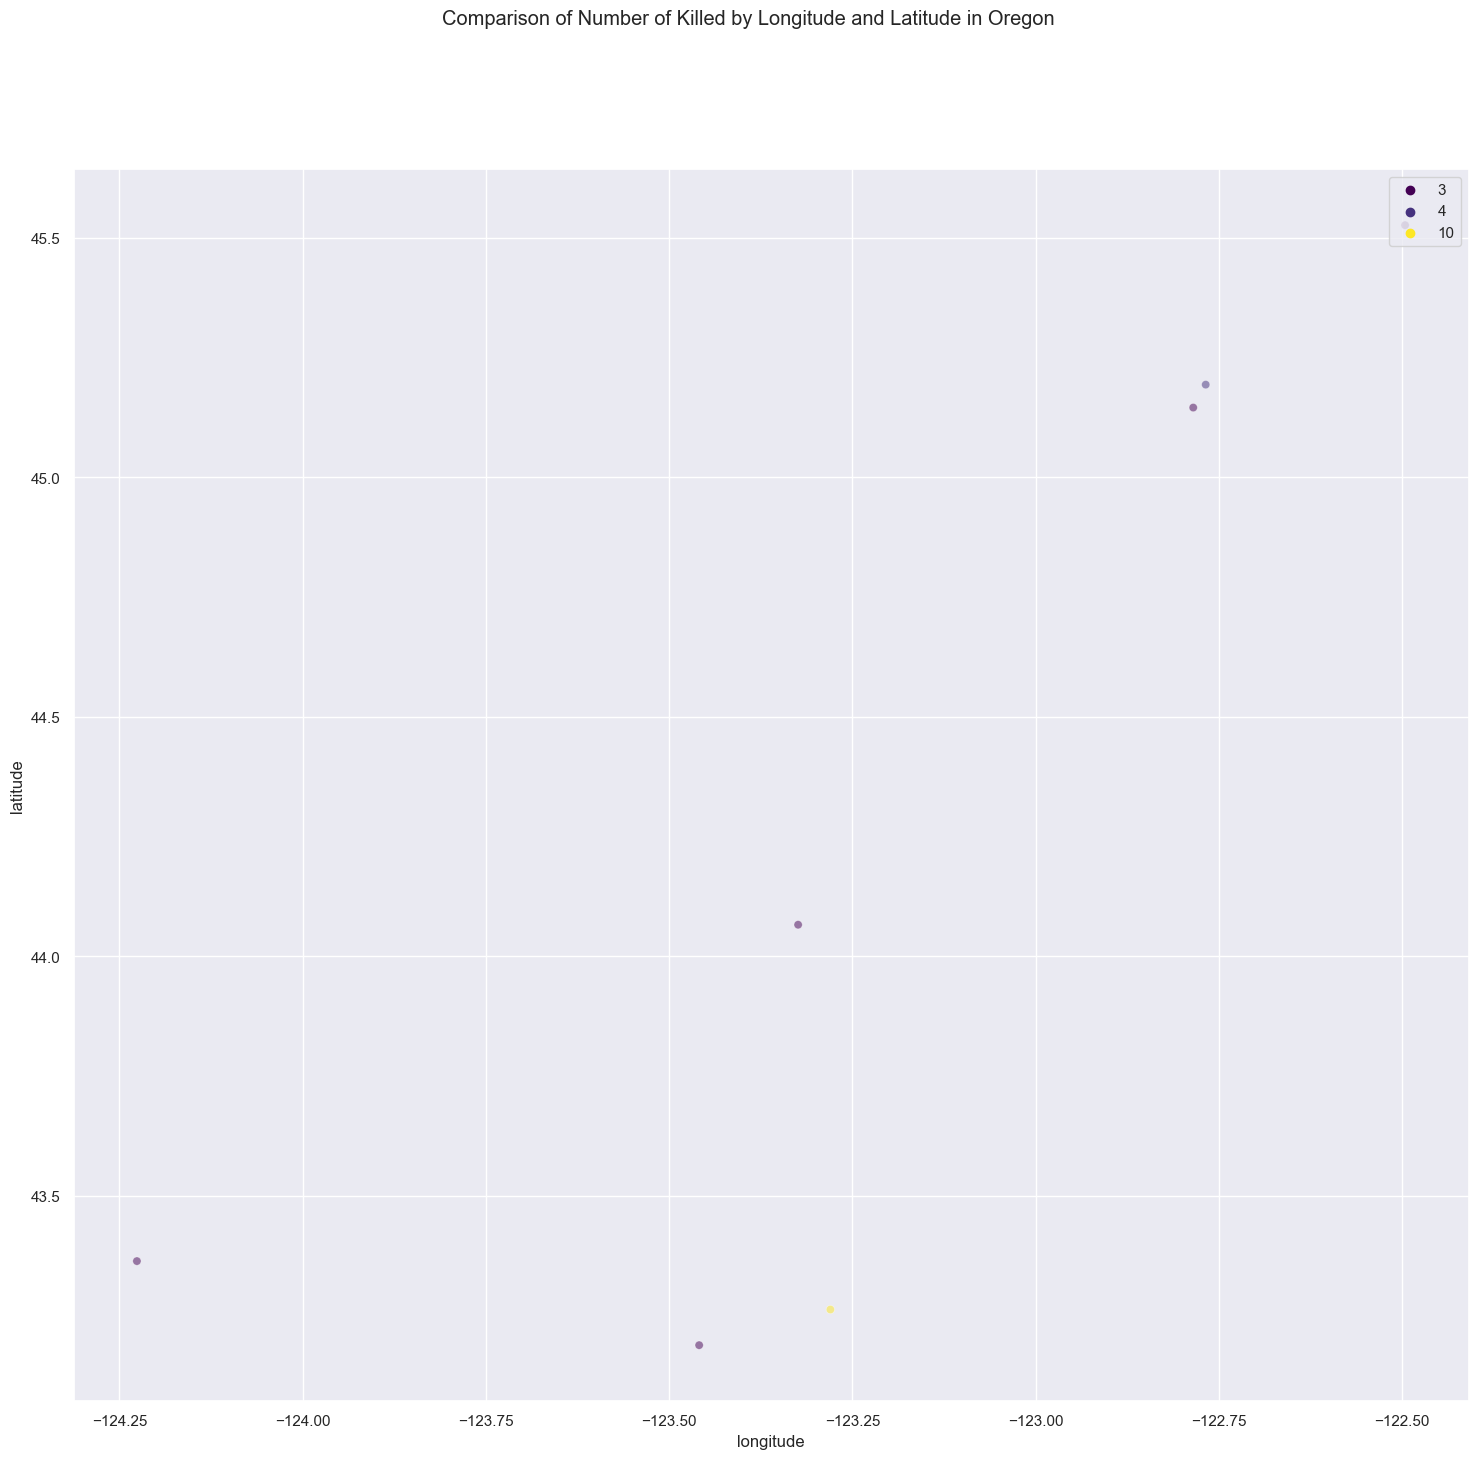

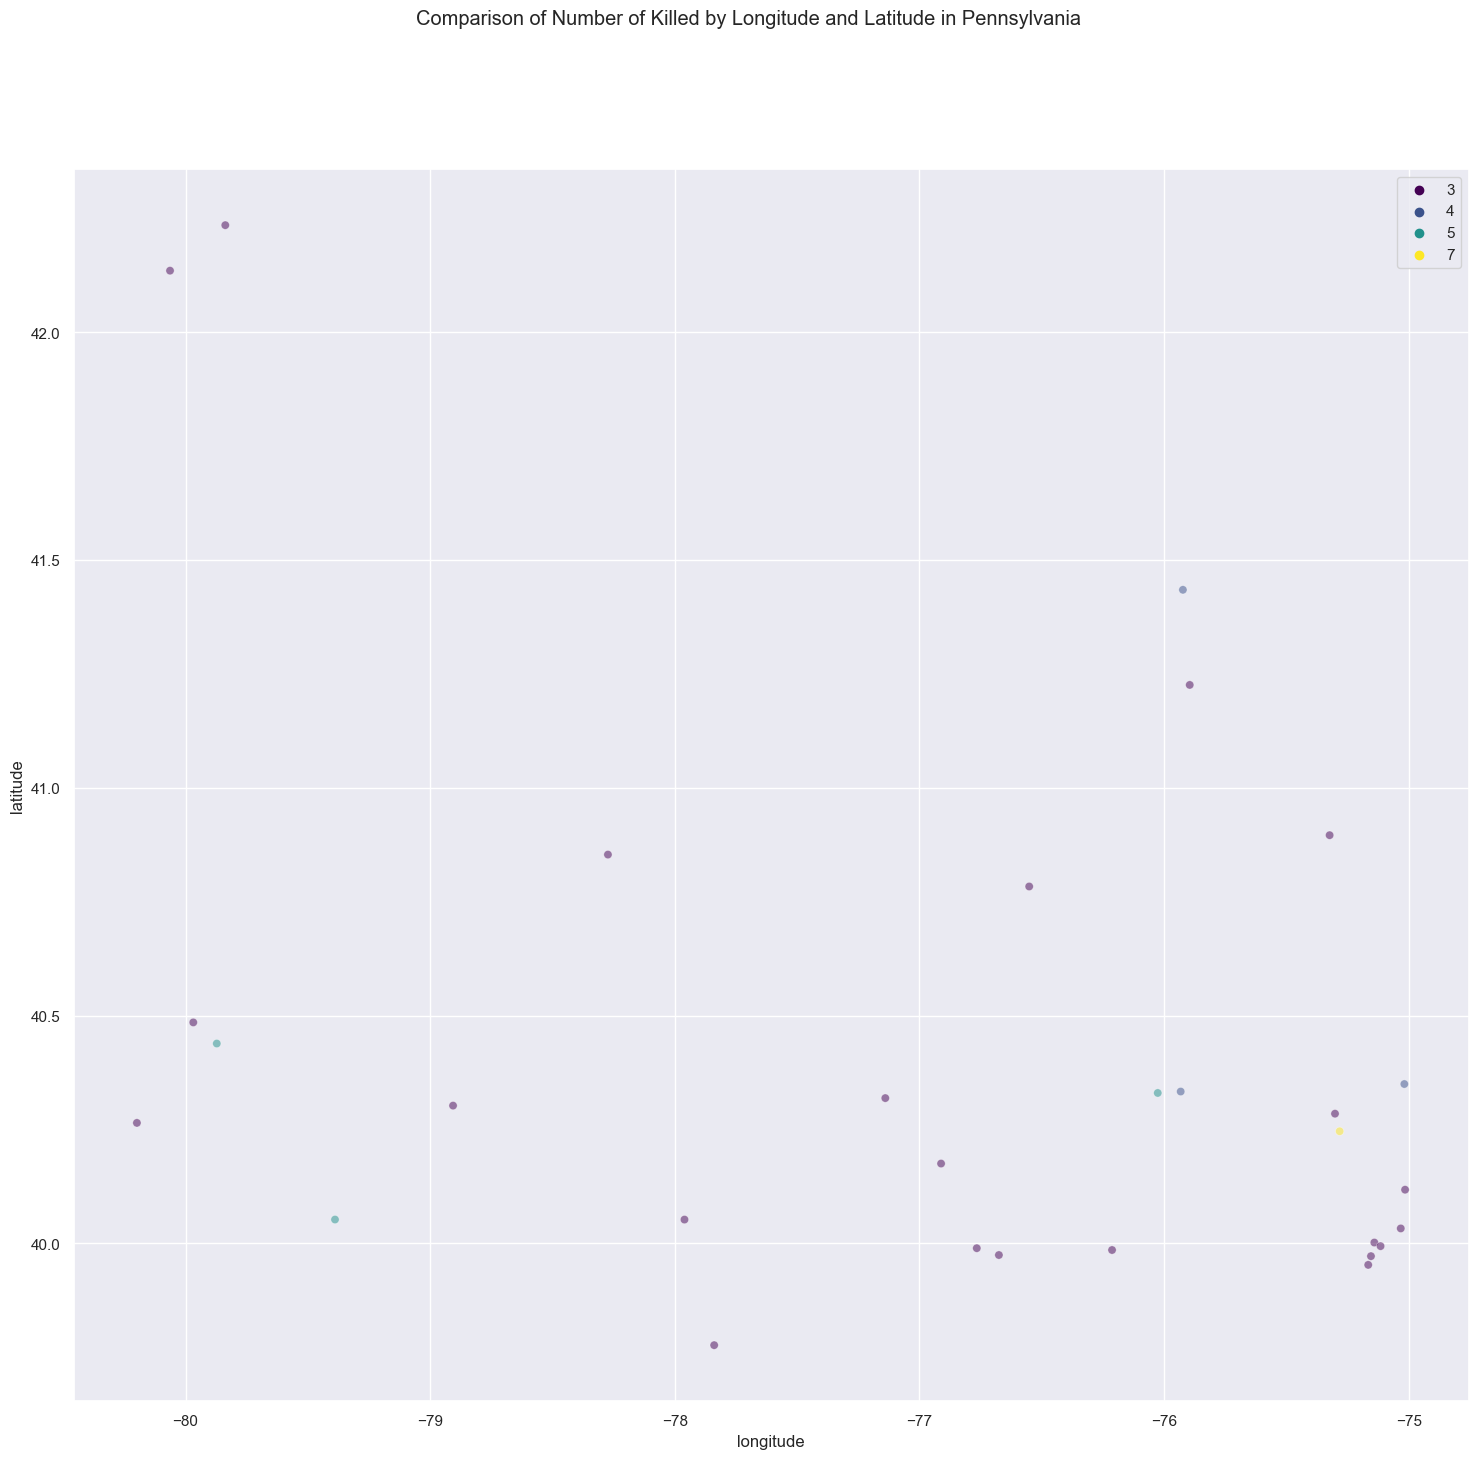

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


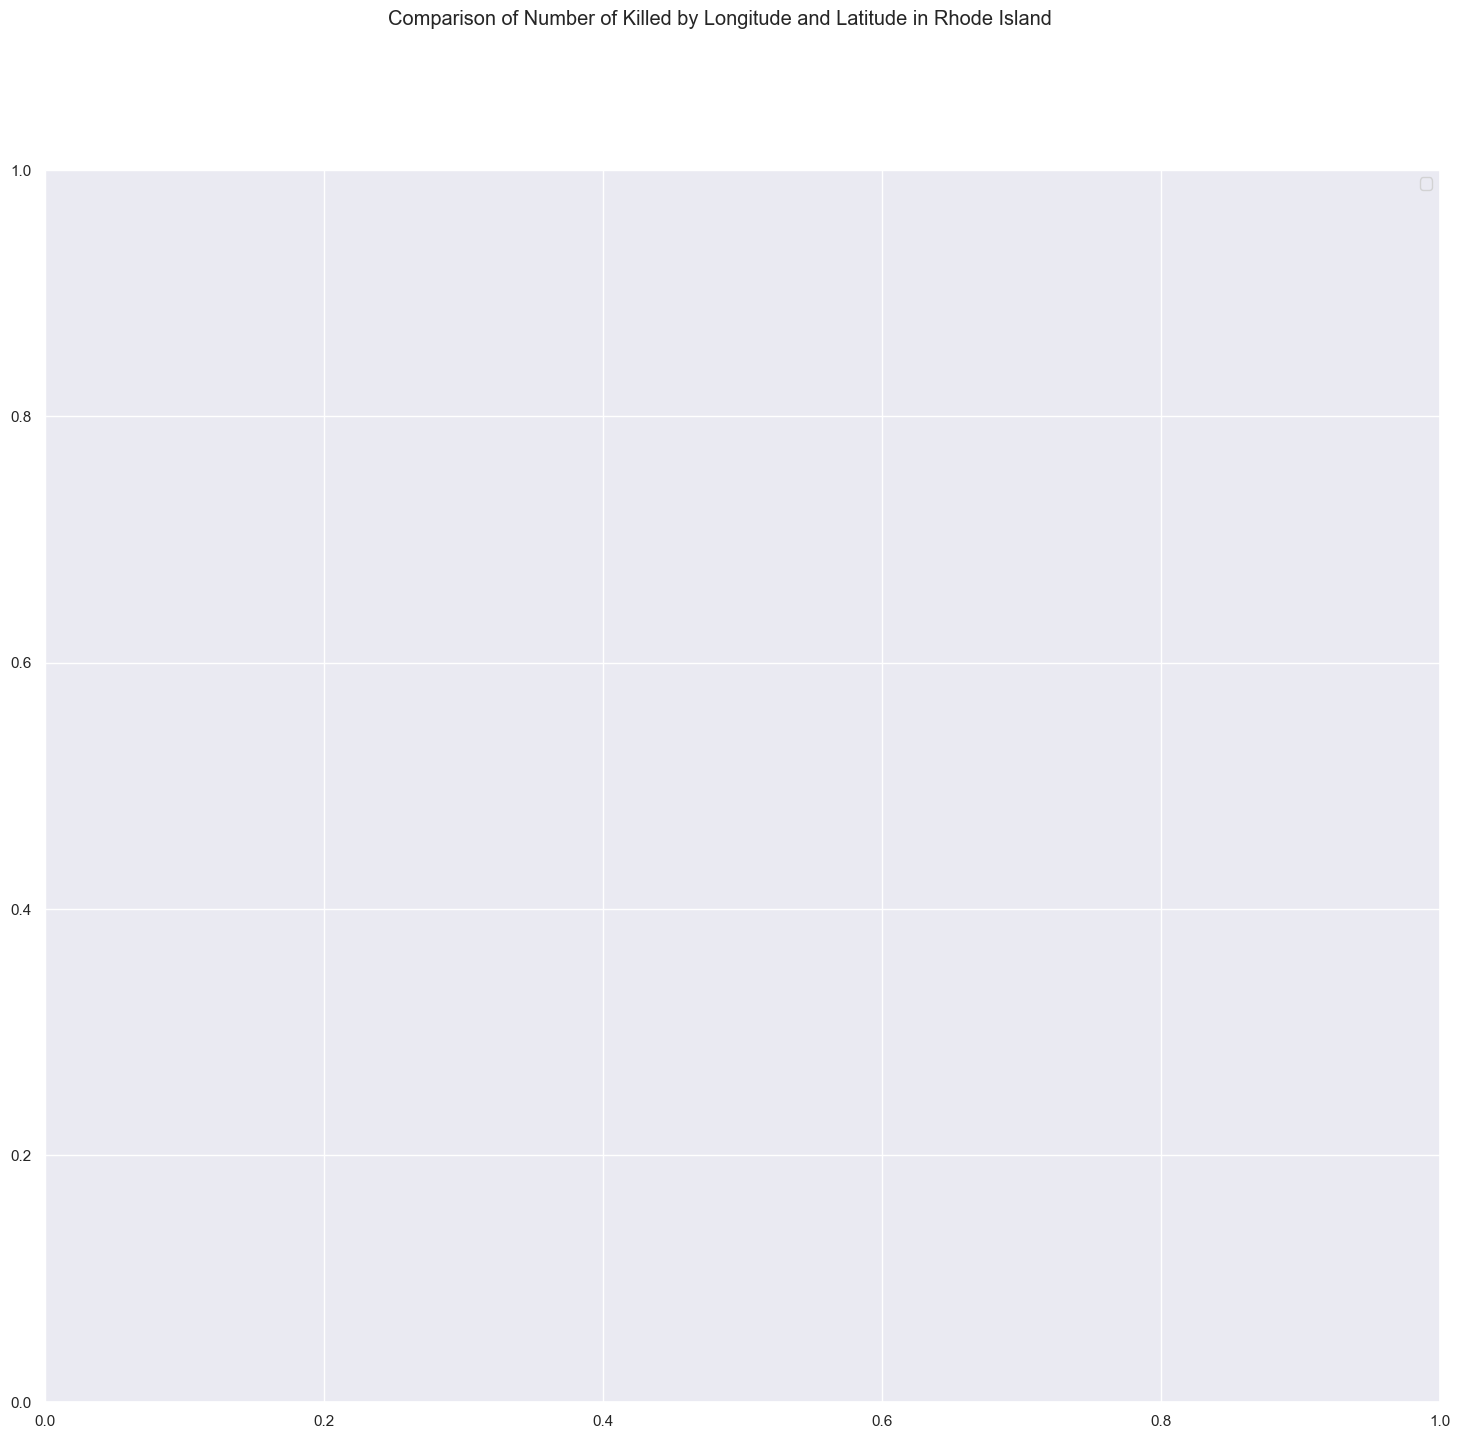

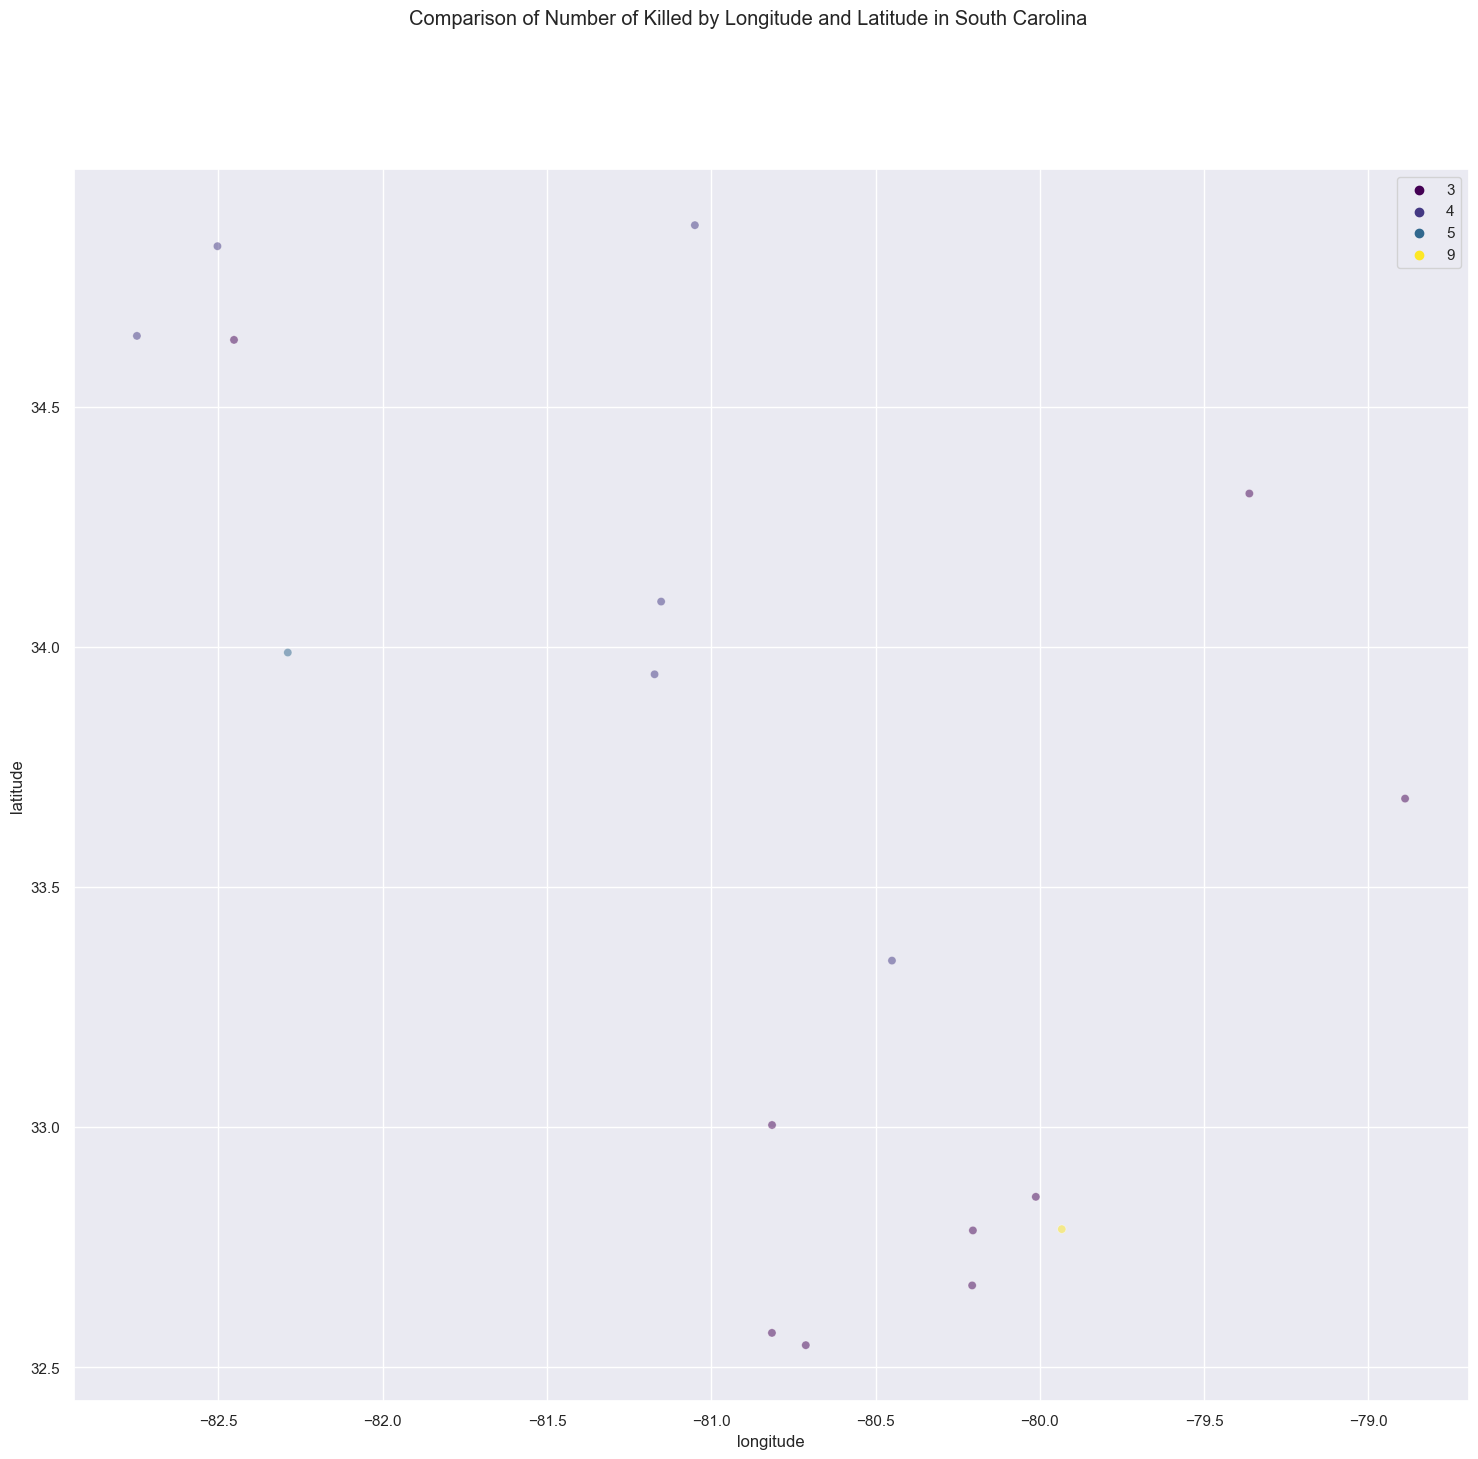

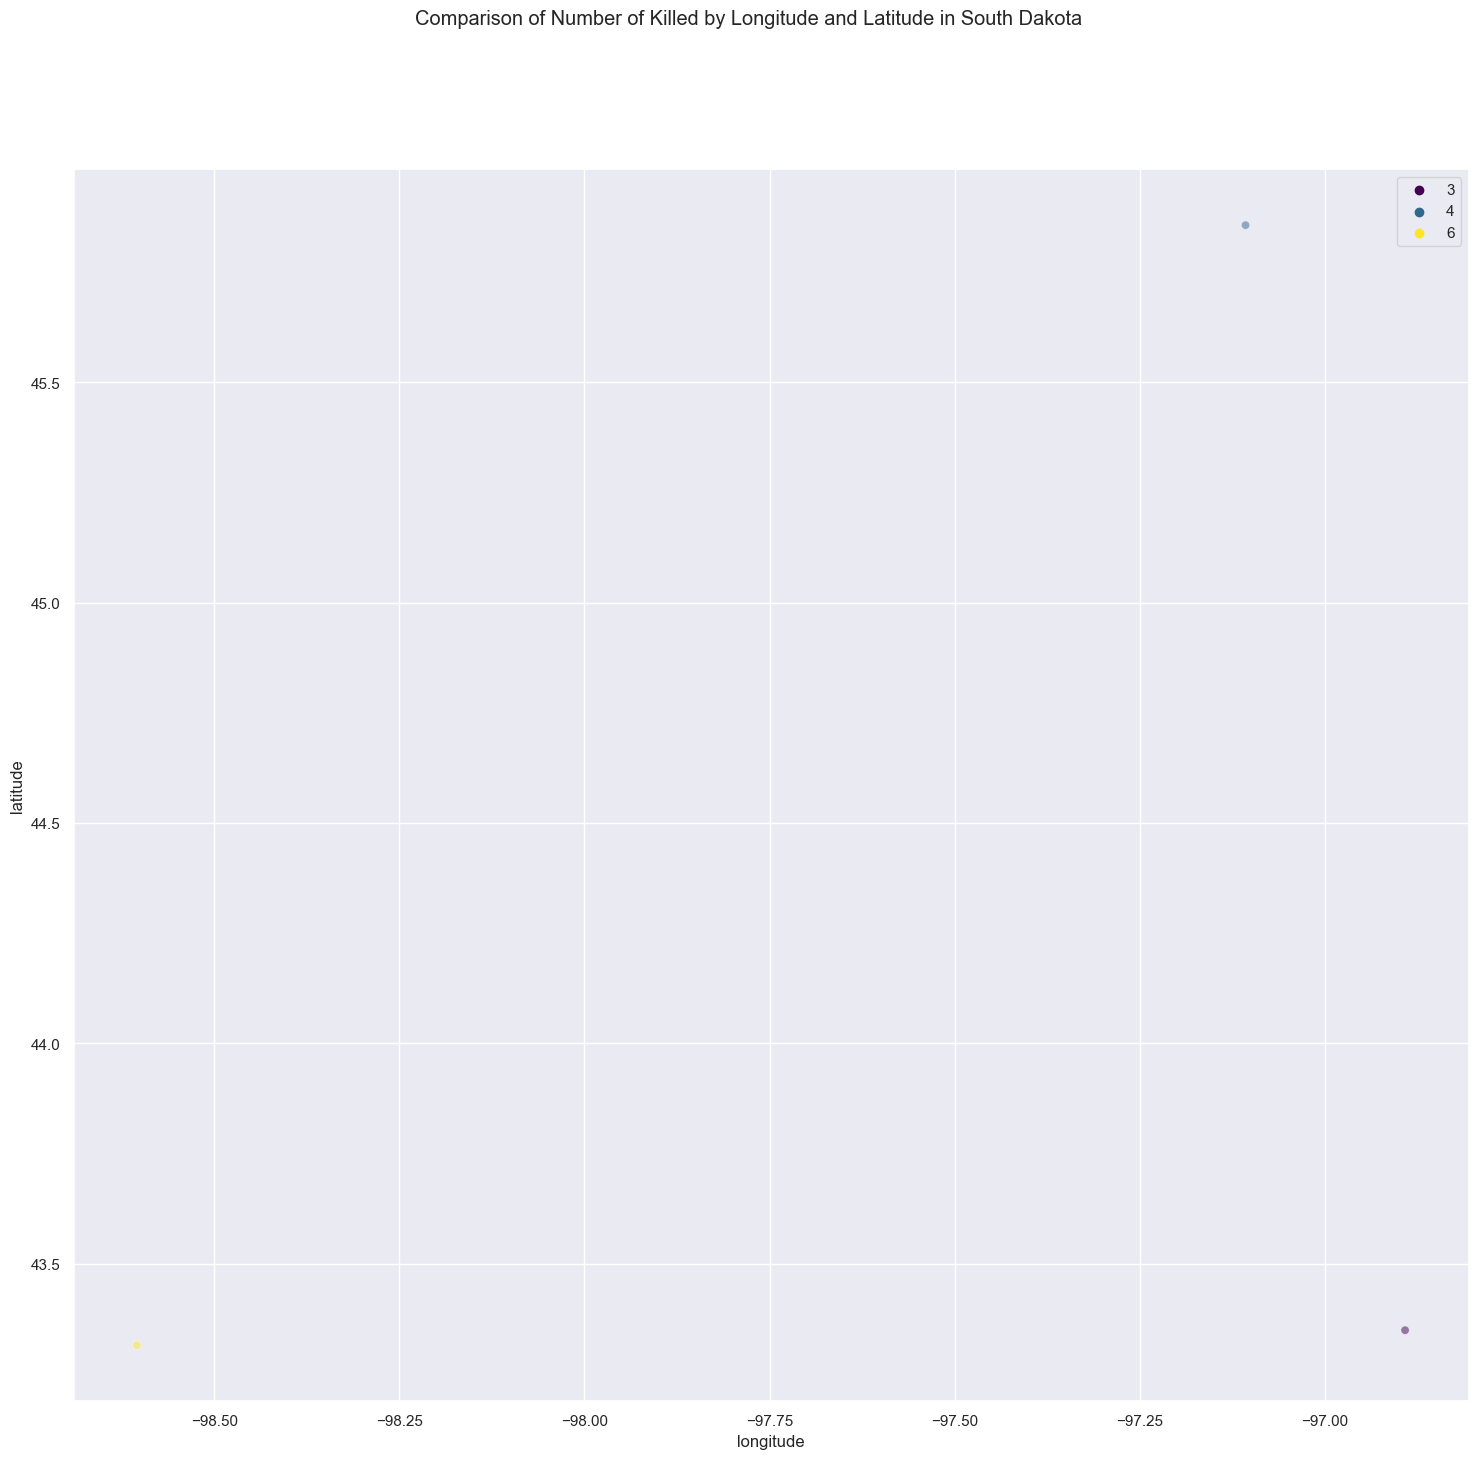

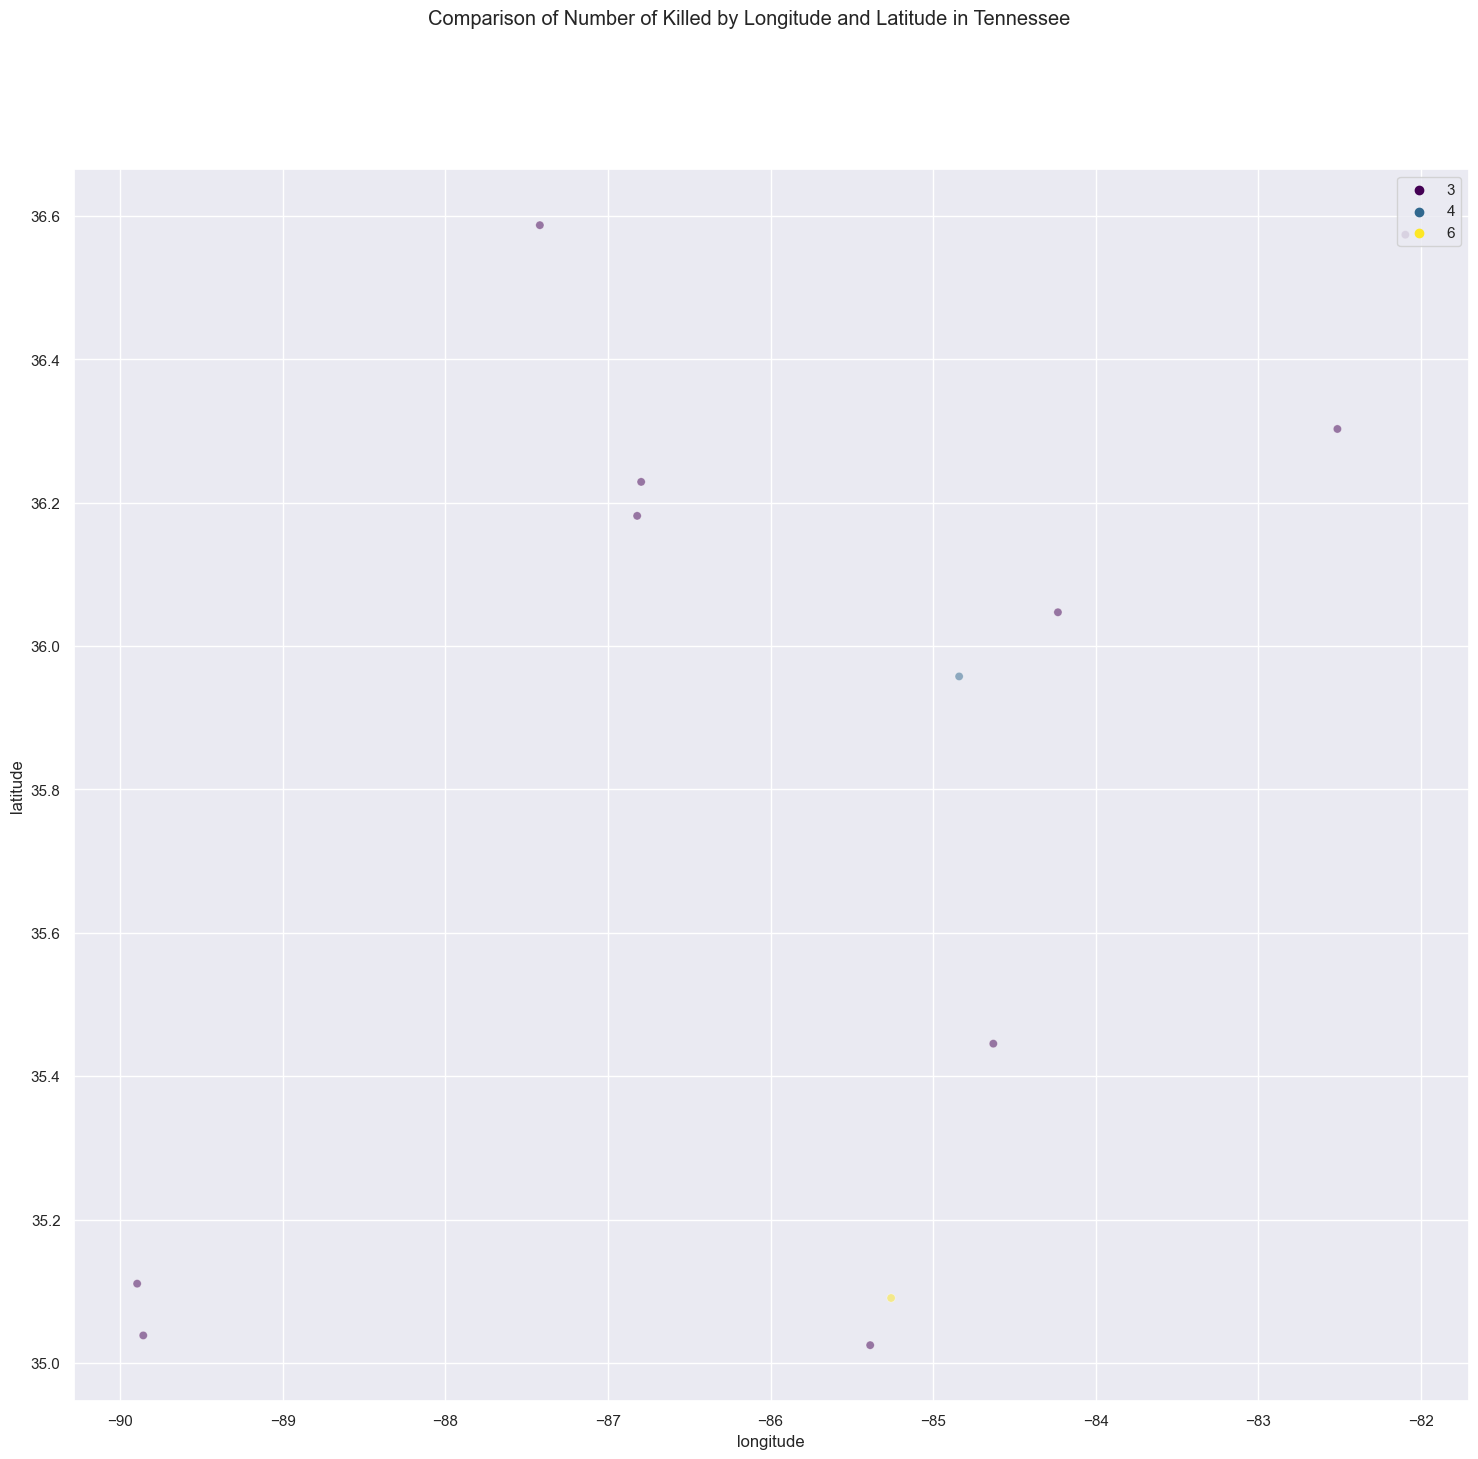

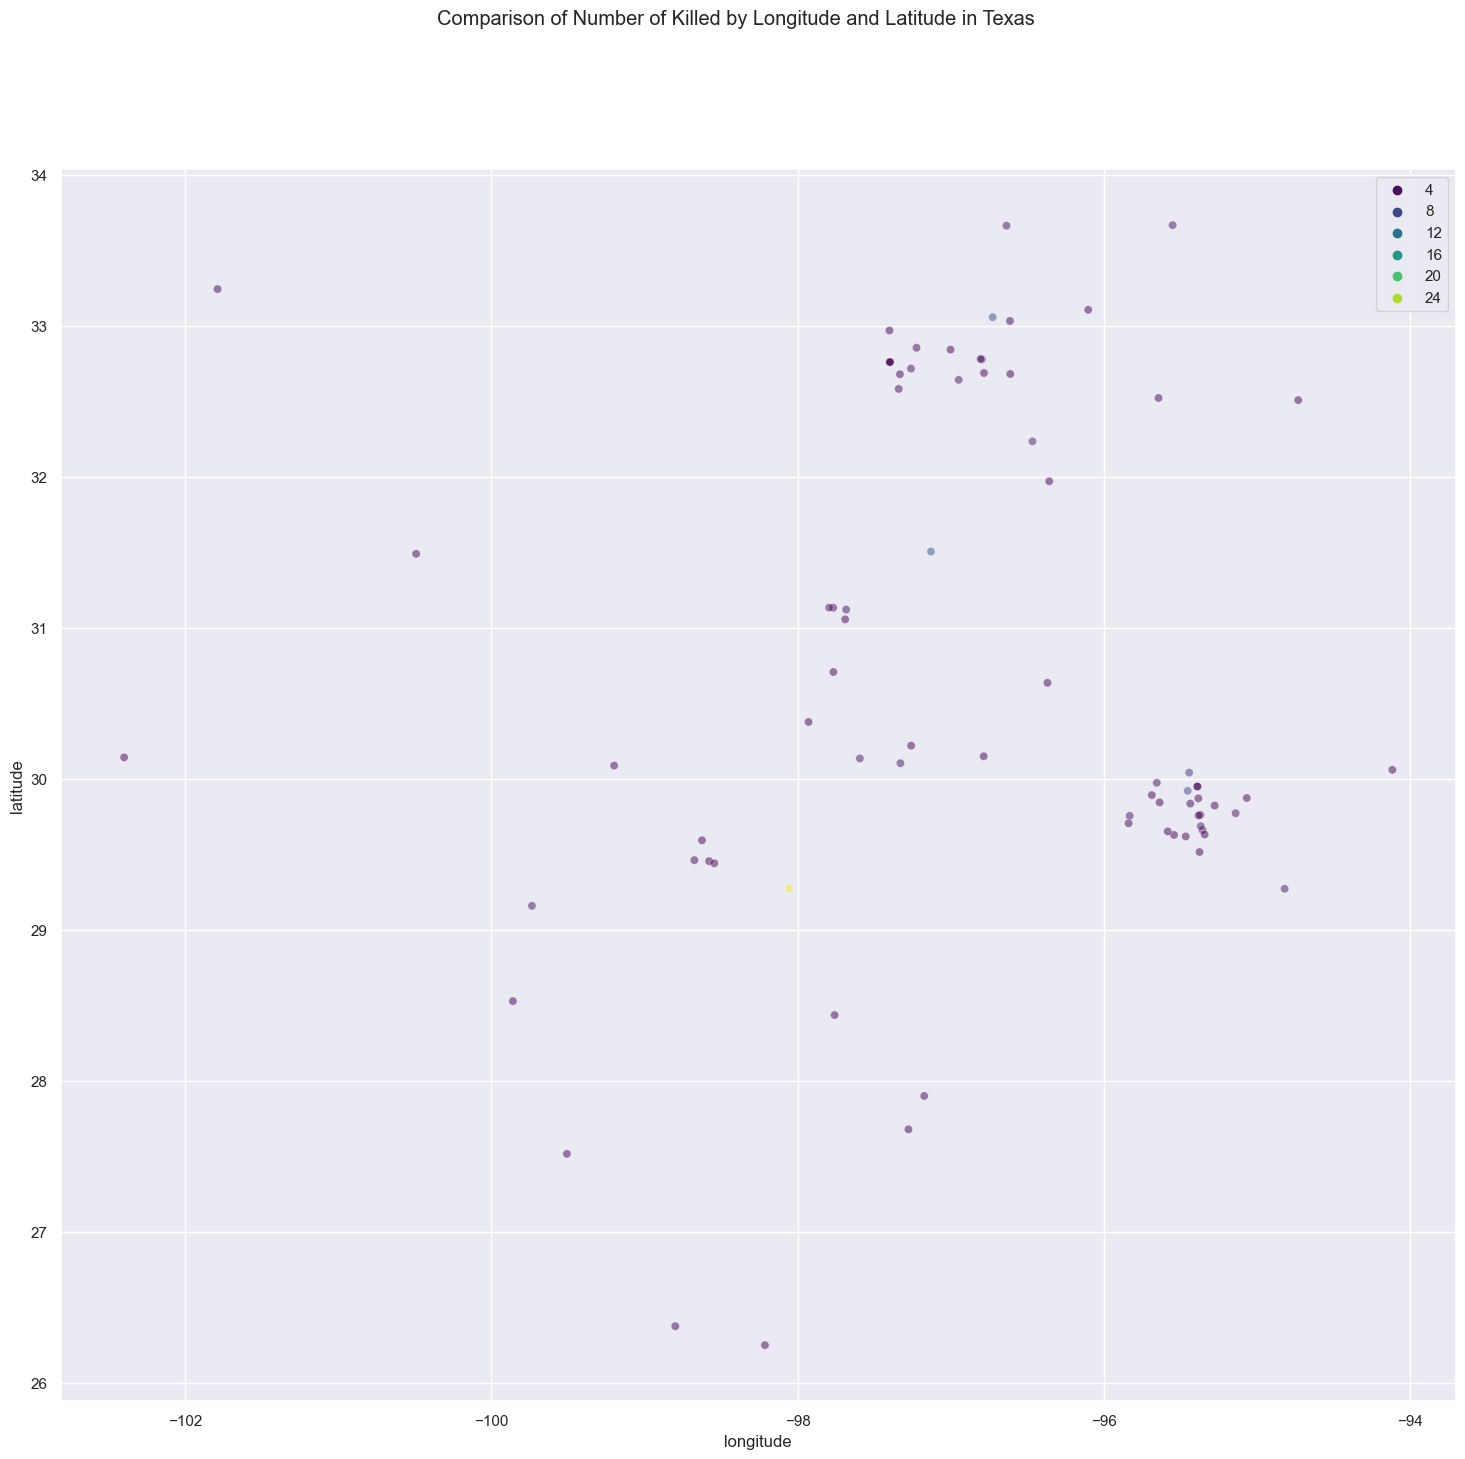

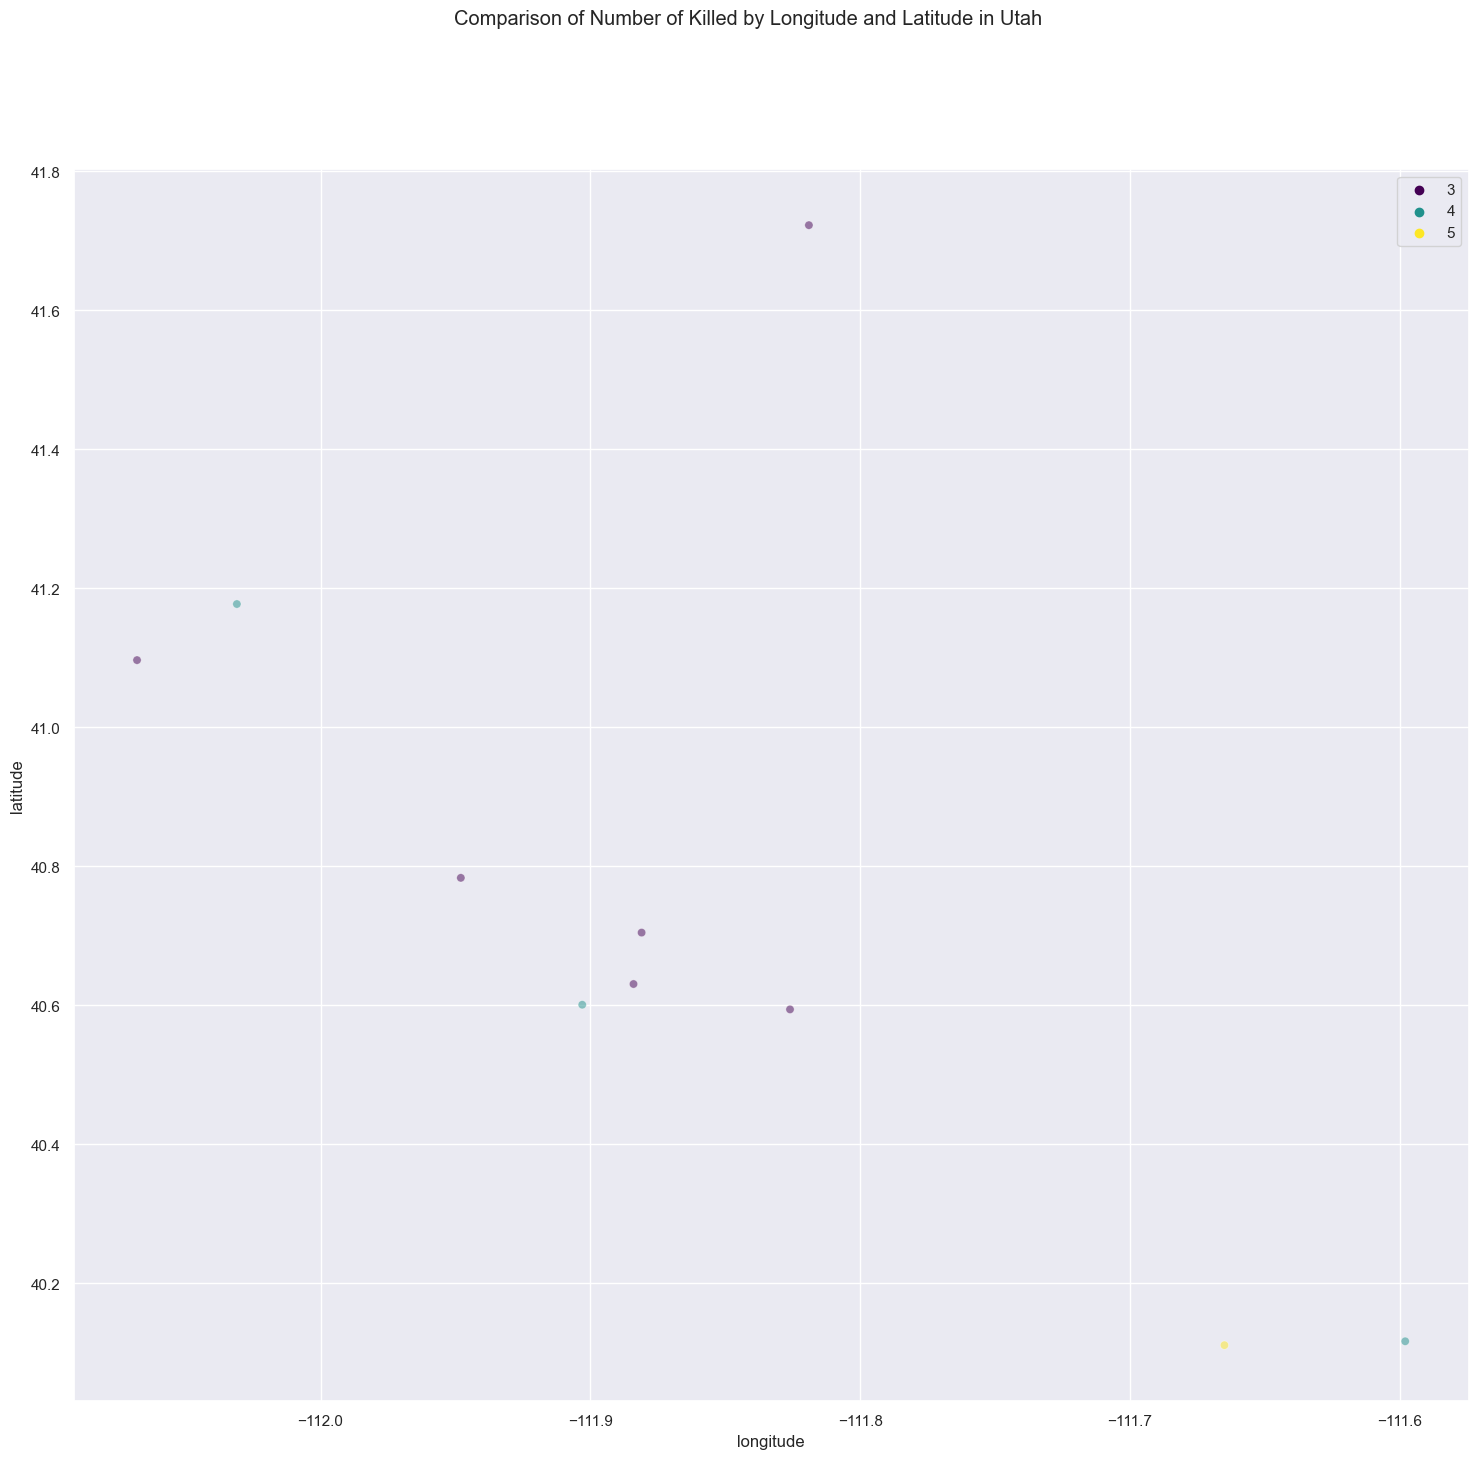

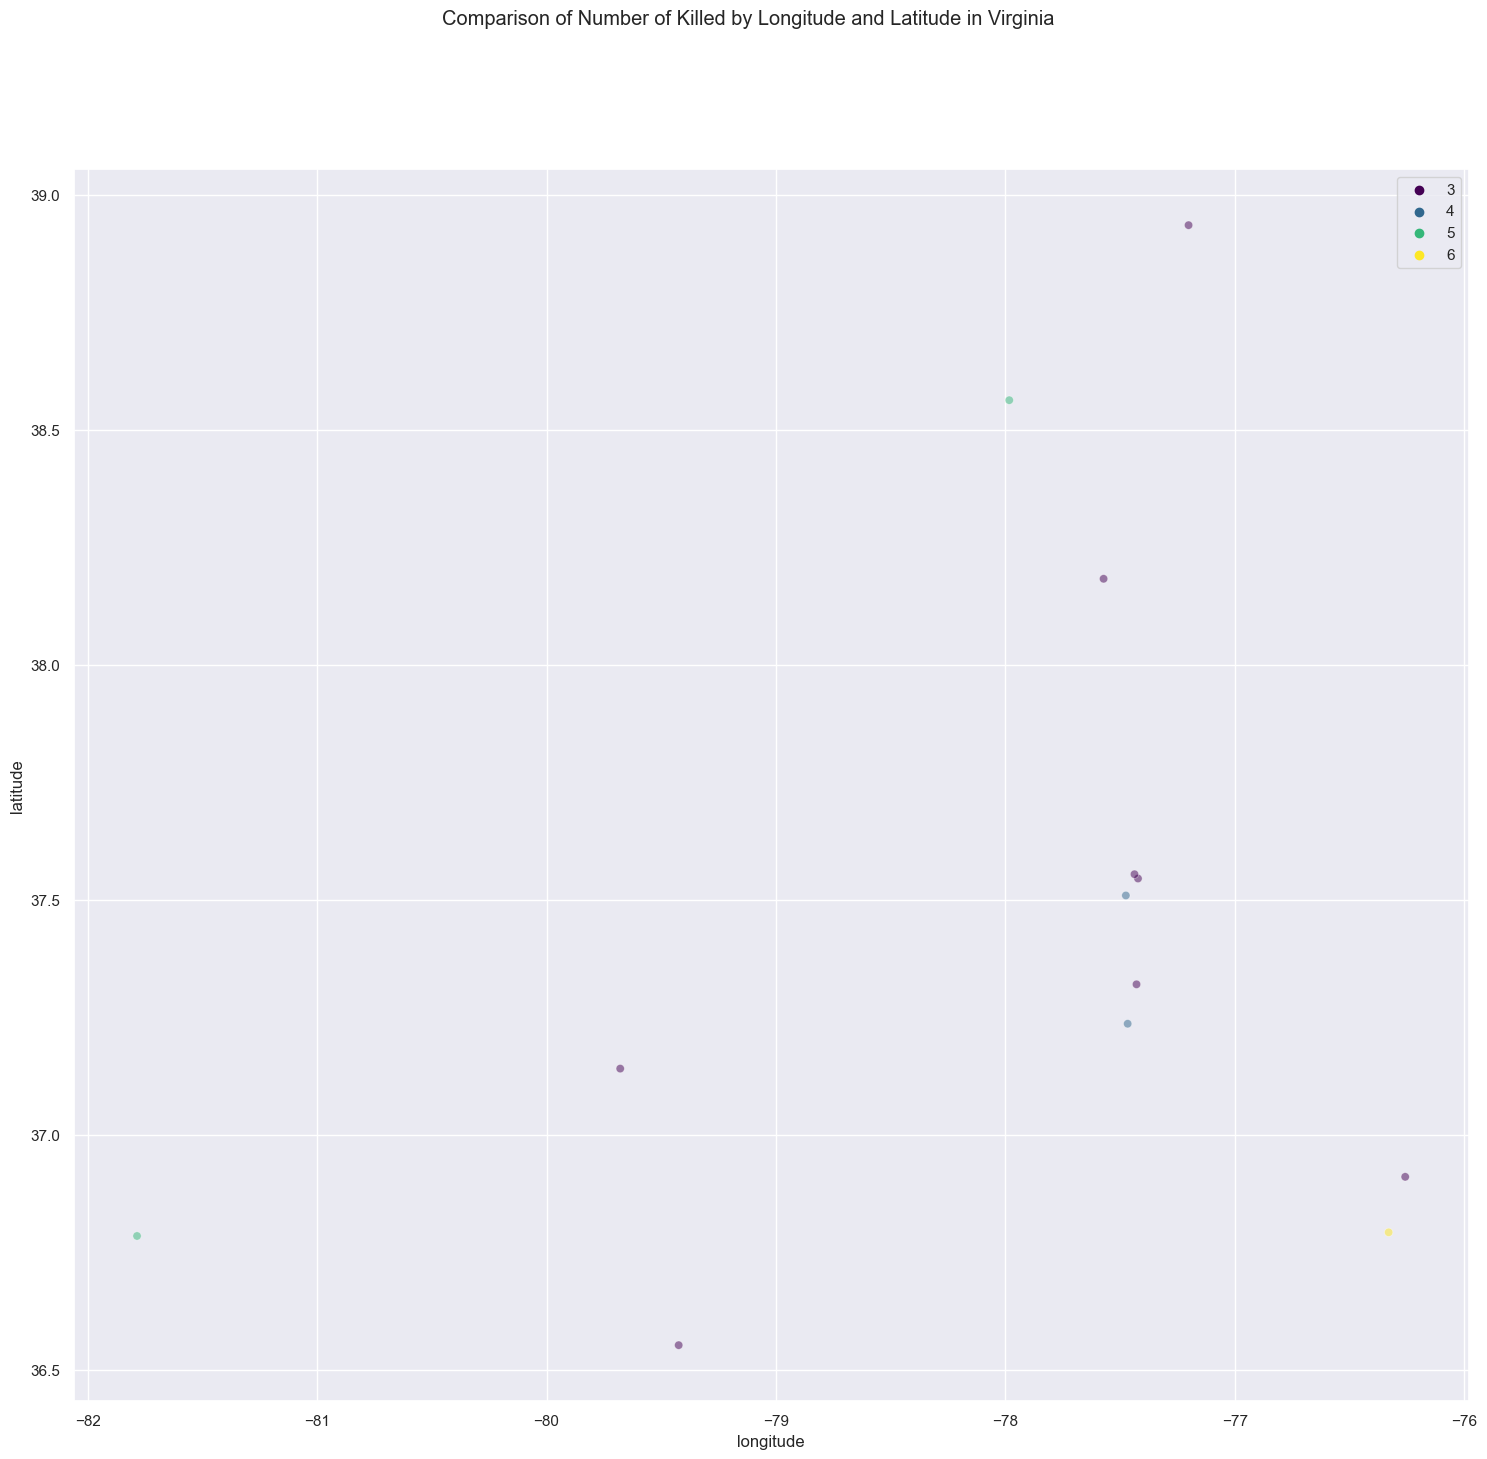

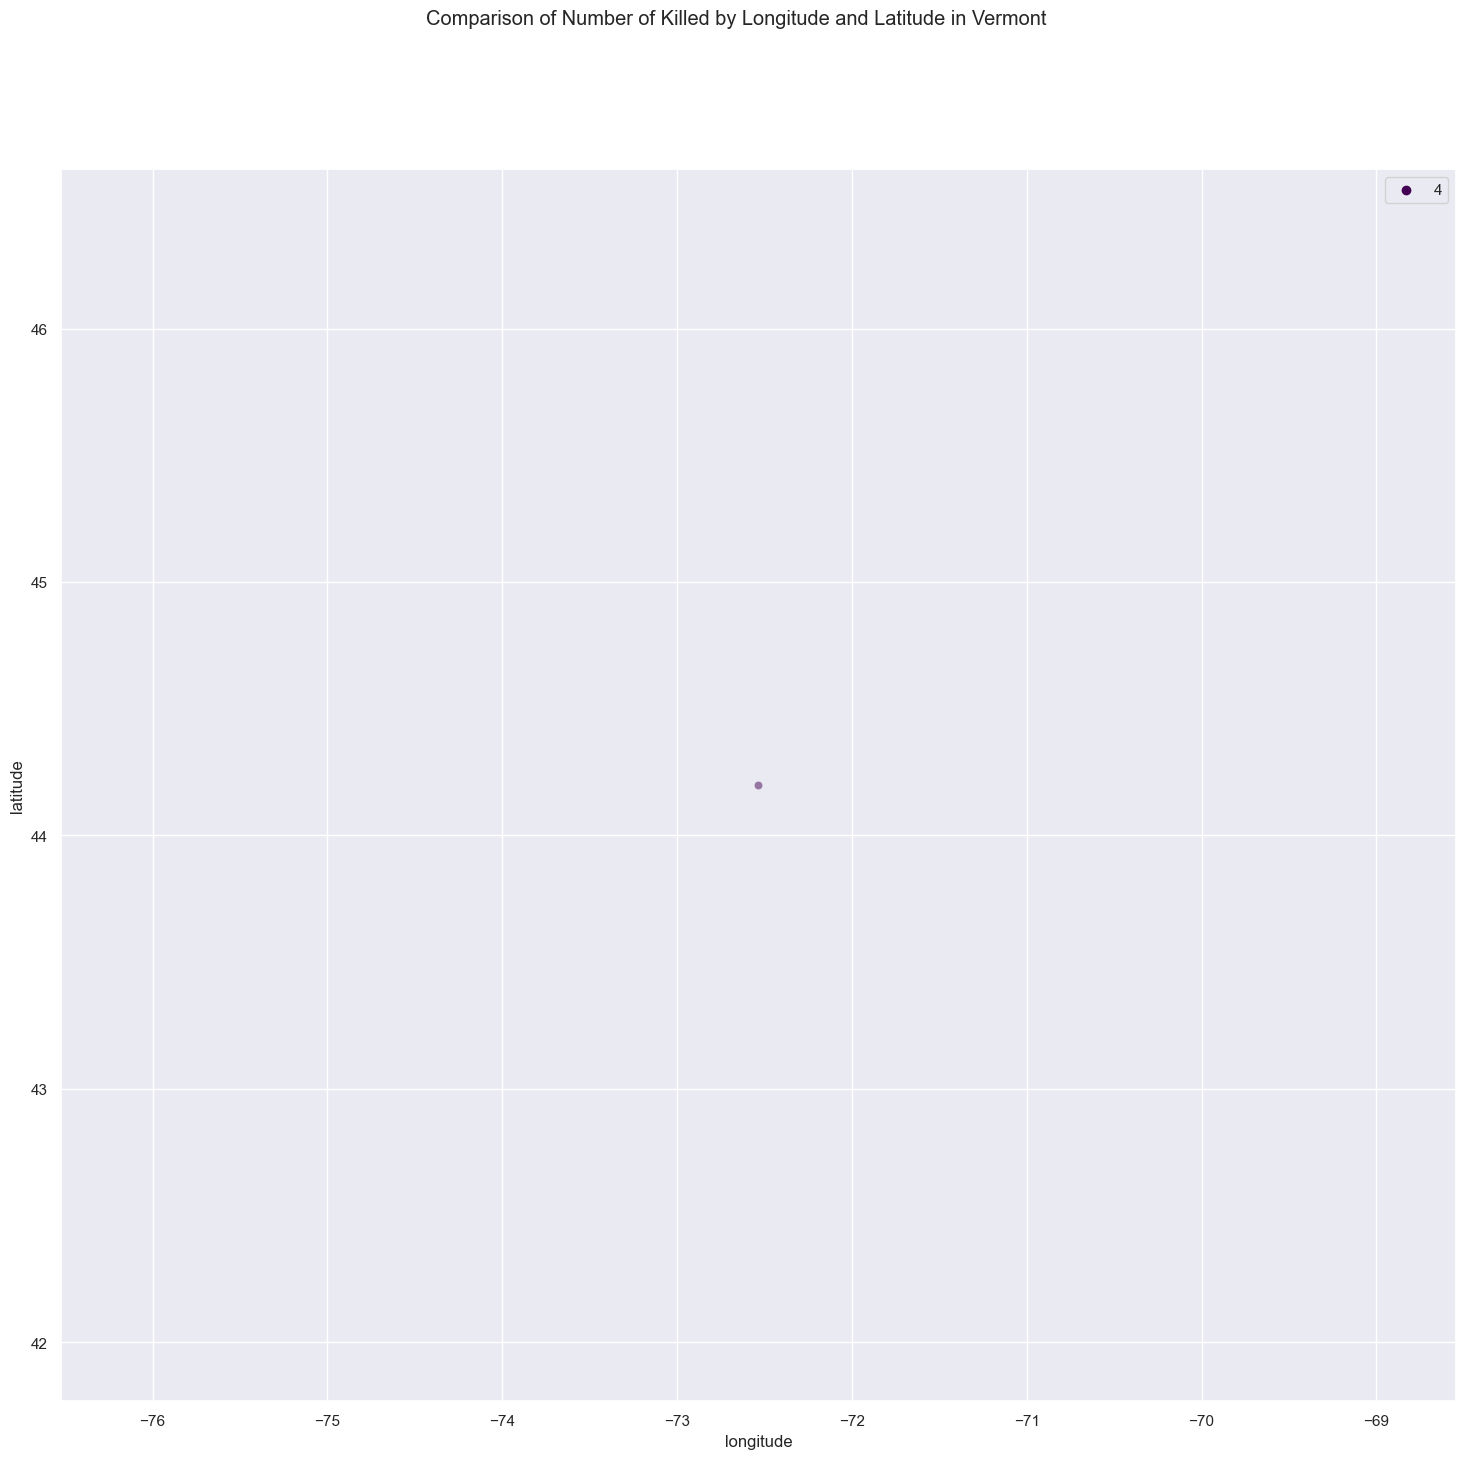

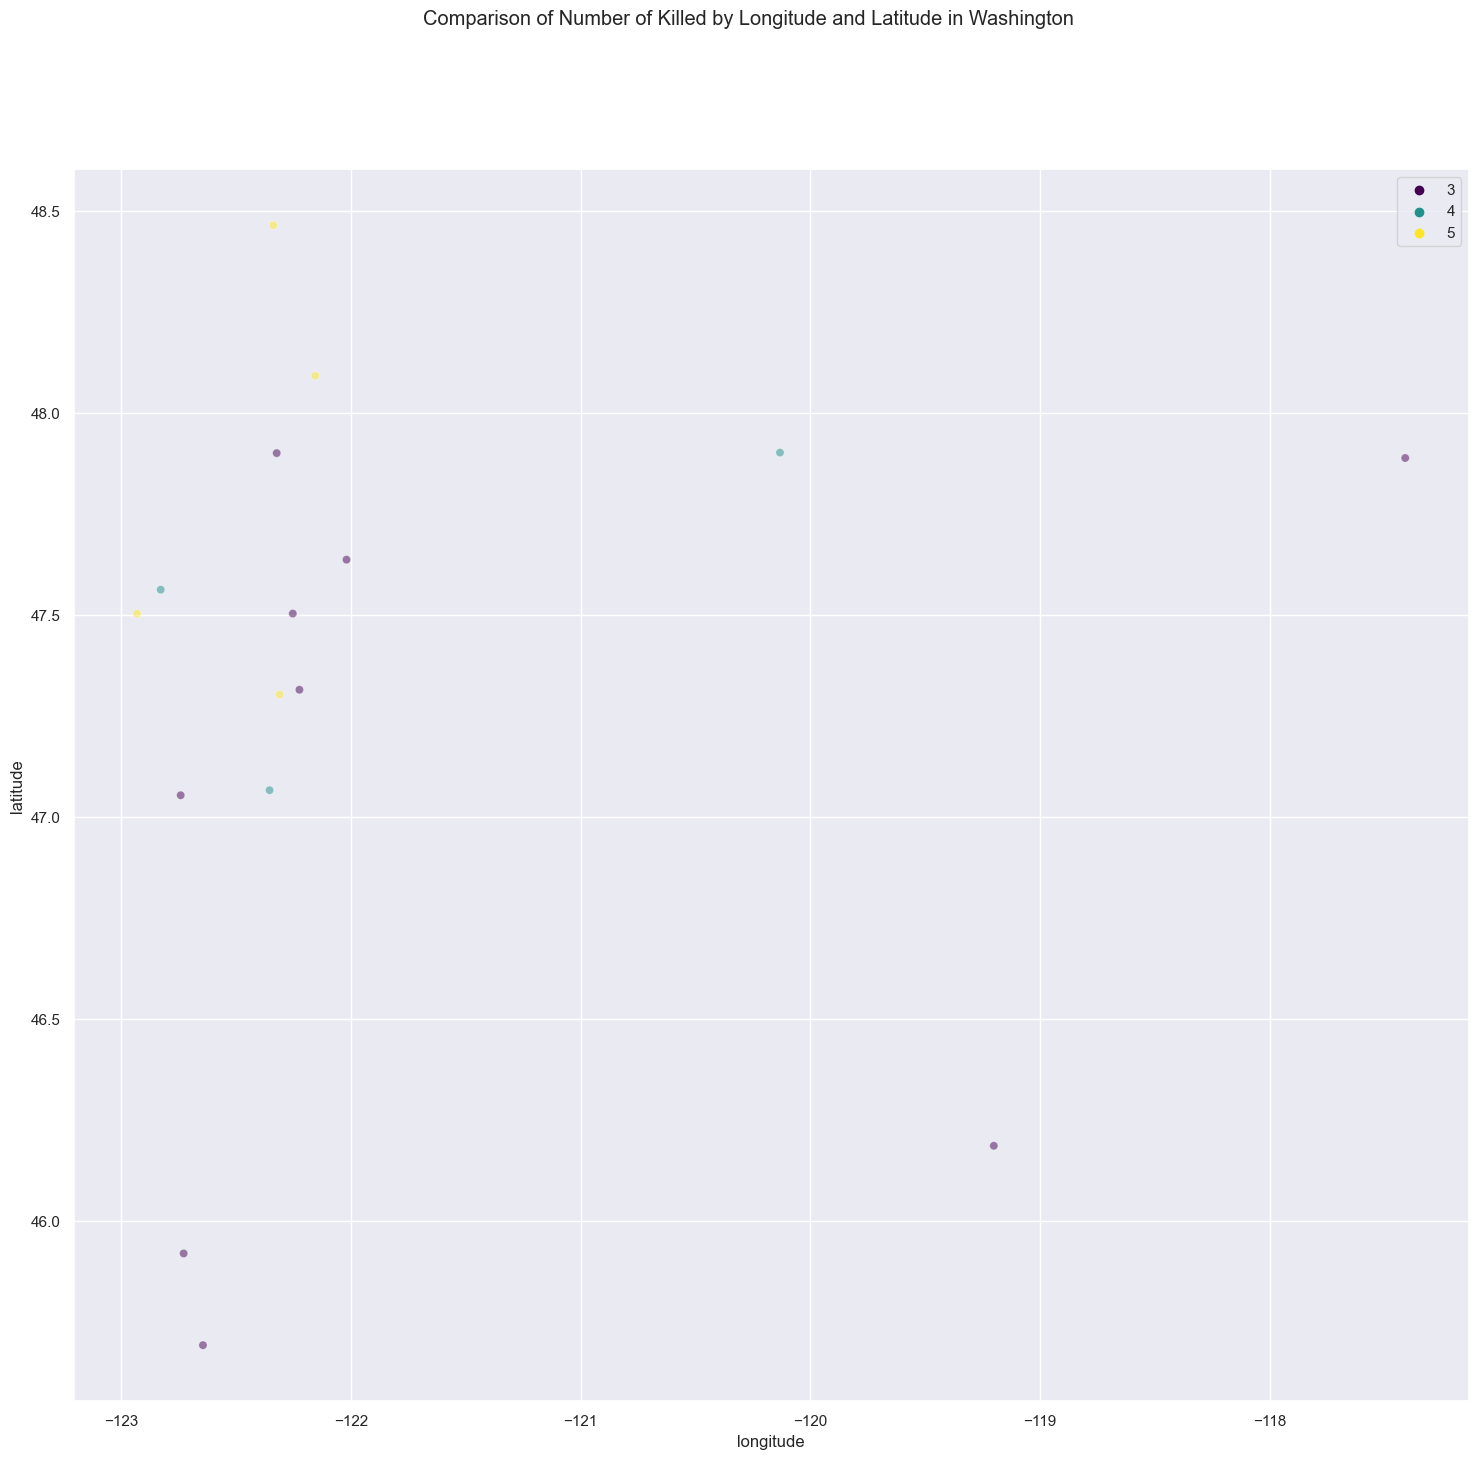

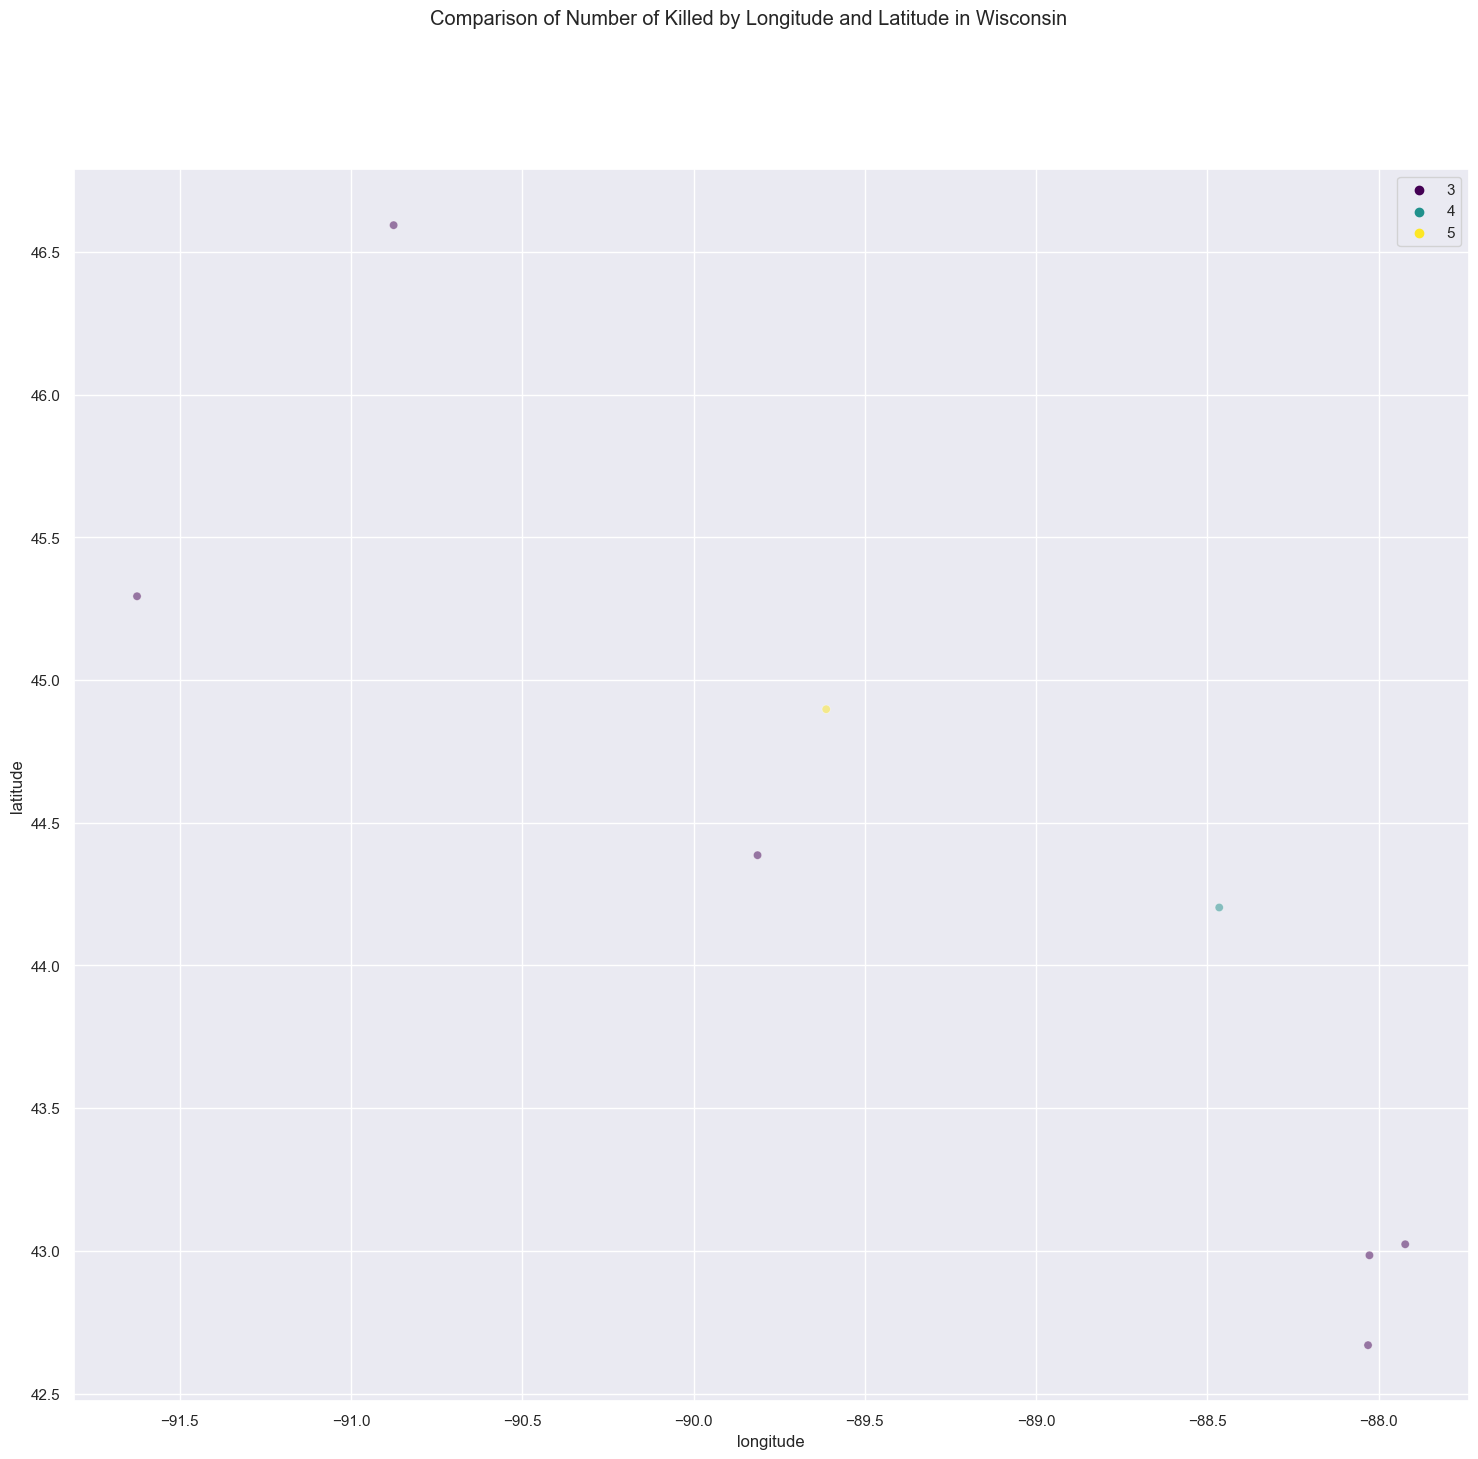

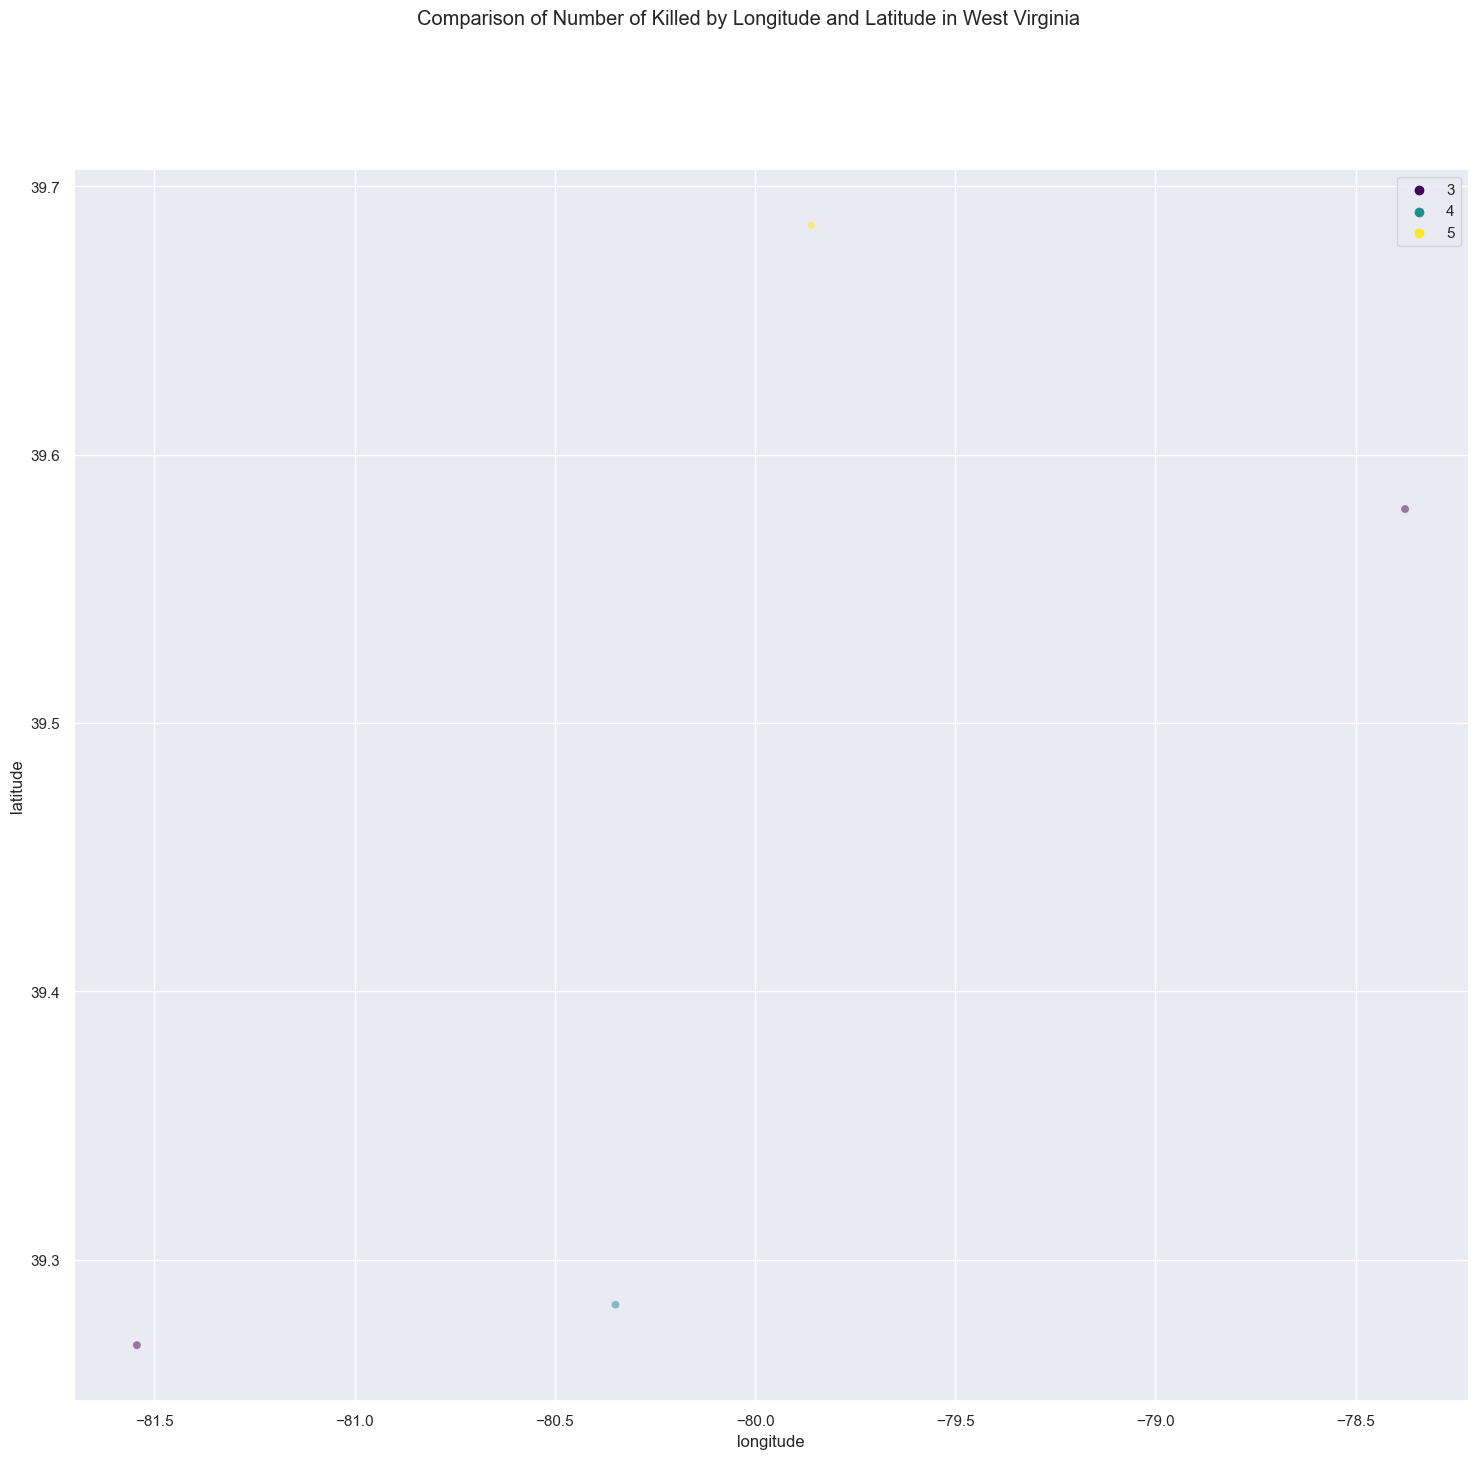

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


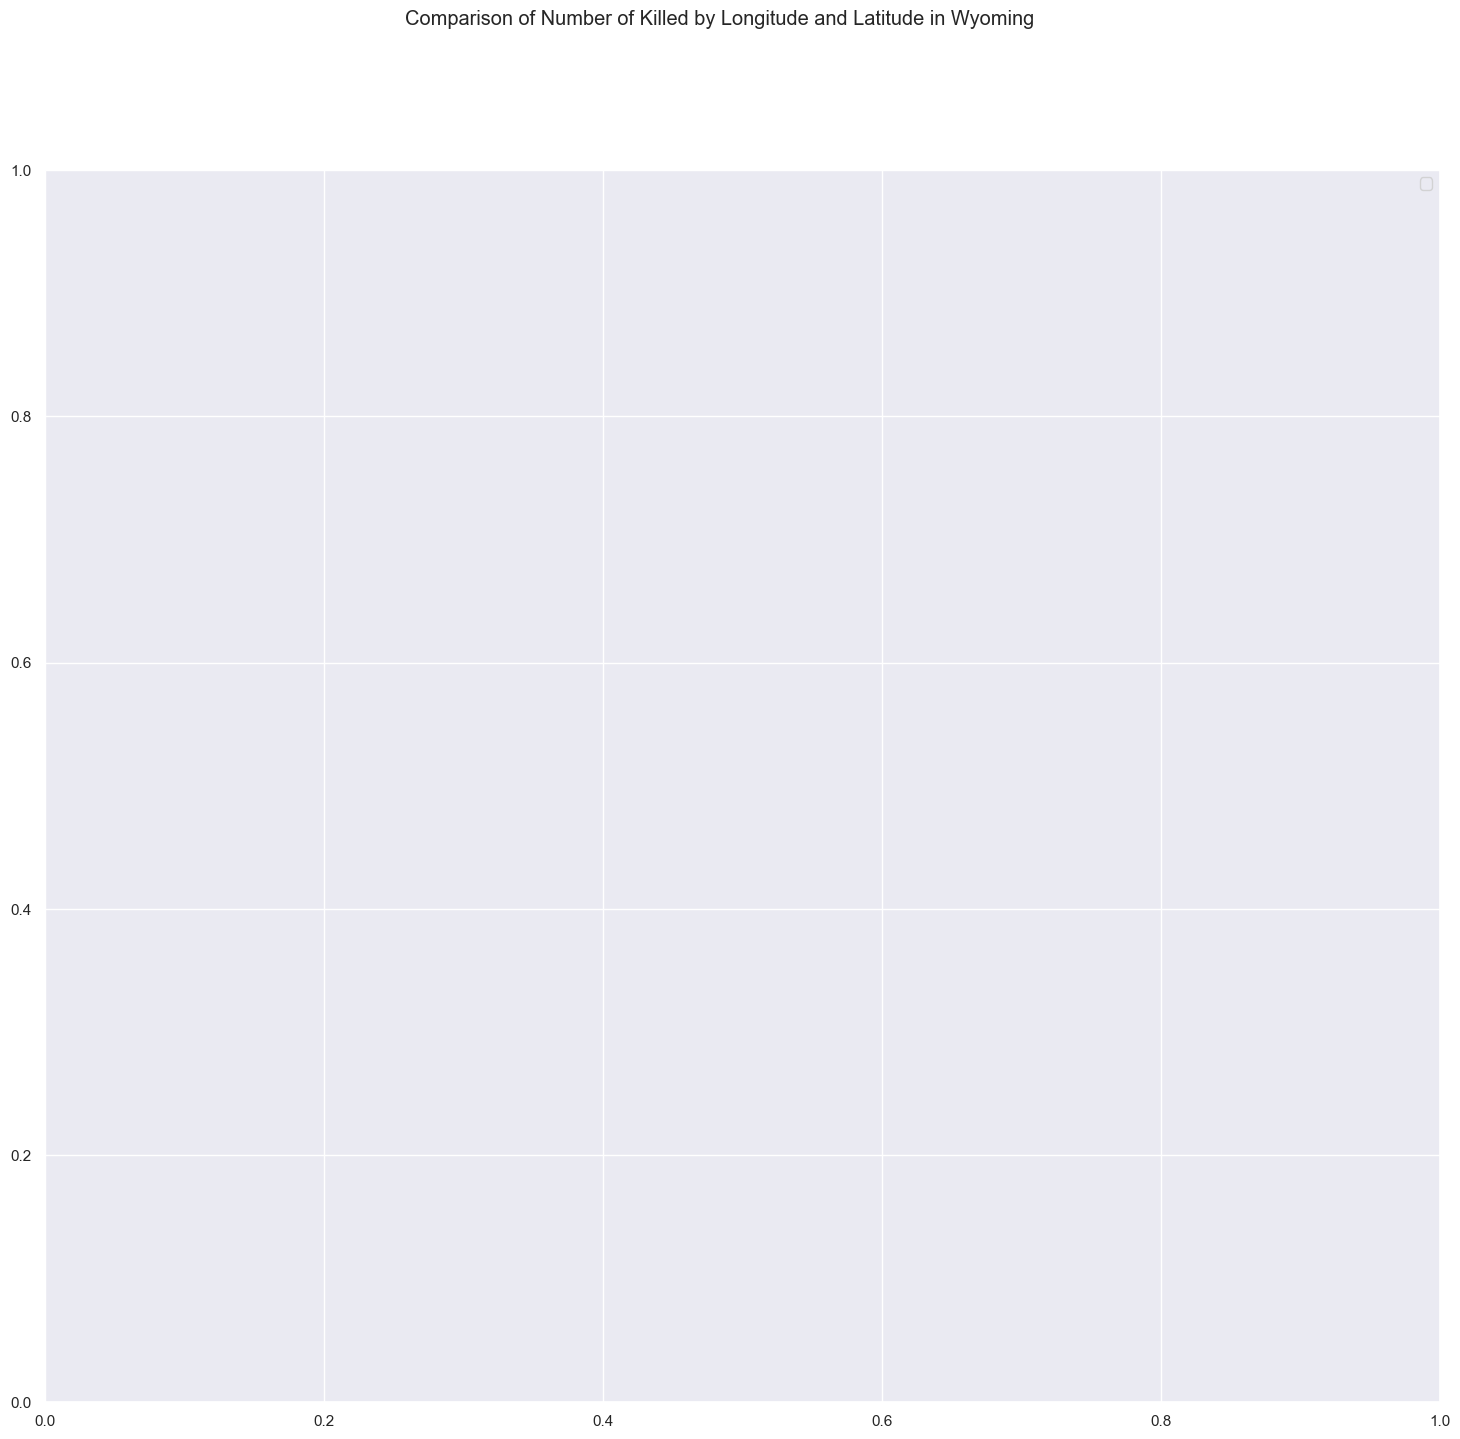

In [293]:
# just an idea
for state in state_names:
    sns.scatterplot(data = gun_df[gun_df['state']==state], x="longitude", y="latitude", hue="n_killed",
                    palette="viridis", alpha=0.5)
    plt.suptitle(f"Comparison of Number of Killed by Longitude and Latitude in {state}")
    plt.legend(loc = "upper right")
    plt.show()

## Creating an aggregated state dataframe for mapping purposes

First, we have noticed in the longitude/latitude mapping above that five states didn't have any mass shooting in 2013-2018: Connecticut, Massachusetts, North Dakota, Rhode Island, and Wyoming. We will add five records with null values for these states to gun_df dataframe, and then add state abbreviation column for easier merging with USA geoJSON dataframe down the road. Then we will aggregate data by state and plot them using geopandas.

In [408]:
## Let's create a dataframe of columns that we'll focus on for mapping purpose

gun_map_df = gun_df[['incident_id', 'state', 'n_killed', 'n_injured', 'n_guns_involved', 'Male', 'Female', 'Adult', 'Teen', 'Child', 'Victim', 
'Suspect', 'Unknown_Guns', 'Handgun', 'Shotgun', 'Rifle', 'Other', 'Automatic']]

df2 = pd.DataFrame({'incident_id': [None, None, None, None, None],
'state': ['Connecticut', 'Massachusetts', 'North Dakota', 'Rhode Island', 'Wyoming'], 
'n_killed': [None, None, None, None, None],
'n_injured': [None, None, None, None, None],
'n_guns_involved': [None, None, None, None, None],
'n_incidents': [None, None, None, None, None],
'Male': [None, None, None, None, None],
'Female': [None, None, None, None, None],
'Adult': [None, None, None, None, None],
'Teen': [None, None, None, None, None],
'Child': [None, None, None, None, None],
'Victim': [None, None, None, None, None],
'Suspect': [None, None, None, None, None],
'Unknown_Guns': [None, None, None, None, None],
'Handgun': [None, None, None, None, None],
'Shotgun': [None, None, None, None, None],
'Rifle': [None, None, None, None, None],
'Other': [None, None, None, None, None],
'Automatic': [None, None, None, None, None] })

gun_states = pd.concat([gun_map_df, df2], axis = 0, ignore_index = True)

gun_states



incident_id          state n_killed n_injured  n_guns_involved  Male  \
0        496668        Alabama        3         5              NaN   8.0   
1        187367        Alabama        3         0              NaN   2.0   
2        195207        Alabama        3         0              NaN   3.0   
3        261048        Alabama        3         0              NaN   2.0   
4        308861        Alabama        3         1              1.0   3.0   
..          ...            ...      ...       ...              ...   ...   
802        None    Connecticut     None      None              NaN   NaN   
803        None  Massachusetts     None      None              NaN   NaN   
804        None   North Dakota     None      None              NaN   NaN   
805        None   Rhode Island     None      None              NaN   NaN   
806        None        Wyoming     None      None              NaN   NaN   

     Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  Handgun  \
0       1.0    9.0   0.0    0.0     8.0      2.0           0.0      0.0   
1       1.0    2.0   0.0    1.0     2.0      1.0           0.0      0.0   
2       0.0    3.0   0.0    0.0     2.0      1.0           0.0      0.0   
3       1.0    3.0   0.0    0.0     2.0      1.0           0.0      0.0   
4       1.0    4.0   0.0    0.0     3.0      1.0           0.0      0.0   
..      ...    ...   ...    ...     ...      ...           ...      ...   
802     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
803     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
804     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
805     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
806     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   

     Shotgun  Rifle  Other  Automatic n_incidents  
0        0.0    0.0    0.0        0.0         NaN  
1        0.0    0.0    0.0        0.0         NaN  
2        0.0    0.0    0.0        0.0         NaN  
3        0.0    0.0    0.0        0.0         NaN  
4        0.0    1.0    0.0        0.0         NaN  
..       ...    ...    ...        ...         ...  
802      NaN    NaN    NaN        NaN        None  
803      NaN    NaN    NaN        NaN        None  
804      NaN    NaN    NaN        NaN        None  
805      NaN    NaN    NaN        NaN        None  
806      NaN    NaN    NaN        NaN        None  

[807 rows x 19 columns]

In [409]:
## Now's let's add state abbreviation to the dataframe

gun_states['abbrev'] = None

for i in range(len(gun_states)):
    state = gun_states.loc[i, 'state']
    if state == 'Alabama':
        gun_states.at[i, 'abbrev'] = 'AL'
    elif state == 'Alaska':
        gun_states.at[i, 'abbrev'] = 'AK'
    elif state == 'Arizona':
        gun_states.at[i, 'abbrev'] = 'AZ'
    elif state == 'Arkansas':
        gun_states.at[i, 'abbrev'] = 'AR'
    elif state == 'California':
        gun_states.at[i, 'abbrev'] = 'CA'
    elif state == 'Colorado':
        gun_states.at[i, 'abbrev'] = 'CO'
    elif state == 'Connecticut':
        gun_states.at[i, 'abbrev'] = 'CT'
    elif state == 'Delaware':
        gun_states.at[i, 'abbrev'] = 'DE'
    elif state == 'District of Columbia':
        gun_states.at[i, 'abbrev'] = 'DC'
    elif state == 'Florida':
        gun_states.at[i, 'abbrev'] = 'FL'
    elif state == 'Georgia':
        gun_states.at[i, 'abbrev'] = 'GA'
    elif state == 'Hawaii':
        gun_states.at[i, 'abbrev'] = 'HI'
    elif state == 'Idaho':
        gun_states.at[i, 'abbrev'] = 'ID'
    elif state == 'Illinois':
        gun_states.at[i, 'abbrev'] = 'IL'
    elif state == 'Indiana':
        gun_states.at[i, 'abbrev'] = 'IN'
    elif state == 'Iowa':
        gun_states.at[i, 'abbrev'] = 'IA'
    elif state == 'Kansas':
        gun_states.at[i, 'abbrev'] = 'KS'
    elif state == 'Kentucky':
        gun_states.at[i, 'abbrev'] = 'KY'
    elif state == 'Louisiana':
        gun_states.at[i, 'abbrev'] = 'LA'
    elif state == 'Maine':
        gun_states.at[i, 'abbrev'] = 'ME'
    elif state == 'Maryland':
        gun_states.at[i, 'abbrev'] = 'MD'
    elif state == 'Massachusetts':
        gun_states.at[i, 'abbrev'] = 'MA'
    elif state == 'Michigan':
        gun_states.at[i, 'abbrev'] = 'MI'
    elif state == 'Minnesota':
        gun_states.at[i, 'abbrev'] = 'MN'
    elif state == 'Mississippi':
        gun_states.at[i, 'abbrev'] = 'MS'
    elif state == 'Missouri':
        gun_states.at[i, 'abbrev'] = 'MO'
    elif state == 'Montana':
        gun_states.at[i, 'abbrev'] = 'MT'
    elif state == 'Nebraska':
        gun_states.at[i, 'abbrev'] = 'NE'
    elif state == 'Nevada':
        gun_states.at[i, 'abbrev'] = 'NV'
    elif state == 'New Hampshire':
        gun_states.at[i, 'abbrev'] = 'NH'
    elif state == 'New Jersey':
        gun_states.at[i, 'abbrev'] = 'NJ'
    elif state == 'New Mexico':
        gun_states.at[i, 'abbrev'] = 'NM'
    elif state == 'New York':
        gun_states.at[i, 'abbrev'] = 'NY'
    elif state == 'North Carolina':
        gun_states.at[i, 'abbrev'] = 'NC'
    elif state == 'North Dakota':
        gun_states.at[i, 'abbrev'] = 'ND'
    elif state == 'Ohio':
        gun_states.at[i, 'abbrev'] = 'OH'
    elif state == 'Oklahoma':
        gun_states.at[i, 'abbrev'] = 'OK'
    elif state == 'Oregon':
        gun_states.at[i, 'abbrev'] = 'OR'
    elif state == 'Pennsylvania':
        gun_states.at[i, 'abbrev'] = 'PA'
    elif state == 'Puerto Rico':
        gun_states.at[i, 'abbrev'] = 'PR'
    elif state == 'Rhode Island':
        gun_states.at[i, 'abbrev'] = 'RI'
    elif state == 'South Carolina':
        gun_states.at[i, 'abbrev'] = 'SC'
    elif state == 'South Dakota':
        gun_states.at[i, 'abbrev'] = 'SD'
    elif state == 'Tennessee':
        gun_states.at[i, 'abbrev'] = 'TN'
    elif state == 'Texas':
        gun_states.at[i, 'abbrev'] = 'TX'
    elif state == 'Utah':
        gun_states.at[i, 'abbrev'] = 'UT'
    elif state == 'Vermont':
        gun_states.at[i, 'abbrev'] = 'VT'
    elif state == 'Virginia':
        gun_states.at[i, 'abbrev'] = 'VA'
    elif state == 'Washington':
        gun_states.at[i, 'abbrev'] = 'WA'
    elif state == 'West Virginia':
        gun_states.at[i, 'abbrev'] = 'WV'
    elif state == 'Wisconsin':
        gun_states.at[i, 'abbrev'] = 'WI'
    elif state == 'Wyoming':
        gun_states.at[i, 'abbrev'] = 'WY'

gun_states.sample(n=20)

incident_id           state n_killed n_injured  n_guns_involved  Male  \
452     1012505        Missouri        3         0              1.0   0.0   
77       273800      California        3         0              1.0   1.0   
408     1053616        Michigan        3         0              1.0   1.0   
425      853756     Mississippi        8         1              1.0   4.0   
681      145727           Texas        3         0              NaN   2.0   
160      192851         Florida        8         0              NaN   5.0   
241     1035257         Georgia        3         1              1.0   2.0   
11       761471         Alabama        3         0              1.0   1.0   
805        None    Rhode Island     None      None              NaN   NaN   
527      179365  North Carolina        3         1              1.0   2.0   
686      150603           Texas        3         0              NaN   5.0   
302      550596            Iowa        3         0              1.0   1.0   
572      957562            Ohio        4         0              1.0   3.0   
804        None    North Dakota     None      None              NaN   NaN   
563      416459            Ohio        3         0              NaN   1.0   
42      1013706         Arizona        3         0              1.0   2.0   
631      492914  South Carolina        5         0              NaN   4.0   
325      583204        Kentucky        3         0              NaN   1.0   
533      297229  North Carolina        3         0              1.0   4.0   
547      917820  North Carolina        4         0              1.0   5.0   

     Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  Handgun  \
452     3.0    3.0   0.0    0.0     3.0      0.0           1.0      0.0   
77      2.0    3.0   0.0    0.0     2.0      1.0           1.0      0.0   
408     2.0    1.0   0.0    2.0     2.0      1.0           0.0      1.0   
425     4.0    8.0   0.0    1.0     8.0      1.0           1.0      0.0   
681     1.0    3.0   0.0    0.0     3.0      0.0           0.0      0.0   
160     3.0    2.0   0.0    6.0     8.0      0.0           0.0      0.0   
241     2.0    2.0   1.0    1.0     4.0      0.0           1.0      0.0   
11      2.0    2.0   1.0    0.0     2.0      1.0           1.0      0.0   
805     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
527     2.0    2.0   2.0    0.0     3.0      1.0           1.0      0.0   
686     0.0    5.0   0.0    0.0     3.0      2.0           0.0      0.0   
302     2.0    3.0   0.0    0.0     2.0      1.0           1.0      0.0   
572     2.0    4.0   0.0    1.0     4.0      1.0           1.0      0.0   
804     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
563     2.0    2.0   1.0    0.0     2.0      1.0           0.0      0.0   
42      1.0    3.0   0.0    0.0     3.0      0.0           1.0      0.0   
631     2.0    4.0   0.0    2.0     5.0      1.0           0.0      0.0   
325     2.0    3.0   0.0    0.0     2.0      1.0           0.0      0.0   
533     1.0    5.0   0.0    0.0     3.0      2.0           1.0      0.0   
547     2.0    7.0   0.0    0.0     4.0      3.0           1.0      0.0   

     Shotgun  Rifle  Other  Automatic n_incidents abbrev  
452      0.0    0.0    0.0        0.0         NaN     MO  
77       0.0    0.0    0.0        0.0         NaN     CA  
408      0.0    0.0    0.0        0.0         NaN     MI  
425      0.0    0.0    0.0        0.0         NaN     MS  
681      0.0    0.0    0.0        0.0         NaN     TX  
160      0.0    0.0    0.0        0.0         NaN     FL  
241      0.0    0.0    0.0        0.0         NaN     GA  
11       0.0    0.0    0.0        0.0         NaN     AL  
805      NaN    NaN    NaN        NaN        None     RI  
527      0.0    0.0    0.0        0.0         NaN     NC  
686      0.0    0.0    0.0        0.0         NaN     TX  
302      0.0    0.0    0.0        0.0         NaN     IA  
572      0.0    0.0    0.0        0.0      

In [410]:
gun_state_sum_df = gun_states.groupby('state')[['abbrev']].agg(pd.Series.mode)

gun_state_sum_df['n_killed'] = gun_states.groupby('state')[['n_killed']].sum()

gun_state_sum_df['n_injured'] = gun_states.groupby('state')['n_injured'].sum()

gun_state_sum_df['n_guns_involved'] = gun_states.groupby('state')['n_guns_involved'].sum()

gun_state_sum_df['n_incidents'] = gun_states.groupby('state')['n_killed'].count()

gun_state_sum_df['Male'] = gun_states.groupby('state')['Male'].sum()

gun_state_sum_df['Female'] = gun_states.groupby('state')['Female'].sum()

gun_state_sum_df['Adult'] = gun_states.groupby('state')['Adult'].sum()

gun_state_sum_df['Teen'] = gun_states.groupby('state')['Teen'].sum()

gun_state_sum_df['Child'] = gun_states.groupby('state')['Child'].sum()

gun_state_sum_df['Victim'] = gun_states.groupby('state')['Victim'].sum()

gun_state_sum_df['Suspect'] = gun_states.groupby('state')['Suspect'].sum()

gun_state_sum_df['Unknown_Guns'] = gun_states.groupby('state')['Unknown_Guns'].sum()

gun_state_sum_df['Handgun'] = gun_states.groupby('state')['Handgun'].sum()

gun_state_sum_df['Shotgun'] = gun_states.groupby('state')['Shotgun'].sum()

gun_state_sum_df['Rifle'] = gun_states.groupby('state')['Rifle'].sum()

gun_state_sum_df['Other'] = gun_states.groupby('state')['Other'].sum()

gun_state_sum_df['Automatic'] = gun_states.groupby('state')['Automatic'].sum()

gun_state_sum_df 



abbrev  n_killed n_injured  n_guns_involved  n_incidents  \
state                                                                           
Alabama                  AL        55         9              8.0           17   
Alaska                   AK        15         0              3.0            4   
Arizona                  AZ        83         6             19.0           24   
Arkansas                 AR        31         4              9.0           10   
California               CA       252        94             54.0           72   
Colorado                 CO        42        12             12.0           13   
Connecticut              CT         0         0              0.0            0   
Delaware                 DE         3         2              1.0            1   
District of Columbia     DC        11         3              2.0            1   
Florida                  FL       285        96             44.0           67   
Georgia                  GA       111        18             26.0           33   
Hawaii                   HI         3         0              1.0            1   
Idaho                    ID        16         1              9.0            5   
Illinois                 IL        96        12             21.0           28   
Indiana                  IN        80         7             16.0           25   
Iowa                     IA         9         0              2.0            3   
Kansas                   KS        51        18             14.0           15   
Kentucky                 KY        59         2             14.0           18   
Louisiana                LA        85        25             23.0           27   
Maine                    ME        19         1              3.0            5   
Maryland                 MD        60        15             10.0           20   
Massachusetts            MA         0         0              0.0            0   
Michigan                 MI        70        16             18.0           21   
Minnesota                MN        18         2              5.0            5   
Mississippi              MS        41         3              9.0           11   
Missouri                 MO       102         6             26.0           31   
Montana                  MT        17         2              5.0            5   
Nebraska                 NE        12         5              2.0            4   
Nevada                   NV        51         0              9.0           15   
New Hampshire            NH         3         0              0.0            1   
New Jersey               NJ        36         2              6.0           11   
New Mexico               NM        37         3             10.0           10   
New York                 NY        65        11             22.0           19   
North Carolina           NC        93        10             78.0           30   
North Dakota             ND         0         0              0.0            0   
Ohio                     OH        82         9             19.0           23   
Oklahoma                 OK        55         1              9.0           16   
Oregon                   OR        35        12             11.0            9   
Pennsylvania             PA       103        11             33.0           30   
Rhode Island             RI         0         0              0.0            0   
South Carolina           SC        78         7             10.0           21   
South Dakota             SD        13         1              4.0            3   
Tennessee                TN        43         7             11.0           13   
Texas                    TX       309        87             61.0           81   
Utah                     UT        35         4              8.0           10   
Vermont                  VT         4         0              1.0            1   
Virginia                 VA        52         3              9.0           14   
Washington               WA        59         6     

In [411]:
## Let's see how long the dataframe is

len(gun_state_sum_df)

51

## Now let's create geopandas maps!

In [412]:
import geopandas as gpd

# Import the geoJSON file
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

# Read the file and print it.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df

id            name                                           geometry
0   AL         Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1   AK          Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2   AZ         Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3   AR        Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4   CA      California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...
5   CO        Colorado  POLYGON ((-107.91973 41.00391, -105.72895 40.9...
6   CT     Connecticut  POLYGON ((-73.05353 42.03905, -71.79931 42.022...
7   DE        Delaware  POLYGON ((-75.41409 39.80446, -75.50720 39.683...
8   FL         Florida  POLYGON ((-85.49714 30.99754, -85.00421 31.003...
9   GA         Georgia  POLYGON ((-83.10919 35.00118, -83.32279 34.787...
10  HI          Hawaii  MULTIPOLYGON (((-155.63484 18.94827, -155.8813...
11  ID           Idaho  POLYGON ((-116.04751 49.00024, -116.04751 47.9...
12  IL        Illinois  POLYGON ((-90.63998 42.51006, -88.78878 42.493...
13  IN         Indiana  POLYGON ((-85.99006 41.75972, -84.80704 41.759...
14  IA            Iowa  POLYGON ((-91.36842 43.50139, -91.21506 43.501...
15  KS          Kansas  POLYGON ((-101.90605 40.00163, -95.30634 40.00...
16  KY        Kentucky  POLYGON ((-83.90335 38.76931, -83.67879 38.632...
17  LA       Louisiana  POLYGON ((-93.60849 33.01853, -91.16577 33.002...
18  ME           Maine  POLYGON ((-70.70392 43.05776, -70.82441 43.128...
19  MD        Maryland  MULTIPOLYGON (((-75.99465 37.95325, -76.01655 ...
20  MA   Massachusetts  POLYGON ((-70.91752 42.88797, -70.81894 42.871...
21  MI        Michigan  MULTIPOLYGON (((-83.45424 41.73234, -84.80704 ...
22  MN       Minnesota  POLYGON ((-92.01470 46.70540, -92.09137 46.749...
23  MS     Mississippi  POLYGON ((-88.47111 34.99570, -88.20274 34.995...
24  MO        Missouri  POLYGON ((-91.83396 40.60957, -91.72989 40.615...
25  MT         Montana  POLYGON ((-104.04753 49.00024, -104.04206 47.8...
26  NE        Nebraska  POLYGON ((-103.32458 43.00299, -101.62673 42.9...
27  NV          Nevada  POLYGON ((-117.02788 42.00071, -114.04295 41.9...
28  NH   New Hampshire  POLYGON ((-71.08183 45.30330, -71.03254 44.657...
29  NJ      New Jersey  POLYGON ((-74.23655 41.14083, -73.90245 40.998...
30  NM      New Mexico  POLYGON ((-107.42133 37.00026, -106.86816 36.9...
31  NY        New York  POLYGON ((-73.34381 45.01303, -73.33285 44.804...
32  NC  North Carolina  POLYGON ((-80.97866 36.56211, -80.29404 36.545...
33  ND    North Dakota  POLYGON ((-97.22874 49.00024, -97.09730 48.682...
34  OH            Ohio  POLYGON ((-80.51860 41.97880, -80.51860 40.636...
35  OK        Oklahoma  POLYGON ((-100.08771 37.00026, -94.61624 37.00...
36  OR          Oregon  POLYGON ((-123.21135 46.17414, -123.11824 46.1...
37  PA    Pennsylvania  POLYGON ((-79.76278 42.25265, -79.76278 42.000...
38  RI    Rhode Island  MULTIPOLYGON (((-71.19684 41.67757, -71.12017 ...
39  SC  South Carolina  POLYGON ((-82.76414 35.06690, -82.55054 35.160...
40  SD    South Dakota  POLYGON ((-104.04753 45.94411, -96.56056 45.93...
41  TN       Tennessee  POLYGON ((-88.05487 36.49638, -88.07130 36.677...
42  TX           Texas  POLYGON ((-101.81294 36.50186, -100.00007 36.5...
43  UT            Utah  POLYGON ((-112.16436 41.99523, -111.04706 42.0...
44  VT         Vermont  POLYGON ((-71.50355 45.01303, -71.49260 44.914...
45  VA        Virginia  MULTIPOLYGON (((-75.39766 38.01350, -75.24430 ...
46  WA      Washington  MULTIPOLYGON (((-117.03336 49.00024, -117.0443...
47  WV   West Virginia  POLYGON ((-80.51860 40.63695, -80.51860 39.722...
48  WI       Wisconsin  POLYGON ((-90.41543 46.56848, -90.22921 46.508...
49  WY         Wyoming  POLYGON ((-109.08084 45.00207, -105.91517 45.0...

In [419]:

## Since the geoJSON_states do not have District of Columbia, we will remove DC from our gun_state_sum_df

gun_state_noDC_df = gun_state_sum_df.drop(index='District of Columbia')

gun_state_noDC_df


abbrev  n_killed n_injured  n_guns_involved  n_incidents  \
state                                                                     
Alabama            AL        55         9              8.0           17   
Alaska             AK        15         0              3.0            4   
Arizona            AZ        83         6             19.0           24   
Arkansas           AR        31         4              9.0           10   
California         CA       252        94             54.0           72   
Colorado           CO        42        12             12.0           13   
Connecticut        CT         0         0              0.0            0   
Delaware           DE         3         2              1.0            1   
Florida            FL       285        96             44.0           67   
Georgia            GA       111        18             26.0           33   
Hawaii             HI         3         0              1.0            1   
Idaho              ID        16         1              9.0            5   
Illinois           IL        96        12             21.0           28   
Indiana            IN        80         7             16.0           25   
Iowa               IA         9         0              2.0            3   
Kansas             KS        51        18             14.0           15   
Kentucky           KY        59         2             14.0           18   
Louisiana          LA        85        25             23.0           27   
Maine              ME        19         1              3.0            5   
Maryland           MD        60        15             10.0           20   
Massachusetts      MA         0         0              0.0            0   
Michigan           MI        70        16             18.0           21   
Minnesota          MN        18         2              5.0            5   
Mississippi        MS        41         3              9.0           11   
Missouri           MO       102         6             26.0           31   
Montana            MT        17         2              5.0            5   
Nebraska           NE        12         5              2.0            4   
Nevada             NV        51         0              9.0           15   
New Hampshire      NH         3         0              0.0            1   
New Jersey         NJ        36         2              6.0           11   
New Mexico         NM        37         3             10.0           10   
New York           NY        65        11             22.0           19   
North Carolina     NC        93        10             78.0           30   
North Dakota       ND         0         0              0.0            0   
Ohio               OH        82         9             19.0           23   
Oklahoma           OK        55         1              9.0           16   
Oregon             OR        35        12             11.0            9   
Pennsylvania       PA       103        11             33.0           30   
Rhode Island       RI         0         0              0.0            0   
South Carolina     SC        78         7             10.0           21   
South Dakota       SD        13         1              4.0            3   
Tennessee          TN        43         7             11.0           13   
Texas              TX       309        87             61.0           81   
Utah               UT        35         4              8.0           10   
Vermont            VT         4         0              1.0            1   
Virginia           VA        52         3              9.0           14   
Washington         WA        59         6             25.0           16   
West Virginia      WV        15         0              3.0            4   
Wisconsin          WI        30         1             10.0            9   
Wyoming            WY         0         0              0.0            0   

                 Male  Female  Adult  Teen  Child  Victim  Suspect  \
state                                       

In [427]:
# we rename the column from id to state in the geoJSON_df so we can merge the two data frames.
geoJSON_df = geoJSON_df.rename(columns = {"id":"abbrev"})

# Next we merge the gun_state_noDC_df dataframe and the geoJSON data frame on the key id.
state_df = geoJSON_df.merge(gun_state_noDC_df, on = "abbrev")

state_df = state_df.rename(columns = {"abbrev":"state"})
state_df['n_killed'] = state_df['n_killed'].replace(0, np.nan)
state_df['n_injured'] = state_df['n_injured'].replace(0, np.nan)
state_df['n_guns_involved'] = state_df['n_guns_involved'].replace(0, np.nan)
state_df['n_incidents'] = state_df['n_incidents'].replace(0, np.nan)
# state_df['Male'] = state_df['Male'].replace(0, np.nan)
# state_df['Female'] = state_df['Female'].replace(0, np.nan)
# state_df['Adult'] = state_df['Adult'].replace(0, np.nan)
# state_df['Teen'] = state_df['Teen'].replace(0, np.nan)
# state_df['Child'] = state_df['Child'].replace(0, np.nan)
# state_df['Victim'] = state_df['n_killed'].replace(0, np.nan)


state_df

state            name                                           geometry  \
0     AL         Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
1     AK          Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   
2     AZ         Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...   
3     AR        Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...   
4     CA      California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...   
5     CO        Colorado  POLYGON ((-107.91973 41.00391, -105.72895 40.9...   
6     CT     Connecticut  POLYGON ((-73.05353 42.03905, -71.79931 42.022...   
7     DE        Delaware  POLYGON ((-75.41409 39.80446, -75.50720 39.683...   
8     FL         Florida  POLYGON ((-85.49714 30.99754, -85.00421 31.003...   
9     GA         Georgia  POLYGON ((-83.10919 35.00118, -83.32279 34.787...   
10    HI          Hawaii  MULTIPOLYGON (((-155.63484 18.94827, -155.8813...   
11    ID           Idaho  POLYGON ((-116.04751 49.00024, -116.04751 47.9...   
12    IL        Illinois  POLYGON ((-90.63998 42.51006, -88.78878 42.493...   
13    IN         Indiana  POLYGON ((-85.99006 41.75972, -84.80704 41.759...   
14    IA            Iowa  POLYGON ((-91.36842 43.50139, -91.21506 43.501...   
15    KS          Kansas  POLYGON ((-101.90605 40.00163, -95.30634 40.00...   
16    KY        Kentucky  POLYGON ((-83.90335 38.76931, -83.67879 38.632...   
17    LA       Louisiana  POLYGON ((-93.60849 33.01853, -91.16577 33.002...   
18    ME           Maine  POLYGON ((-70.70392 43.05776, -70.82441 43.128...   
19    MD        Maryland  MULTIPOLYGON (((-75.99465 37.95325, -76.01655 ...   
20    MA   Massachusetts  POLYGON ((-70.91752 42.88797, -70.81894 42.871...   
21    MI        Michigan  MULTIPOLYGON (((-83.45424 41.73234, -84.80704 ...   
22    MN       Minnesota  POLYGON ((-92.01470 46.70540, -92.09137 46.749...   
23    MS     Mississippi  POLYGON ((-88.47111 34.99570, -88.20274 34.995...   
24    MO        Missouri  POLYGON ((-91.83396 40.60957, -91.72989 40.615...   
25    MT         Montana  POLYGON ((-104.04753 49.00024, -104.04206 47.8...   
26    NE        Nebraska  POLYGON ((-103.32458 43.00299, -101.62673 42.9...   
27    NV          Nevada  POLYGON ((-117.02788 42.00071, -114.04295 41.9...   
28    NH   New Hampshire  POLYGON ((-71.08183 45.30330, -71.03254 44.657...   
29    NJ      New Jersey  POLYGON ((-74.23655 41.14083, -73.90245 40.998...   
30    NM      New Mexico  POLYGON ((-107.42133 37.00026, -106.86816 36.9...   
31    NY        New York  POLYGON ((-73.34381 45.01303, -73.33285 44.804...   
32    NC  North Carolina  POLYGON ((-80.97866 36.56211, -80.29404 36.545...   
33    ND    North Dakota  POLYGON ((-97.22874 49.00024, -97.09730 48.682...   
34    OH            Ohio  POLYGON ((-80.51860 41.97880, -80.51860 40.636...   
35    OK        Oklahoma  POLYGON ((-100.08771 37.00026, -94.61624 37.00...   
36    OR          Oregon  POLYGON ((-123.21135 46.17414, -123.11824 46.1...   
37    PA    Pennsylvania  POLYGON ((-79.76278 42.25265, -79.76278 42.000...   
38    RI    Rhode Island  MULTIPOLYGON (((-71.19684 41.67757, -71.12017 ...   
39    SC  South Carolina  POLYGON ((-82.76414 35.06690, -82.55054 35.160...   
40    SD    South Dakota  POLYGON ((-104.04753 45.94411, -96.56056 45.93...   
41    TN       Tennessee  POLYGON ((-88.05487 36.49638, -88.07130 36.677...   
42    TX           Texas  POLYGON ((-101.81294 36.50186, -100.00007 36.5...   
43    UT            Utah  POLYGON ((-112.16436 41.99523, -111.04706 42.0...   
44    VT         Vermont  POLYGON ((-71.50355 45.01303, -71.49260 44.914...   
45    VA        Virginia  MULTIPOLYGON (((-75.39766 38.01350, -75.24430 ...   
46    WA      Washington  MULTIPOLYGON (((-117.03336 49.00024, -117.0443...   
47    WV   West Virginia  POLYGON ((-80.51860 40.63695, -80.51860 39.722...   
48    WI       Wisconsin  POLYGON ((-90.41543 46.56848, -90.22921 46.508...   
49    WY         Wyoming  POLYGON ((-109.08084 45.002

In [428]:
## Set up Choropleth map for Number of People Killed

killed_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_killed"],
key_on="feature.properties.state",
fill_color='YlGnBu',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_killed",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of people killed",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(killed_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_killed'],
        aliases=['state','n_killed'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
killed_map.add_child(NIL)
killed_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_killed"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(killed_map)
folium.features.GeoJson(name="States with no Mass Shootings",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(killed_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(killed_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>People Killed in Mass Shootings in 2013-2018</b></h3>
'''

killed_map.get_root().html.add_child(folium.Element(title_html))

killed_map

['CT' 'MA' 'ND' 'RI' 'WY']
   state           name                                           geometry  \
6     CT    Connecticut  POLYGON ((-73.05353 42.03905, -71.79931 42.022...   
20    MA  Massachusetts  POLYGON ((-70.91752 42.88797, -70.81894 42.871...   
33    ND   North Dakota  POLYGON ((-97.22874 49.00024, -97.09730 48.682...   
38    RI   Rhode Island  MULTIPOLYGON (((-71.19684 41.67757, -71.12017 ...   
49    WY        Wyoming  POLYGON ((-109.08084 45.00207, -105.91517 45.0...   

    n_killed  n_injured  n_guns_involved  n_incidents  Male  Female  Adult  \
6        NaN        NaN              NaN          NaN   0.0     0.0    0.0   
20       NaN        NaN              NaN          NaN   0.0     0.0    0.0   
33       NaN        NaN              NaN          NaN   0.0     0.0    0.0   
38       NaN        NaN              NaN          NaN   0.0     0.0    0.0   
49       NaN        NaN              NaN          NaN   0.0     0.0    0.0   

    Teen  Child  Victim  Suspect  U

In [429]:
## Set up Choropleth map for Number of People Injured

injured_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_injured"],
key_on="feature.properties.state",
fill_color='PuRd',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_injured",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of people injured",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(injured_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_injured'],
        aliases=['state','n_injured'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
injured_map.add_child(NIL)
injured_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_injured"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(injured_map)
folium.features.GeoJson(name="States with no Injuries",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(injured_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(injured_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>People Injured in Mass Shootings in 2013-2018</b></h3>
'''

injured_map.get_root().html.add_child(folium.Element(title_html))

injured_map

In [432]:
## Set up Choropleth map for Number of Guns Involved

guns_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_guns_involved"],
key_on="feature.properties.state",
fill_color='BuPu',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_guns",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of guns involved",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(guns_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_guns_involved'],
        aliases=['state','n_guns_involved'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
guns_map.add_child(NIL)
guns_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_guns_involved"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(guns_map)
folium.features.GeoJson(name="States with No Guns Involved",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(guns_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(guns_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>Number of Guns used in Mass Shootings in 2013-2018</b></h3>
'''

guns_map.get_root().html.add_child(folium.Element(title_html))

guns_map

In [434]:
## Set up Choropleth map for Number of Mass Shootings

shootings_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_incidents"],
key_on="feature.properties.state",
fill_color='YlOrRd',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_incidents",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of Mass Shootings",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(shootings_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_incidents'],
        aliases=['state','n_incidents'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
shootings_map.add_child(NIL)
shootings_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_incidents"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(shootings_map)
folium.features.GeoJson(name="States with no Mass Shootings",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(shootings_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(shootings_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>Mass Shootings in 2013-2018</b></h3>
'''

shootings_map.get_root().html.add_child(folium.Element(title_html))

shootings_map

## Barplots and Pie Graphs


/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Delaware'),
  Text(7, 0, 'District of Columbia'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Georgia'),
  Text(10, 0, 'Hawaii'),
  Text(11, 0, 'Idaho'),
  Text(12, 0, 'Illinois'),
  Text(13, 0, 'Indiana'),
  Text(14, 0, 'Iowa'),
  Text(15, 0, 'Kansas'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'Louisiana'),
  Text(18, 0, 'Maine'),
  Text(19, 0, 'Maryland'),
  Text(20, 0, 'Michigan'),
  Text(21, 0, 'Minnesota'),
  Text(22, 0, 'Mississippi'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Montana'),
  Text(25, 0, 'Nebraska'),
  Text(26, 0, 'Nevada'),
  Text(27, 0, 'New Hampshire'),
  Text(28, 0, 'New Jersey'),
  Text(29, 0, '

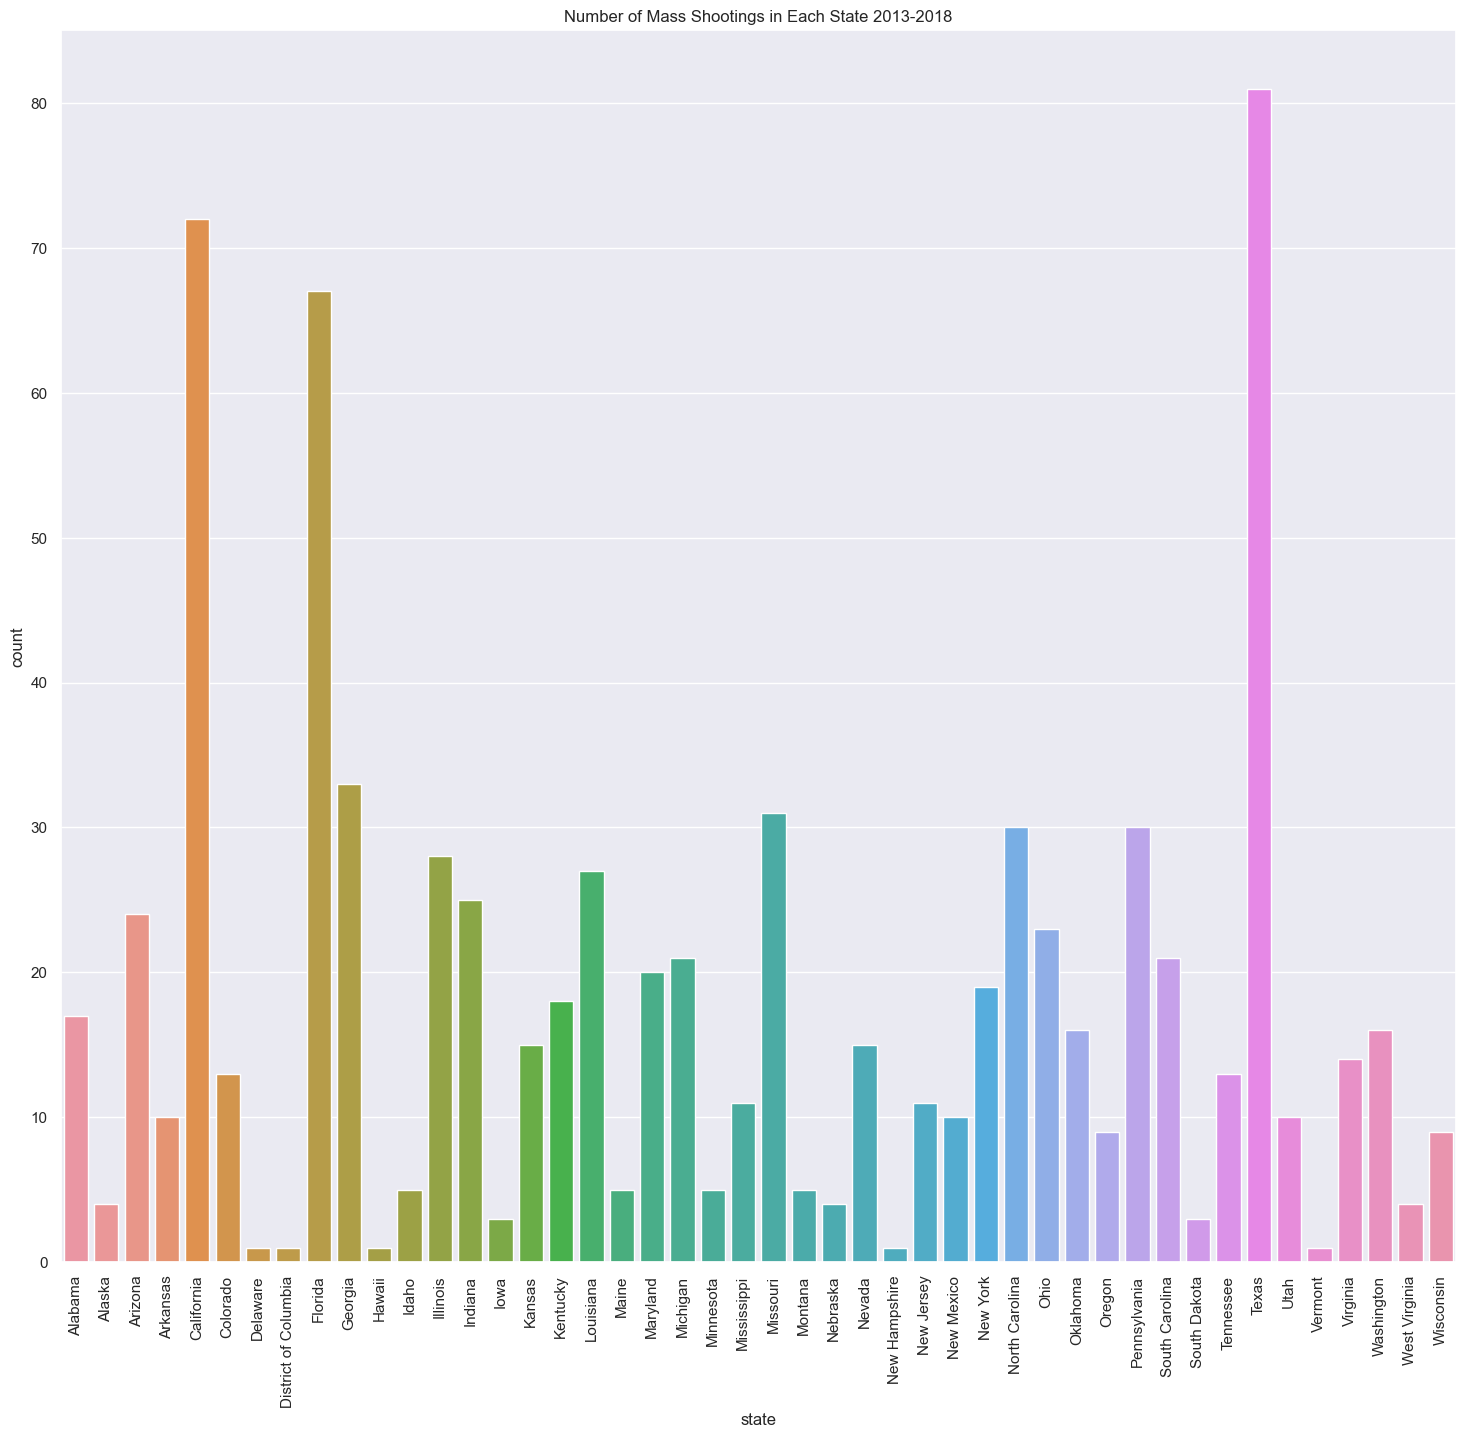

In [310]:
## Plotting the number of incidents for each state

import seaborn as sns

sns.set(rc={'figure.figsize': (18, 16)})
sns.countplot(gun_df.state).set(title='Number of Mass Shootings in Each State 2013-2018')
plt.xticks(rotation =90)

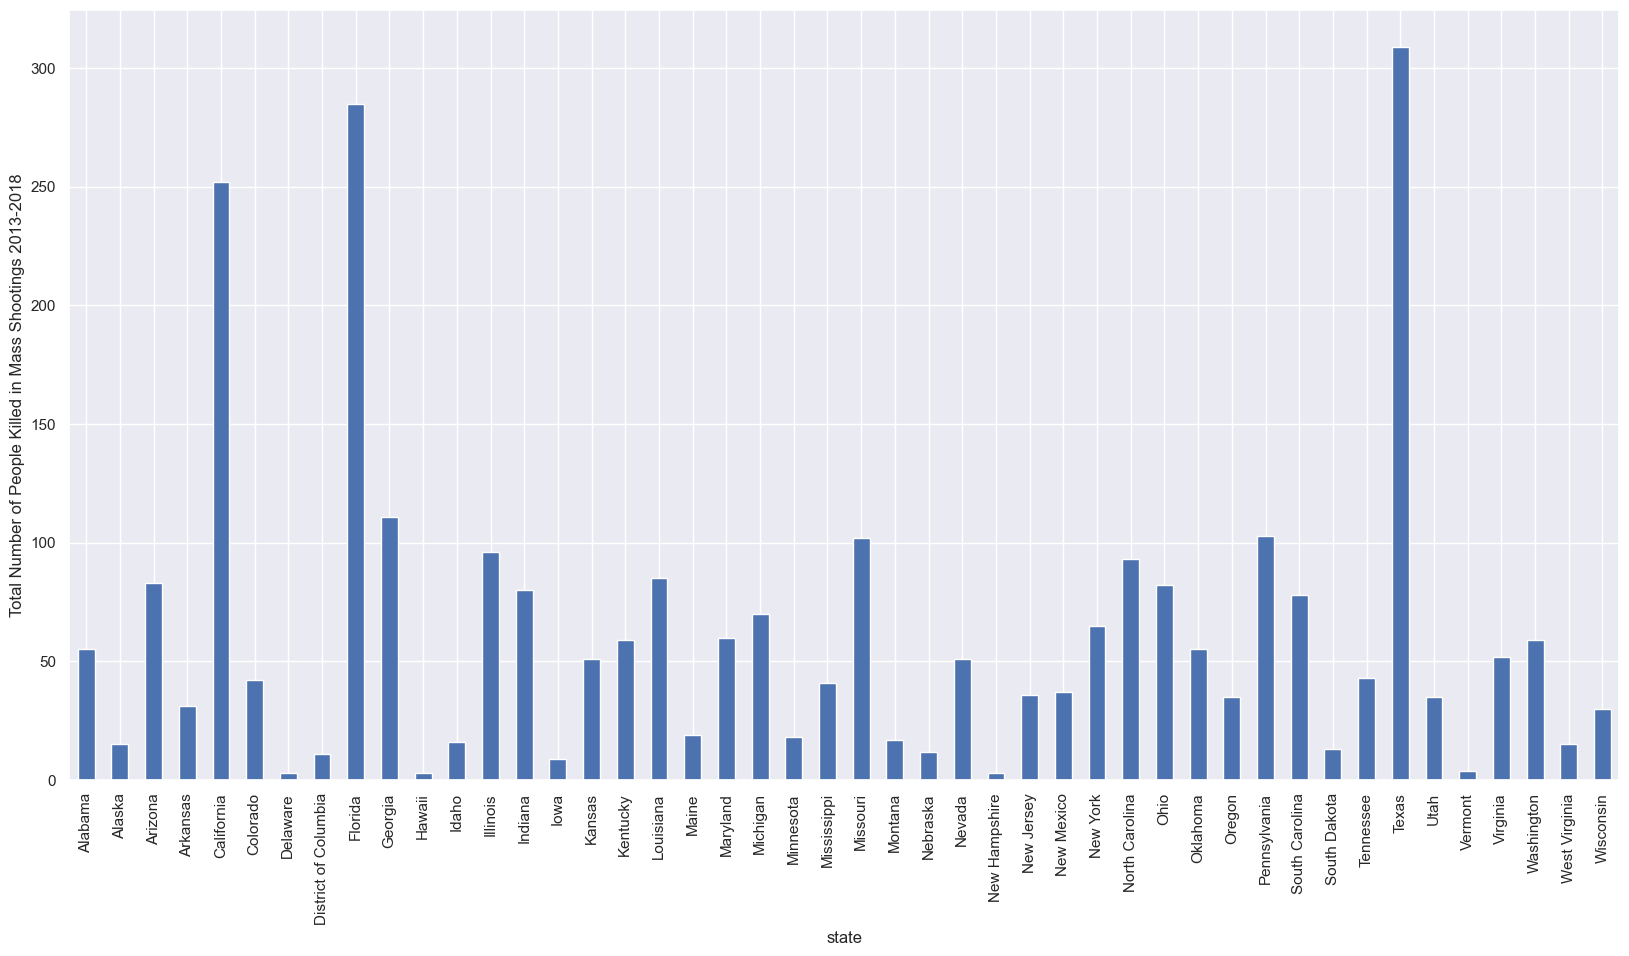

In [392]:
## Plotting the number of people killed for each state

import seaborn as sns

killed_df = gun_df.groupby('state')['n_killed'].sum()

ax = killed_df.plot.bar(figsize=(20,10), ylabel = "Total Number of People Killed in Mass Shootings 2013-2018")
plt.show()

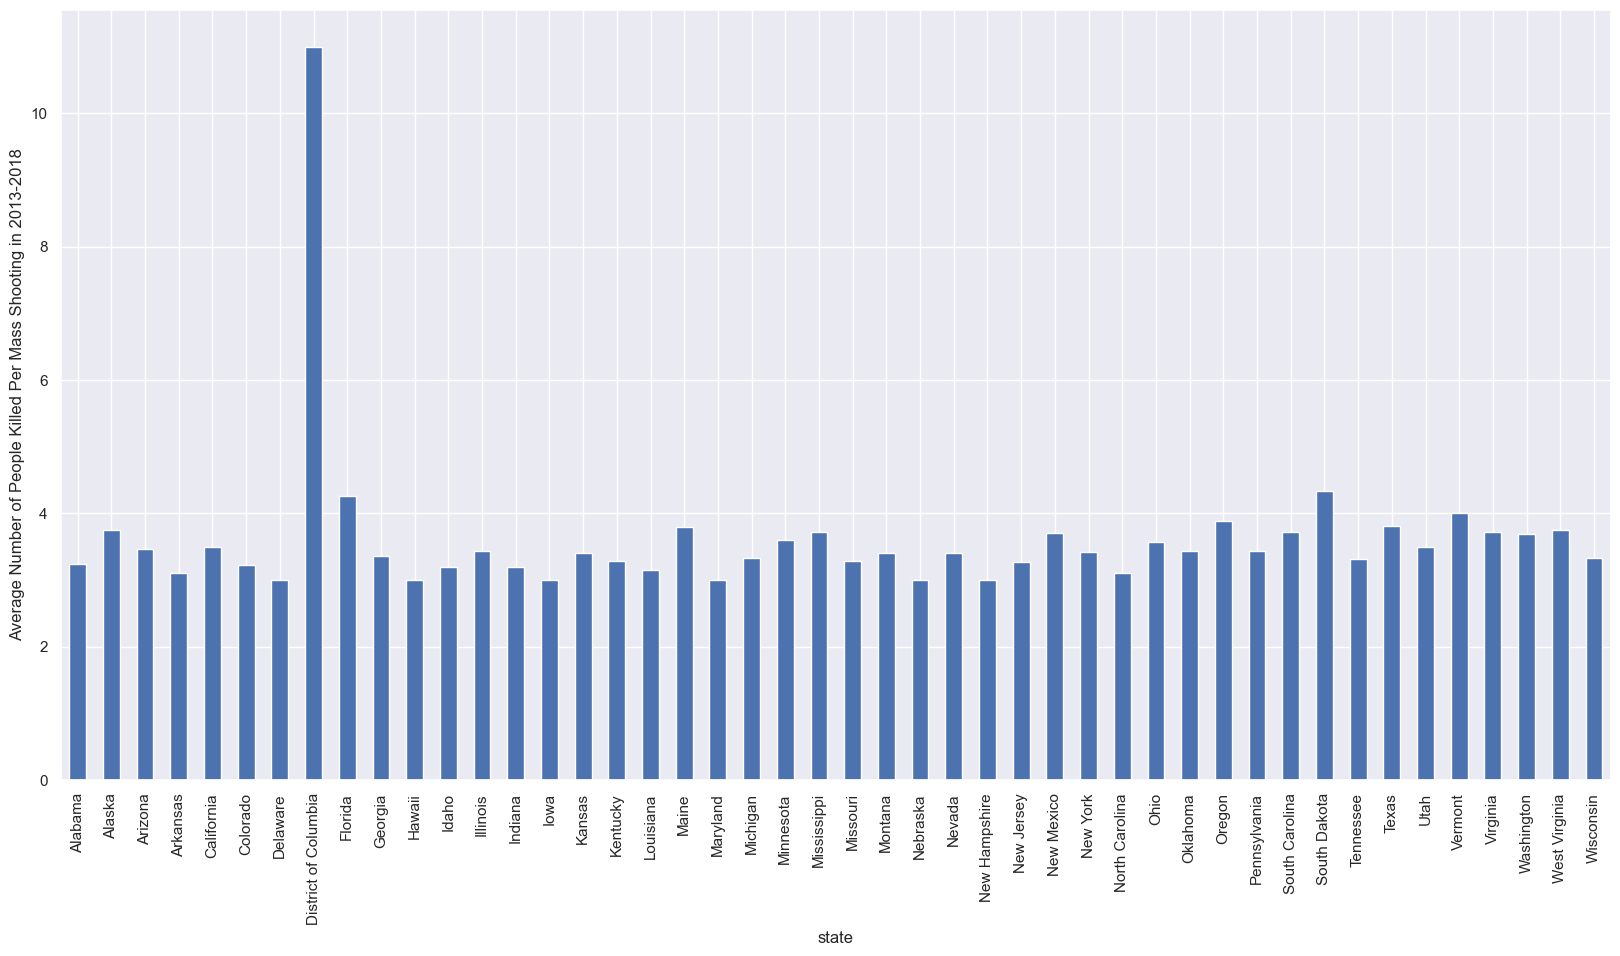

In [311]:
## Plotting the average number of people killed per incident for each state

import seaborn as sns

killed_avg_df = gun_df.groupby('state')['n_killed'].mean()

ax = killed_avg_df.plot.bar(figsize=(20,10), ylabel = "Average Number of People Killed Per Mass Shooting in 2013-2018")
plt.show()

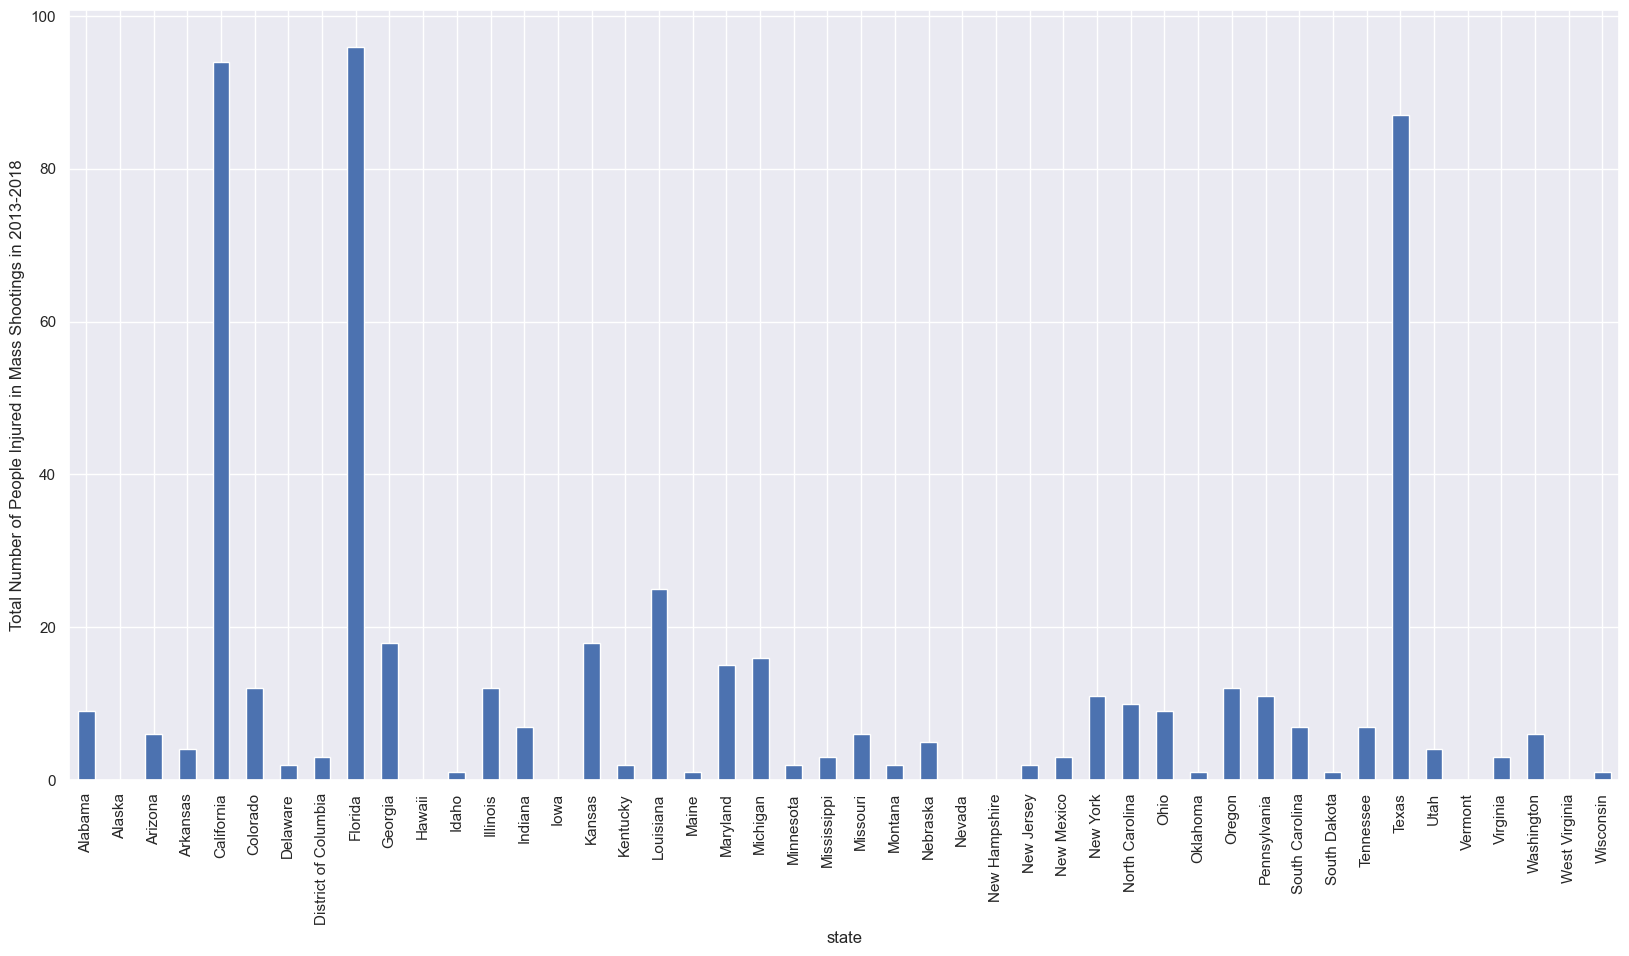

In [312]:
## Plotting the number of people injured for each state

import seaborn as sns

injured_df = gun_df.groupby('state')['n_injured'].sum()

ax = injured_df.plot.bar(figsize=(20,10), ylabel = "Total Number of People Injured in Mass Shootings in 2013-2018")
plt.show()

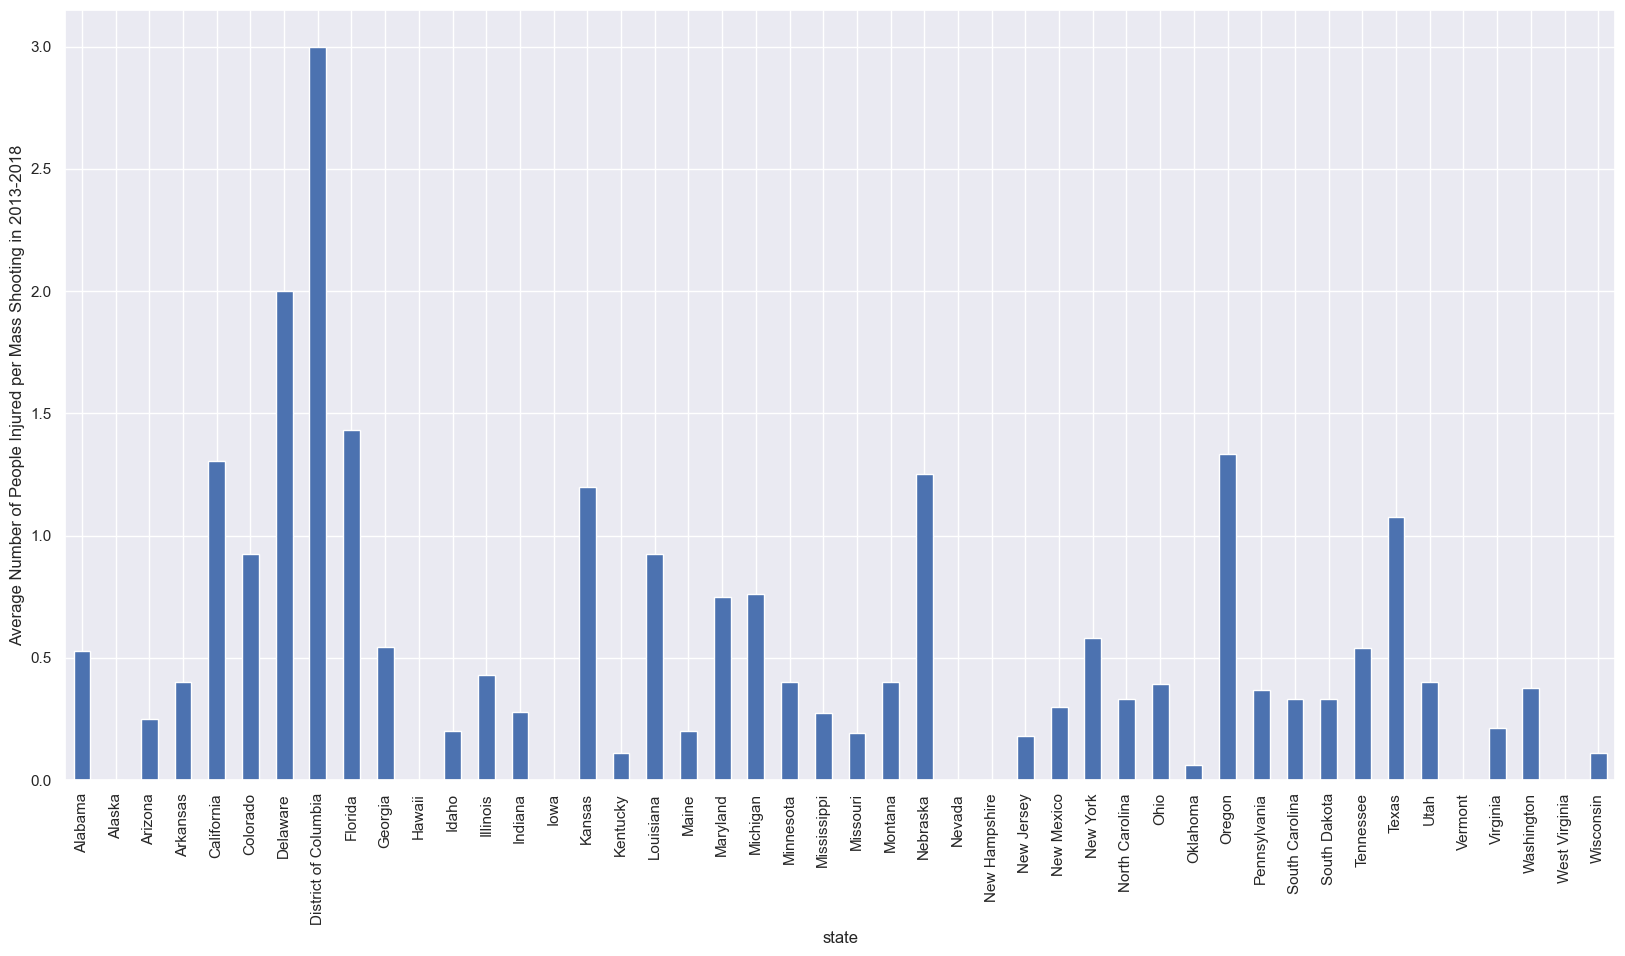

In [313]:
## Plotting the average number of people injured per incident for each state

import seaborn as sns

injured_avg_df = gun_df.groupby('state')['n_injured'].mean()

ax = injured_avg_df.plot.bar(figsize=(20,10), ylabel = "Average Number of People Injured per Mass Shooting in 2013-2018")
plt.show()

### Regression Models

In [300]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [301]:
r_df = gun_df[['state', 'n_killed', 'n_injured', 'n_guns_involved', 'Number_Unknown_Guns', 
               'Number_Stolen_Guns', 'Number_Not_Stolen_Guns','Unknown_Guns', "Handgun", "Shotgun", "Rifle", "Other", "Automatic"]]

y = r_df['n_killed']
X = r_df.drop(columns = ['n_killed'])

In [302]:
import random

random.seed(3254)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          ElasticNet(random_state=42),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()


ValueError: could not convert string to float: 'Alabama'